In [1]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import warnings

warnings.filterwarnings("ignore")

import researchpy as rp  # For auto-statistics/EDA of dataframe
from tqdm.notebook import tqdm  # For process display
import pingouin as pg

import sys

sys.path.append("../src")

from data import *
from utils import *
from conf import *
from tools import *

import utils as UT
import tools as TS

import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from mlxtend.evaluate import PredefinedHoldoutSplit
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn import set_config

set_config(display="diagram")

pd.set_option("display.max_colwidth", 200)

<IPython.core.display.Javascript object>

In [2]:
df_child = pd.read_excel("../output/CHILD_with_addon.xlsx", index_col="Subject_Number")

<IPython.core.display.Javascript object>

In [3]:
df_child_backup = df_child.copy()

<IPython.core.display.Javascript object>

In [5]:
df_child_cla3 = pd.read_excel("../data/3 year Q378CHCLA3Y.xlsx")

<IPython.core.display.Javascript object>

In [8]:
df_child_cla3.columns[:40]

Index(['SubjectNumber', 'CHCLA3YQ3_2', 'CHCLA3YQ3_3', 'CHCLA3YQ3_4',
       'CHCLA3YQ4_1a', 'CHCLA3YQ4_1b', 'CHCLA3YQ4_2', 'CHCLA3YQ4_3',
       'CHCLA3YQ5a', 'CHCLA3YQ5b', 'CHCLA3YQ6', 'CHCLA3YQ6_1', 'CHCLA3YQ6_1a',
       'CHCLA3YQ6_1b', 'CHCLA3YQ6_1c', 'CHCLA3YQ6_2', 'CHCLA3YQ6_3',
       'CHCLA3YQ7', 'CHCLA3YQ7_1', 'CHCLA3YQ7_2', 'CHCLA3YQ7_3', 'CHCLA3YQ7_4',
       'CHCLA3YQ8', 'CHCLA3YQ8_1', 'CHCLA3YQ8_1a', 'CHCLA3YQ8_1b',
       'CHCLA3YQ8_1c', 'CHCLA3YQ8_2', 'CHCLA3YQ8_3', 'CHCLA3YQ8_4',
       'CHCLA3YQ9', 'CHCLA3YQ9_1', 'CHCLA3YQ9_2', 'CHCLA3YQ9_3', 'CHCLA3YQ9_4',
       'CHCLA3YQ9_5', 'CHCLA3YQ9_6', 'CHCLA3YQ10', 'CHCLA3YQ10_1a',
       'CHCLA3YQ10_1b'],
      dtype='object')

<IPython.core.display.Javascript object>

In [134]:
df_rhinitis = (
    df_child_cla3[["CHCLA3YQ9", "CHCLA3YQ32", "SubjectNumber"]]
    .replace({8888: np.nan, 999: np.nan})
    .rename(
        columns={
            "CHCLA3YQ9": "Child_Rhinitis_3yCLA",
            "CHCLA3YQ32": "Child_AllergicRhinitis_3yCLA",
            "SubjectNumber": "Subject_Number",
        }
    )
    .copy()
)
df_rhinitis
df_rhinitis.Child_Rhinitis_3yCLA.value_counts(dropna=False)
df_rhinitis.Child_AllergicRhinitis_3yCLA.value_counts(dropna=False)

Child_Rhinitis_3yCLA  Child_AllergicRhinitis_3yCLA  Subject_Number
0                      NaN                           NaN         20229.0
1                      NaN                           NaN         20230.0
2                      0.0                           0.0         20231.0
3                      0.0                           0.0         20232.0
4                      NaN                           NaN         20233.0
...                    ...                           ...             ...
3181                   0.0                           0.0         20224.0
3182                   0.0                           0.0         20225.0
3183                   1.0                           2.0         20226.0
3184                   1.0                           0.0         20227.0
3185                   0.0                           0.0         20228.0

[3186 rows x 3 columns]

0.0    2199
1.0     537
NaN     450
Name: Child_Rhinitis_3yCLA, dtype: int64

0.0    2383
NaN     451
2.0     288
1.0      64
Name: Child_AllergicRhinitis_3yCLA, dtype: int64

<IPython.core.display.Javascript object>

In [135]:
df_child_with_rhin = (
    df_child_backup.reset_index().merge(df_rhinitis, on="Subject_Number").copy()
)

<IPython.core.display.Javascript object>

In [136]:
df_child_with_rhin["Wheeze_3yCLA"].value_counts(dropna=False)
df_child_with_rhin["Child_Atopy_3y"].value_counts(dropna=False)

0.0    2450
NaN     448
1.0     285
Name: Wheeze_3yCLA, dtype: int64

0.0    2304
NaN     499
1.0     380
Name: Child_Atopy_3y, dtype: int64

<IPython.core.display.Javascript object>

In [137]:
df_rhin_compare = (
    df_child_with_rhin[
        [
            "Child_Rhinitis_3yCLA",
            "Child_AllergicRhinitis_3yCLA",
            "Wheeze_3yCLA",
            "Child_Atopy_3y",
            "Child_Inhalant_3y",
            "Asthma_Diagnosis_3yCLA",
            "Asthma_Diagnosis_5yCLA",
        ]
    ]
    .dropna()
    .reset_index(drop=True)
    .copy()
)

<IPython.core.display.Javascript object>

In [138]:
df_rhin_compare

Child_Rhinitis_3yCLA  Child_AllergicRhinitis_3yCLA  Wheeze_3yCLA  \
0                      0.0                           0.0           0.0   
1                      0.0                           0.0           0.0   
2                      1.0                           0.0           0.0   
3                      0.0                           0.0           0.0   
4                      0.0                           0.0           0.0   
...                    ...                           ...           ...   
2473                   0.0                           0.0           0.0   
2474                   0.0                           0.0           0.0   
2475                   0.0                           0.0           0.0   
2476                   0.0                           0.0           0.0   
2477                   0.0                           2.0           0.0   

      Child_Atopy_3y  Child_Inhalant_3y  Asthma_Diagnosis_3yCLA  \
0                0.0                0.0                     0.0   
1                0.0                0.0                     0.0   
2                0.0                0.0                     0.0   
3                0.0                0.0                     0.0   
4                0.0                0.0                     0.0   
...              ...                ...                     ...   
2473             0.0                0.0                     0.0   
2474             1.0                1.0                     0.0   
2475             0.0                0.0                     0.0   
2476             0.0                0.0                     0.0   
2477             0.0                0.0                     0.0   

      Asthma_Diagnosis_5yCLA  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
...                      ...  
2473                     0.0  
2474                     0.0  
2475                     2.0  
2476                     0.0  
2477                     0.0  

[2478 rows x 7 columns]

<IPython.core.display.Javascript object>

In [154]:
df_rhin_compare["Child_AllergicRhinitis_inferred_3y"] = (
    df_rhin_compare.Child_Inhalant_3y * df_rhin_compare.Child_Rhinitis_3yCLA
)

<IPython.core.display.Javascript object>

In [150]:
def asthma_prevalence_analysis(
    df,
    feature_list=["Child_Rhinitis_3yCLA"],
    target="Asthma_Diagnosis_5yCLA",
    target_encode_mapping={0: "No", 1: "Yes", 2: "Possible"},
):
    """
    Provide visualization for the prevalence of target for different groups with specific feature.
    1. df: dataframe to be analyzed -- NaN already excluded in the df
    2. features: list, maximum: two elements (Univariate, Bivariate prevalence analysis)
    Return: visualization with proportions
    """
    df[target] = df[target].replace({0: "No", 1: "Yes", 2: "Possible"}).copy()
    hue_for_plot = ["No", "Possible", "Yes"]
    if len(feature_list) == 1:
        feature = feature_list[0]
        g = sns.catplot(
            x=feature, hue=target, hue_order=hue_for_plot, data=df, kind="count"
        )

        # Add proportion information for easy comparison in the plot
        ax = g.facet_axis(0, 0)

        # Create the attach proportions to the plot
        x_position = []
        height_position = []
        height_position_new = []

        for p in ax.patches:
            x_position.append(p.get_x())
            height_position.append(p.get_height())

        # X position is not generated in an ascending order (from left to right)
        # Rearrange the height position as it was not generated according to the ascending order of x position
        zipped = sorted([(m, n) for m, n in zip(x_position, height_position)])
        x_position = [i for i, j in zipped]
        height_position = [j for i, j in zipped]

        subset_number = len(target_encode_mapping.keys())  # Number of target types
        for i in range(len(height_position)):
            if i < subset_number:
                height_position_new.append(
                    height_position[i] / np.nansum(height_position[0:subset_number])
                )
            elif i < 2 * subset_number:
                height_position_new.append(
                    height_position[i]
                    / np.nansum(height_position[subset_number : subset_number * 2])
                )
            elif i < 3 * subset_number:
                height_position_new.append(
                    height_position[i]
                    / np.nansum(height_position[subset_number * 2 : subset_number * 3])
                )
            else:
                height_position_new.append(
                    height_position[i] / np.nansum(height_position[subset_number * 3 :])
                )

        for i in range(len(height_position)):
            ax.text(
                x_position[i] + 0.0,
                height_position[i] + 30,
                "{0:.0f}({1:2.0f}%)".format(
                    height_position[i], height_position_new[i] * 100
                ),  # Used to format it K representation
                color="black",
                rotation=20,
                size=11,
            )

    elif len(feature_list) == 2:
        primary = feature_list[0]
        secondary = feature_list[1]
        g = sns.catplot(
            x=primary,
            col=secondary,
            hue=target,
            hue_order=hue_for_plot,
            data=df,
            kind="count",
        )

        # Number of cols in the final visualizations
        for j in range(len(df[secondary].unique())):
            ax = g.facet_axis(0, j)
            # Create the following to calculate proportion
            x_position = []
            height_position = []
            height_position_new = []

            for p in ax.patches:
                #     ax.text(p.get_x() + 0.05,
                #             p.get_height() * 1.02,
                #            '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
                #             color='black',
                #             rotation='horizontal',
                #             size='large')
                x_position.append(p.get_x())
                height_position.append(p.get_height())

            # X position is not generated in an ascending order (from left to right)
            # Rearrange the height position as it was not generated according to the ascending order of x position
            zipped = sorted([(m, n) for m, n in zip(x_position, height_position)])
            x_position = [i for i, j in zipped]
            height_position = [j for i, j in zipped]

            subset_number = len(
                target_encode_mapping.keys()
            )  # Number of bars in display for each type of primary feature

            for i in range(len(height_position)):
                if i < subset_number:
                    height_position_new.append(
                        height_position[i] / np.nansum(height_position[0:subset_number])
                    )
                elif i < 2 * subset_number:
                    height_position_new.append(
                        height_position[i]
                        / np.nansum(height_position[subset_number : subset_number * 2])
                    )
                elif i < 3 * subset_number:
                    height_position_new.append(
                        height_position[i]
                        / np.nansum(
                            height_position[subset_number * 2 : subset_number * 3]
                        )
                    )
                else:
                    height_position_new.append(
                        height_position[i]
                        / np.nansum(height_position[subset_number * 3 :])
                    )

            for i in range(len(height_position)):
                ax.text(
                    x_position[i] + 0.0,
                    height_position[i] + 30,
                    "{0:.0f}({1:2.0f}%)".format(
                        height_position[i], height_position_new[i] * 100
                    ),  # Used to format it K representation
                    color="black",
                    rotation=20,
                    size=11,
                )
    else:
        print(
            "Wrong number of elements for analysis! The length of feature_list can only be one or two! "
        )

<IPython.core.display.Javascript object>

In [161]:
df_rhin_compare["Child_Rhinitis_3yCLA"].value_counts()
df_rhin_compare["Child_AllergicRhinitis_3yCLA"].value_counts()
df_rhin_compare["Asthma_Diagnosis_5yCLA"].value_counts(normalize=True)

df_rhin_compare[df_rhin_compare["Child_AllergicRhinitis_3yCLA"] == 1][
    "Child_Rhinitis_3yCLA"
].value_counts()

df_rhin_compare[df_rhin_compare["Child_AllergicRhinitis_3yCLA"] == 1][
    "Child_Atopy_3y"
].value_counts()

df_rhin_compare[df_rhin_compare["Child_AllergicRhinitis_3yCLA"] == 1][
    "Child_Inhalant_3y"
].value_counts()

"Different timing for the test and clinical diagnosis"

0.0    2012
1.0     466
Name: Child_Rhinitis_3yCLA, dtype: int64

0.0    2165
2.0     260
1.0      53
Name: Child_AllergicRhinitis_3yCLA, dtype: int64

No          0.843422
Possible    0.093220
Yes         0.063358
Name: Asthma_Diagnosis_5yCLA, dtype: float64

1.0    48
0.0     5
Name: Child_Rhinitis_3yCLA, dtype: int64

0.0    28
1.0    25
Name: Child_Atopy_3y, dtype: int64

0.0    29
1.0    24
Name: Child_Inhalant_3y, dtype: int64

'Different timing for the test and clinical diagnosis'

<IPython.core.display.Javascript object>

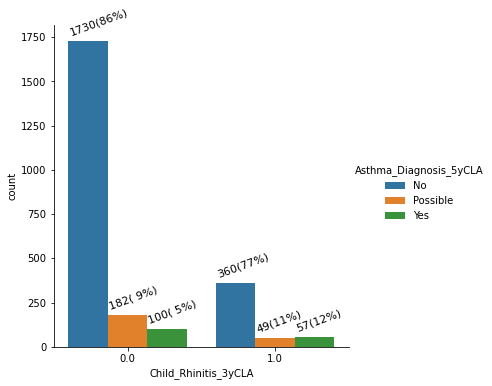

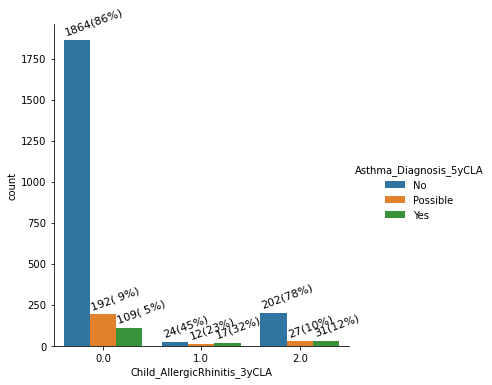

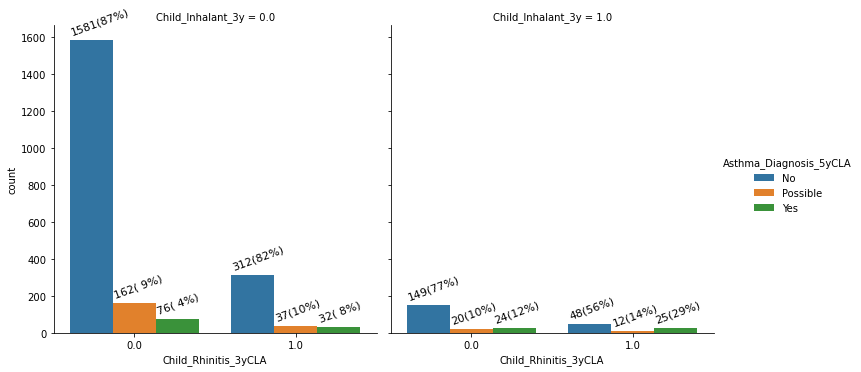

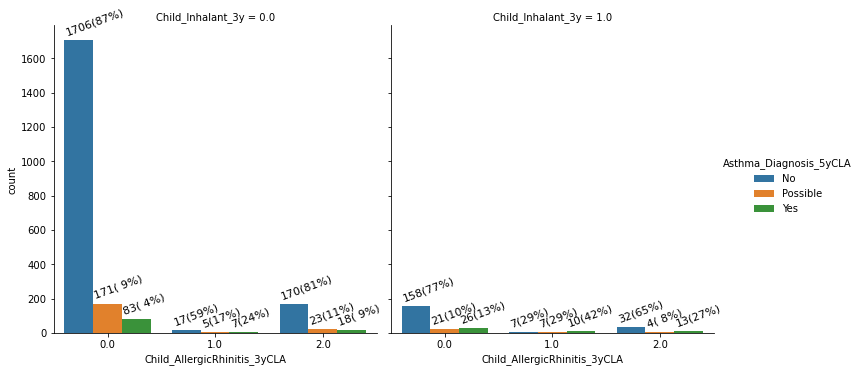

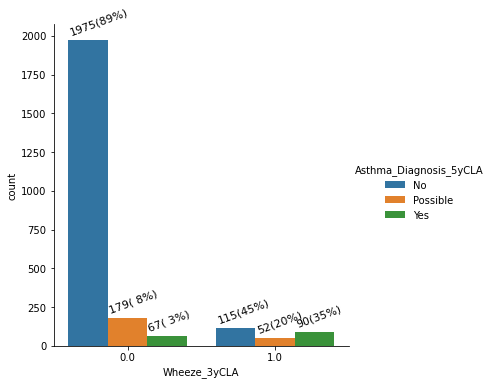

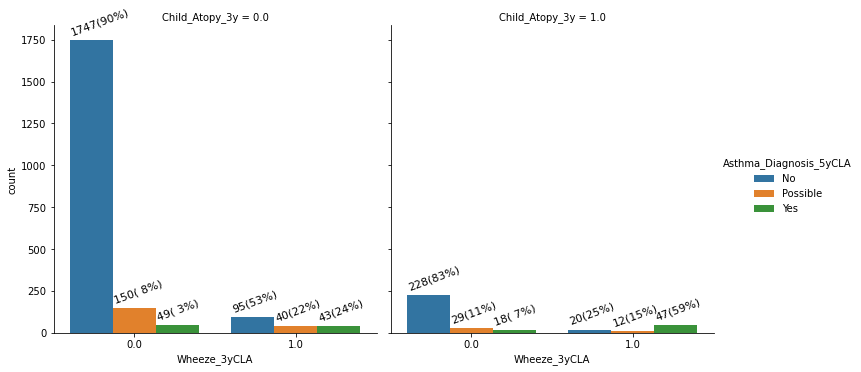

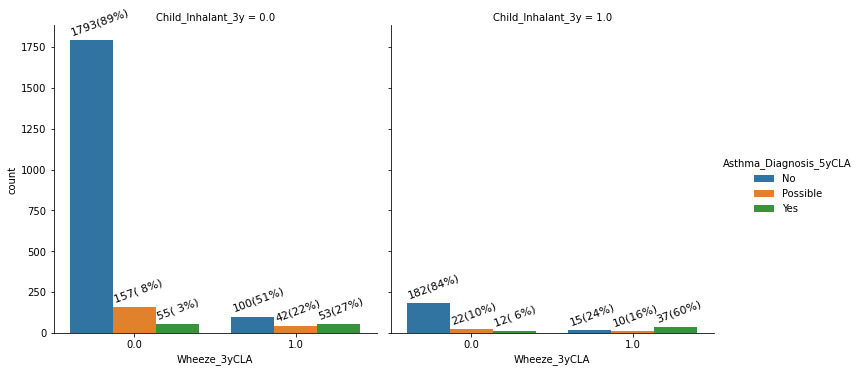

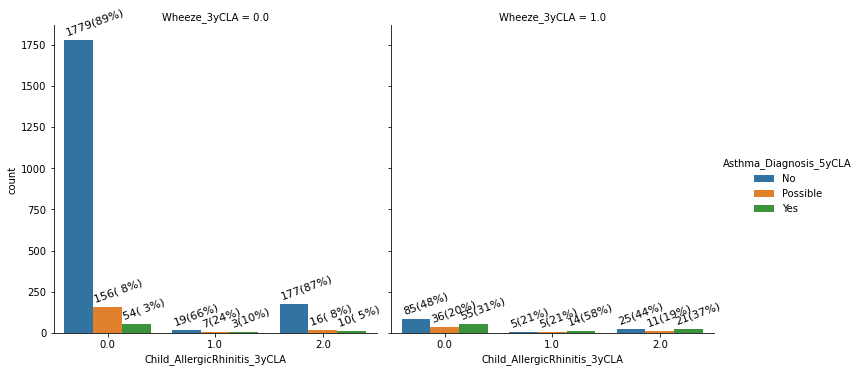

<IPython.core.display.Javascript object>

In [167]:
asthma_prevalence_analysis(
    df_rhin_compare,
    feature_list=["Child_Rhinitis_3yCLA"],
    target="Asthma_Diagnosis_5yCLA",
)
asthma_prevalence_analysis(
    df_rhin_compare,
    feature_list=["Child_AllergicRhinitis_3yCLA"],
    target="Asthma_Diagnosis_5yCLA",
)

asthma_prevalence_analysis(
    df_rhin_compare, feature_list=["Child_Atopy_3y"], target="Asthma_Diagnosis_5yCLA",
)

asthma_prevalence_analysis(
    df_rhin_compare, feature_list=["Wheeze_3yCLA"], target="Asthma_Diagnosis_5yCLA",
)

asthma_prevalence_analysis(
    df_rhin_compare,
    feature_list=["Child_Rhinitis_3yCLA",'Child_Inhalant_3y'],
    target="Asthma_Diagnosis_5yCLA",
)


asthma_prevalence_analysis(
    df_rhin_compare,
    feature_list=["Child_AllergicRhinitis_3yCLA",'Child_Inhalant_3y'],
    target="Asthma_Diagnosis_5yCLA",
)


asthma_prevalence_analysis(
    df_rhin_compare, feature_list=["Wheeze_3yCLA",'Child_Atopy_3y'], target="Asthma_Diagnosis_5yCLA",
)

asthma_prevalence_analysis(
    df_rhin_compare, feature_list=["Wheeze_3yCLA",'Child_Inhalant_3y'], target="Asthma_Diagnosis_5yCLA",
)

asthma_prevalence_analysis(
    df_rhin_compare, feature_list=['Child_AllergicRhinitis_3yCLA',"Wheeze_3yCLA"], target="Asthma_Diagnosis_5yCLA",
)

In [169]:
df_rhin_compare

Child_Rhinitis_3yCLA  Child_AllergicRhinitis_3yCLA  Wheeze_3yCLA  \
0                      0.0                           0.0           0.0   
1                      0.0                           0.0           0.0   
2                      1.0                           0.0           0.0   
3                      0.0                           0.0           0.0   
4                      0.0                           0.0           0.0   
...                    ...                           ...           ...   
2473                   0.0                           0.0           0.0   
2474                   0.0                           0.0           0.0   
2475                   0.0                           0.0           0.0   
2476                   0.0                           0.0           0.0   
2477                   0.0                           2.0           0.0   

      Child_Atopy_3y  Child_Inhalant_3y  Asthma_Diagnosis_3yCLA  \
0                0.0                0.0                     0.0   
1                0.0                0.0                     0.0   
2                0.0                0.0                     0.0   
3                0.0                0.0                     0.0   
4                0.0                0.0                     0.0   
...              ...                ...                     ...   
2473             0.0                0.0                     0.0   
2474             1.0                1.0                     0.0   
2475             0.0                0.0                     0.0   
2476             0.0                0.0                     0.0   
2477             0.0                0.0                     0.0   

     Asthma_Diagnosis_5yCLA  Child_AllergicRhinitis_inferred_3y  
0                        No                                 0.0  
1                        No                                 0.0  
2                        No                                 0.0  
3                        No                                 0.0  
4                        No                                 0.0  
...                     ...                                 ...  
2473                     No                                 0.0  
2474                     No                                 0.0  
2475               Possible                                 0.0  
2476                     No                                 0.0  
2477                     No                                 0.0  

[2478 rows x 8 columns]

<IPython.core.display.Javascript object>

In [174]:
numeric_feature_stats = None
numeric_feature_stats = pd.DataFrame()
numeric_feature_stats

Empty DataFrame
Columns: []
Index: []

<IPython.core.display.Javascript object>

In [184]:
# Perform statistical testing of all existing features using Chi-square and T-test for two populations (asthma,
# no asthma)
def df_feature_stats(df_child, target="y"):
    """df_child is cleaned dataframe with y as target of testing, categorical feature is defined as no more than 10 unqiue values (frequencies), numeric features are the rest.
    """
    numeric_col = []
    categorical_col = []
    for i in df_child.columns:
        if df_child[i].nunique() > 10:
            numeric_col.append(i)
        elif i != target:
            categorical_col.append(i)
    print("The numeric columns are: ", numeric_col)
    print("The categorical columns are: ", categorical_col)

    # Initialize for return
    numeric_feature_stats = None
    categorical_feature_stats = None

    if len(numeric_col) != 0:
        # Create numeric stats dataframe
        numeric_dict = {}
        print(
            "diff represents the mean value of non-asthma group minus the mean value of asthma group."
        )
        for i in numeric_col:
            # Calculate difference of mean value - [Asthma Group - No_Asthma Group]
            diff_mean = np.mean(df_child[df_child[target] == 0][i]) - np.mean(
                df_child[df_child[target] == 1][i]
            )

            # Perform independent t-test for two populations
            temp = pg.ttest(
                df_child[df_child[target] == 0][i],
                df_child[df_child[target] == 1][i],
                paired=False,
                alternative="two-sided",
                correction="auto",
            ).rename(index={"T-test": i})

            # Insert extra information
            temp.insert(4, "diff", diff_mean)

            # Store the result
            numeric_dict[i] = temp

        numeric_feature_stats = pd.concat(
            [v for k, v in numeric_dict.items()], axis=0
        ).sort_values("p-val")
    else:
        print("There is no numeric features to perform t-test analysis")

    if len(categorical_col) != 0:
        # Create categorical stats dataframe
        categorical_dict = {}
        for i in categorical_col:
            # Perform Chi Square Test for categorical features for two populations (with or without asthma)
            expected, observed, stats = pg.chi2_independence(
                df_child, x=i, y=target, correction=False,
            )
            stats.rename(index={0: i}, inplace=True)

            # Store 'Pearson' Chi-Square Result
            categorical_dict[i] = stats[:1]

        categorical_feature_stats = pd.concat(
            [v for k, v in categorical_dict.items()], axis=0
        ).sort_values("pval")
    else:
        print("There is no categorical features to perform chi-square test")

    return numeric_feature_stats, categorical_feature_stats

<IPython.core.display.Javascript object>

In [185]:
df_feature_stats(df_rhin_compare, target="Asthma_Diagnosis_5yCLA")[1]

The numeric columns are:  []
The categorical columns are:  ['Child_Rhinitis_3yCLA', 'Child_AllergicRhinitis_3yCLA', 'Wheeze_3yCLA', 'Child_Atopy_3y', 'Child_Inhalant_3y', 'Asthma_Diagnosis_3yCLA', 'Child_AllergicRhinitis_inferred_3y']
There is no numeric features to perform t-test analysis


test  lambda        chi2  dof  \
Asthma_Diagnosis_3yCLA              pearson     1.0  511.695665  4.0   
Wheeze_3yCLA                        pearson     1.0  462.276945  2.0   
Child_Atopy_3y                      pearson     1.0  106.527690  2.0   
Child_AllergicRhinitis_3yCLA        pearson     1.0   96.638061  4.0   
Child_AllergicRhinitis_inferred_3y  pearson     1.0   84.256083  2.0   
Child_Inhalant_3y                   pearson     1.0   71.351889  2.0   
Child_Rhinitis_3yCLA                pearson     1.0   35.786182  2.0   

                                             pval    cramer     power  
Asthma_Diagnosis_3yCLA              1.978673e-109  0.321322  1.000000  
Wheeze_3yCLA                        4.147982e-101  0.431917  1.000000  
Child_Atopy_3y                       7.375748e-24  0.207339  1.000000  
Child_AllergicRhinitis_3yCLA         5.108885e-20  0.139640  0.999986  
Child_AllergicRhinitis_inferred_3y   5.058526e-19  0.184395  1.000000  
Child_Inhalant_3y                    3.207260e-16  0.169688  1.000000  
Child_Rhinitis_3yCLA                 1.694843e-08  0.120173  0.999875

<IPython.core.display.Javascript object>

In [4]:
dict_features = feature_grouping_generator(df_child, group_type="six_timepoints")

The available keywords for grouped features are: dict_keys(['at_birth', '6_months', '1_year', '2_years', '3_years', '4_years', 'all_six_timepoints'])


<IPython.core.display.Javascript object>

In [5]:
col_without_dust = df_child.columns[~df_child.columns.str.contains("Home.*3m")]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Dad_Atopy', ylabel='Dad_Food'>

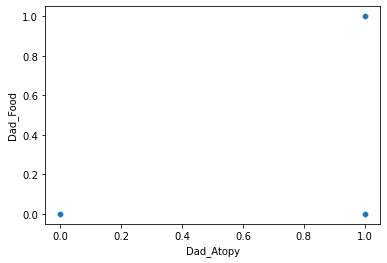

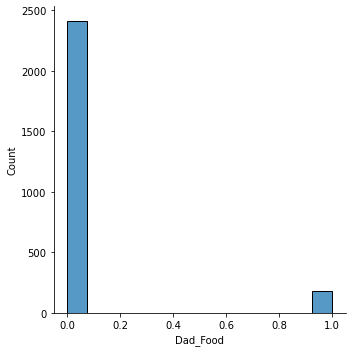

<IPython.core.display.Javascript object>

In [68]:
sns.scatterplot(x=df_child["Dad_Atopy"], y=df_child["Dad_Food"])
sns.displot(df_child["Dad_Food"])

In [72]:
df_child["Dad_Atopy"].value_counts(dropna=False)
df_child["Dad_Atopy"][:10]
df_child["Dad_Inhalant"].value_counts(dropna=False)
df_child["Dad_Inhalant"][:10]

df_child["Dad_Inhalant"][:10] == df_child["Dad_Atopy"][:10]

1.0    1767
NaN     856
0.0     832
Name: Dad_Atopy, dtype: int64

Subject_Number
20001    1.0
20002    NaN
20003    1.0
20005    NaN
20006    0.0
20007    0.0
20008    1.0
20009    1.0
20010    1.0
20011    NaN
Name: Dad_Atopy, dtype: float64

1.0    1767
NaN     856
0.0     832
Name: Dad_Inhalant, dtype: int64

Subject_Number
20001    1.0
20002    NaN
20003    1.0
20005    NaN
20006    0.0
20007    0.0
20008    1.0
20009    1.0
20010    1.0
20011    NaN
Name: Dad_Inhalant, dtype: float64

Subject_Number
20001     True
20002    False
20003     True
20005    False
20006     True
20007     True
20008     True
20009     True
20010     True
20011    False
dtype: bool

<IPython.core.display.Javascript object>

In [78]:
df_child["Asthma_Father"].corr(df_child["Father_Asthma"])
df_child["Dad_Food"].corr(df_child["Dad_Atopy"])
df_child["Dad_Inhalant"].corr(df_child["Dad_Atopy"])
df_child["Mom_Inhalant"].corr(df_child["Mom_Atopy"])
df_child["Weight_for_age_0m"].corr(df_child["Weight_0m"])
df_child["Weight_for_age_0m"].isna().sum()
df_child["Weight_0m"].isna().sum()
df_child["Mom_Inhalant"].isna().sum()
df_child["Mom_Atopy"].isna().sum()
df_child["Weight_for_age_0m"].corr(df_child["Weight_for_age_3m"])

0.966343908238205

0.18756644684302584

1.0

0.9980612079687093

0.9887676279108599

87

87

294

294

0.4505307878380608

<IPython.core.display.Javascript object>

In [7]:
repetitive_features = {
    "Asthma_Father",
    "Asthma_Mother",
    "BF_3m",
    "BF_6m",
    "Parental_Asthma",
    "Weight_0m",
    "Weight_12m",
    "Weight_36m",
    "Weight_3m",
    "Weight_60m",
} | {"Dad_Food", "Dad_Inhalant", "Mom_Food", "Mom_Inhalant"}

<IPython.core.display.Javascript object>

In [18]:
col_for_pipeline

{'AD_Father',
 'AD_Mother',
 'Analgesics_usage_delivery',
 'Anesthetic_delivery',
 'Antibiotics_Usage_12m',
 'Apgar_Score_1min',
 'Apgar_Score_5min',
 'Asthma_Diagnosis_3yCLA',
 'Asthma_Diagnosis_5yCLA',
 'BF_12m',
 'BF_18m',
 'BF_1m',
 'BF_24m',
 'BF_9m',
 'BF_Implied_Duration',
 'BF_Status_3m',
 'BF_Status_6m',
 'CESD_12m',
 'CESD_18m',
 'CESD_18week',
 'CESD_24m',
 'CESD_36week',
 'CESD_6m',
 'Child_Atopy_1y',
 'Child_Atopy_3y',
 'Child_Atopy_5y',
 'Child_Ethnicity',
 'Child_Food_1y',
 'Child_Food_3y',
 'Child_Food_5y',
 'Child_Inhalant_1y',
 'Child_Inhalant_3y',
 'Child_Inhalant_5y',
 'Complications_Birth',
 'Crackles_1yCLA',
 'Cumulative_Wheeze_12m',
 'Cumulative_Wheeze_18m',
 'Cumulative_Wheeze_24m',
 'Cumulative_Wheeze_30m',
 'Cumulative_Wheeze_36m',
 'Cumulative_Wheeze_3m',
 'Cumulative_Wheeze_48m',
 'Cumulative_Wheeze_60m',
 'Cumulative_Wheeze_6m',
 'Dad_Atopy',
 'Diastolic_BP_3yCLA',
 'Diastolic_BP_5yCLA',
 'Epi_Noncold_Wheeze_18m',
 'Epi_Noncold_Wheeze_1y',
 'Epi_Noncold_Whe

<IPython.core.display.Javascript object>

In [8]:
# set(col_without_dust.values)
len(set(col_without_dust.values))
len(repetitive_features)

col_for_pipeline = set(col_without_dust.values) - repetitive_features

174

14

<IPython.core.display.Javascript object>

In [19]:
dict_features_1 = feature_grouping_generator(
    df_child[col_for_pipeline], group_type="six_timepoints"
)

The available keywords for grouped features are: dict_keys(['at_birth', '6_months', '1_year', '2_years', '3_years', '4_years', 'all_six_timepoints'])


<IPython.core.display.Javascript object>

In [23]:
dict_features = feature_grouping_generator(
    df_child[col_without_dust], group_type="six_timepoints"
)

The available keywords for grouped features are: dict_keys(['at_birth', '6_months', '1_year', '2_years', '3_years', '4_years', 'all_six_timepoints'])


<IPython.core.display.Javascript object>

In [29]:
pd.DataFrame(four_time_dict.items(), columns=["Time Point", "Variables"])

Time Point  \
0            at_birth   
1            6_months   
2              1_year   
3             2_years   
4             3_years   
5             4_years   
6  all_six_timepoints   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Variables  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                  {CESD_18week, FAllergies_Father, Child_Ethnicity, Apgar_Score_1min, Respiratory_Report_Months, Prenatal_Cardiac_Disorder, Mode_of_delivery, CESD_36week, Father_Asthma, Asthma_Father, F10min_Oxygen_Mask, PSS_36week, Prenatal_Nausea, Smoke_Prenatal_Maternal, Anesthetic_delivery, F10min_No_Measure_Needed, Prenatal_Hypertension, F10min_Perineum_suction, Prenatal_Hypotension, Respiratory_Infections, Prenatal_Induced_Hypertension, Prenatal_Other_Conditions, Pollentress_Mother, Mom_Food, Dad_Food, FAllergies_Mother, PSS_18week, Sex, Mom_Atopy, Prenatal_Mother_Condition, Hayfever_Mother, F10min_Intubation, Wheeze_Father, Gest_Days, F10min_Positive_Pressure_Ventilation, Weight_0m, Jaundice_Birth, Wheeze_Mother, Mom_Inhalant, Asthma_Mother, Prenatal_Infections, Analgesics_usage_delivery, AD_Father, Smoke_Prenatal_Secondhand, AD_Mother, Mother_Asthma, Pollentress_Father, Severity_of_Respiratoryinfections, F10min_Suction, Dad_Inhalant, Complications_Birth, Stay_Duration_Hospital, Hayfever_Father, Parental_Asthma, F10min_Mask_Ventilation, Apgar_Score_5min, Dad_Atopy, No_of_Pregnancy, Prenatal_Bleeding, Prenatal_Gestational_Diabetes, Mother_Caucasian, Study_Center, Respiratory_Problems_Birth, First_10min_Measure, Prenatal_None_Conditions, Weight_for_age_0m, F10min_Free_Flow_Oxygen, Father_Caucasian}  
1                                                                                                                                                                                                                                                                                                                                 

<IPython.core.display.Javascript object>

In [21]:
dict_features_1[0]

{'at_birth': {'AD_Father',
  'AD_Mother',
  'Analgesics_usage_delivery',
  'Anesthetic_delivery',
  'Apgar_Score_1min',
  'Apgar_Score_5min',
  'CESD_18week',
  'CESD_36week',
  'Child_Ethnicity',
  'Complications_Birth',
  'Dad_Atopy',
  'F10min_Free_Flow_Oxygen',
  'F10min_Intubation',
  'F10min_Mask_Ventilation',
  'F10min_No_Measure_Needed',
  'F10min_Oxygen_Mask',
  'F10min_Perineum_suction',
  'F10min_Positive_Pressure_Ventilation',
  'F10min_Suction',
  'FAllergies_Father',
  'FAllergies_Mother',
  'Father_Asthma',
  'Father_Caucasian',
  'First_10min_Measure',
  'Gest_Days',
  'Hayfever_Father',
  'Hayfever_Mother',
  'Jaundice_Birth',
  'Mode_of_delivery',
  'Mom_Atopy',
  'Mother_Asthma',
  'Mother_Caucasian',
  'No_of_Pregnancy',
  'PSS_18week',
  'PSS_36week',
  'Pollentress_Father',
  'Pollentress_Mother',
  'Prenatal_Bleeding',
  'Prenatal_Cardiac_Disorder',
  'Prenatal_Gestational_Diabetes',
  'Prenatal_Hypertension',
  'Prenatal_Hypotension',
  'Prenatal_Induced_Hyperte

<IPython.core.display.Javascript object>

In [25]:
four_time_dict = dict_features_1[0]

pd.set_option("display.max_colwidth", None)
time_df = (
    pd.DataFrame(four_time_dict.items(), columns=["Time Point", "Variables"])
    .head(6)
#    .drop(4, axis=0)
)
time_df["Time Point"] = ["At Birth", "6 Months", "1 Year", "2 Years",  "3 Years",  "4 Years"]
time_df["No. of Variables"] = time_df["Variables"].apply(len)
time_df["Variables"] = time_df["Variables"].apply(
    lambda x: ", ".join(x).replace("_", " ")
)
# time_df.style.hide_index()
# time_df.set_index("Time Point")
# Set CSS properties for th elements in dataframe
th_props = [
    ("font-size", "14px"),
    ("text-align", "center"),
    ("font-weight", "bold"),
    #    ("color", "#6d6d6d"),
    ("color", "black"),
    #    ("background-color", "#f7f7f9"),
    ("background-color", "lightblue"),
] #Table Header

# Set CSS properties for td elements in dataframe Table Data
td_props = [("font-size", "16px"),("text-align", "center")]

time_df.style.hide_index().set_table_styles([dict(selector="th", props=th_props), dict(selector="td", props=td_props)]).set_properties(
    subset=["Time Point"], **{"width": "80px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["Variables"], **{"width": "800px",'border': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["No. of Variables"], **{"width": "90px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white',"text-align":"center"}
)


<IPython.core.display.Javascript object>

In [53]:
sum(time_df["No. of Variables"])

132

<IPython.core.display.Javascript object>

In [ ]:
four_time_dict = dict_features[0]

pd.set_option("display.max_colwidth", None)
time_df = (
    pd.DataFrame(four_time_dict.items(), columns=["Time Point", "Variables"])
    .head(6)
#    .drop(4, axis=0)
)
time_df["Time Point"] = ["At Birth", "6 Months", "1 Year", "2 Years",  "3 Years",  "4 Years"]
time_df["No. of Variables"] = time_df["Variables"].apply(len)
time_df["Variables"] = time_df["Variables"].apply(
    lambda x: ", ".join(x).replace("_", " ")
)
# time_df.style.hide_index()
# time_df.set_index("Time Point")
# Set CSS properties for th elements in dataframe
th_props = [
    ("font-size", "11px"),
    ("text-align", "center"),
    ("font-weight", "bold"),
    #    ("color", "#6d6d6d"),
    ("color", "black"),
    #    ("background-color", "#f7f7f9"),
    ("background-color", "lightblue"),
] #Table Header

# Set CSS properties for td elements in dataframe Table Data
td_props = [("font-size", "12px"),("text-align", "center")]

time_df.style.hide_index().set_table_styles([dict(selector="th", props=th_props), dict(selector="td", props=td_props)]).set_properties(
    subset=["Time Point"], **{"width": "80px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["Variables"], **{"width": "800px",'border': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["No. of Variables"], **{"width": "90px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white',"text-align":"center"}
)


In [31]:
four_time_dict = dict_features[0]

pd.set_option("display.max_colwidth", None)
time_df = (
    pd.DataFrame(four_time_dict.items(), columns=["Time Point", "Variables"])
    .head(6)
#    .drop(4, axis=0)
)
time_df["Time Point"] = ["At Birth", "6 Months", "1 Year", "2 Years",  "3 Years",  "4 Years"]
time_df["No. of Variables"] = time_df["Variables"].apply(len)
time_df["Variables"] = time_df["Variables"].apply(
    lambda x: ", ".join(x).replace("_", " ")
)
# time_df.style.hide_index()
# time_df.set_index("Time Point")
# Set CSS properties for th elements in dataframe
th_props = [
    ("font-size", "11px"),
    ("text-align", "center"),
    ("font-weight", "bold"),
    #    ("color", "#6d6d6d"),
    ("color", "black"),
    #    ("background-color", "#f7f7f9"),
    ("background-color", "lightblue"),
] #Table Header

# Set CSS properties for td elements in dataframe Table Data
td_props = [("font-size", "12px"),("text-align", "center")]

time_df.style.hide_index().set_table_styles([dict(selector="th", props=th_props), dict(selector="td", props=td_props)]).set_properties(
    subset=["Time Point"], **{"width": "80px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["Variables"], **{"width": "800px",'border': '1px dashed black',
                          'color': 'black','background-color': 'white'}
).set_properties(
    subset=["No. of Variables"], **{"width": "90px",'border-bottom': '1px dashed black',
                          'color': 'black','background-color': 'white',"text-align":"center"}
)


<IPython.core.display.Javascript object>

In [35]:
time_df.iloc[:, -1:]

No. of Variables
0                68
1                20
2                20
3                16
4                17
5                 4

<IPython.core.display.Javascript object>

In [24]:
dict_features[0]

{'at_birth': {'AD_Father',
  'AD_Mother',
  'Analgesics_usage_delivery',
  'Anesthetic_delivery',
  'Apgar_Score_1min',
  'Apgar_Score_5min',
  'Asthma_Father',
  'Asthma_Mother',
  'CESD_18week',
  'CESD_36week',
  'Child_Ethnicity',
  'Complications_Birth',
  'Dad_Atopy',
  'Dad_Food',
  'Dad_Inhalant',
  'F10min_Free_Flow_Oxygen',
  'F10min_Intubation',
  'F10min_Mask_Ventilation',
  'F10min_No_Measure_Needed',
  'F10min_Oxygen_Mask',
  'F10min_Perineum_suction',
  'F10min_Positive_Pressure_Ventilation',
  'F10min_Suction',
  'FAllergies_Father',
  'FAllergies_Mother',
  'Father_Asthma',
  'Father_Caucasian',
  'First_10min_Measure',
  'Gest_Days',
  'Hayfever_Father',
  'Hayfever_Mother',
  'Jaundice_Birth',
  'Mode_of_delivery',
  'Mom_Atopy',
  'Mom_Food',
  'Mom_Inhalant',
  'Mother_Asthma',
  'Mother_Caucasian',
  'No_of_Pregnancy',
  'PSS_18week',
  'PSS_36week',
  'Parental_Asthma',
  'Pollentress_Father',
  'Pollentress_Mother',
  'Prenatal_Bleeding',
  'Prenatal_Cardiac_Dis

<IPython.core.display.Javascript object>

In [46]:
39 * 7

273

<IPython.core.display.Javascript object>

In [45]:
42 * 7

294

<IPython.core.display.Javascript object>

In [ ]:
df_complete_selected_screened['Asthma_Diagnosis_5yCLA']
df_complete_selected_screened["Weight_for_age_0m"]

In [44]:
39 * 7

273

<IPython.core.display.Javascript object>

In [47]:
def gest_test(
    df_complete_selected_screened=df_complete_selected_screened[
        (df_complete_selected_screened["Gest_Days"] >= 275)
        & (df_complete_selected_screened["Gest_Days"] < 298)
    ],
):
    plt.figure(figsize=(16, 12))
    sns.boxplot(
        y=df_complete_selected_screened["Gest_Days"],
        #    y=df_complete_selected_screened["Weight_for_age_0m"],
        x=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
        #    hue=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
        #        col=df_complete_selected_screened["Mother_Asthma"],
    )
    sns.swarmplot(
        y=df_complete_selected_screened["Gest_Days"],
        #    y=df_complete_selected_screened["Weight_for_age_0m"],
        x=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
        #    hue=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
        #        col=df_complete_selected_screened["Mother_Asthma"],
    )
    plt.show()
    return pg.ttest(
        df_complete_selected_screened[
            df_complete_selected_screened["Asthma_Diagnosis_5yCLA"] == 0
        ]["Gest_Days"],
        df_complete_selected_screened[
            df_complete_selected_screened["Asthma_Diagnosis_5yCLA"] == 1
        ]["Gest_Days"],
        paired=False,
        alternative="two-sided",
        correction="auto",
    )

NameError: name 'df_complete_selected_screened' is not defined

<IPython.core.display.Javascript object>

In [11]:
gest_test()

NameError: name 'gest_test' is not defined

<IPython.core.display.Javascript object>

<Figure size 864x1008 with 0 Axes>

<AxesSubplot:xlabel='Asthma_Diagnosis_5yCLA', ylabel='Gest_Days'>

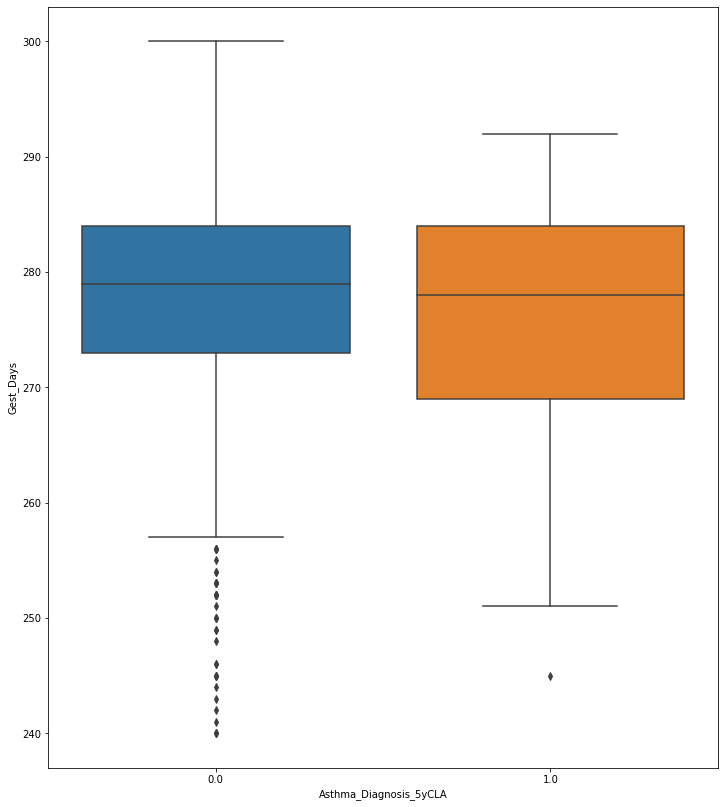

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 14))
sns.boxplot(
    y=df_complete_selected_screened["Gest_Days"],
    #    y=df_complete_selected_screened["Weight_for_age_0m"],
    x=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"]
    #    hue=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
)

count    1754.000000
mean      277.419361
std         9.172045
min       240.000000
25%       273.000000
50%       279.000000
75%       284.000000
max       300.000000
Name: Gest_Days, dtype: float64

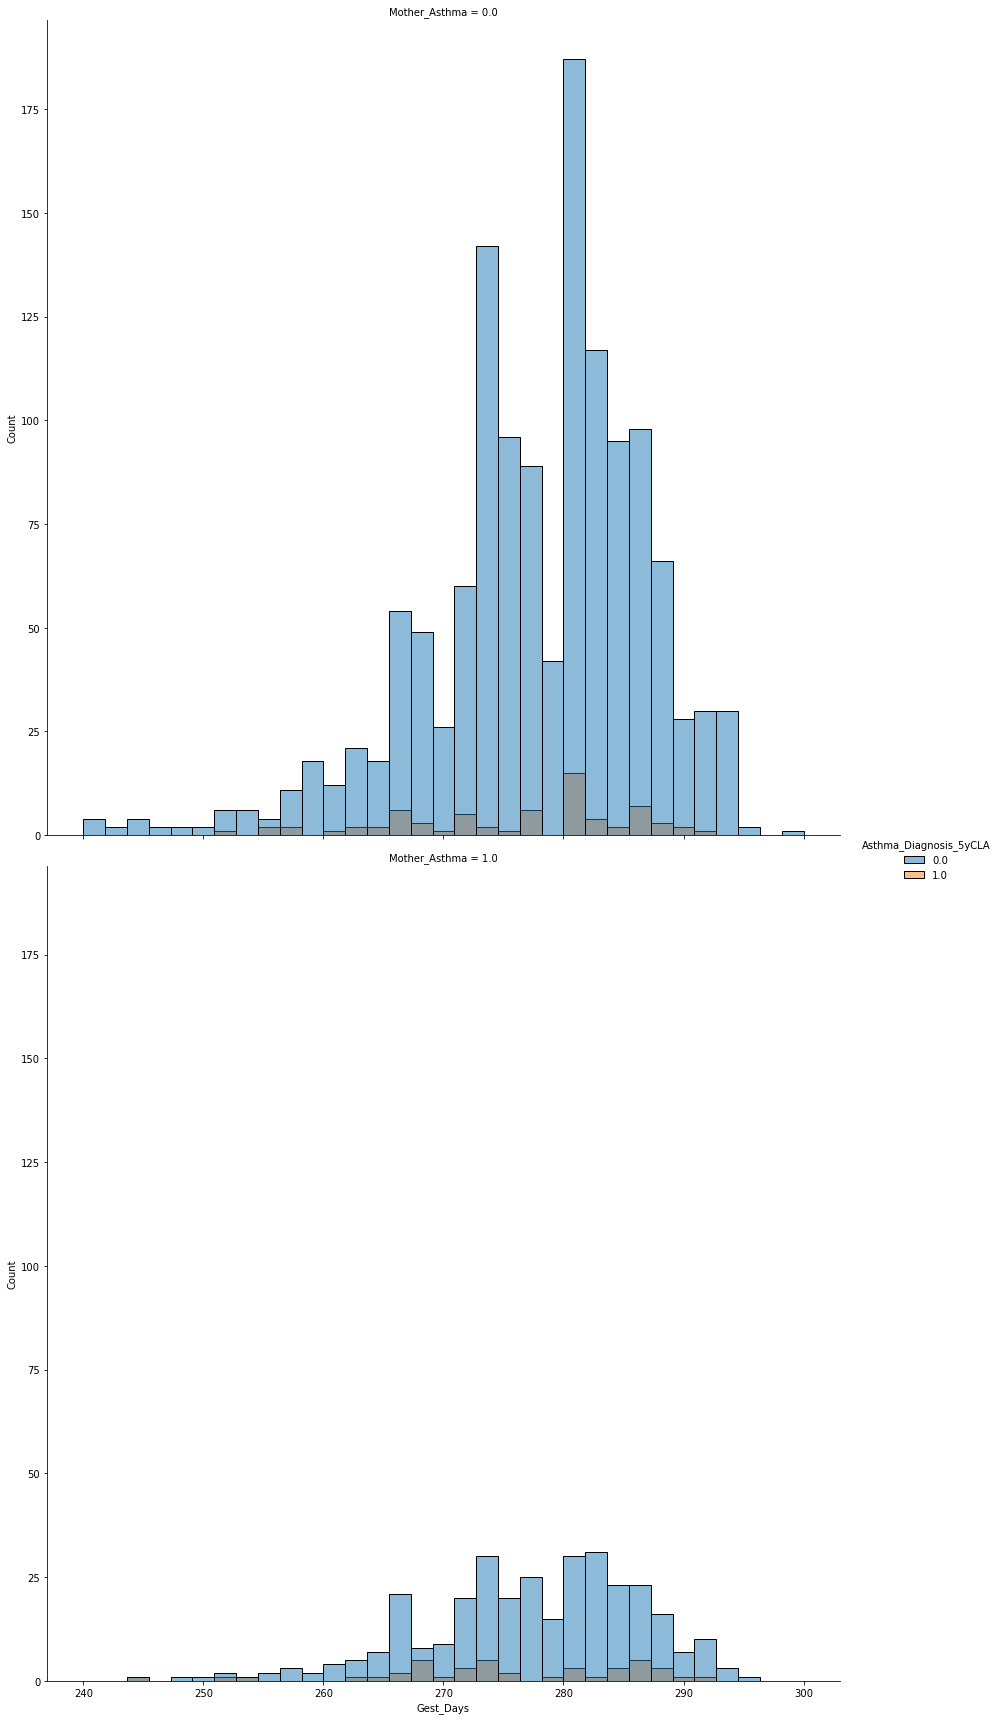

<IPython.core.display.Javascript object>

In [36]:
df_complete_selected_screened["Gest_Days"].describe()
sns.displot(
    x=df_complete_selected_screened["Gest_Days"],
    hue=df_complete_selected_screened["Asthma_Diagnosis_5yCLA"],
    #    col=df_complete_selected_screened["Wheeze_3yCLA"],
    row=df_complete_selected_screened["Mother_Asthma"],
    height=12,
)

In [25]:
len(set(df_complete_selected_screened.index) & gest_imputation_index)

31

<IPython.core.display.Javascript object>

In [43]:
39 * 7

273

<IPython.core.display.Javascript object>

In [7]:
(38 * 7, 42 * 7)

(266, 294)

<IPython.core.display.Javascript object>

In [13]:
gest_imputation_index = set(
    df_child["Gest_Days"][df_child["Gest_Days"].isna()].index.values
)

<IPython.core.display.Javascript object>

In [8]:
df_child["Gest_Days"].isna().sum()
df_child["Gest_Days"].describe()

62

count    3393.000000
mean      276.680519
std         9.465081
min       238.000000
25%       272.000000
50%       278.000000
75%       283.000000
max       322.000000
Name: Gest_Days, dtype: float64

<IPython.core.display.Javascript object>

<Figure size 864x1152 with 0 Axes>

<Figure size 864x1152 with 0 Axes>

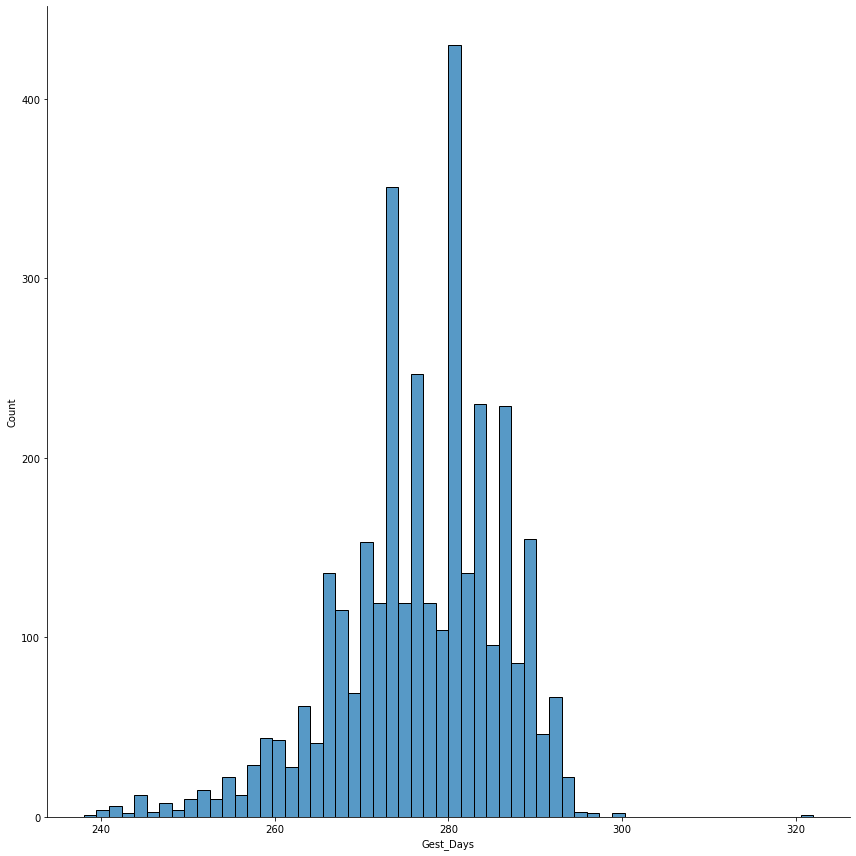

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(12, 16))
sns.displot(df_child["Gest_Days"], height=12)

## Step 1: Extract features including 4y for SFS at 4y timepoint

In [17]:
features_progression_4y_dt

at_birth  6_months    1_year   2_years   3_years  \
Features                                                                  
Mother_Asthma          0.981125  0.711396  0.346804  0.217496  0.042474   
Wheeze_Father          0.712198  0.333333  0.308909       NaN       NaN   
Father_Asthma          0.593370       NaN       NaN       NaN       NaN   
Jaundice_Birth         0.379577  0.333775  0.058528       NaN       NaN   
Weight_for_age_0m      0.377685       NaN       NaN       NaN       NaN   
...                         ...       ...       ...       ...       ...   
Pulse_Rate_3yCLA            NaN       NaN       NaN       NaN  0.054975   
Noncold_Wheeze_2hy          NaN       NaN       NaN       NaN  0.026159   
Epi_Noncold_Wheeze_4y       NaN       NaN       NaN       NaN       NaN   
Cumulative_Wheeze_48m       NaN       NaN       NaN       NaN       NaN   
Wheeze_4y                   NaN       NaN       NaN       NaN       NaN   

                        4_years  
Features                         
Mother_Asthma          0.041451  
Wheeze_Father               NaN  
Father_Asthma               NaN  
Jaundice_Birth              NaN  
Weight_for_age_0m           NaN  
...                         ...  
Pulse_Rate_3yCLA       0.106195  
Noncold_Wheeze_2hy     0.032744  
Epi_Noncold_Wheeze_4y  0.304881  
Cumulative_Wheeze_48m  0.250262  
Wheeze_4y              0.224831  

[70 rows x 6 columns]

<IPython.core.display.Javascript object>

In [16]:
features_progression_4y_dt = pd.read_excel(
    "Feature_Importance_with4y.xlsx", index_col=0
)

<IPython.core.display.Javascript object>

In [12]:
previous_features_progression

Features Time Point  Feature Importance Category
0                Gest Days   At Birth            1.000000   Clinic
1            Mother Asthma   At Birth            0.981125  Genetic
2            Wheeze Father   At Birth            0.712198  Genetic
3            Father Asthma   At Birth            0.593370  Genetic
4           Jaundice Birth   At Birth            0.379577   Clinic
..                     ...        ...                 ...      ...
108   RIseverity later 36m    3 Years            0.162648   Clinic
109          Child Food 3y    3 Years            0.146694   Clinic
110  Cumulative Wheeze 30m    3 Years            0.100575   Clinic
111       Pulse Rate 3yCLA    3 Years            0.054975   Clinic
112     Noncold Wheeze 2hy    3 Years            0.026159   Clinic

[113 rows x 4 columns]

<IPython.core.display.Javascript object>

In [11]:
previous_features_progression = pd.read_excel(
    "Feature_Importance_3categories.xlsx", index_col=0
)

<IPython.core.display.Javascript object>

In [3]:
previous_features_progression = pd.read_excel(
    "Feature_Importance_3categories.xlsx", index_col=0
)

<IPython.core.display.Javascript object>

In [4]:
previous_selected_features_3y = {
    "_".join(i.split(" "))
    for i in previous_features_progression[
        previous_features_progression["Time Point"] == "3 Years"
    ].Features.values
}

previous_selected_features_3y

{'Antibiotics_Usage_12m',
 'Child_Atopy_3y',
 'Child_Food_3y',
 'Cumulative_Wheeze_30m',
 'Cumulative_Wheeze_36m',
 'Epi_Noncold_Wheeze_2y',
 'Gest_Days',
 'Mother_Asthma',
 'Noncold_Wheeze_2hy',
 'Noncold_Wheeze_2y',
 'Noncold_Wheeze_3m',
 'Number_of_AntibioticsCourse_12m',
 'Pulse_Rate_3yCLA',
 'RIfrequency_earlier_12m',
 'RIseverity_earlier_12m',
 'RIseverity_later_36m',
 'Recurrent_Wheeze_3y',
 'Time_of_AntibioticsUsage_12m',
 'Wheeze_1y',
 'Wheeze_1yCLA',
 'Wheeze_3yCLA'}

<IPython.core.display.Javascript object>

In [5]:
features_4y = set(df_child.columns[df_child.columns.str.contains("_4y|_48m")].values)
features_4y

{'Cumulative_Wheeze_48m',
 'Epi_Noncold_Wheeze_4y',
 'Noncold_Wheeze_4y',
 'Wheeze_4y'}

<IPython.core.display.Javascript object>

In [6]:
len(previous_selected_features_3y | features_4y)

25

<IPython.core.display.Javascript object>

## Step 2: Repeat the Data Cleaning and Train  & Holdout Split Process with previous parameters

In [50]:
exclude_inconsistent_asthma = True
exclude_repetitive_features = True
repetitive_features = {
    "Asthma_Father",
    "Asthma_Mother",
    "BF_3m",
    "BF_6m",
    "Parental_Asthma",
    "Weight_0m",
    "Weight_12m",
    "Weight_36m",
    "Weight_3m",
    "Weight_60m",
} | {"Dad_Food", "Dad_Inhalant", "Mom_Food", "Mom_Inhalant"}

# Preprocessing
apgar_engineer = "Ordinal"
birth_mode = 2
birth_binary_pregnancy = True
birth_signal_suction = True
log_col = ["Stay_Duration_Hospital"]
pss_discretize = "Ordinal"
NaN_imputation_strategy = "mode"
imputing_correlated_subset = "MissForest"
imputing_random_state = 2021
indicator_threshold = 9999
collinear_level = 0.98

# Dataset Split
holdout_random_state = 100
ingredient_persist = 17
ingredient_transient = 0
ingredient_emerged = 3
ingredient_no_asthma = 250
include_dust = False
treat_possible_as_3yCLA = {2: np.nan}
treat_possible_as_5yCLA = {2: np.nan}


coef_thresh = 0.1
featimp_thresh = 0.05
permutation_thresh = 0.01

if exclude_repetitive_features:
    df_child_selected = df_child.copy()
    df_child_selected.drop(columns=repetitive_features, inplace=True)
else:
    df_child_selected = df_child.copy()

if exclude_inconsistent_asthma:
    # Extract inconsistent subject number
    subject_to_drop_father_na = set(
        df_child.Father_Asthma[df_child.Father_Asthma.isna()].index
    )
    df_differences = df_child[
        ["Asthma_Mother", "Mother_Asthma", "Asthma_Father", "Father_Asthma"]
    ].copy()
    df_differences.fillna("8888", inplace=True)
    subject_to_drop_asthma_discrepancy = set(
        pd.concat(
            (
                df_differences[
                    df_differences.Father_Asthma != df_differences.Asthma_Father
                ],
                df_differences[
                    df_differences.Mother_Asthma != df_differences.Asthma_Mother
                ],
            )
        ).index
    )
    subject_to_exclude = subject_to_drop_asthma_discrepancy | subject_to_drop_father_na

    remaining_subject = set(df_child_selected.index) - subject_to_exclude
    print("The original cohort size is:", len(df_child_selected.index))
    print(
        "The excluded subject size due to parental asthma inconsistency is:",
        len(subject_to_exclude),
    )
    print("The leftover cohort size for train and test is:", len(remaining_subject))

    df_child_selected_screened = df_child_selected.loc[remaining_subject, :]
else:
    df_child_selected_screened = df_child_selected.copy()

preprocessor = Pipeline(
    steps=[
        ("apgar", ApgarTransformer(engineer_type=apgar_engineer)),
        (
            "birth",
            BirthTransformer(
                birth_mode_delivery=birth_mode,
                binary_pregnancy_conditions=birth_binary_pregnancy,
                signal_suction=birth_signal_suction,
            ),
        ),
        ("log1p", Log1pTransformer(cols=log_col),),
        (
            "resp",
            RespiratoryTransformer(first_18m_divide=True, minimal_value_presence=1),
        ),
        ("pss", DiscretizePSS(discretize=pss_discretize)),
        (
            "catimp",
            CatNaNImputer(
                NaN_signal_thresh=indicator_threshold,
                NaN_imputation_strategy=NaN_imputation_strategy,
            ),
        ),
        (
            "numimp",
            NumNaNimputer(
                add_indicator_threshold=indicator_threshold,
                imputing_correlated_subset=imputing_correlated_subset,
                random_state=imputing_random_state,
            ),
        ),
        ("collinrem", CollinearRemover(collinear_level=collinear_level)),
    ]
)
preprocessor

##########Step 2 Dataset Split###############

df, a, b = df_holdout_throughout(
    df_child_selected_screened,
    include_dust=include_dust,
    treat_possible_as_3yCLA=treat_possible_as_3yCLA,  # Total Number of Persistent will be perserved if 3yCLA possible is treated as 1 for our algorithm, total number of
    # persistent asthma will be less if 3yCLA possible is ignored as there is 2 to 1 from 3yCLA to 5yCLA.
    treat_possible_as_5yCLA=treat_possible_as_5yCLA,  # Possible will be dropped for modelling
    holdout_random_state=holdout_random_state,
    ingredient_persist=ingredient_persist,
    ingredient_transient=ingredient_transient,
    ingredient_emerged=ingredient_emerged,
    ingredient_no_asthma=ingredient_no_asthma,
)

##########Step 3 Transform###############
# preprocessor.fit_transform(df)

#     four_time_dict, _ = feature_grouping_generator(df, group_type="four_timepoints")
#     five_time_dict, _ = feature_grouping_generator(df, group_type="five_timepoints")
#     six_time_dict, _ = feature_grouping_generator(df, group_type="six_timepoints")
#     three_type_dict, _ = feature_grouping_generator(df, group_type="three_categories")
#     four_type_dict, _ = feature_grouping_generator(df, group_type="four_categories")

#     # Progression time points dictionary for later on
#     progression_time_dict, _ = feature_grouping_generator(df, group_type=time_points_progression)
#     keys_for_all_features = "all_"+time_points_progression

#     # Generate the df for model building
#     df_with_target_selected_screened = df[
#         progression_time_dict[keys_for_all_features] | {"Asthma_Diagnosis_5yCLA"}
#     ].copy()

#     # Df for train & Eval and Holdout
#     df_complete_selected_screened = df_with_target_selected_screened.loc[
#         a + b, :
#     ].copy()
#     df_train_eval_selected_screened = df_with_target_selected_screened.loc[a, :].copy()
#     df_holdout_selected_screened = df_with_target_selected_screened.loc[b, :].copy()

#     df_train_eval_selected_screened.reset_index(drop=True, inplace=True)
#     df_holdout_selected_screened.reset_index(drop=True, inplace=True)

#     ##########Step 4 ML Processing###############

#     ml_res_final_selected_screened = ml_res_visualization(
#         df_train_eval_selected_screened,
#         df_holdout_selected_screened,
#         progression_time_dict,
#         scalar=MinMaxScaler(),
#         cv=StratifiedKFold(n_splits=3, random_state=3, shuffle=True),
#         priori_k=25,
#         precision_inspection_range=0.005,
#         fixed_features=None,
#         scoring="average_precision",
#     )

#     # Merged Feature
#     ml_final_features_selected_screened = feature_progression_merge(
#         ml_res_final_selected_screened,
#         ml_list=["lr", "rf", "xgb", "svc", "dt"],
#         coef_thresh=coef_thresh,
#         featimp_thresh=featimp_thresh,
#         permutation_thresh=permutation_thresh,
#         how="sum",
#         normalize=True,
#     )

#     ml_ind_res_selected_screened = ml_individual_res(
#         df_train_eval_selected_screened,
#         df_holdout_selected_screened,
#         ml_res_final_selected_screened,  # Contains the auto-selected features for different models at different timepoints
#         scalar=MinMaxScaler(),
#         ci_bootstrap=True,
#         bootstrap_replace=True,
#         bootstrap_iterations=30,
#         subset_percentage=1,
#     )

#     ml_ens_res_bt_true_selected_screened = ml_ensemble_res(
#         df_train_eval_selected_screened,
#         df_holdout_selected_screened,
#         ml_final_features_selected_screened,
#         scalar=MinMaxScaler(),
#         threshold_for_selection=0.1,
#         ci_bootstrap=True,
#         bootstrap_replace=True,
#         bootstrap_iterations=30,
#         subset_percentage=1,
#     )

#     feature_with_direction_selected_screened = feature_merged_directionality(
#         df_train_eval_selected_screened,
#         df_holdout_selected_screened,
#         ml_final_features_selected_screened,
#         target_name="Asthma_Diagnosis_5yCLA",
#         estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
#         threshold_for_selection=0,
#     )

#     df_feature_for_vis_selected_screened = feature_category_dataframe(
#         df, ml_final_features_selected_screened, type_of_categories=type_of_categories,
#     )

#     return (
#         ml_res_final_selected_screened,
#         ml_ind_res_selected_screened,
#         ml_ens_res_bt_true_selected_screened,
#         feature_with_direction_selected_screened,
#         df_feature_for_vis_selected_screened,
#     )

The original cohort size is: 3455
The excluded subject size due to parental asthma inconsistency is: 697
The leftover cohort size for train and test is: 2758


Pipeline(steps=[('apgar', ApgarTransformer(engineer_type='Ordinal')),
                ('birth',
                 BirthTransformer(binary_pregnancy_conditions=True,
                                  signal_suction=True)),
                ('log1p', Log1pTransformer(cols=['Stay_Duration_Hospital'])),
                ('resp', RespiratoryTransformer(first_18m_divide=True)),
                ('pss', DiscretizePSS(discretize='Ordinal')),
                ('catimp',
                 CatNaNImputer(NaN_imputation_strategy='mode',
                               NaN_signal_thresh=9999)),
                ('numimp',
                 NumNaNimputer(add_indicator_threshold=9999,
                               imputing_correlated_subset='MissForest')),
                ('collinrem', CollinearRemover(collinear_level=0.98))])

The original sample dimension is (2758, 165)
The sample dimension with both 3y and 5y clinical assessment is (2141, 165)
The removed dust columns are Index(['Home_DEP_3m', 'Home_DiBP_3m', 'Home_DNBP_3m', 'Home_BzBP_3m',
       'Home_DEHP_3m'],
      dtype='object')
The sample dimension without dust sample data is (2141, 160)
The size of no asthma subject group is: 1645
Transient asthma is defined as those who were diagnosed as definite asthma at 3y but rediagnosed as no asthma at 5y.
The size of transient asthma subject group is: 46
Emerged asthma is defined as those who were diagnosed as no asthma at 3y but rediagnosed as definite asthma at 5y.
The size of emerged asthma subject group is: 56
The size of persistent asthma subject group is: 53
The shrunk dataframe to be processed (engineered and imputed): 
 Distribution of Asthma: 
0.0    1793
2.0     214
1.0     134
Name: Asthma_Diagnosis_5yCLA, dtype: int64, with the dimension of (2141, 160)
The train & evalution dataframe to be proce

<IPython.core.display.Javascript object>

In [20]:
# Df for train & Eval and Holdout
df_complete_selected_screened = df.loc[a + b, :].copy()
df_train_eval_selected_screened = df.loc[a, :].copy()
df_holdout_selected_screened = df.loc[b, :].copy()

df_train_eval_selected_screened.reset_index(drop=True, inplace=True)
df_holdout_selected_screened.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
df_train_eval_selected_screened
df_holdout_selected_screened

Gest_Days  Weight_for_age_0m  Weight_for_age_3m  Weight_for_age_12m  \
0         254.0               0.16             0.9100              2.1100   
1         270.0               0.40            -0.4400              1.3000   
2         266.0               0.33            -0.2516              1.4900   
3         281.0               0.53            -0.0100             -0.0100   
4         272.0              -0.89            -0.1400              0.7332   
...         ...                ...                ...                 ...   
1479      271.0              -0.61             0.2000              0.5000   
1480      268.0              -0.98             0.7000              0.6500   
1481      287.0               0.97             0.1700             -0.2100   
1482      268.0               0.47            -0.1200              0.2300   
1483      263.0               0.67             0.1600              0.0700   

      Weight_for_age_36m  Weight_for_age_60m  Number_of_AntibioticsCourse_12m  \
0                   1.76                2.01                                1   
1                   0.58                0.44                                1   
2                   1.95                1.35                                1   
3                  -0.42               -0.59                                0   
4                   0.70                1.06                                0   
...                  ...                 ...                              ...   
1479                0.87                0.35                                3   
1480               -0.04               -0.36                                0   
1481               -0.48               -0.44                                0   
1482                0.41               -0.08                                0   
1483                2.34                1.15                                2   

      Time_of_AntibioticsUsage_12m  Antibiotics_Usage_12m  No_of_Pregnancy  \
0                              238                      1              1.0   
1                              232                      1              2.0   
2                              349                      1              2.0   
3                                0                      0              1.0   
4                                0                      0              2.0   
...                            ...                    ...              ...   
1479                           151                      1              2.0   
1480                             0                      0              2.0   
1481                             0                      0              2.0   
1482                             0                      0              2.0   
1483                           310                      1              1.0   

      ...  CESD_24m_Low_Depression  BF_Status_3m_Exclusive  \
0     ...                        1                       0   
1     ...                        0                       0   
2     ...                        1                       0   
3     ...                        1                       1   
4     ...                        0                       0   
...   ...                      ...                     ...   
1479  ...                        1                       0   
1480  ...                        1                       0   
1481  ...                        1                       1   
1482  ...                        1                       0   
1483  ...                        0                       0   

      BF_Status_3m_Partial  BF_Status_3m_Zero  BF_Status_6m_Exclusive  \
0                        0                  1                       0   
1                        1                  0                       0   
2                        1                  0                       0   
3                        0                  0                       0   
4                        1                  0                

Gest_Days  Weight_for_age_0m  Weight_for_age_3m  Weight_for_age_12m  \
0        272.0               0.60               0.52               -0.03   
1        280.0               1.28               1.06                0.27   
2        275.0               0.41              -0.73               -0.51   
3        287.0              -0.30              -0.74               -0.40   
4        290.0               0.55              -1.36               -1.14   
..         ...                ...                ...                 ...   
265      282.0               1.21               1.21                2.15   
266      281.0               0.55               0.07                0.88   
267      272.0              -0.28               0.99                0.41   
268      281.0               0.99               0.29                0.10   
269      288.0               1.41              -0.54               -0.60   

     Weight_for_age_36m  Weight_for_age_60m  Number_of_AntibioticsCourse_12m  \
0                 -0.18               -0.69                                0   
1                 -0.28               -0.10                                0   
2                 -0.50               -0.30                                4   
3                  0.48                0.14                                0   
4                 -0.15               -0.07                                0   
..                  ...                 ...                              ...   
265                1.60                1.74                                1   
266                0.82                0.72                                0   
267                1.73                0.68                                0   
268                0.05               -0.07                                0   
269                0.12               -0.42                                0   

     Time_of_AntibioticsUsage_12m  Antibiotics_Usage_12m  No_of_Pregnancy  \
0                               0                      0              1.0   
1                               0                      0              3.0   
2                              52                      1              3.0   
3                               0                      0              1.0   
4                               0                      0              3.0   
..                            ...                    ...              ...   
265                           231                      1              1.0   
266                             0                      0              1.0   
267                             0                      0              2.0   
268                             0                      0              1.0   
269                             0                      0              2.0   

     ...  CESD_24m_Low_Depression  BF_Status_3m_Exclusive  \
0    ...                        1                       0   
1    ...                        1                       1   
2    ...                        1                       0   
3    ...                        1                       1   
4    ...                        1                       1   
..   ...                      ...                     ...   
265  ...                        1                       1   
266  ...                        1                       0   
267  ...                        1                       0   
268  ...                        1                       1   
269  ...                        1                       1   

     BF_Status_3m_Partial  BF_Status_3m_Zero  BF_Status_6m_Exclusive  \
0                       1                  0                       0   
1                       0                  0                       0   
2                       1                  0                       0   
3                       0                  0                       0   
4                       0                  0                       1   
..                    ...                

<IPython.core.display.Javascript object>

## Step 3: Perform ML modelling step by step for 4y ML performance and feature importance

### 3.0 Sanity check - check if all extracted features are in df

In [10]:
progression_time_dict = {}
progression_time_dict["4_years_cohorts"] = previous_selected_features_3y | features_4y
progression_time_dict
if len(previous_selected_features_3y | features_4y) == sum(
    [i in set(df.columns.values) for i in progression_time_dict["4_years_cohorts"]]
):
    print("All features are in transformed dataframe for CHILD")

{'4_years_cohorts': {'Antibiotics_Usage_12m',
  'Child_Atopy_3y',
  'Child_Food_3y',
  'Cumulative_Wheeze_30m',
  'Cumulative_Wheeze_36m',
  'Cumulative_Wheeze_48m',
  'Epi_Noncold_Wheeze_2y',
  'Epi_Noncold_Wheeze_4y',
  'Gest_Days',
  'Mother_Asthma',
  'Noncold_Wheeze_2hy',
  'Noncold_Wheeze_2y',
  'Noncold_Wheeze_3m',
  'Noncold_Wheeze_4y',
  'Number_of_AntibioticsCourse_12m',
  'Pulse_Rate_3yCLA',
  'RIfrequency_earlier_12m',
  'RIseverity_earlier_12m',
  'RIseverity_later_36m',
  'Recurrent_Wheeze_3y',
  'Time_of_AntibioticsUsage_12m',
  'Wheeze_1y',
  'Wheeze_1yCLA',
  'Wheeze_3yCLA',
  'Wheeze_4y'}}

All features are in transformed dataframe for CHILD


<IPython.core.display.Javascript object>

In [11]:
six_time_dict, _ = feature_grouping_generator(df, group_type="six_timepoints")
six_time_dict

The available keywords for grouped features are: dict_keys(['at_birth', '6_months', '1_year', '2_years', '3_years', '4_years', 'all_six_timepoints'])


{'at_birth': {'AD_Father',
  'AD_Mother',
  'Analgesics_usage_delivery',
  'Anesthetic_delivery',
  'Apgar_Score_1min_Below_Normal',
  'Apgar_Score_1min_Critical_Low',
  'Apgar_Score_1min_Normal',
  'Apgar_Score_5min_Below_Normal',
  'Apgar_Score_5min_Critical_Low',
  'Apgar_Score_5min_Normal',
  'CESD_18week_Low_Depression',
  'CESD_36week_Low_Depression',
  'Child_Ethnicity_Caucasian',
  'Child_Ethnicity_HalfCaucas',
  'Child_Ethnicity_NonCaucas',
  'Complications_Birth',
  'Dad_Atopy',
  'F10min_Free_Flow_Oxygen',
  'F10min_Intubation',
  'F10min_Mask_Ventilation',
  'F10min_No_Measure_Needed',
  'F10min_Oxygen_Mask',
  'F10min_Perineum_suction',
  'F10min_Positive_Pressure_Ventilation',
  'F10min_Suction',
  'FAllergies_Father',
  'FAllergies_Mother',
  'Father_Asthma',
  'Father_Caucasian',
  'First_10min_Measure',
  'Gest_Days',
  'Hayfever_Father',
  'Hayfever_Mother',
  'Jaundice_Birth',
  'Mode_of_delivery_Vaginal',
  'Mom_Atopy',
  'Mother_Asthma',
  'Mother_Caucasian',
  'No

<IPython.core.display.Javascript object>

In [12]:
progression_time_dict

{'4_years_cohorts': {'Antibiotics_Usage_12m',
  'Child_Atopy_3y',
  'Child_Food_3y',
  'Cumulative_Wheeze_30m',
  'Cumulative_Wheeze_36m',
  'Cumulative_Wheeze_48m',
  'Epi_Noncold_Wheeze_2y',
  'Epi_Noncold_Wheeze_4y',
  'Gest_Days',
  'Mother_Asthma',
  'Noncold_Wheeze_2hy',
  'Noncold_Wheeze_2y',
  'Noncold_Wheeze_3m',
  'Noncold_Wheeze_4y',
  'Number_of_AntibioticsCourse_12m',
  'Pulse_Rate_3yCLA',
  'RIfrequency_earlier_12m',
  'RIseverity_earlier_12m',
  'RIseverity_later_36m',
  'Recurrent_Wheeze_3y',
  'Time_of_AntibioticsUsage_12m',
  'Wheeze_1y',
  'Wheeze_1yCLA',
  'Wheeze_3yCLA',
  'Wheeze_4y'}}

<IPython.core.display.Javascript object>

In [13]:
# Modification to the source code to make it robust
list(progression_time_dict.keys())[:-1]

progression_time_dict.keys()
[i for i in six_time_dict.keys() if "all_" not in i]
[i for i in progression_time_dict.keys() if "all_" not in i]

[]

dict_keys(['4_years_cohorts'])

['at_birth', '6_months', '1_year', '2_years', '3_years', '4_years']

['4_years_cohorts']

<IPython.core.display.Javascript object>

### 3.1 Perform SFS calcuation at 4 year using different algorithms

The specific classifier where feature is being automatically selected is: LogisticRegression(C=0.02, class_weight='balanced')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2022-07-15 12:06:21] Features: 1/25 -- score: 0.3007413175092423[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-15 12:06:21] Features: 2/25 -- score: 0.45158525398088195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-07-15 12:06:25] Features: 13/25 -- score: 0.5369573444815382[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2022-07-15 12:06:26] Features: 14/25 -- score: 0.5372193983926365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2022-07-15 12:06:31] Features: 17/25 -- score: 0.5536821168176855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2022-07-15 12:06:31] Features: 18/25 -- score: 0.5520842482735874[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       250
         1.0       0.75      0.90      0.82        20

    accuracy                           0.97       270
   macro avg       0.87      0.94      0.90       270
weighted avg       0.97      0.97      0.97       270

The specific classifier where feature is being automatically selected is: RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=2021)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.3s finished

[2022-07-15 12:06:41] Features: 1/25 -- score: 0.28728878312244527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2022-07-15 12:06:46] Features: 2/25 -- score: 0.41339925952331597[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: U

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.0s finished

[2022-07-15 12:08:08] Features: 14/25 -- score: 0.5621633949060115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.2s finished

[2022-07-15 12:08:14] Features: 15/25 -- score: 0.5772365015850793[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s finished

[2022-07-15 12:09:49] Features: 21/25 -- score: 0.5607274368687337[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.9s finished

[2022-07-15 12:09:55] Features: 22/25 -- score: 0.5552621248730945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       250
         1.0       0.85      0.85      0.85        20

    accuracy                           0.98       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.98      0.98      0.98       270

The specific classifier where feature is being automatically selected is: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=2021, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=15, subsample=0.8, tree_method=None,
              validate_paramet

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.3s finished

[2022-07-15 12:10:30] Features: 1/25 -- score: 0.28728878312244527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2022-07-15 12:10:33] Features: 2/25 -- score: 0.42209582321232103[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:10:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2022-07-15 12:10:36] Features: 3/25 -- score: 0.5050534853802967[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished

[2022-07-15 12:10:39] Features: 4/25 -- score: 0.5325687983957949[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished

[2022-07-15 12:10:42] Features: 5/25 -- score: 0.5450003362136862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished

[2022-07-15 12:10:45] Features: 6/25 -- score: 0.5520424731804624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s finished

[2022-07-15 12:10:48] Features: 7/25 -- score: 0.5612507654498605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s finished

[2022-07-15 12:10:52] Features: 8/25 -- score: 0.5543693269937111[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:10:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished

[2022-07-15 12:10:56] Features: 9/25 -- score: 0.5528306709443813[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:10:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:10:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s finished

[2022-07-15 12:10:59] Features: 10/25 -- score: 0.5560455530477261[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:10:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished

[2022-07-15 12:11:03] Features: 11/25 -- score: 0.5523633778677055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished

[2022-07-15 12:11:09] Features: 11/25 -- score: 0.5561478170118902[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.4s finished

[2022-07-15 12:11:13] Features: 12/25 -- score: 0.5545040567628711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished

[2022-07-15 12:11:22] Features: 12/25 -- score: 0.5568985746647241[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished

[2022-07-15 12:11:29] Features: 11/25 -- score: 0.5620842850234969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.3s finished

[2022-07-15 12:11:33] Features: 12/25 -- score: 0.5600158974145821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished

[2022-07-15 12:11:39] Features: 11/25 -- score: 0.5652132841635872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2022-07-15 12:11:45] Features: 11/25 -- score: 0.5702443270782077[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:11:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished

[2022-07-15 12:11:49] Features: 12/25 -- score: 0.5703739750826268[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.4s finished

[2022-07-15 12:11:53] Features: 13/25 -- score: 0.5696962216058531[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.8s finished

[2022-07-15 12:11:57] Features: 14/25 -- score: 0.5564973217714079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:11:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished

[2022-07-15 12:12:00] Features: 15/25 -- score: 0.5667306477875012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished

[2022-07-15 12:12:05] Features: 15/25 -- score: 0.5670571566361526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.5s finished

[2022-07-15 12:12:10] Features: 16/25 -- score: 0.5642505232550921[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.3s finished

[2022-07-15 12:12:14] Features: 17/25 -- score: 0.5519239648021225[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.4s finished

[2022-07-15 12:12:20] Features: 17/25 -- score: 0.5661632628657389[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:12:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.1s finished

[2022-07-15 12:12:24] Features: 18/25 -- score: 0.5544018632261701[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.9s finished

[2022-07-15 12:12:28] Features: 19/25 -- score: 0.549064182553795[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.4s finished

[2022-07-15 12:12:31] Features: 20/25 -- score: 0.5366669386903596[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s finished

[2022-07-15 12:12:39] Features: 20/25 -- score: 0.5573226707979625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[12:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished

[2022-07-15 12:12:43] Features: 21/25 -- score: 0.5479728094393096[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.2s finished

[2022-07-15 12:12:49] Features: 21/25 -- score: 0.5508401648923333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.7s finished

[2022-07-15 12:12:53] Features: 22/25 -- score: 0.5365705996503397[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    3.1s finished

[2022-07-15 12:12:59] Features: 22/25 -- score: 0.5375118601959683[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:13:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    3.0s finished

[2022-07-15 12:13:03] Features: 23/25 -- score: 0.5273269200210688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    3.2s finished

[2022-07-15 12:13:06] Features: 24/25 -- score: 0.5334759997624917[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:13:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[12:13:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:13:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    4.0s finished

[2022-07-15 12:13:10] Features: 25/25 -- score: 0.5138440254761502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       250
         1.0       0.79      0.95      0.86        20

    accuracy                           0.98       270
   macro avg       0.89      0.96      0.93       270
weighted avg       0.98      0.98      0.98       270

The specific classifier where feature is being automatically selected is: SVC(C=0.02, class_weight='balanced', kernel='linear', probability=True,
    random_state=2021)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.8s finished

[2022-07-15 12:13:17] Features: 1/25 -- score: 0.3007413175092423[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2022-07-15 12:13:24] Features: 2/25 -- score: 0.45158525398088195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.3s finished

[2022-07-15 12:15:01] Features: 13/25 -- score: 0.5354478965449054[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.7s finished

[2022-07-15 12:15:09] Features: 14/25 -- score: 0.532455130536817[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.0s finished

[2022-07-15 12:17:00] Features: 18/25 -- score: 0.5371548148857875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.2s finished

[2022-07-15 12:17:07] Features: 19/25 -- score: 0.5356990341265847[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: U

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.4s finished

[2022-07-15 12:19:15] Features: 20/25 -- score: 0.5537675304061404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       250
         1.0       0.75      0.90      0.82        20

    accuracy                           0.97       270
   macro avg       0.87      0.94      0.90       270
weighted avg       0.97      0.97      0.97       270

The specific classifier where feature is being automatically selected is: DecisionTreeClassifier(class_weight='balanced', random_state=2021)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished

[2022-07-15 12:19:58] Features: 1/25 -- score: 0.28728878312244527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-15 12:19:58] Features: 2/25 -- score: 0.3819472965761706[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-07-15 12:20:00] Features: 13/25 -- score: 0.3806862574951717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2022-07-15 12:20:03] Features: 20/25 -- score: 0.244691050477465[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2022-07-15 12:20:03] Features: 21/25 -- score: 0.1975054580487375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       250
         1.0       0.92      0.60      0.73        20

    accuracy                           0.97       270
   macro avg       0.95      0.80      0.85       270
weighted avg       0.97      0.97      0.96       270



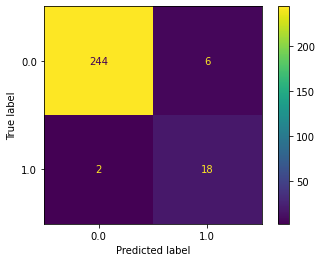

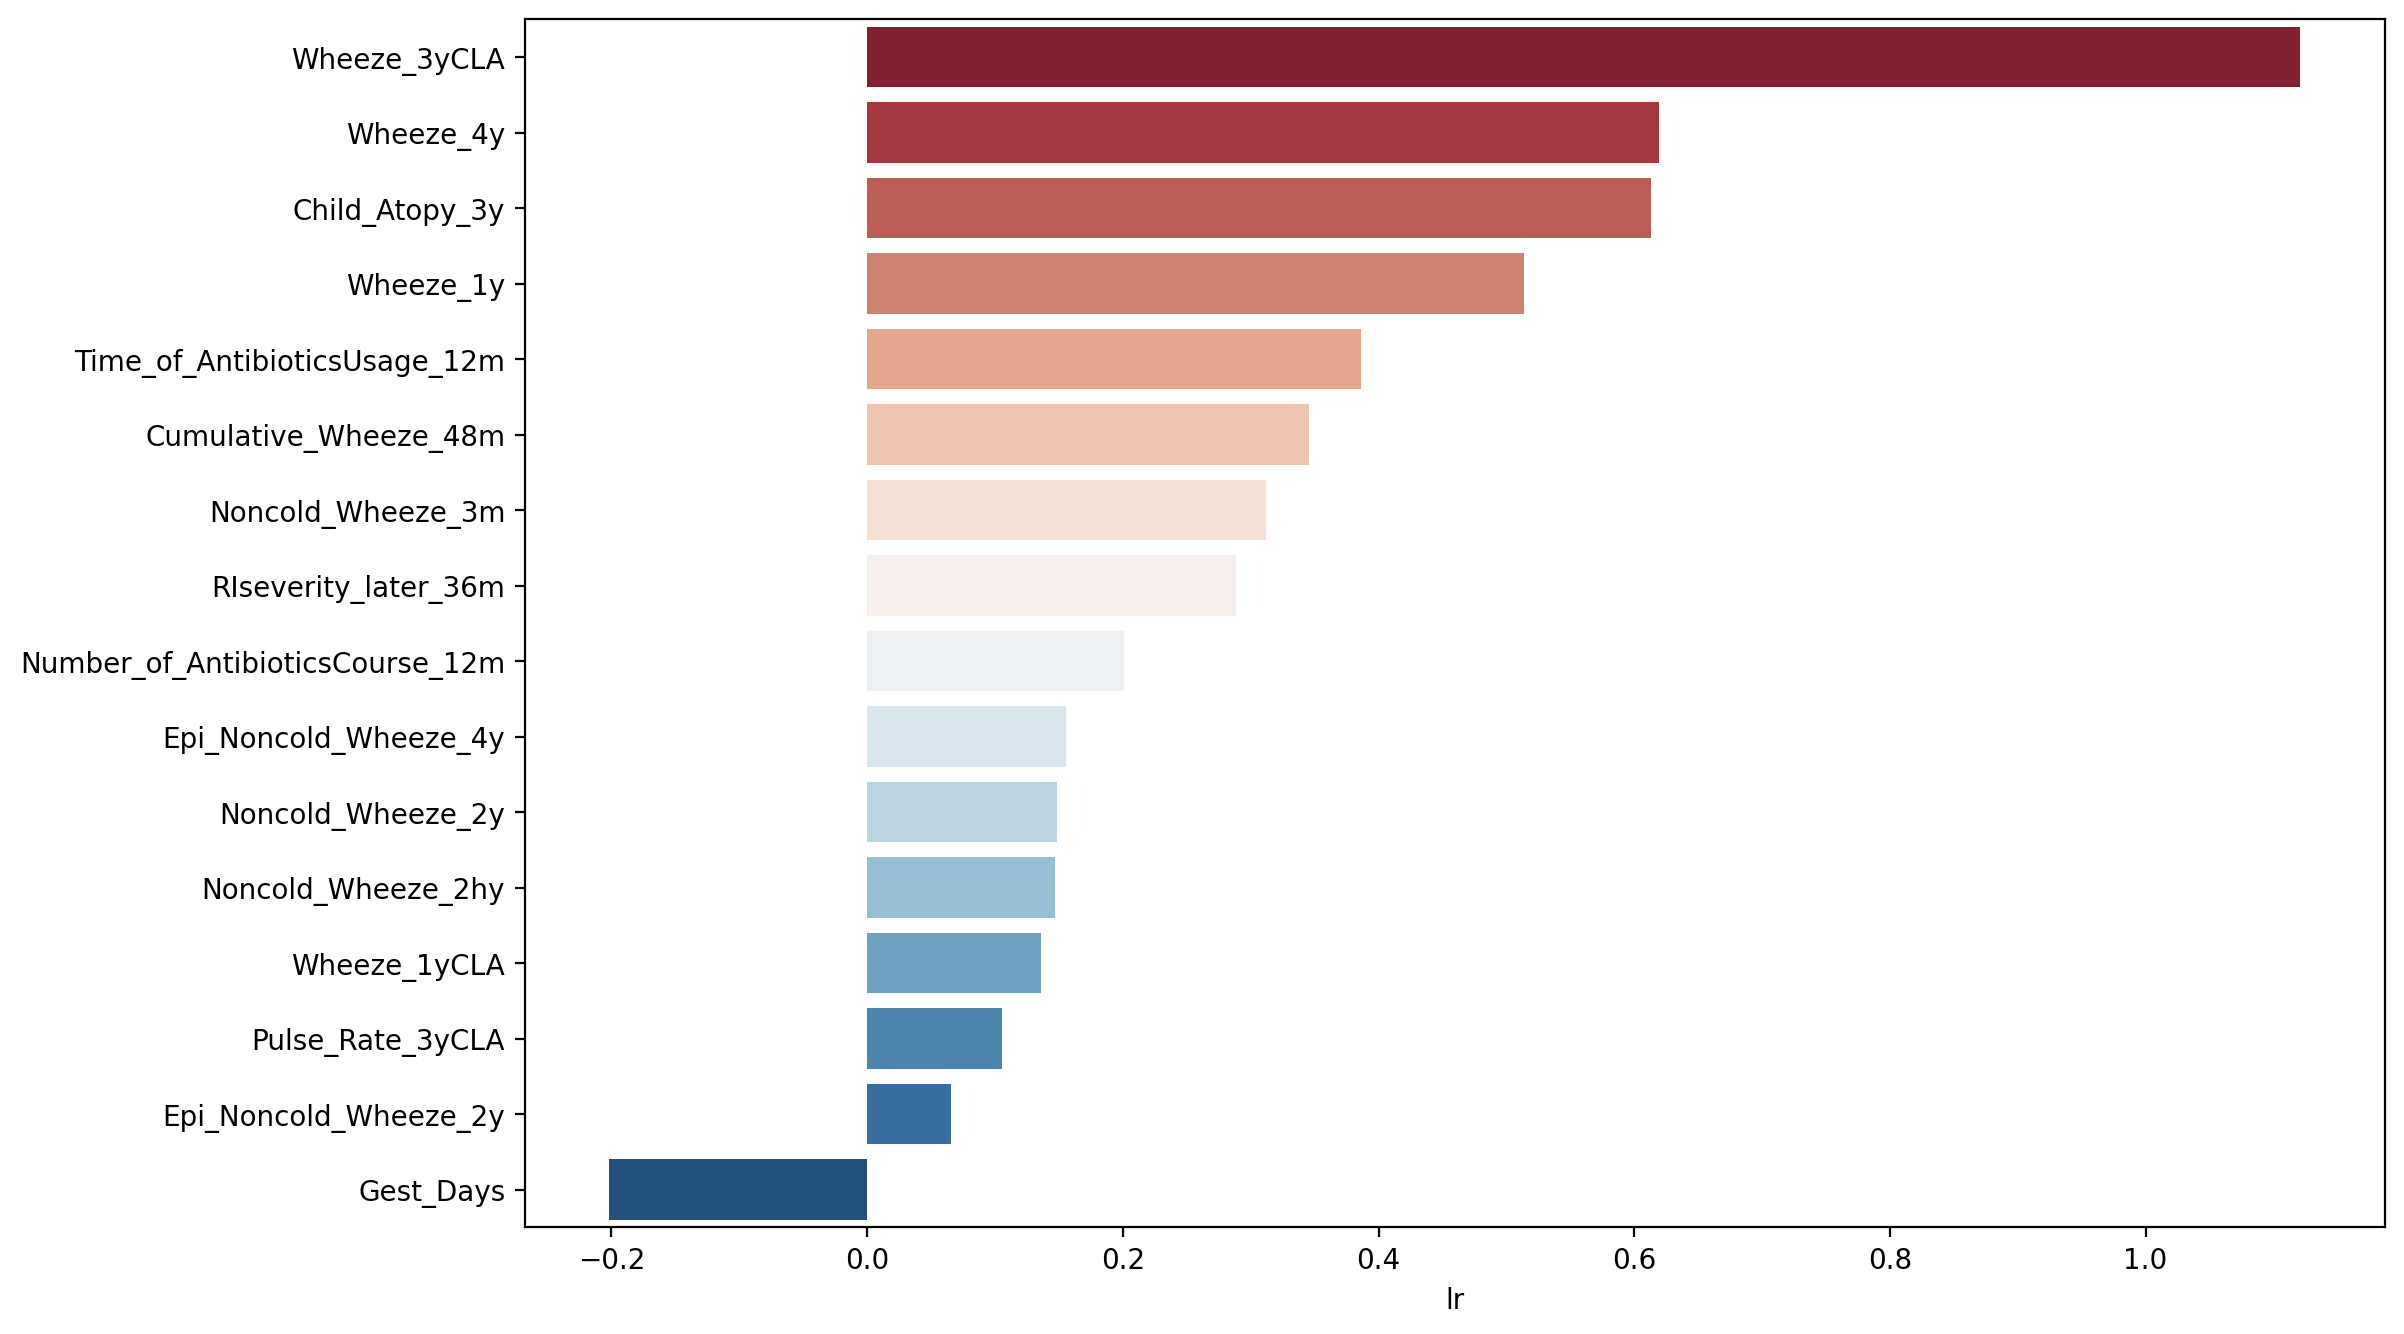

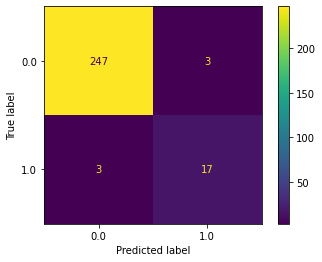

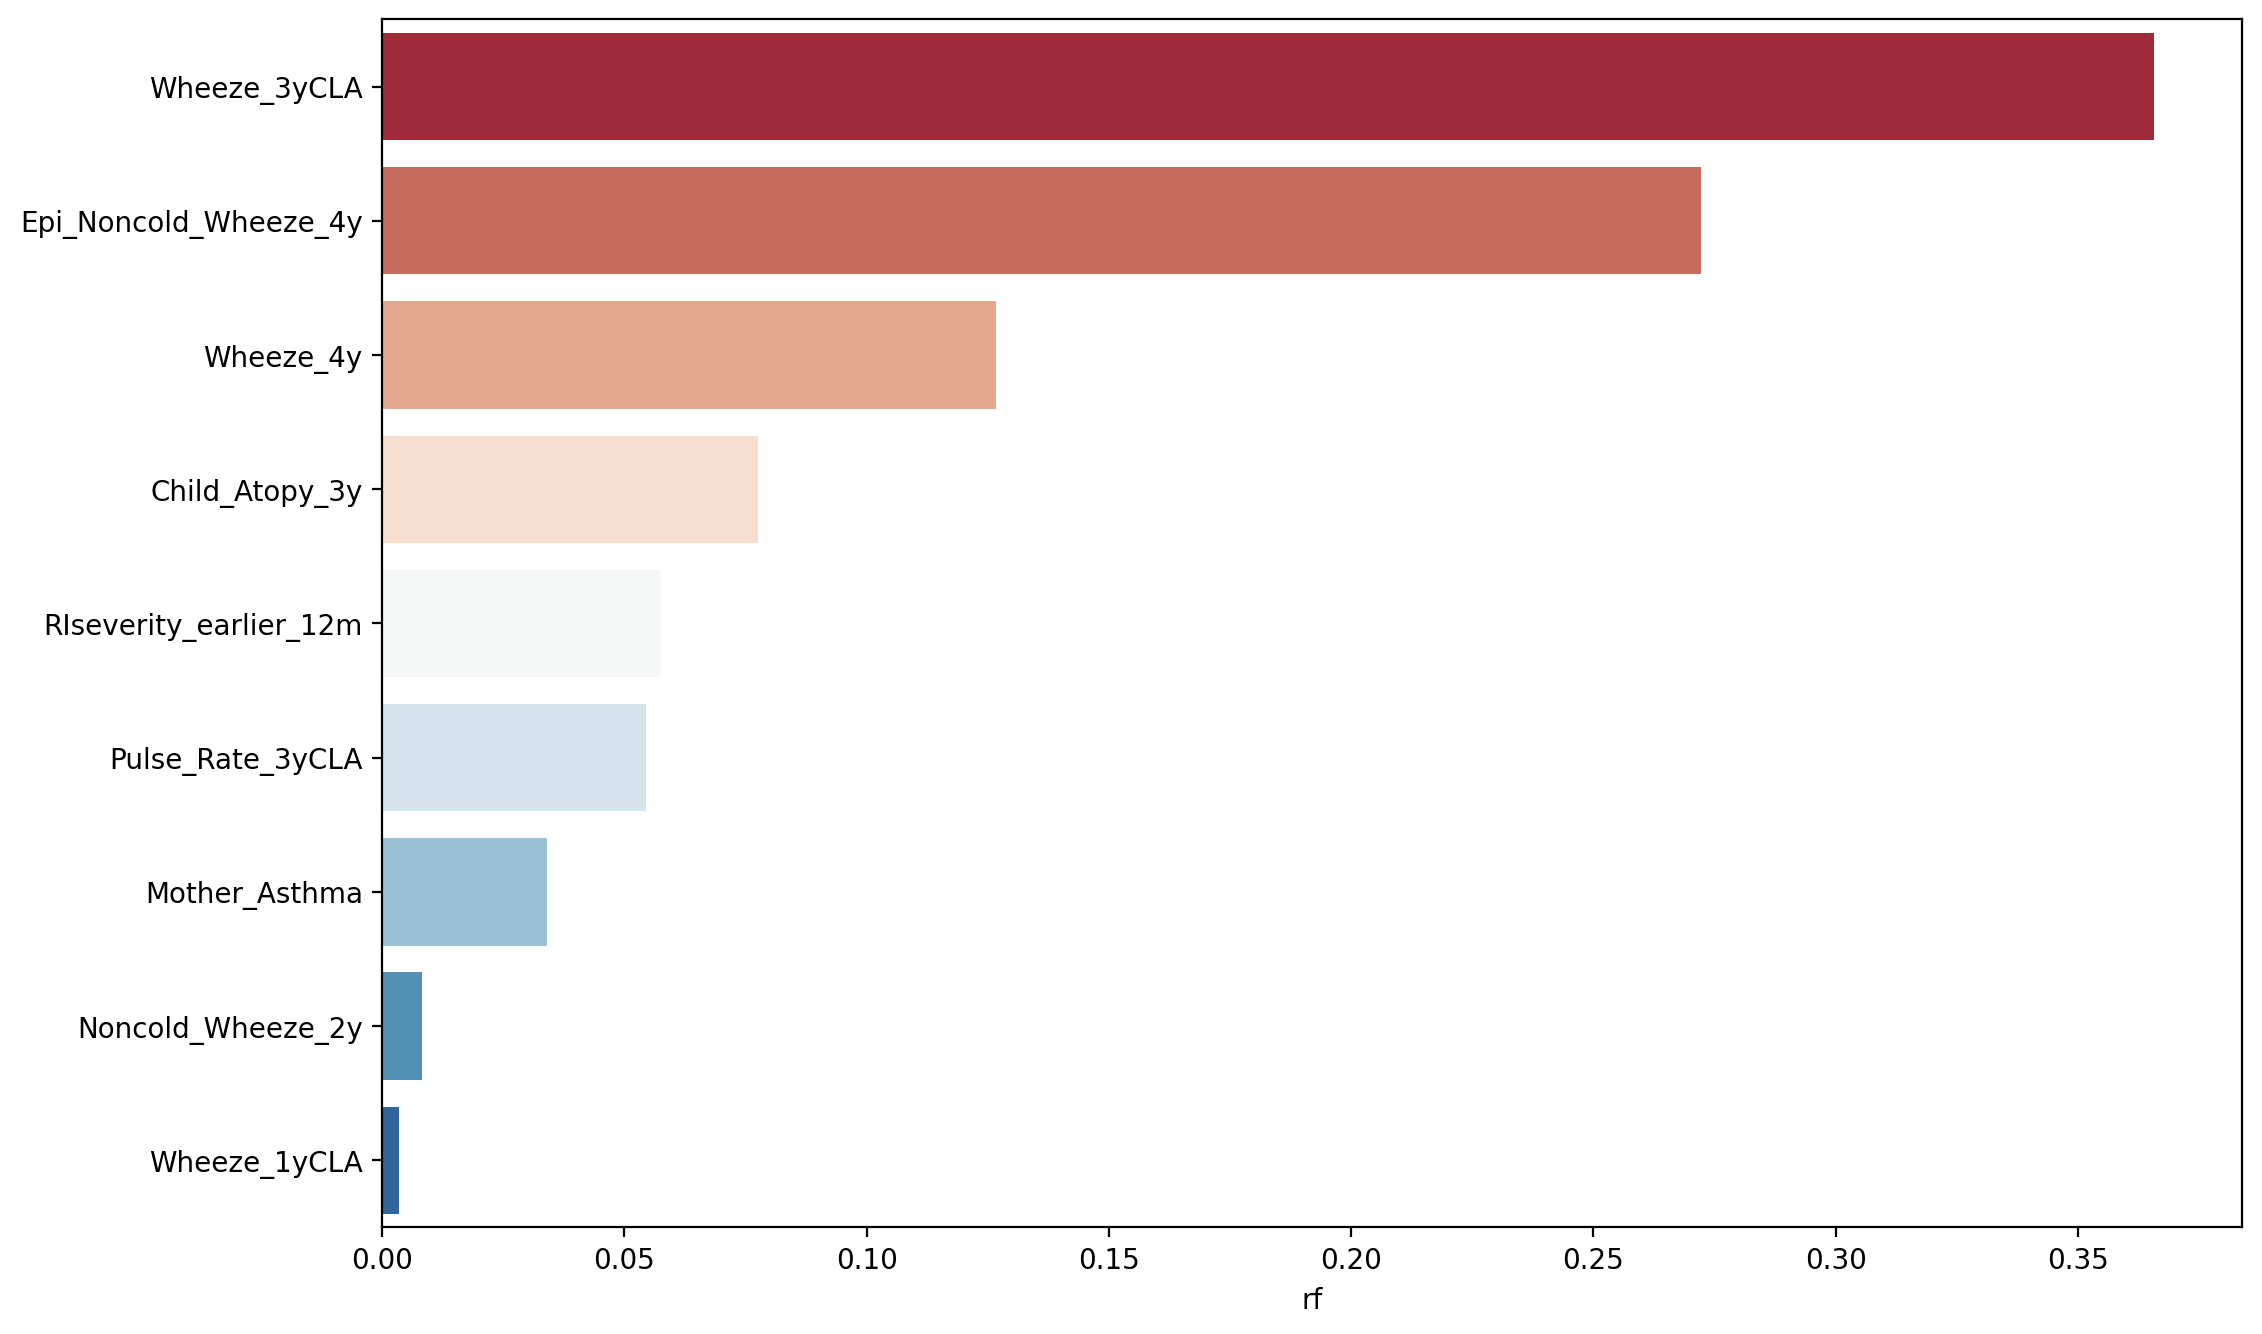

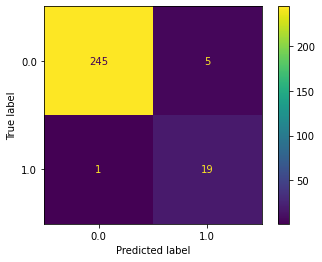

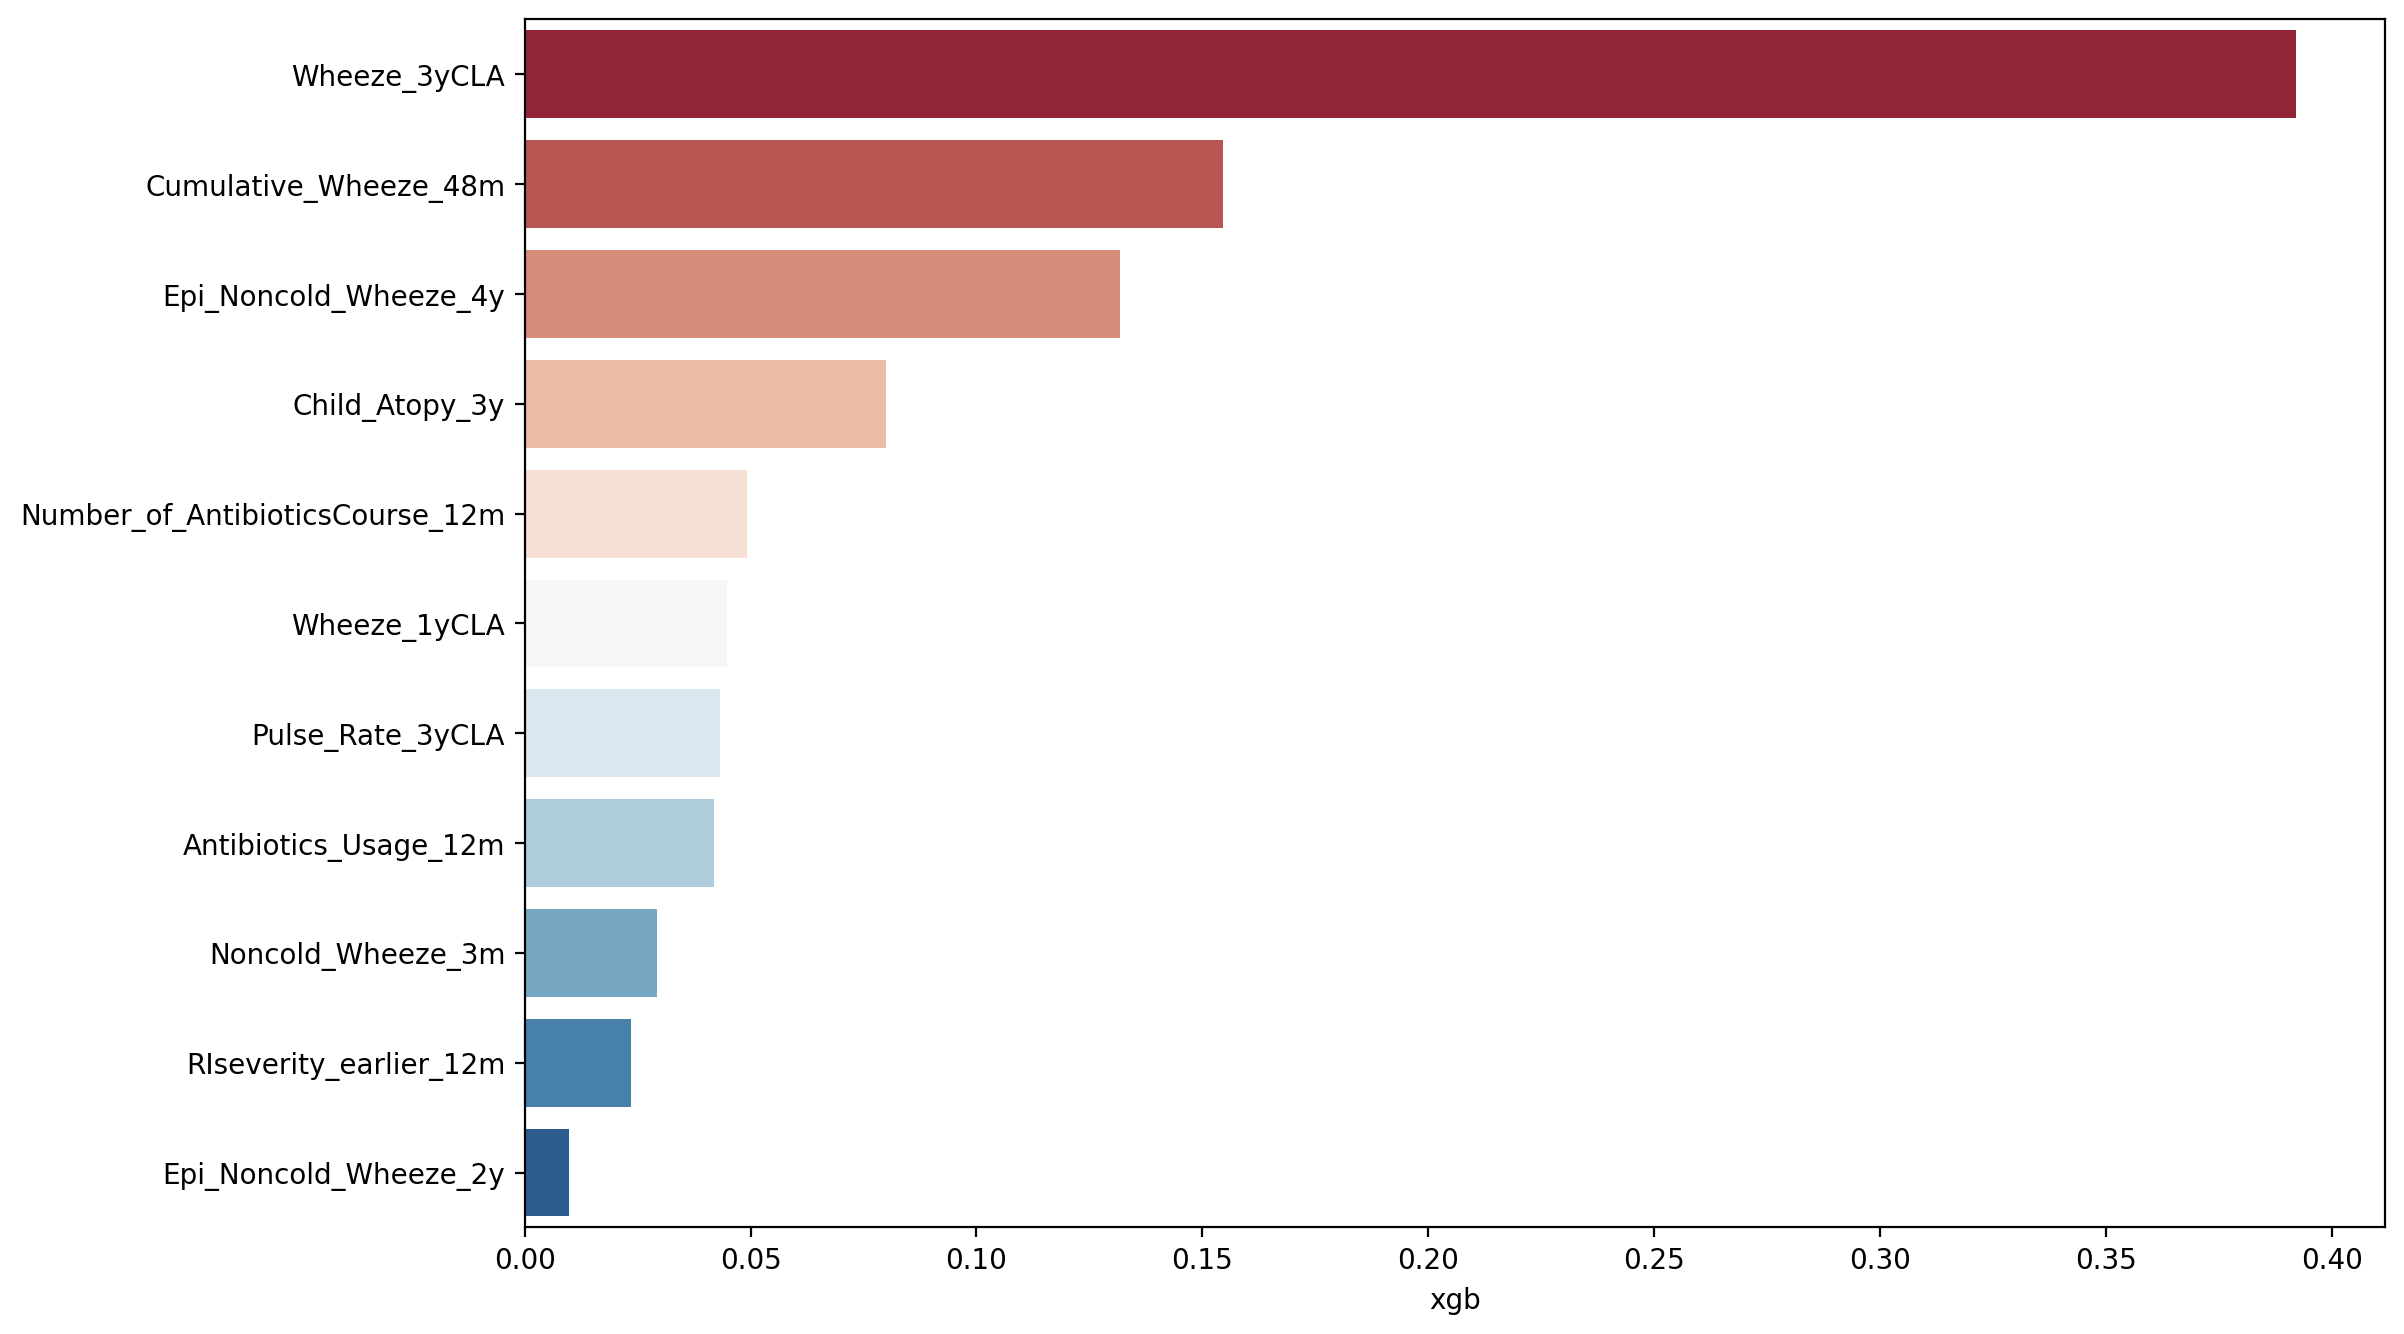

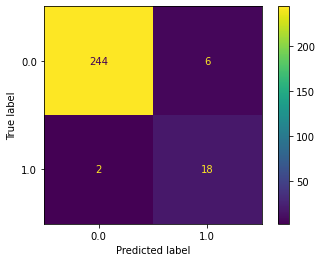

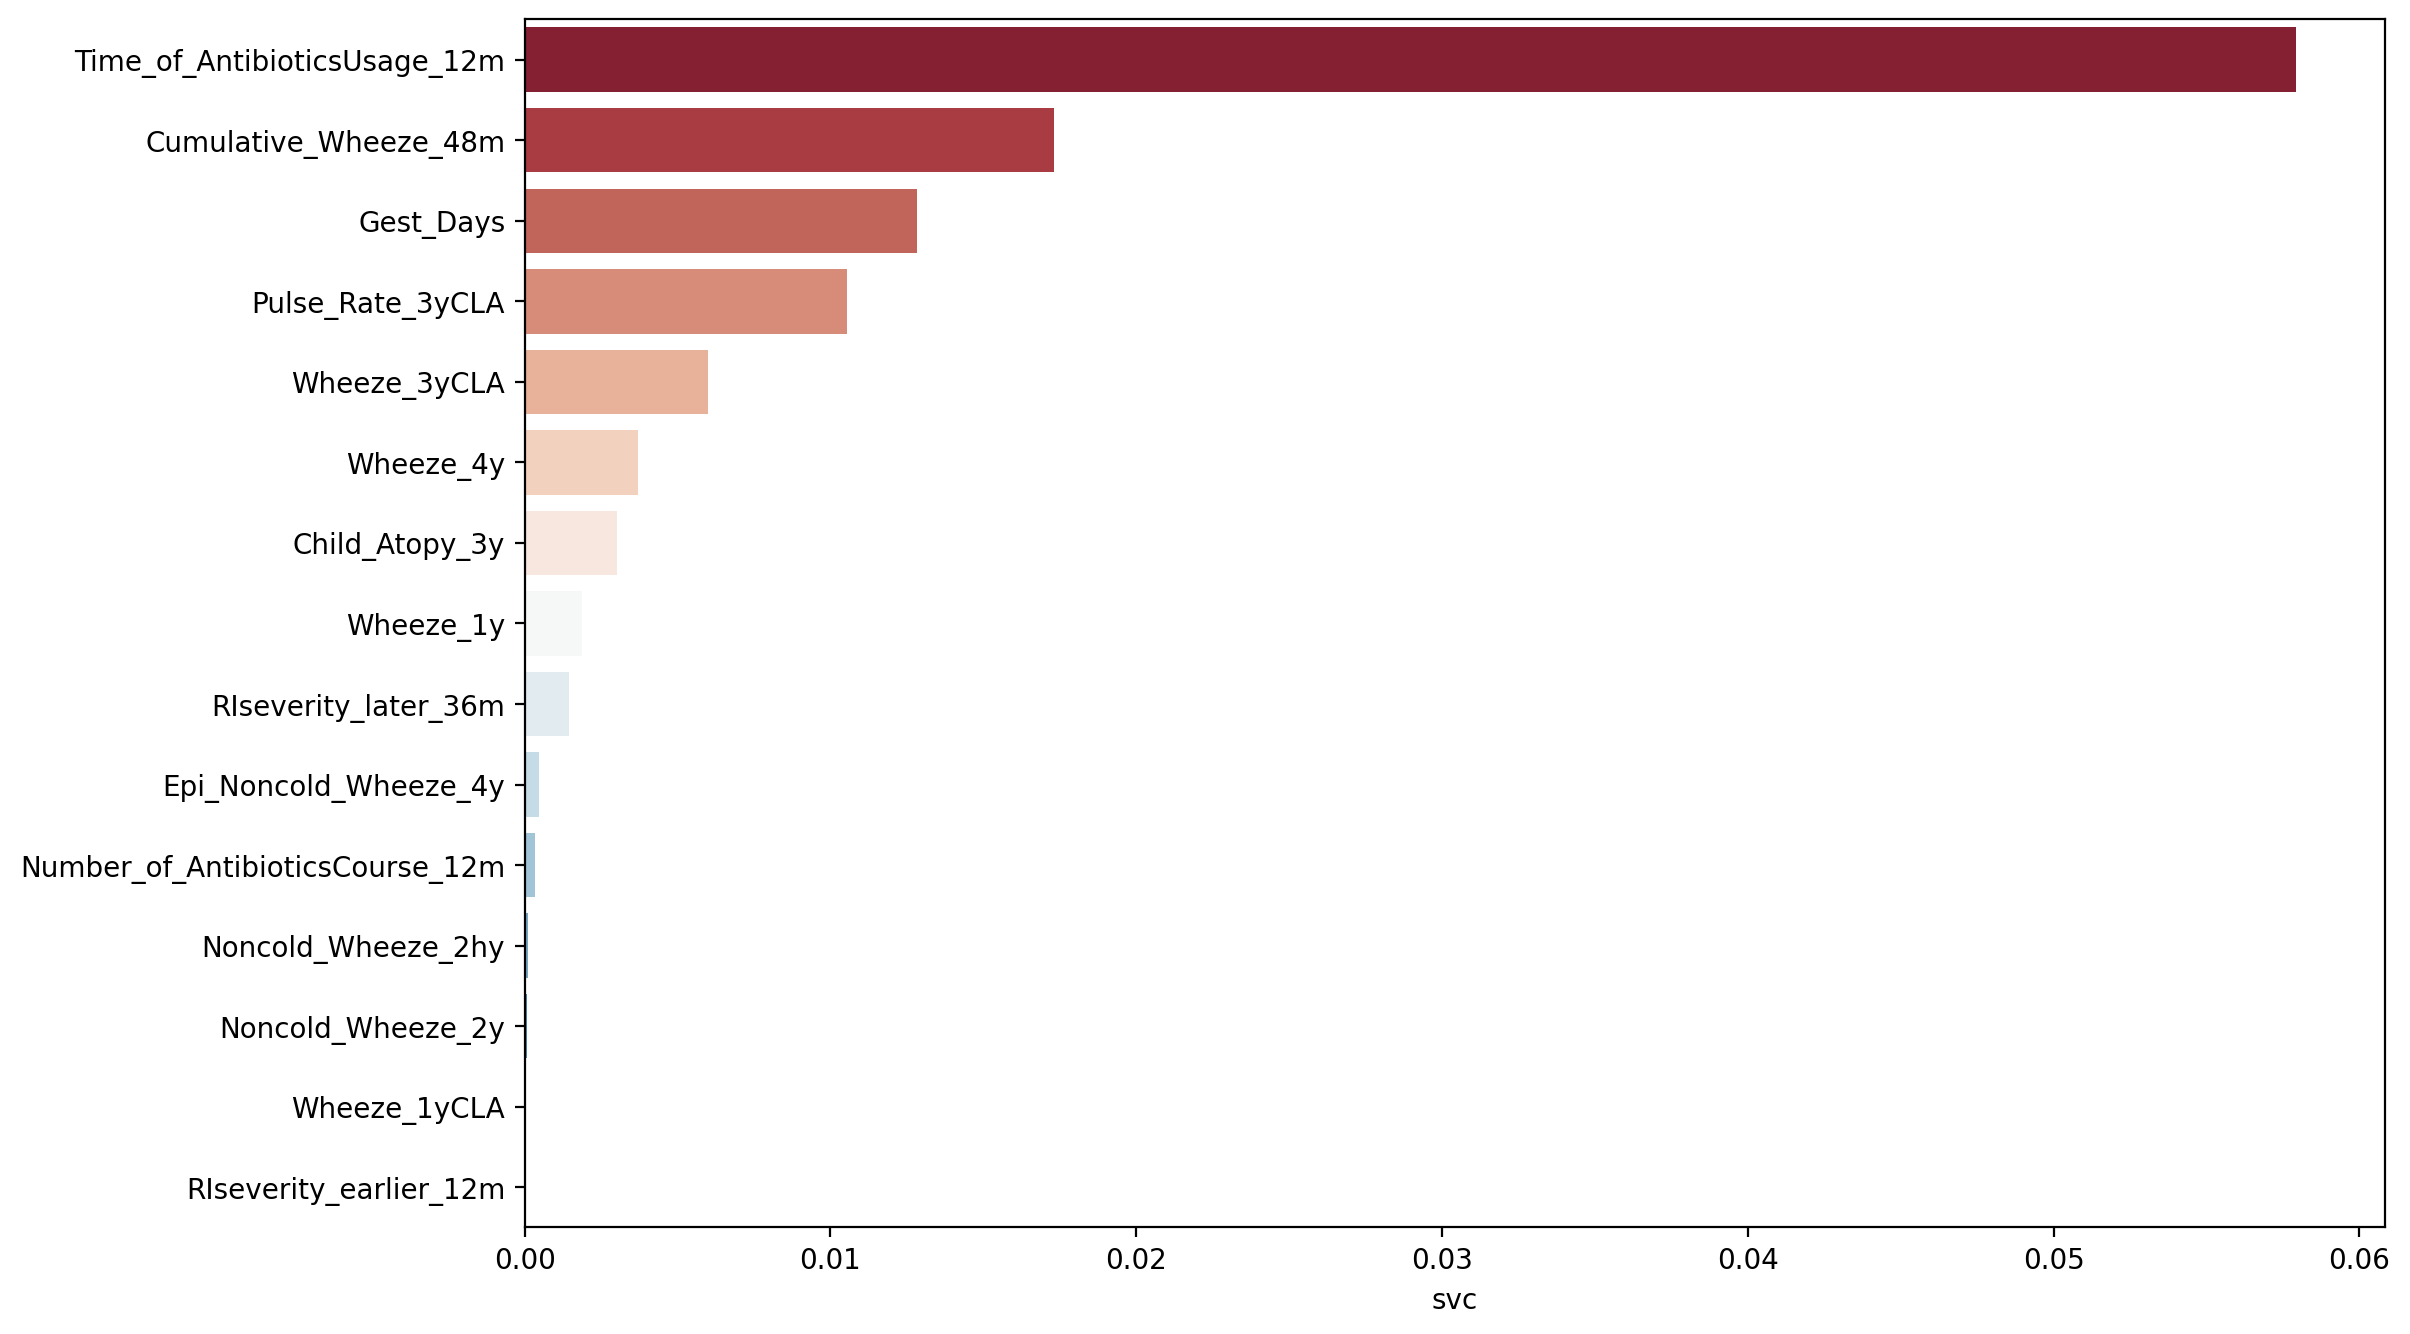

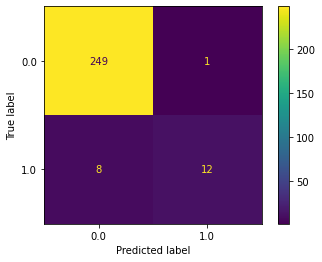

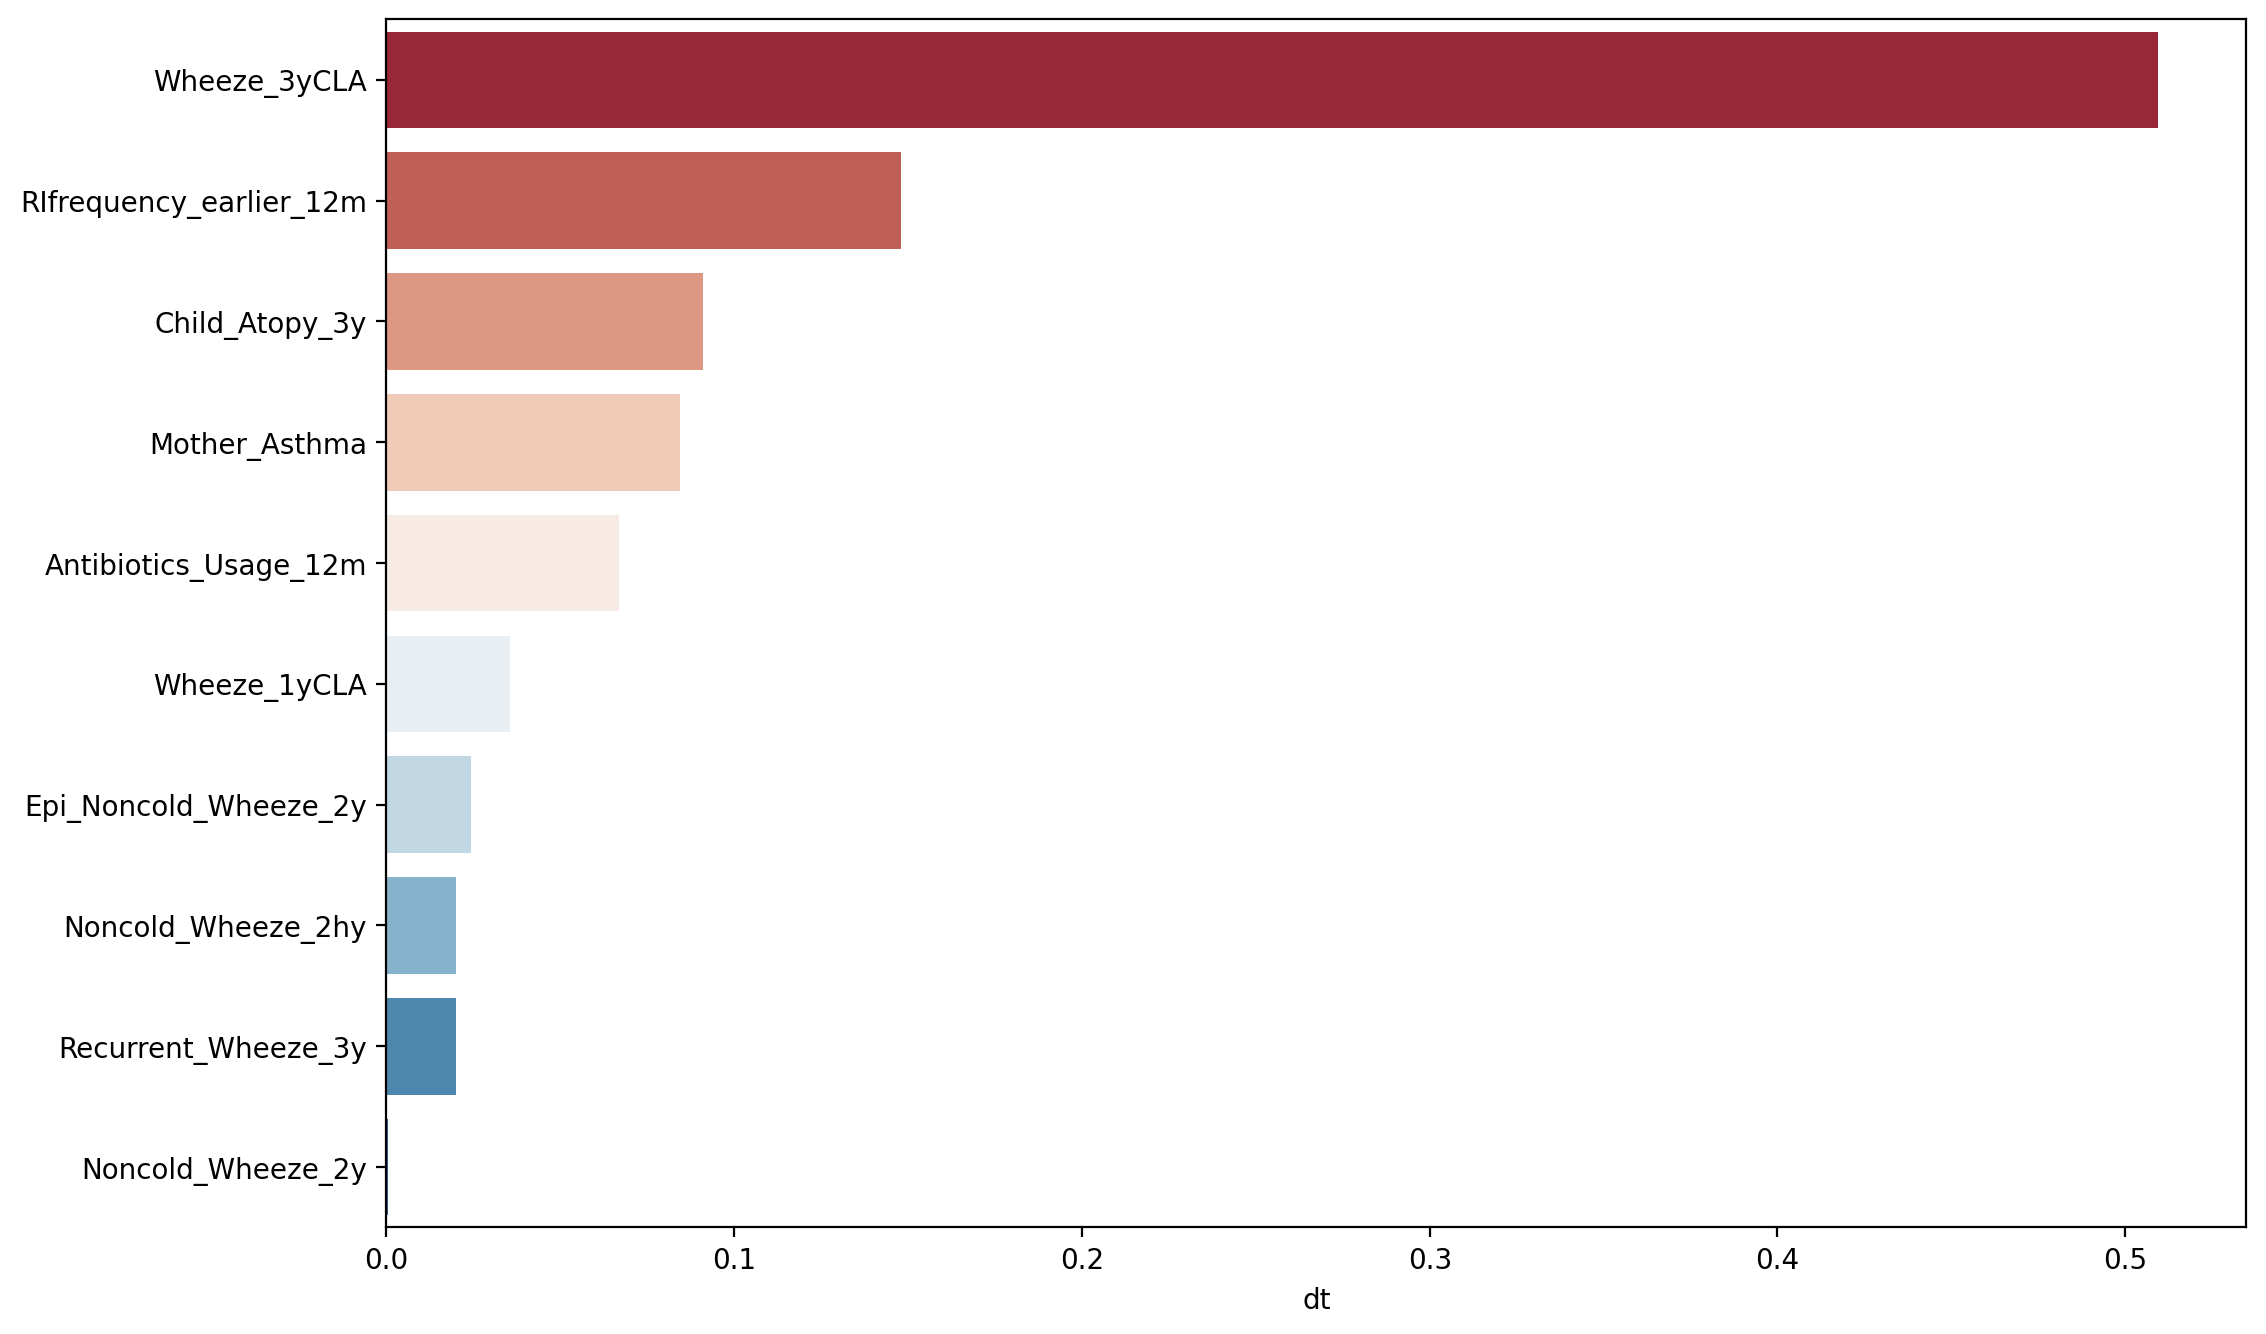

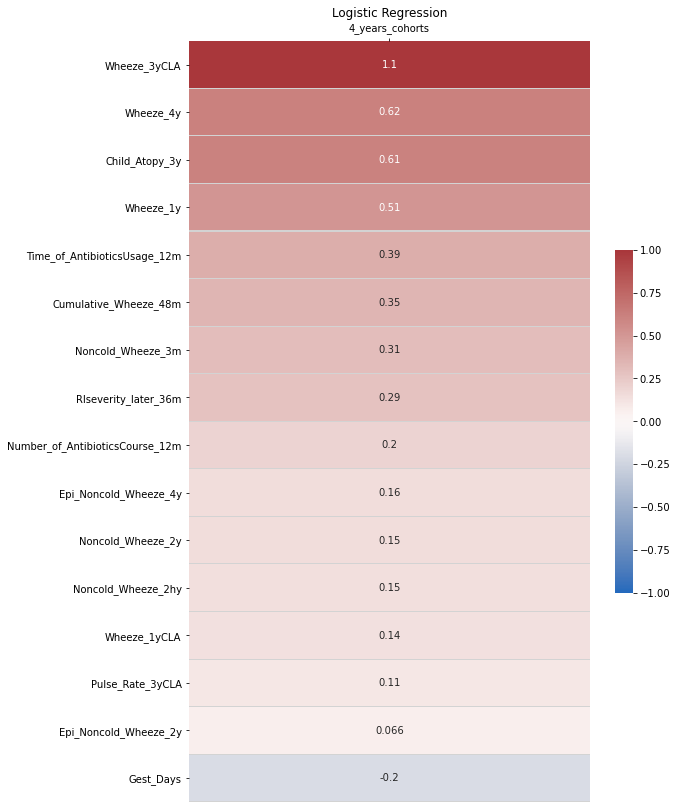

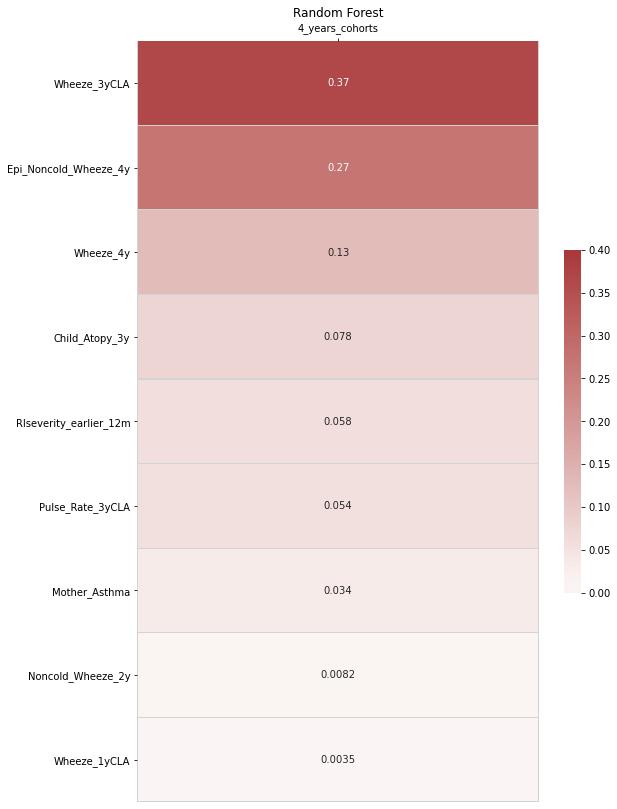

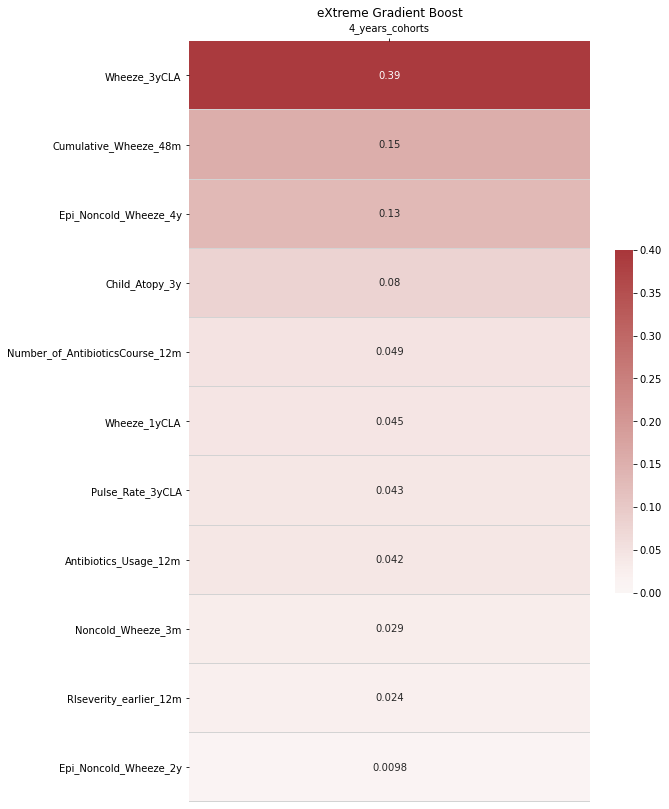

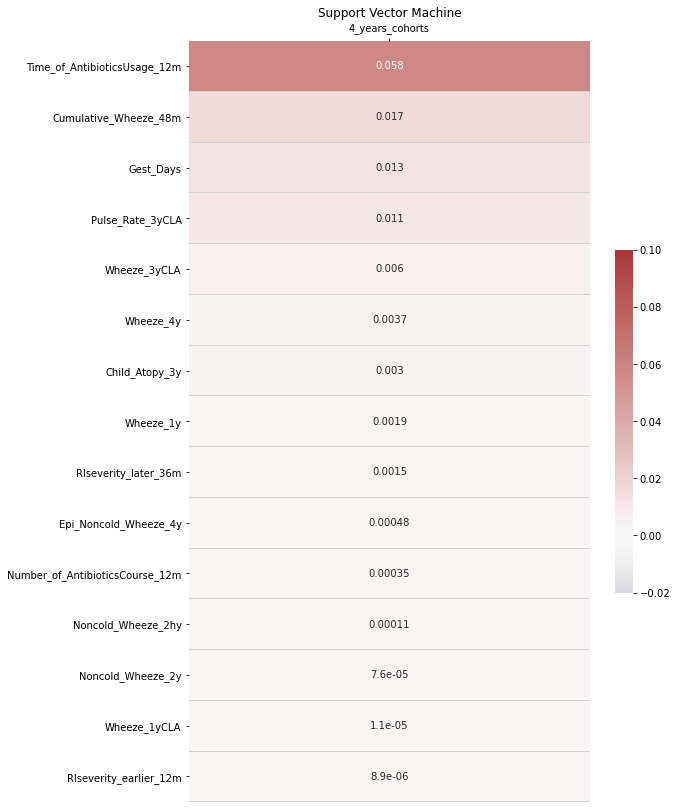

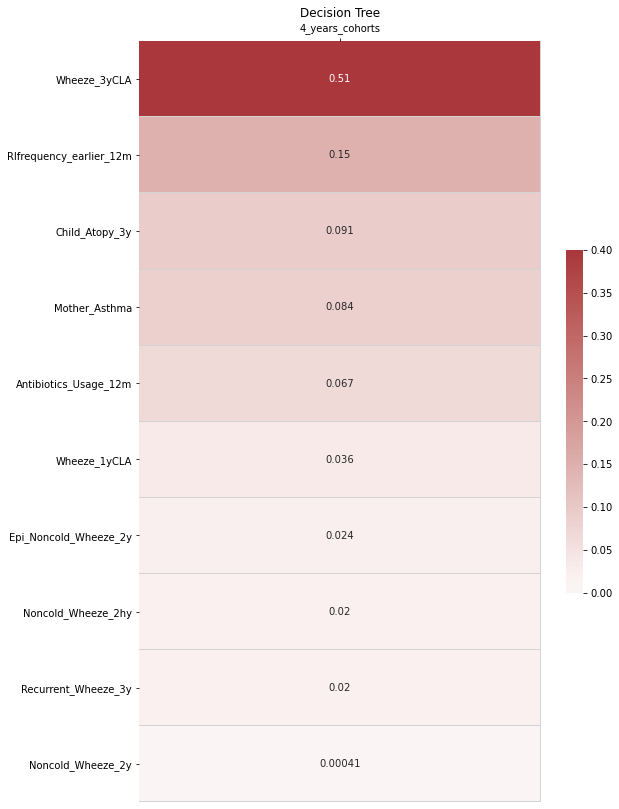

<IPython.core.display.Javascript object>

In [14]:
ml_res_final_selected_screened = ml_res_visualization(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    progression_time_dict,
    scalar=MinMaxScaler(),
    cv=StratifiedKFold(n_splits=3, random_state=3, shuffle=True),
    priori_k=25,
    precision_inspection_range=0.005,
    fixed_features=None,
    scoring="average_precision",
)

### 3.2 Obtain the feature importance ranking for current dictionary and its ML performance

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

[12:20:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:20:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

[12:20:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:20:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:20:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:20:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:20:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:20:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:20:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:21:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:21:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:22:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:22:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:23:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:23:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

  0%|          | 0/30 [00:00<?, ?it/s]

[12:24:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[12:24:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

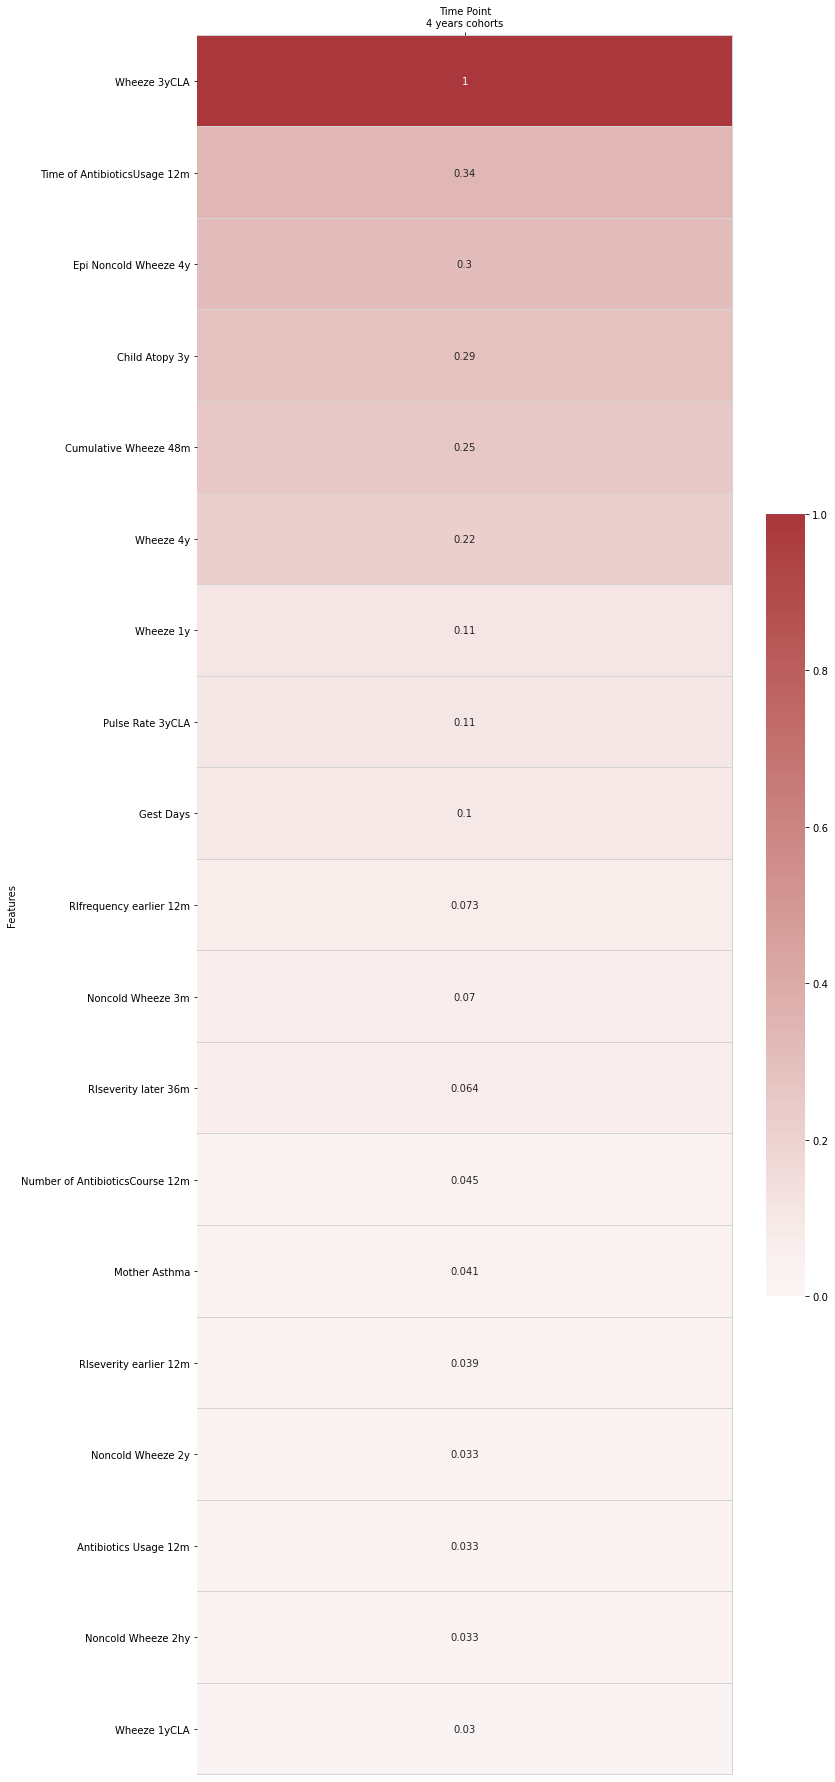

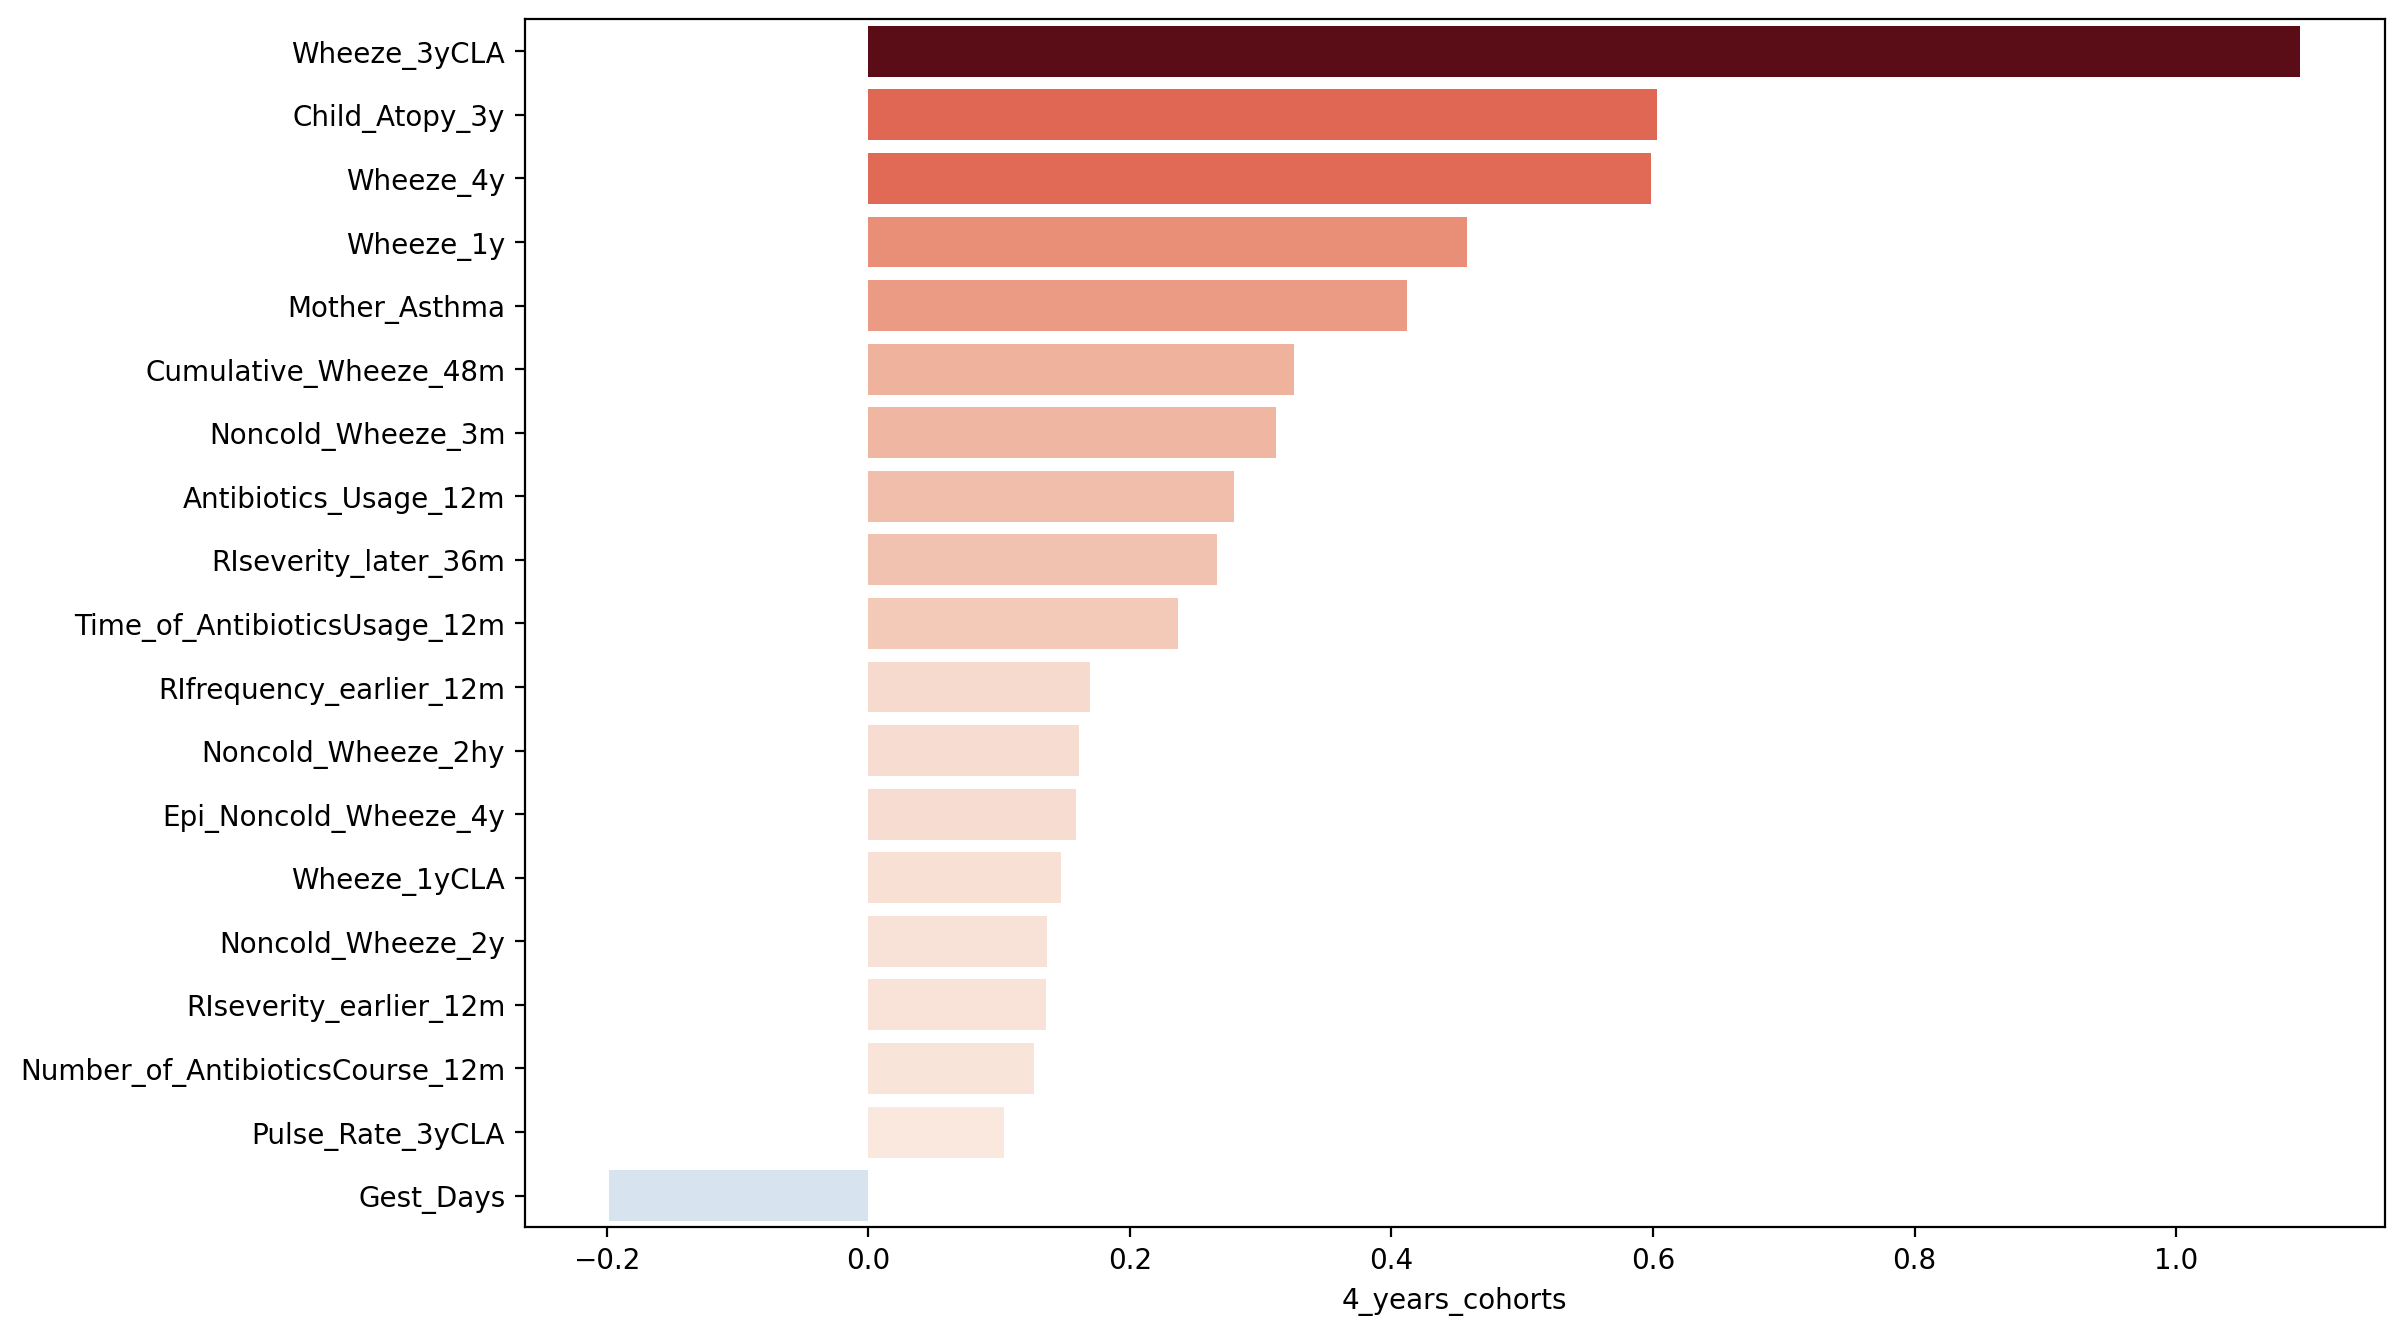

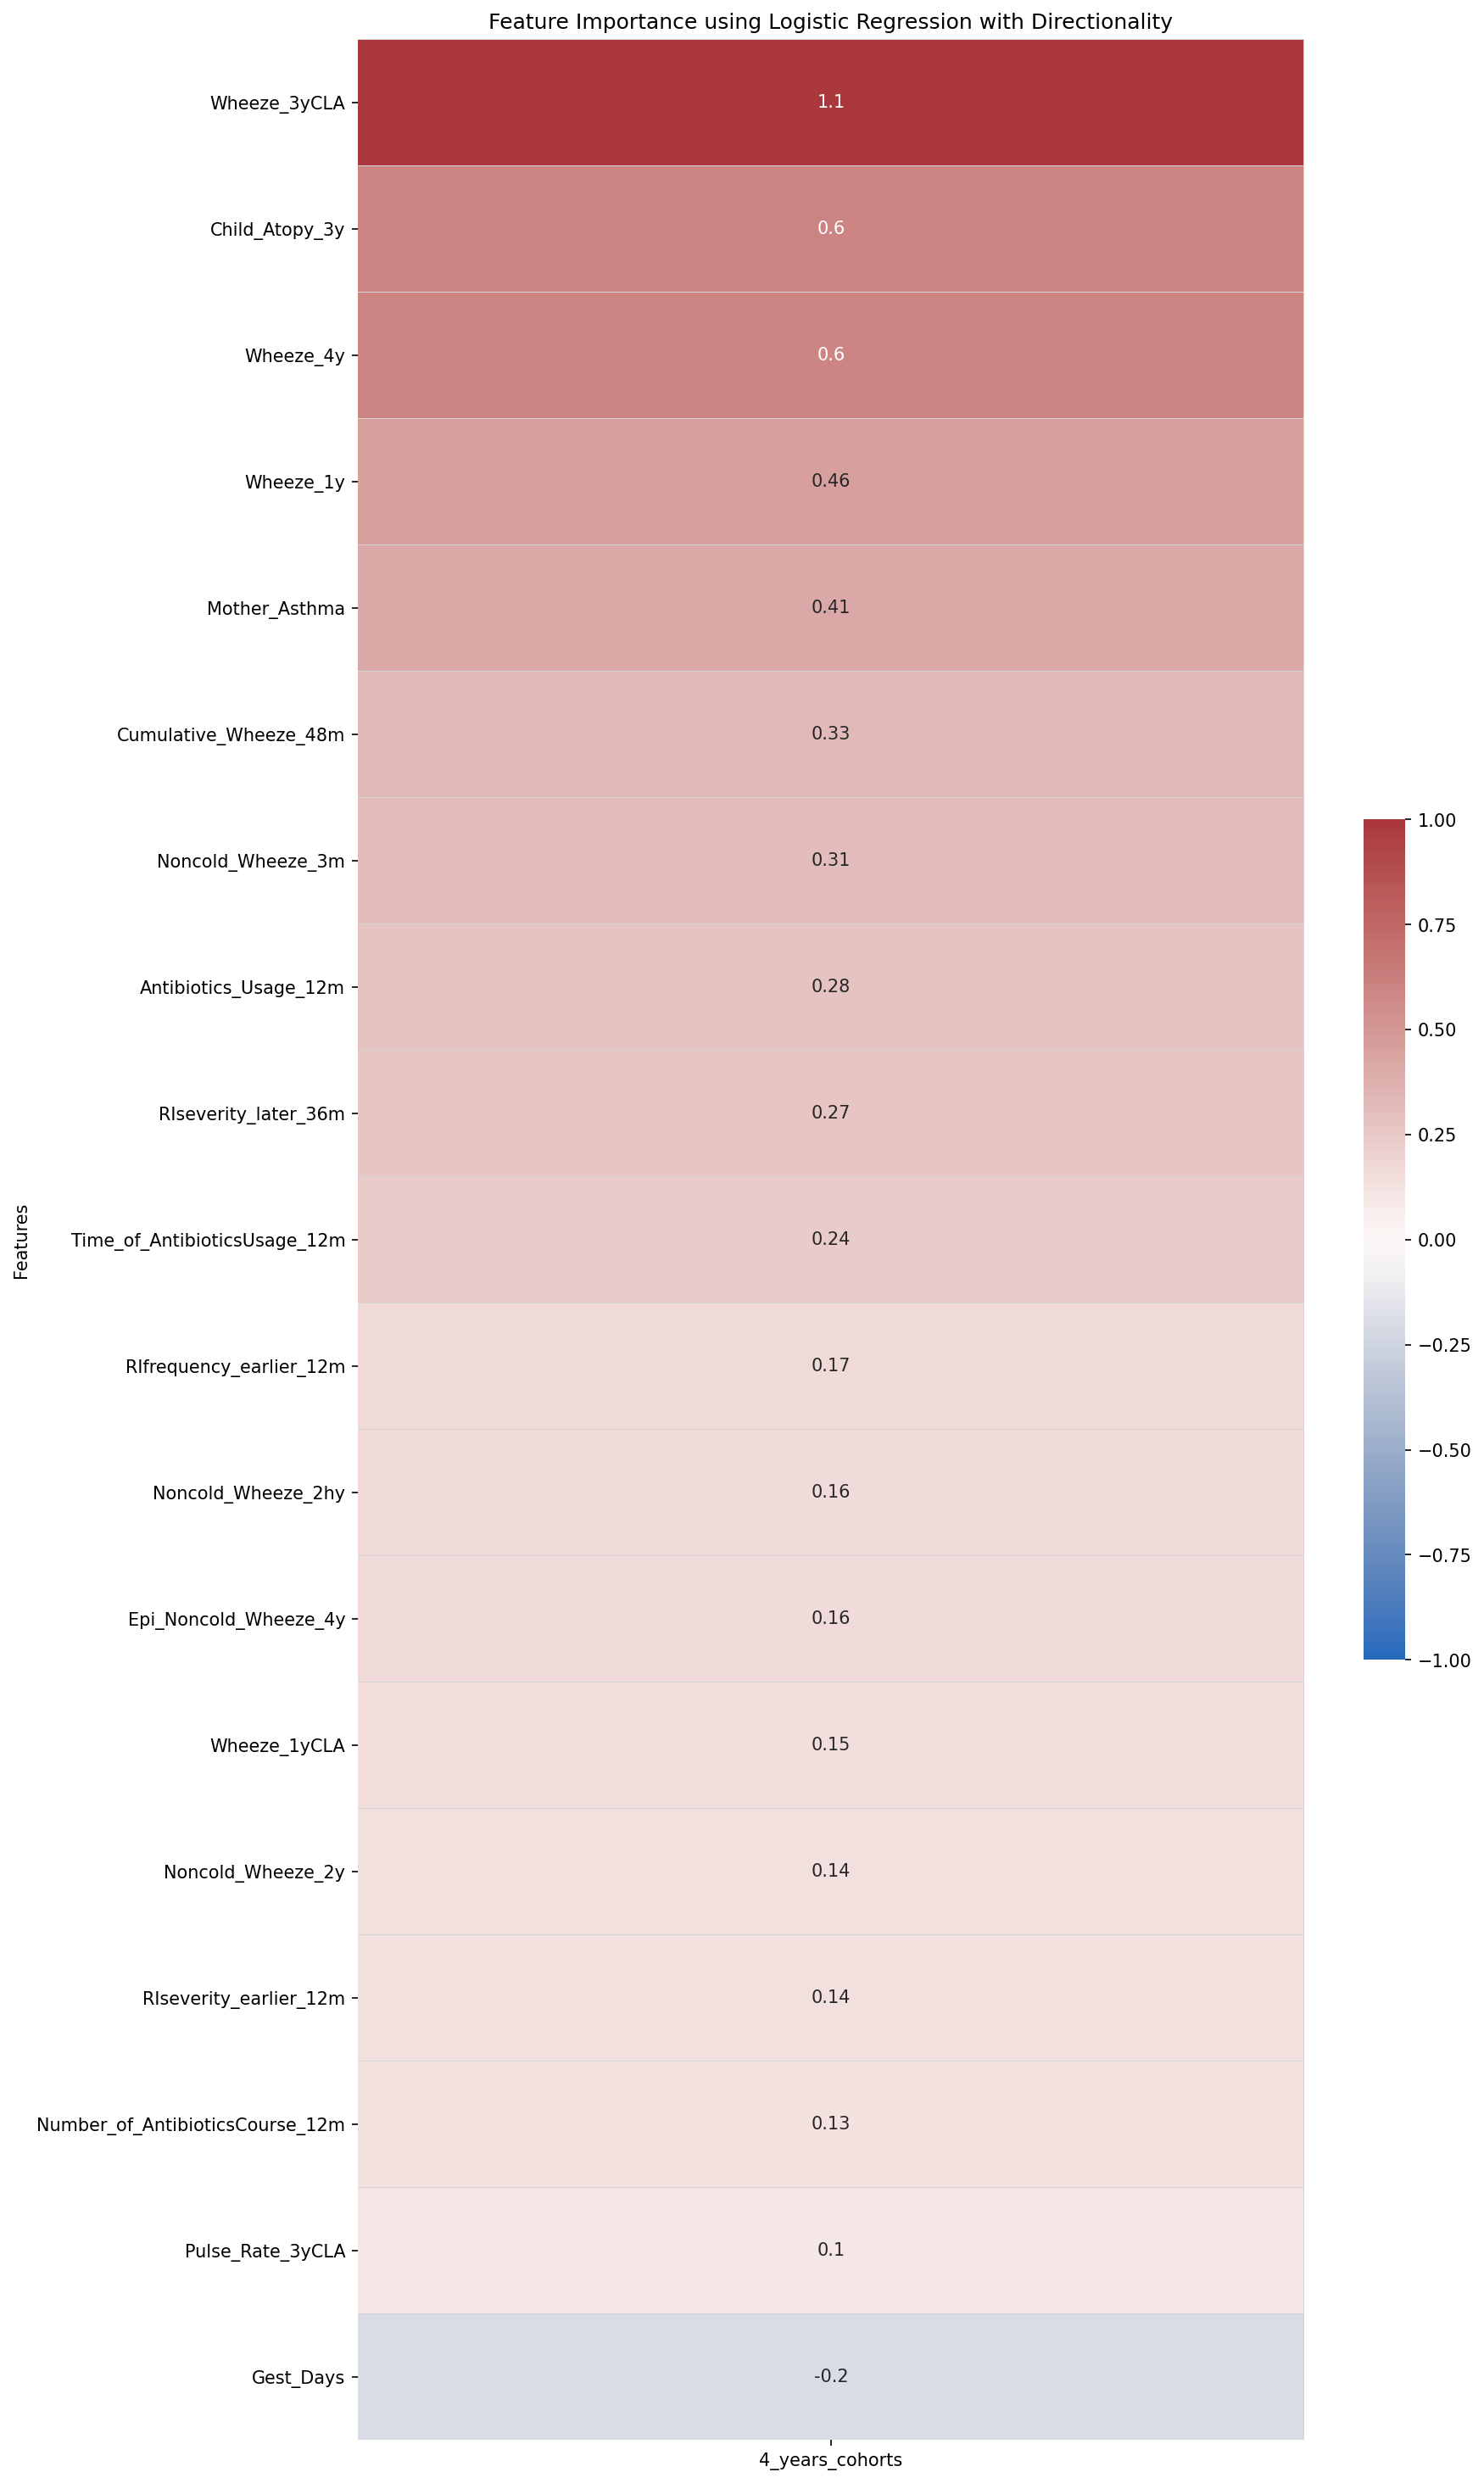

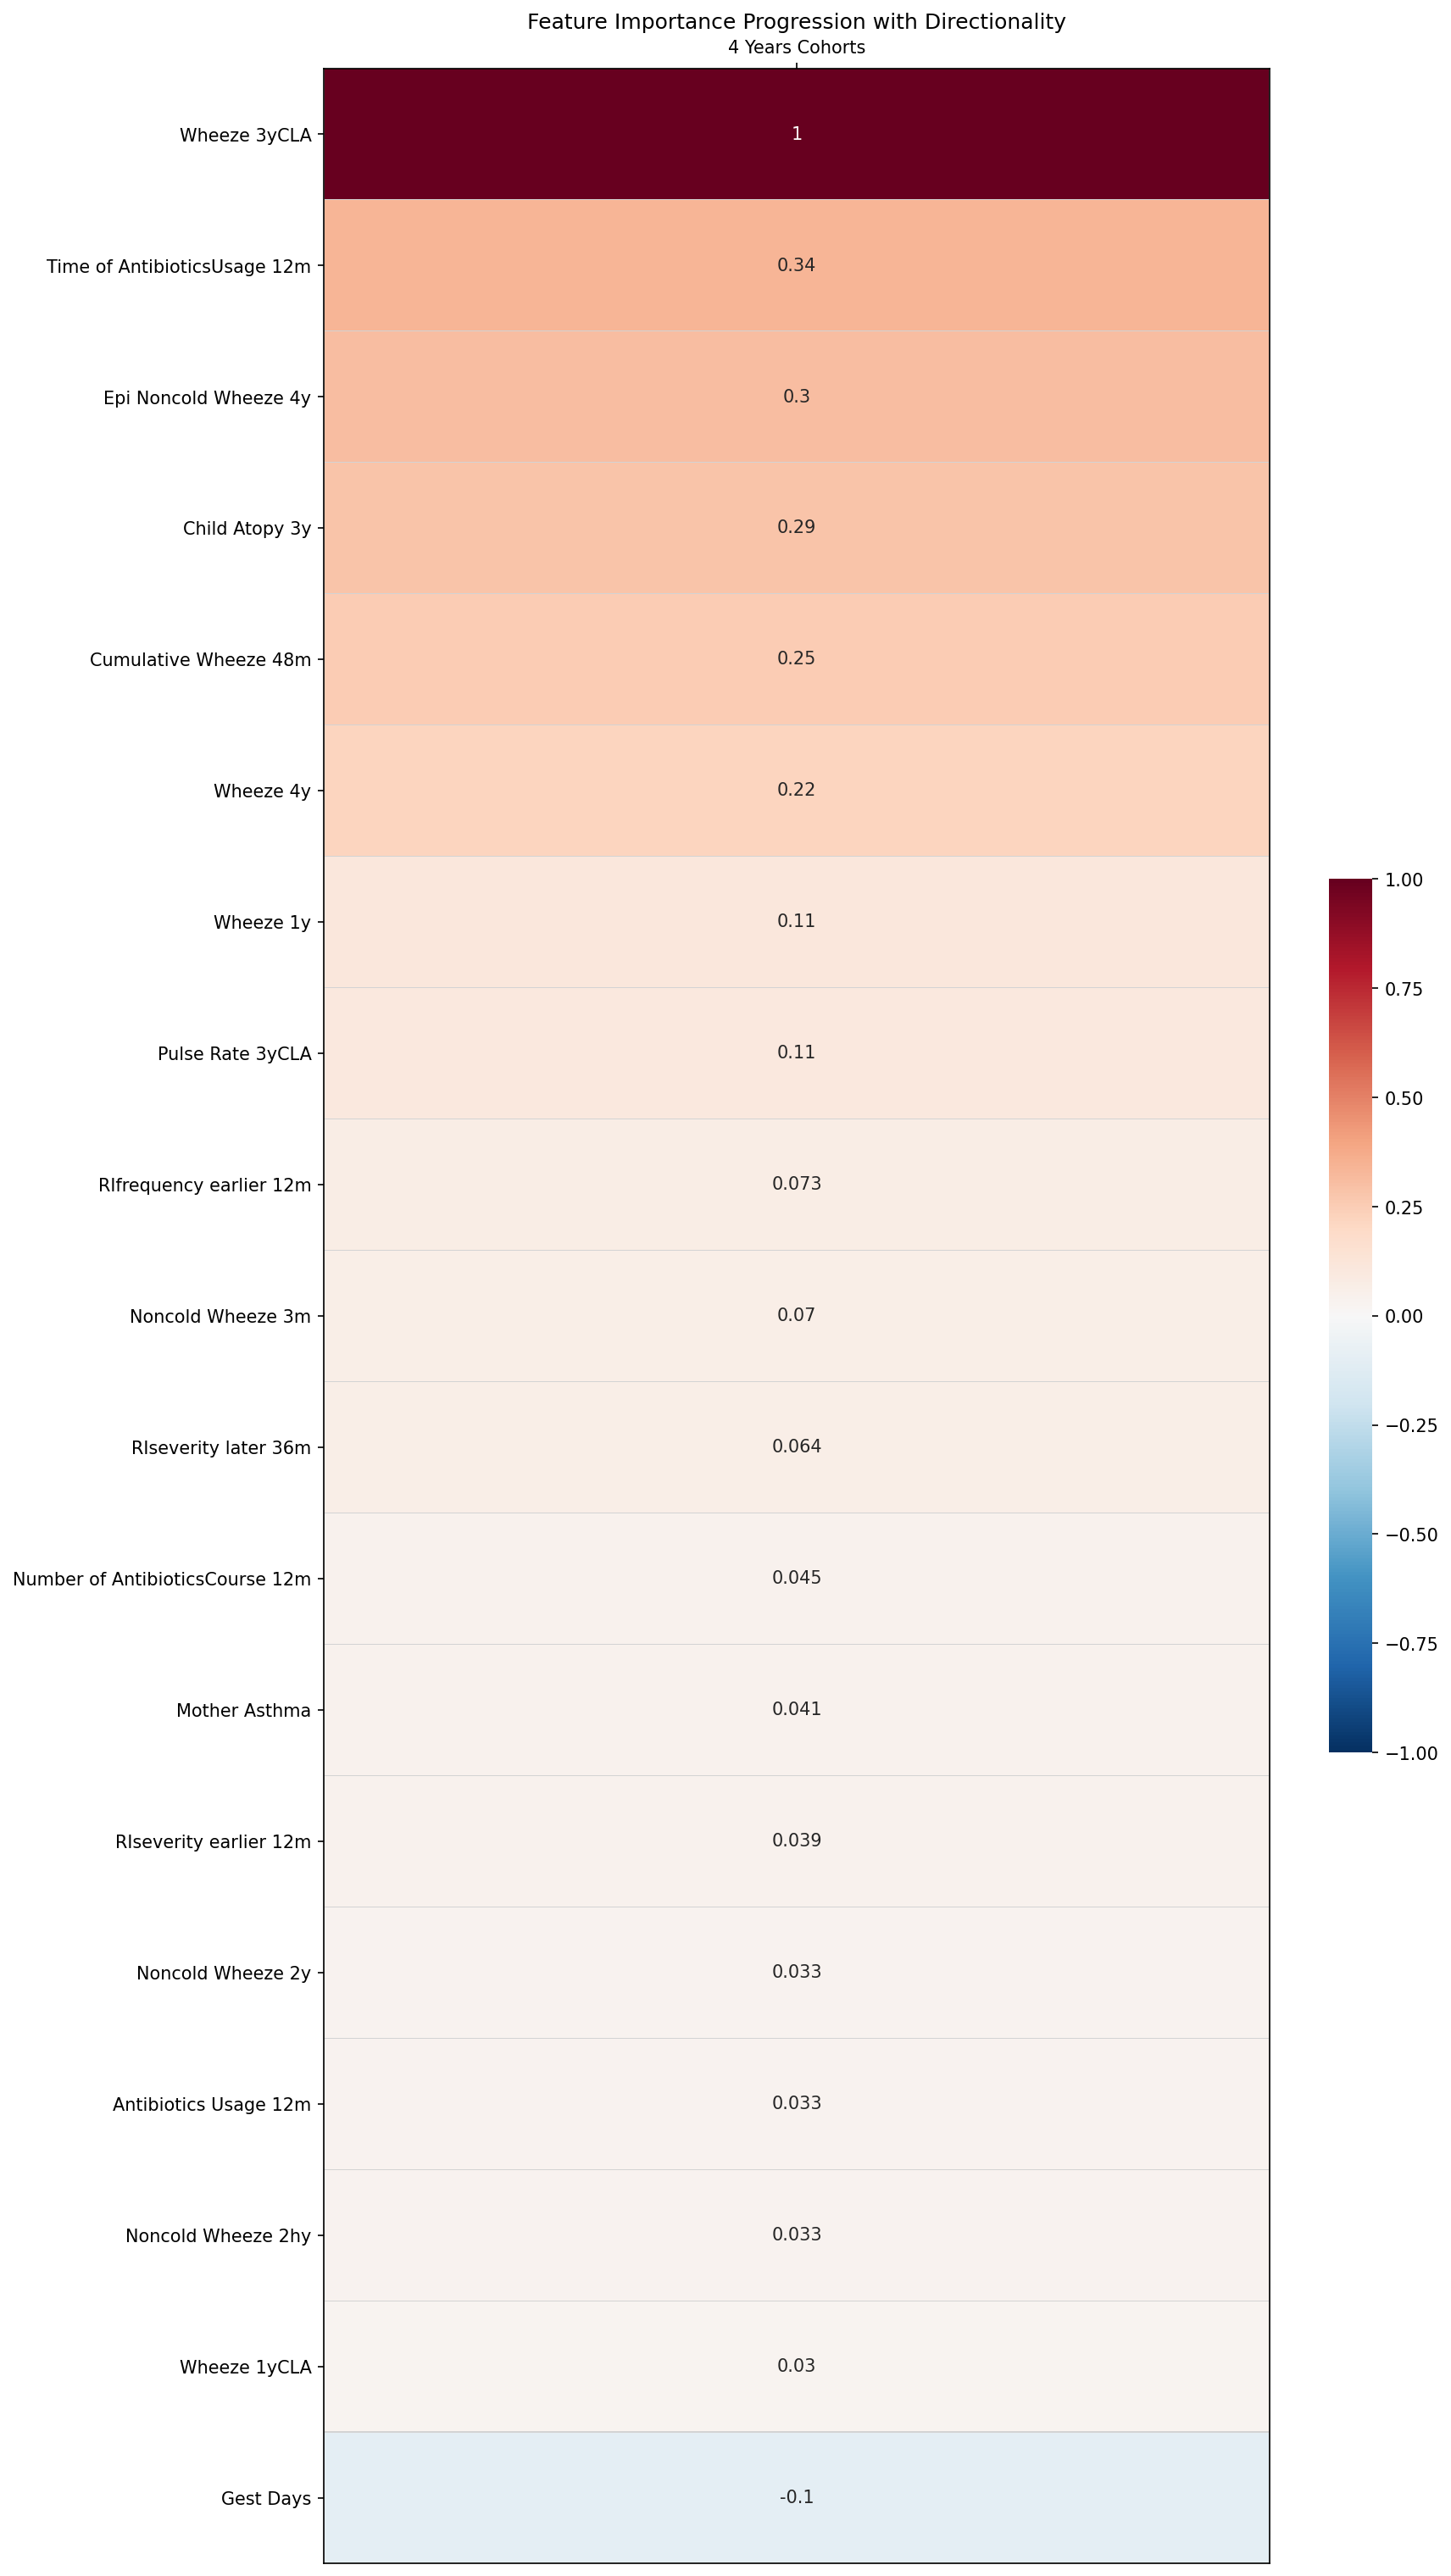

<IPython.core.display.Javascript object>

In [15]:
coef_thresh = 0.1
featimp_thresh = 0.05
permutation_thresh = 0.01
ml_final_features_selected_screened = feature_progression_merge(
    ml_res_final_selected_screened,
    ml_list=["lr", "rf", "xgb", "svc", "dt"],
    coef_thresh=coef_thresh,
    featimp_thresh=featimp_thresh,
    permutation_thresh=permutation_thresh,
    how="sum",
    normalize=True,
)

ml_ind_res_selected_screened = ml_individual_res(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    ml_res_final_selected_screened,  # Contains the auto-selected features for different models at different timepoints
    scalar=MinMaxScaler(),
    ci_bootstrap=True,
    bootstrap_replace=True,
    bootstrap_iterations=30,
    subset_percentage=1,
)

ml_ens_res_bt_true_selected_screened = ml_ensemble_res(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    ml_final_features_selected_screened,
    scalar=MinMaxScaler(),
    threshold_for_selection=0.1,
    ci_bootstrap=True,
    bootstrap_replace=True,
    bootstrap_iterations=30,
    subset_percentage=1,
)

feature_with_direction_selected_screened = feature_merged_directionality(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    ml_final_features_selected_screened,
    target_name="Asthma_Diagnosis_5yCLA",
    estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
    threshold_for_selection=0,
)

In [94]:
feature_with_direction_selected_screened[:5]
ml_ind_res_selected_screened[:5]
ml_ens_res_bt_true_selected_screened[:5]

4_years_cohorts
Features                                     
Wheeze_3yCLA                         1.000000
Time_of_AntibioticsUsage_12m         0.336187
Epi_Noncold_Wheeze_4y                0.304881
Child_Atopy_3y                       0.285304
Cumulative_Wheeze_48m                0.250262

Average_Precision  \
Model                  Time Point                          
Logistic Regression    4 Years Cohorts          0.864748   
Random Forest          4 Years Cohorts          0.860715   
eXtreme Gradient Boost 4 Years Cohorts          0.861244   
Support Vector Machine 4 Years Cohorts          0.857245   
Decision Tree          4 Years Cohorts          0.616634   

                                                            Average_Precision_CI  \
Model                  Time Point                                                  
Logistic Regression    4 Years Cohorts  (0.8284087683023653, 0.8777905301361633)   
Random Forest          4 Years Cohorts  (0.7683480217920166, 0.9096591272049543)   
eXtreme Gradient Boost 4 Years Cohorts  (0.7734626372192933, 0.9090458117693974)   
Support Vector Machine 4 Years Cohorts  (0.7698597604324912, 0.8841694217828245)   
Decision Tree          4 Years Cohorts  (0.5083866357358925, 0.7320656680645381)   

                                        ROC_AUC  \
Model                  Time Point                 
Logistic Regression    4 Years Cohorts   0.9753   
Random Forest          4 Years Cohorts   0.9533   
eXtreme Gradient Boost 4 Years Cohorts  0.97145   
Support Vector Machine 4 Years Cohorts   0.9761   
Decision Tree          4 Years Cohorts  0.69045   

                                                             ROC_AUC_CI  
Model                  Time Point                                        
Logistic Regression    4 Years Cohorts             (0.968045, 0.981365)  
Random Forest          4 Years Cohorts  (0.9437225, 0.9701424999999999)  
eXtreme Gradient Boost 4 Years Cohorts           (0.9484675, 0.9829775)  
Support Vector Machine 4 Years Cohorts   (0.9563550000000001, 0.982055)  
Decision Tree          4 Years Cohorts            (0.580595, 0.7791425)

Average_Precision  \
Model         Time Point                          
Soft vote     4 Years Cohorts          0.821382   
Weighted soft 4 Years Cohorts          0.858862   
Stacking lr   4 Years Cohorts          0.771431   
Stacking rf   4 Years Cohorts          0.748119   
Stacking xgb  4 Years Cohorts          0.700837   

                                                   Average_Precision_CI  \
Model         Time Point                                                  
Soft vote     4 Years Cohorts  (0.7397834027200564, 0.8765675291380147)   
Weighted soft 4 Years Cohorts  (0.7909935152797744, 0.8920636182220353)   
Stacking lr   4 Years Cohorts  (0.6813806613626064, 0.8446628180082156)   
Stacking rf   4 Years Cohorts  (0.6016190160237678, 0.8621740119677619)   
Stacking xgb  4 Years Cohorts  (0.5991462802795303, 0.8008430696177392)   

                               ROC_AUC                      ROC_AUC_CI  
Model         Time Point                                                
Soft vote     4 Years Cohorts   0.9763             (0.967035, 0.98491)  
Weighted soft 4 Years Cohorts   0.9797             (0.972415, 0.98602)  
Stacking lr   4 Years Cohorts   0.9703   (0.95748, 0.9808600000000001)  
Stacking rf   4 Years Cohorts  0.94755  (0.861405, 0.9824550000000001)  
Stacking xgb  4 Years Cohorts  0.93255          (0.8485325, 0.9789475)

<IPython.core.display.Javascript object>

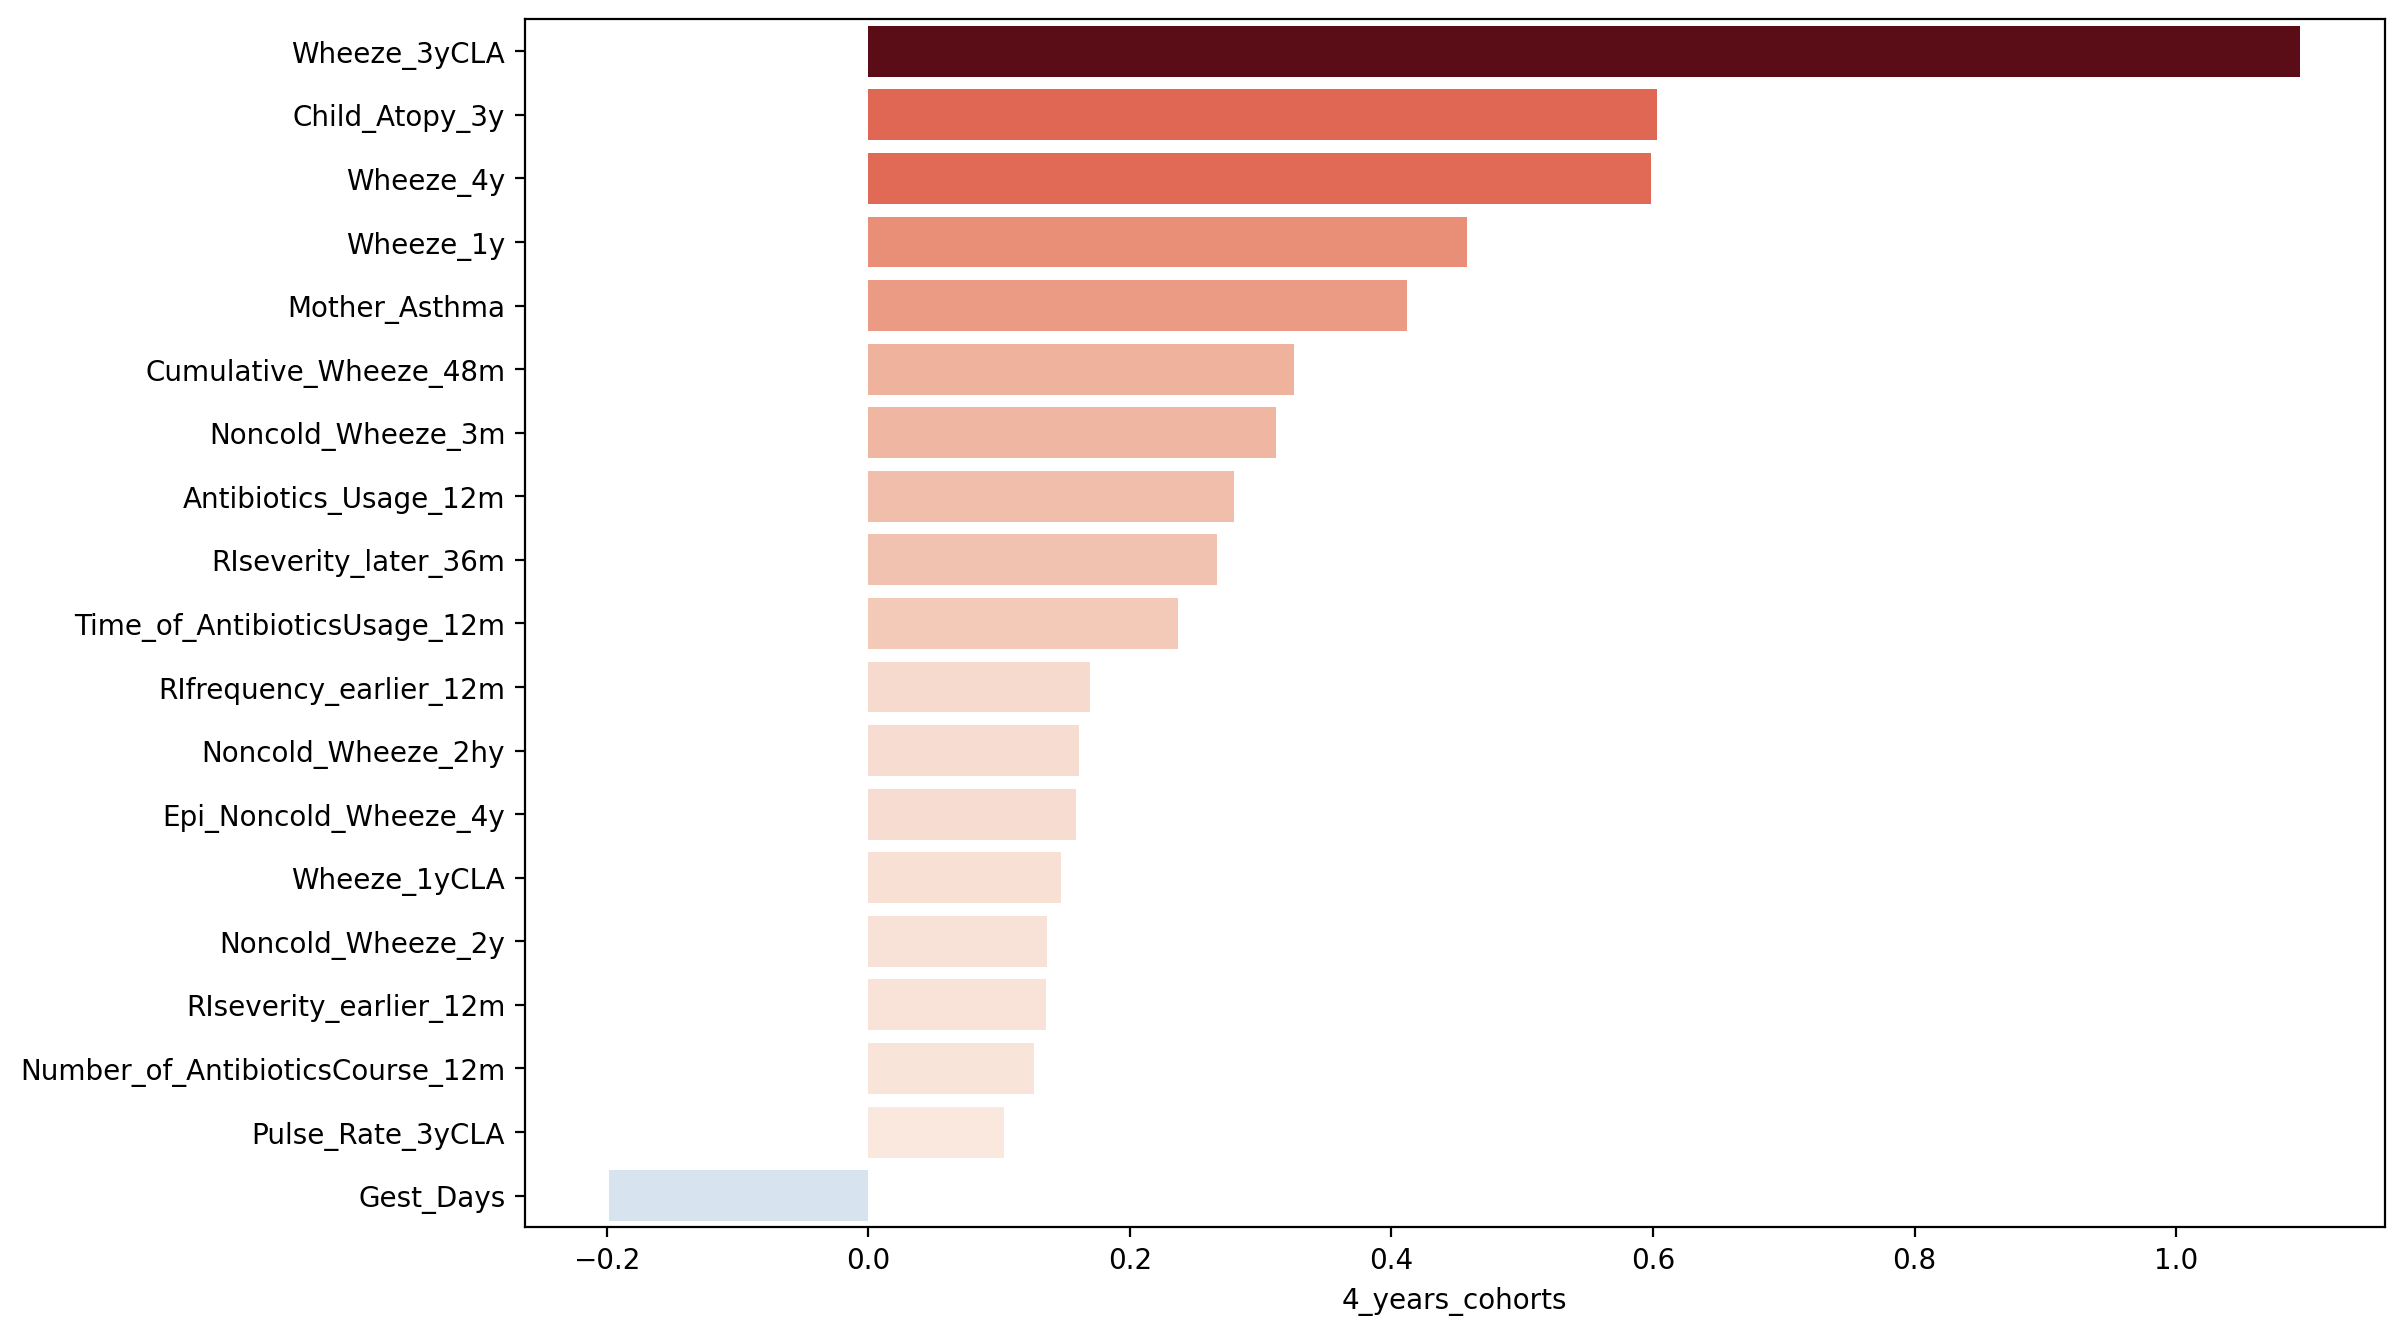

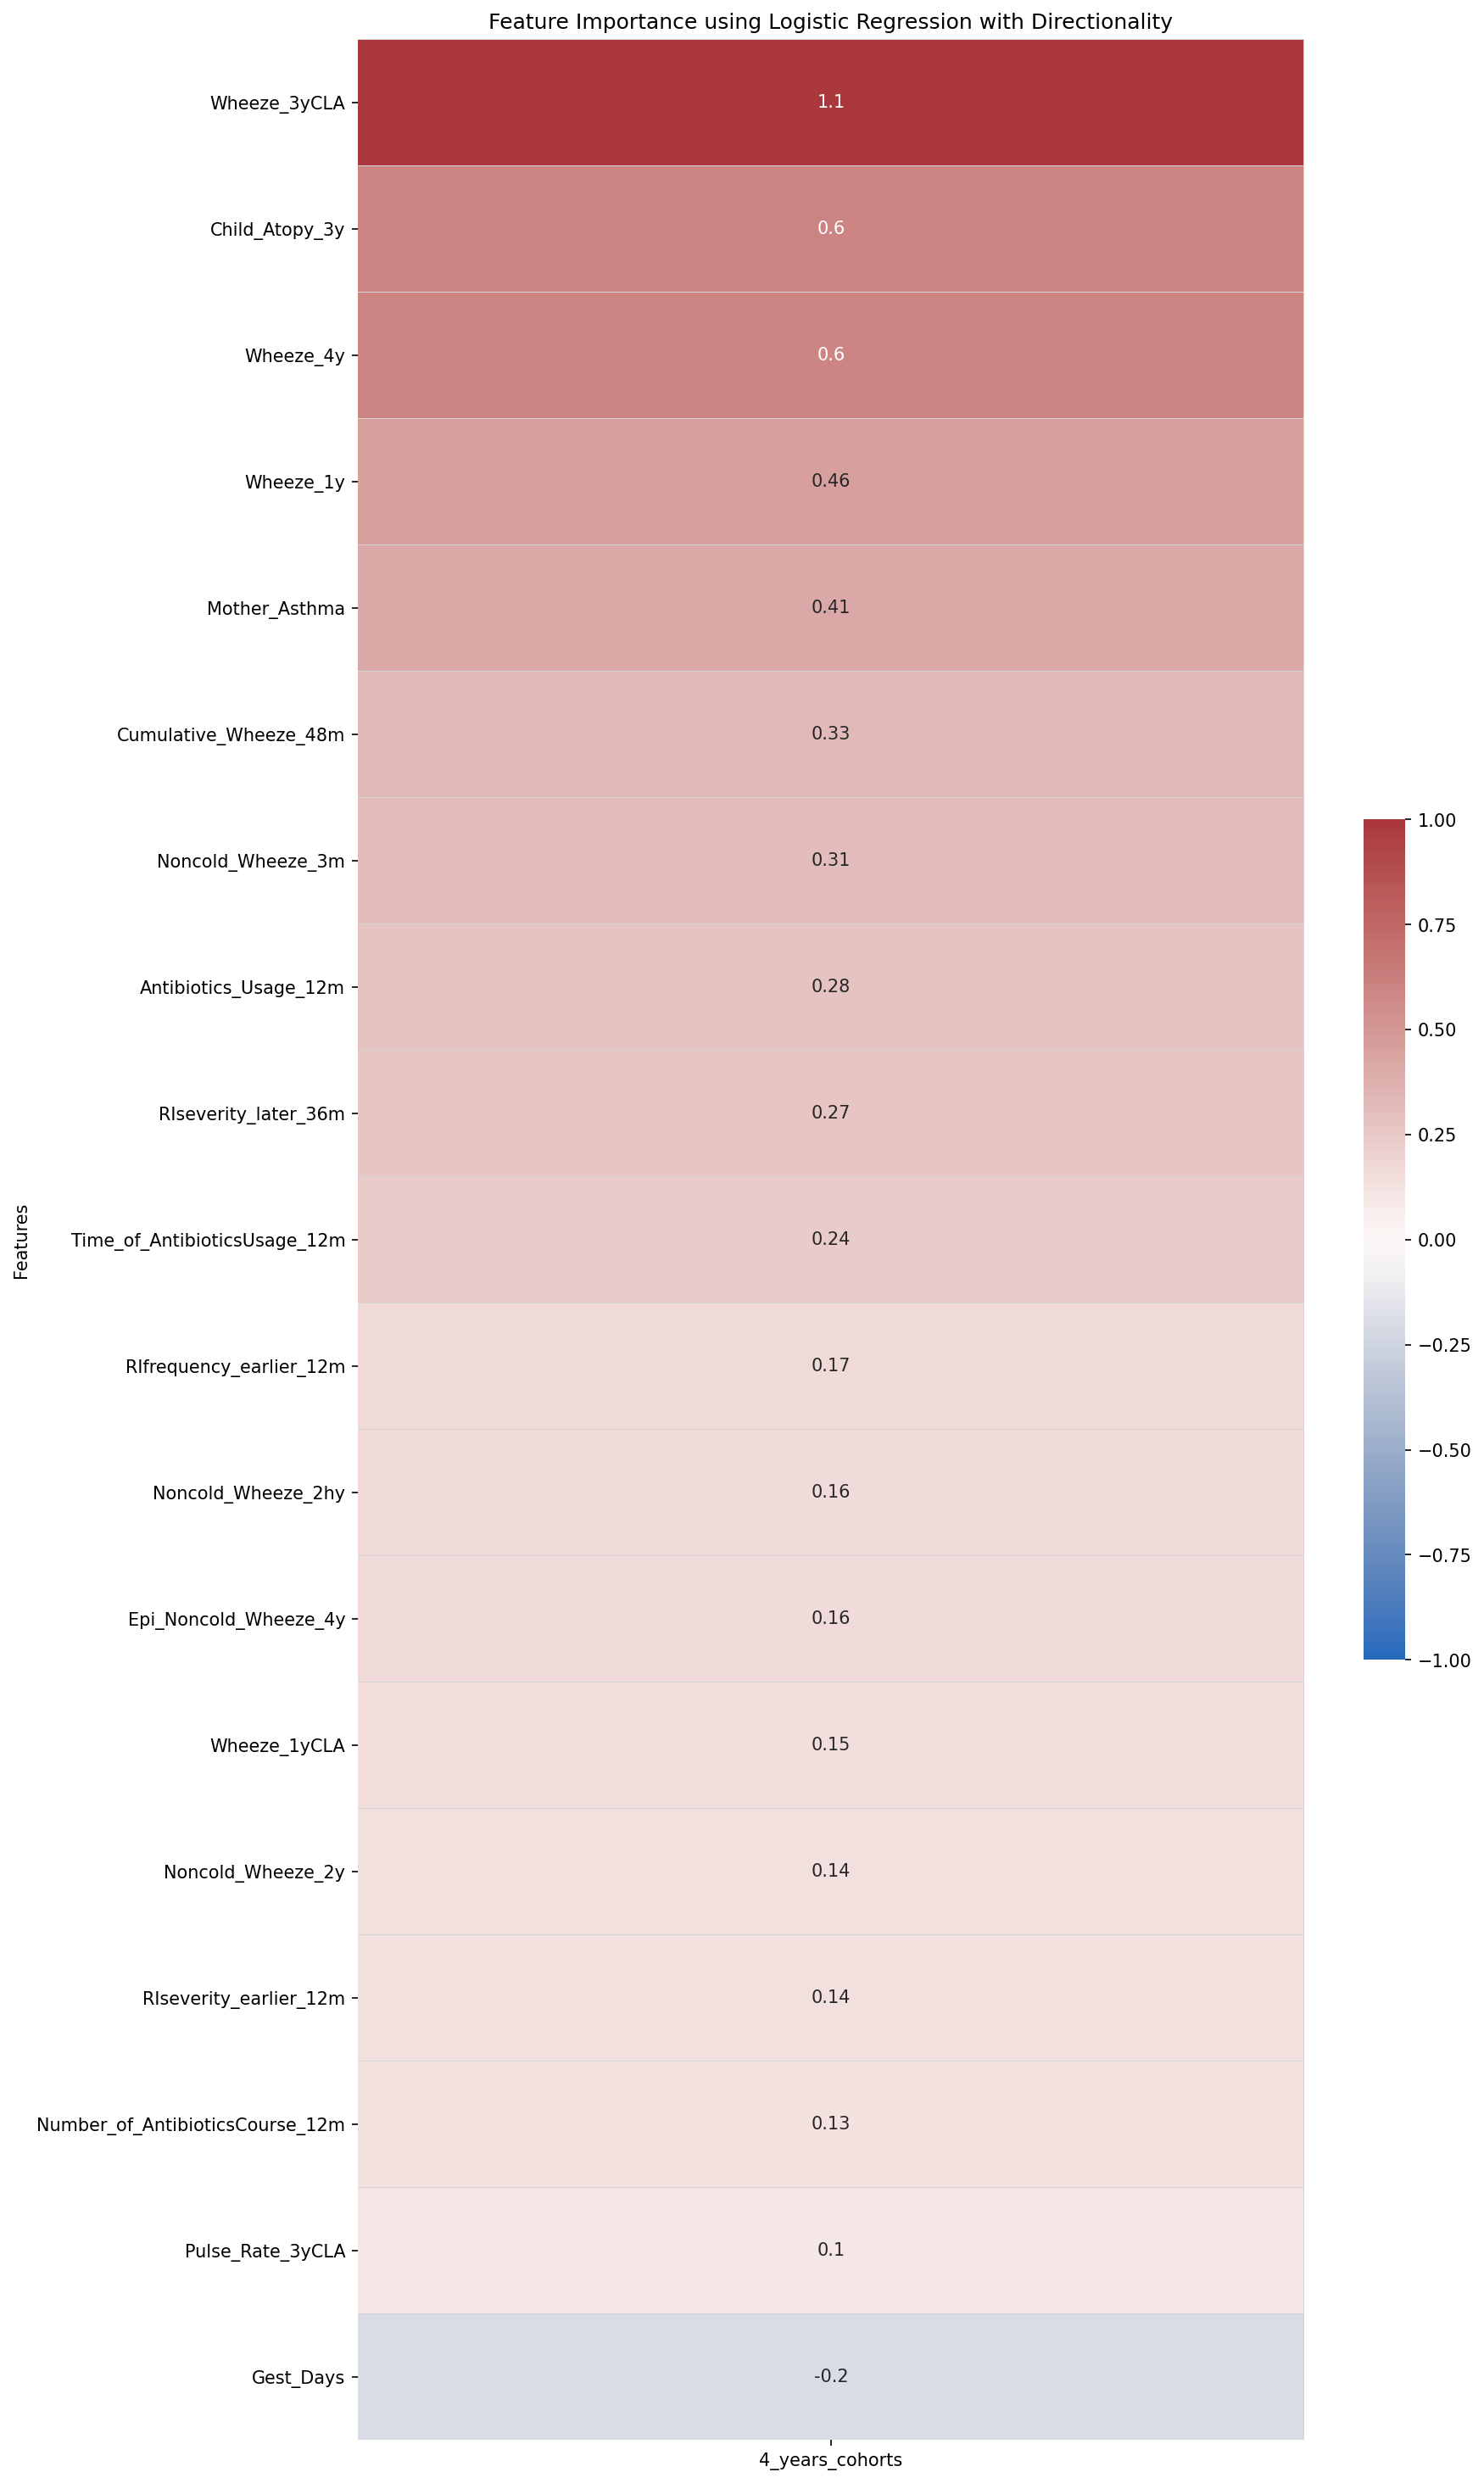

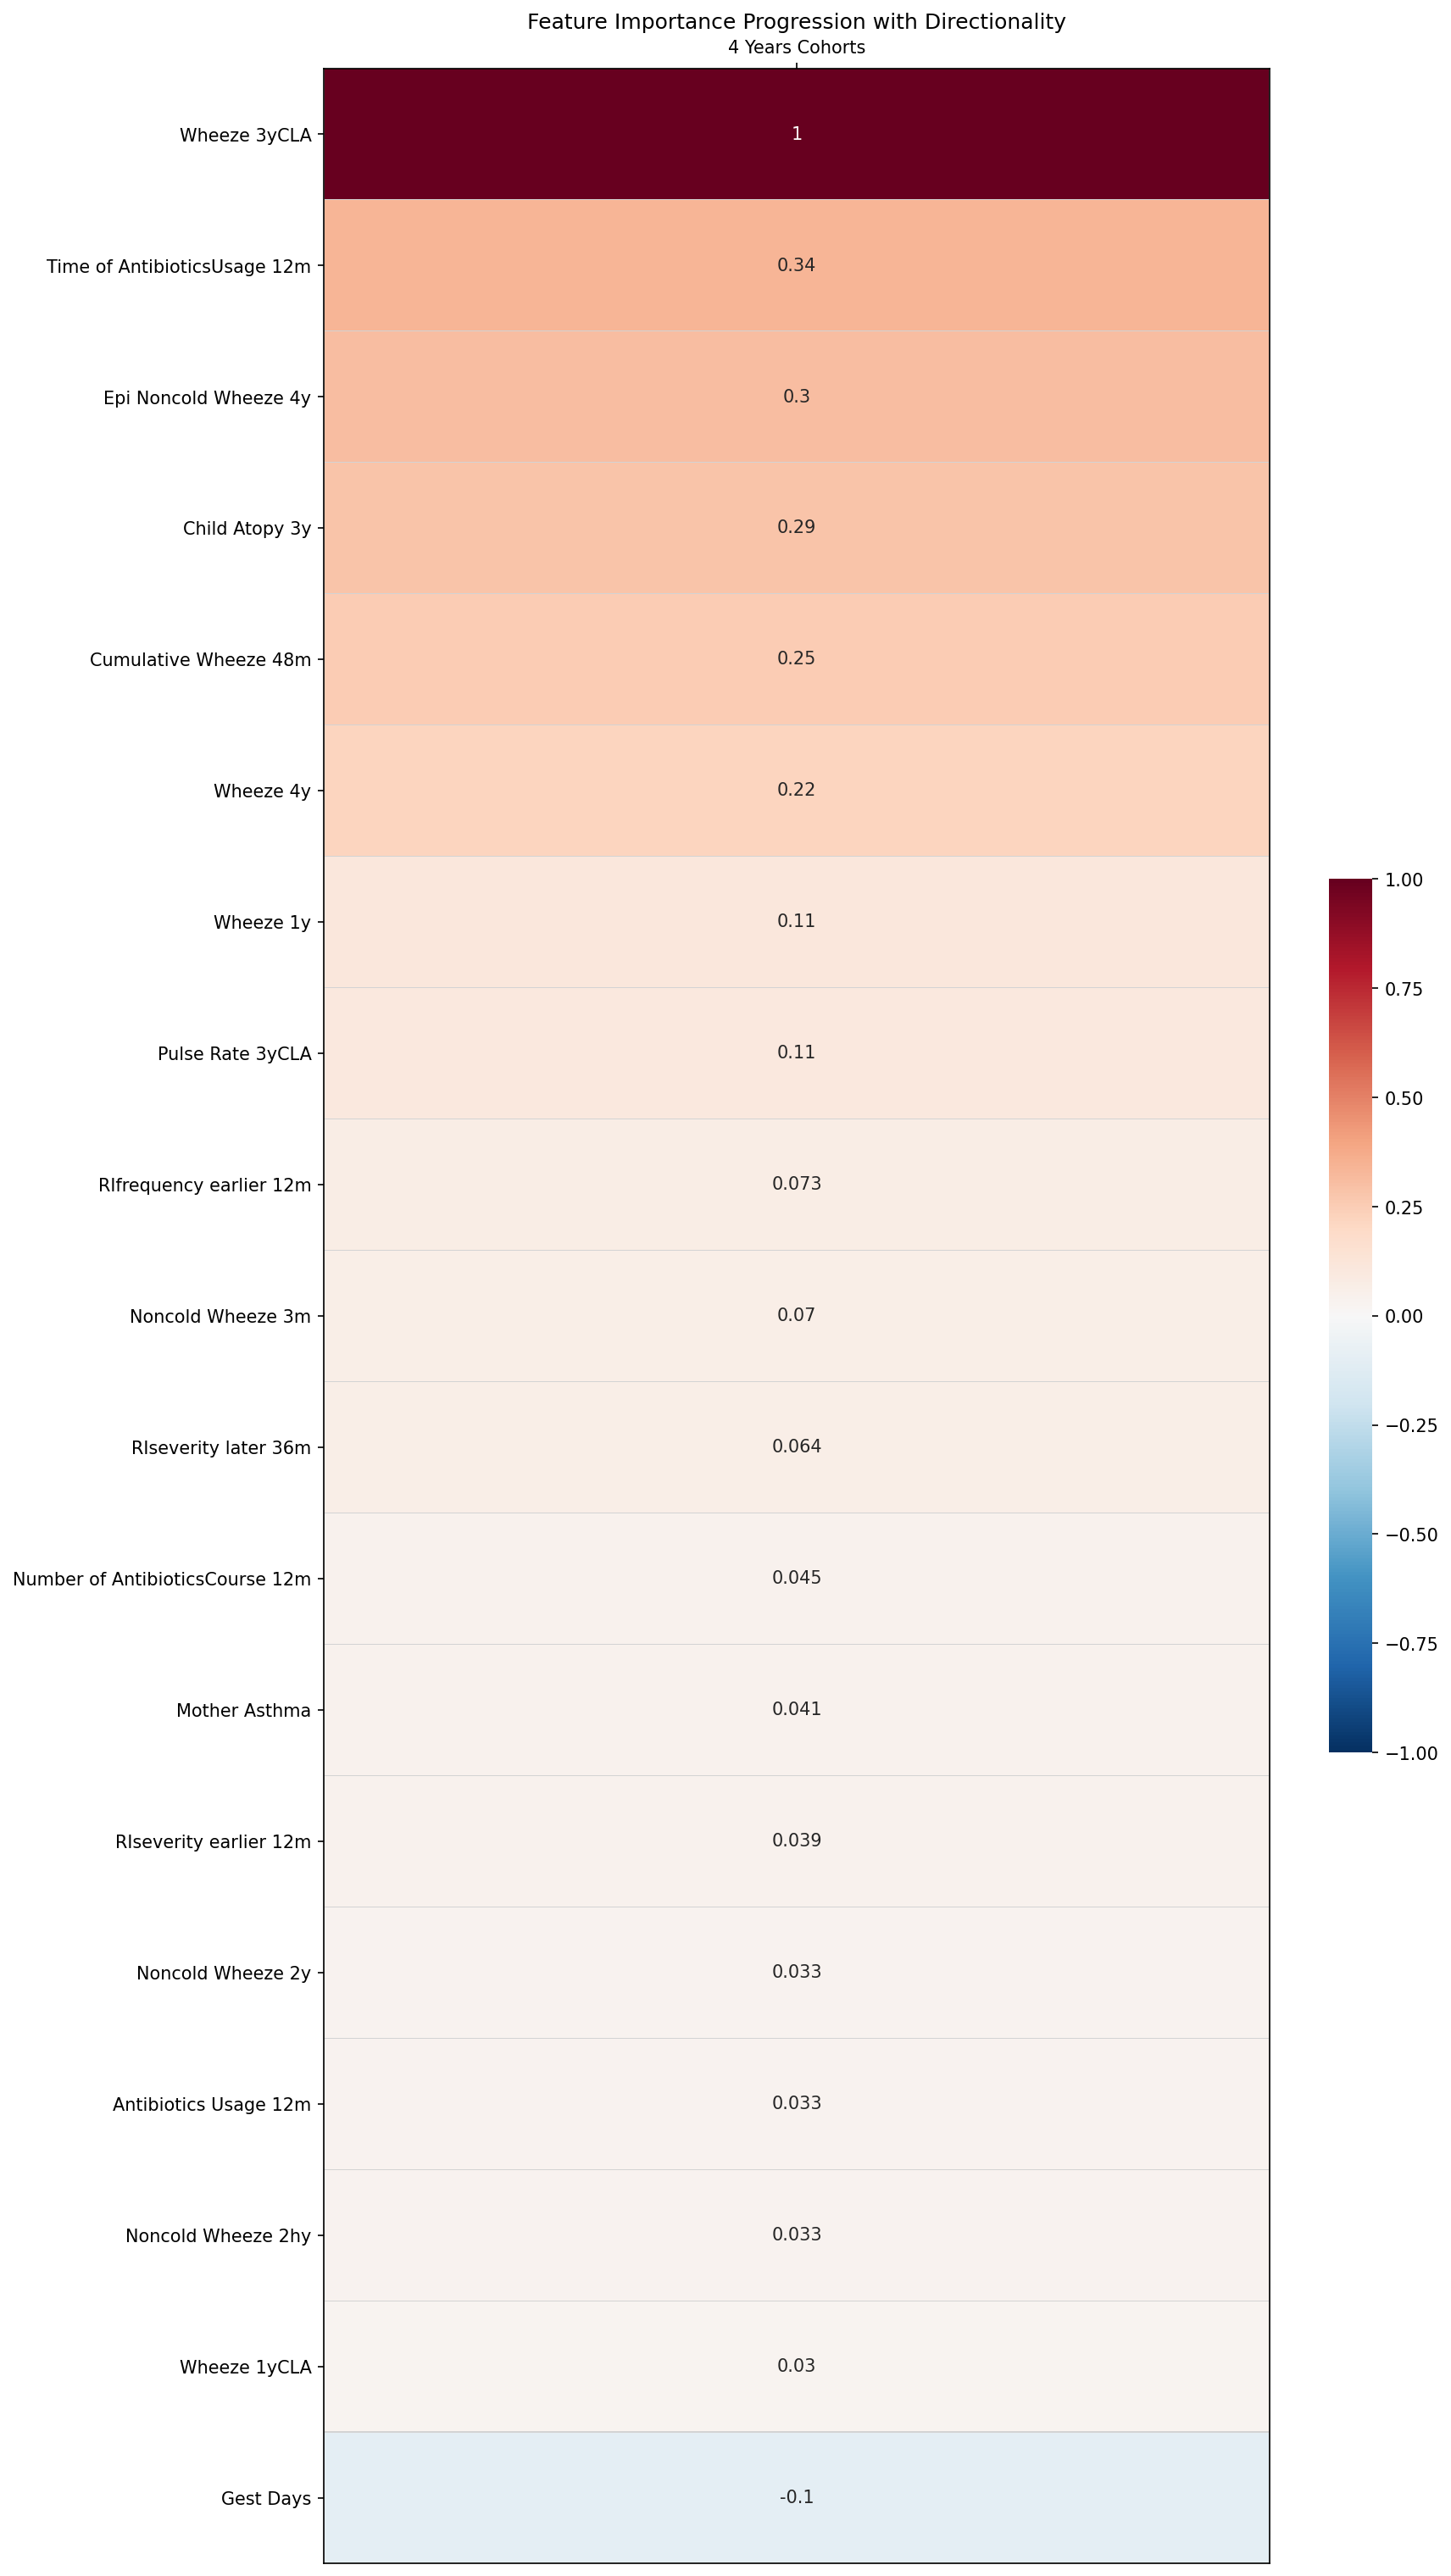

<IPython.core.display.Javascript object>

In [84]:
feature_with_direction_selected_screened = feature_merged_directionality(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    ml_final_features_selected_screened,
    target_name="Asthma_Diagnosis_5yCLA",
    estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
    threshold_for_selection=0,
)

### 3.3 Merge current feature ranking with saved feature importance ranking without directionality

In [87]:
# feature_with_direction_selected_screened = feature_merged_directionality(
#     df_train_eval_selected_screened,
#     df_holdout_selected_screened,
#     ml_final_features_selected_screened,
#     target_name="Asthma_Diagnosis_5yCLA",
#     estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
#     threshold_for_selection=0,
# )

feature_with_direction_selected_screened[:4]
previous_features_progression[:4]

#########Step One: Make 4 year table to be exact format of with "previous_features_progression" without information of Category
feature_with_direction_selected_screened.columns.name = ""
feature_4y = feature_with_direction_selected_screened.rename(
    columns={"4_years_cohorts": "Feature Importance"}
).reset_index()
feature_4y["Time Point"] = "4 Years"
feature_4y_final = feature_4y[["Features", "Time Point", "Feature Importance"]]
feature_4y_final["Features"] = feature_4y_final["Features"].apply(
    lambda x: x.replace("_", " ")
)

feature_4y_final[:4]
previous_features_progression[:4]

Features Time Point  Feature Importance
0                  Wheeze 3yCLA    4 Years            1.000000
1  Time of AntibioticsUsage 12m    4 Years            0.336187
2         Epi Noncold Wheeze 4y    4 Years            0.304881
3                Child Atopy 3y    4 Years            0.285304

Features Time Point  Feature Importance Category
0      Gest Days   At Birth            1.000000   Clinic
1  Mother Asthma   At Birth            0.981125  Genetic
2  Wheeze Father   At Birth            0.712198  Genetic
3  Father Asthma   At Birth            0.593370  Genetic

<IPython.core.display.Javascript object>

In [88]:
#########Step Two: Concatenate the previous result without 4 year with 4 year result into one
feature_importance_with_4y = pd.concat(
    [previous_features_progression.iloc[:, :-1], feature_4y_final], ignore_index=True
)
feature_importance_with_4y

Features Time Point  Feature Importance
0                Gest Days   At Birth            1.000000
1            Mother Asthma   At Birth            0.981125
2            Wheeze Father   At Birth            0.712198
3            Father Asthma   At Birth            0.593370
4           Jaundice Birth   At Birth            0.379577
..                     ...        ...                 ...
127      Noncold Wheeze 2y    4 Years            0.033205
128  Antibiotics Usage 12m    4 Years            0.032887
129     Noncold Wheeze 2hy    4 Years            0.032744
130           Wheeze 1yCLA    4 Years            0.030292
131              Gest Days    4 Years           -0.100352

[132 rows x 3 columns]

<IPython.core.display.Javascript object>

Features Time Point  Feature Importance
0      Gest Days   At Birth            1.000000
1  Mother Asthma   At Birth            0.981125
2  Wheeze Father   At Birth            0.712198
3  Father Asthma   At Birth            0.593370

4_years_cohorts
Features                                     
Wheeze_3yCLA                         1.000000
Time_of_AntibioticsUsage_12m         0.336187
Epi_Noncold_Wheeze_4y                0.304881
Child_Atopy_3y                       0.285304

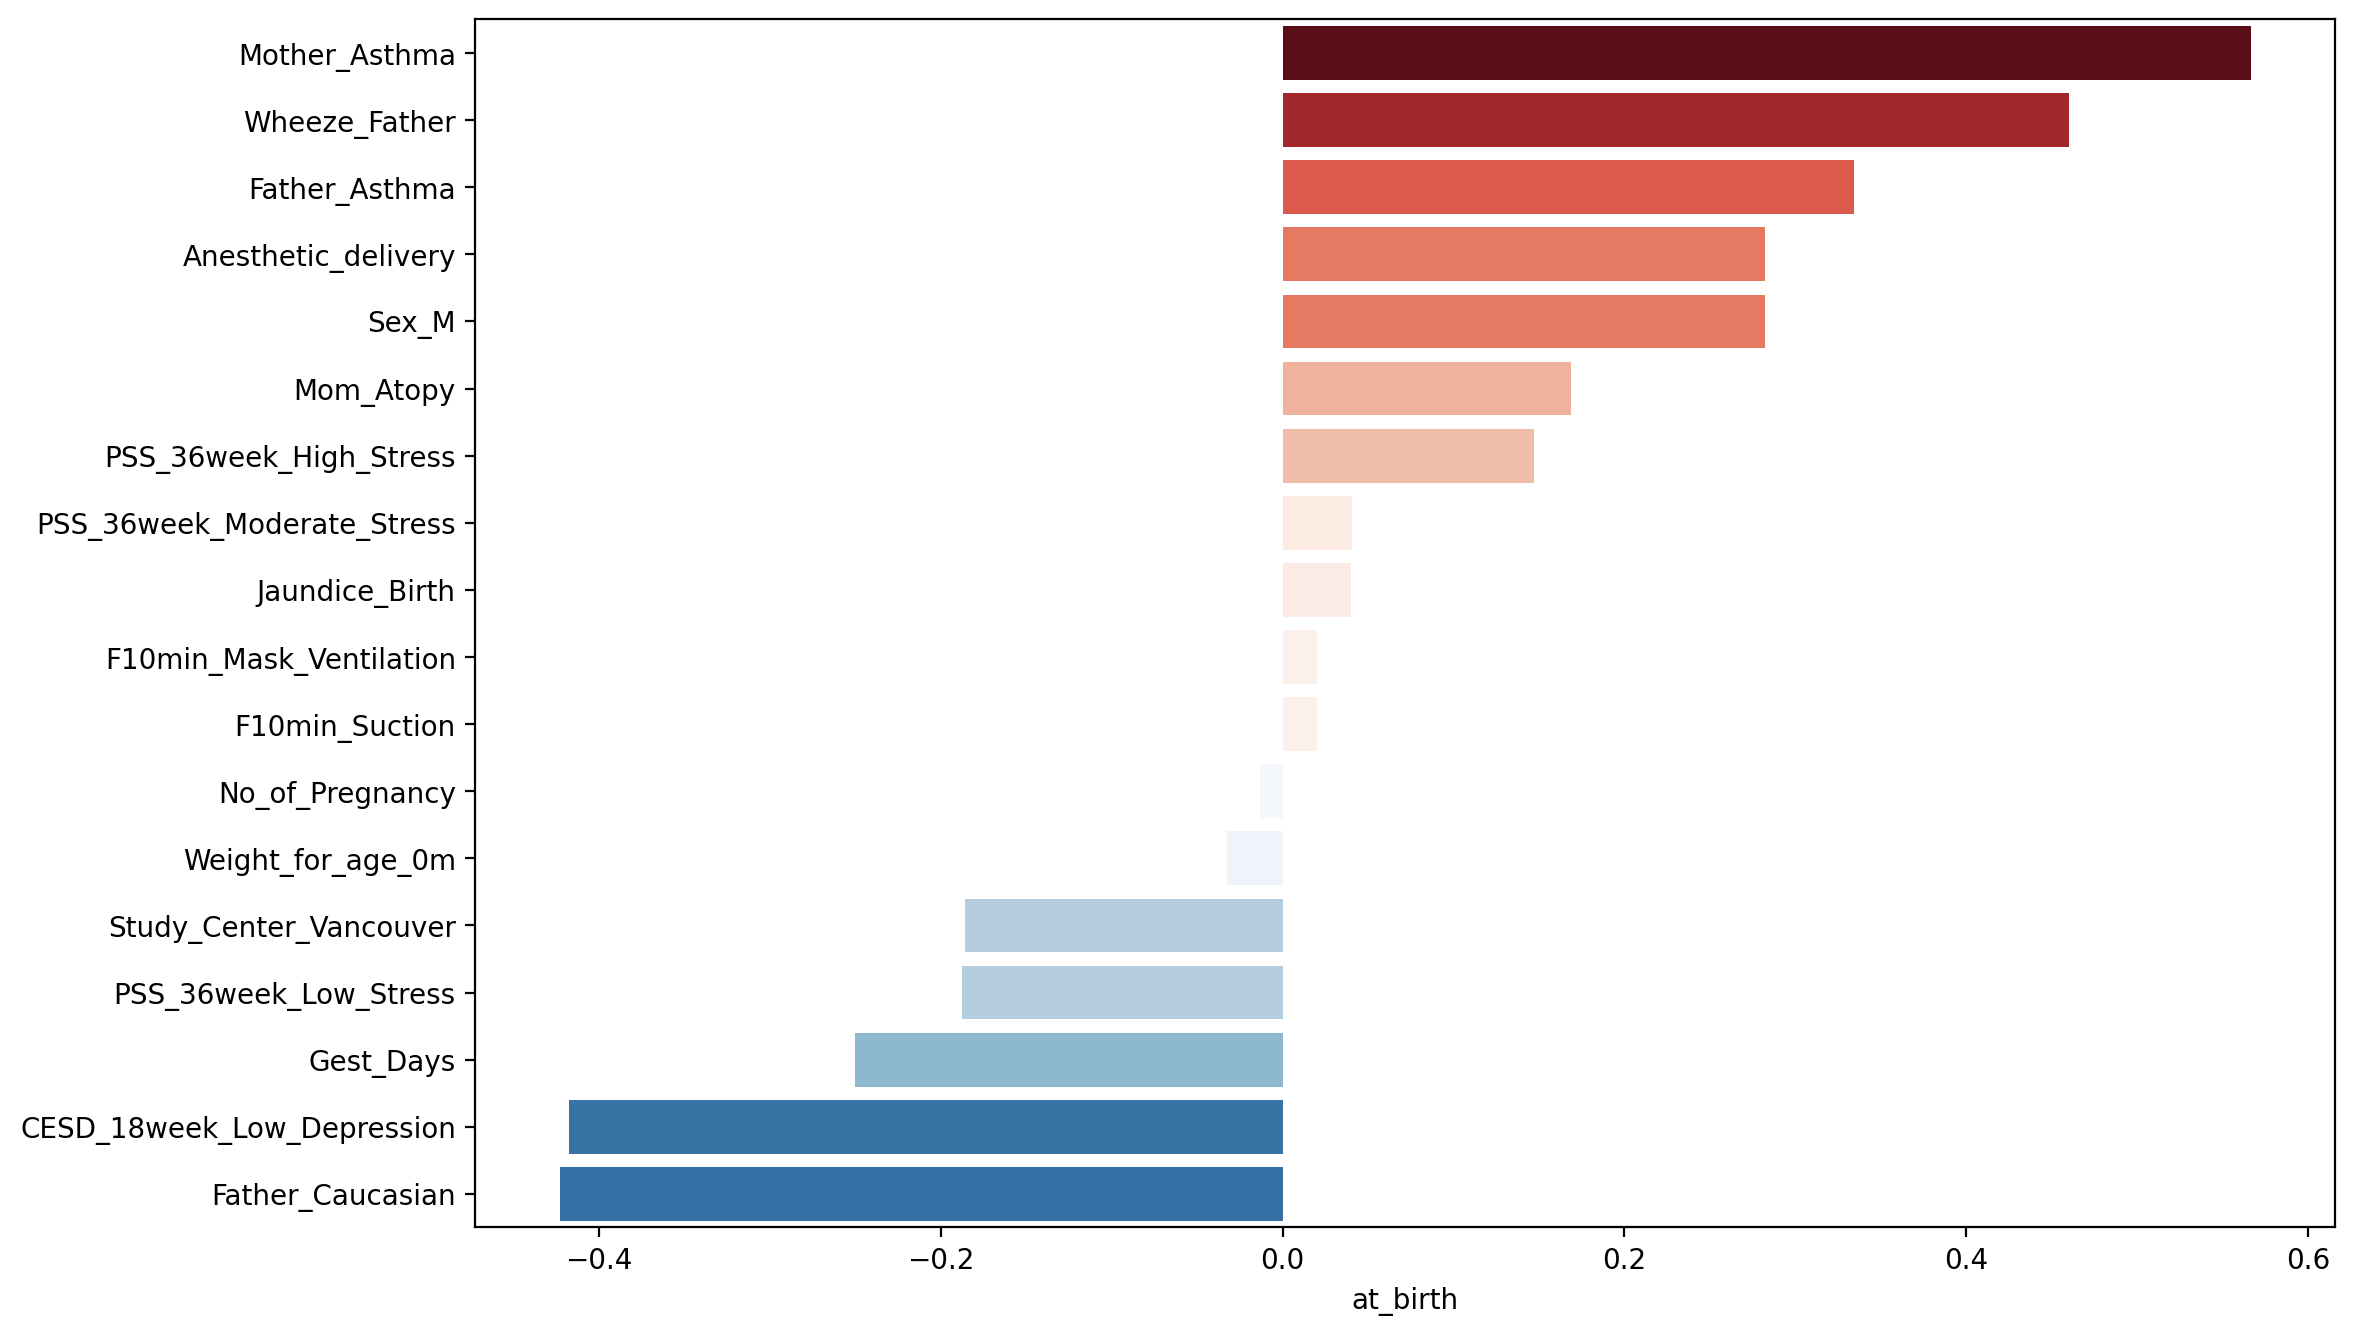

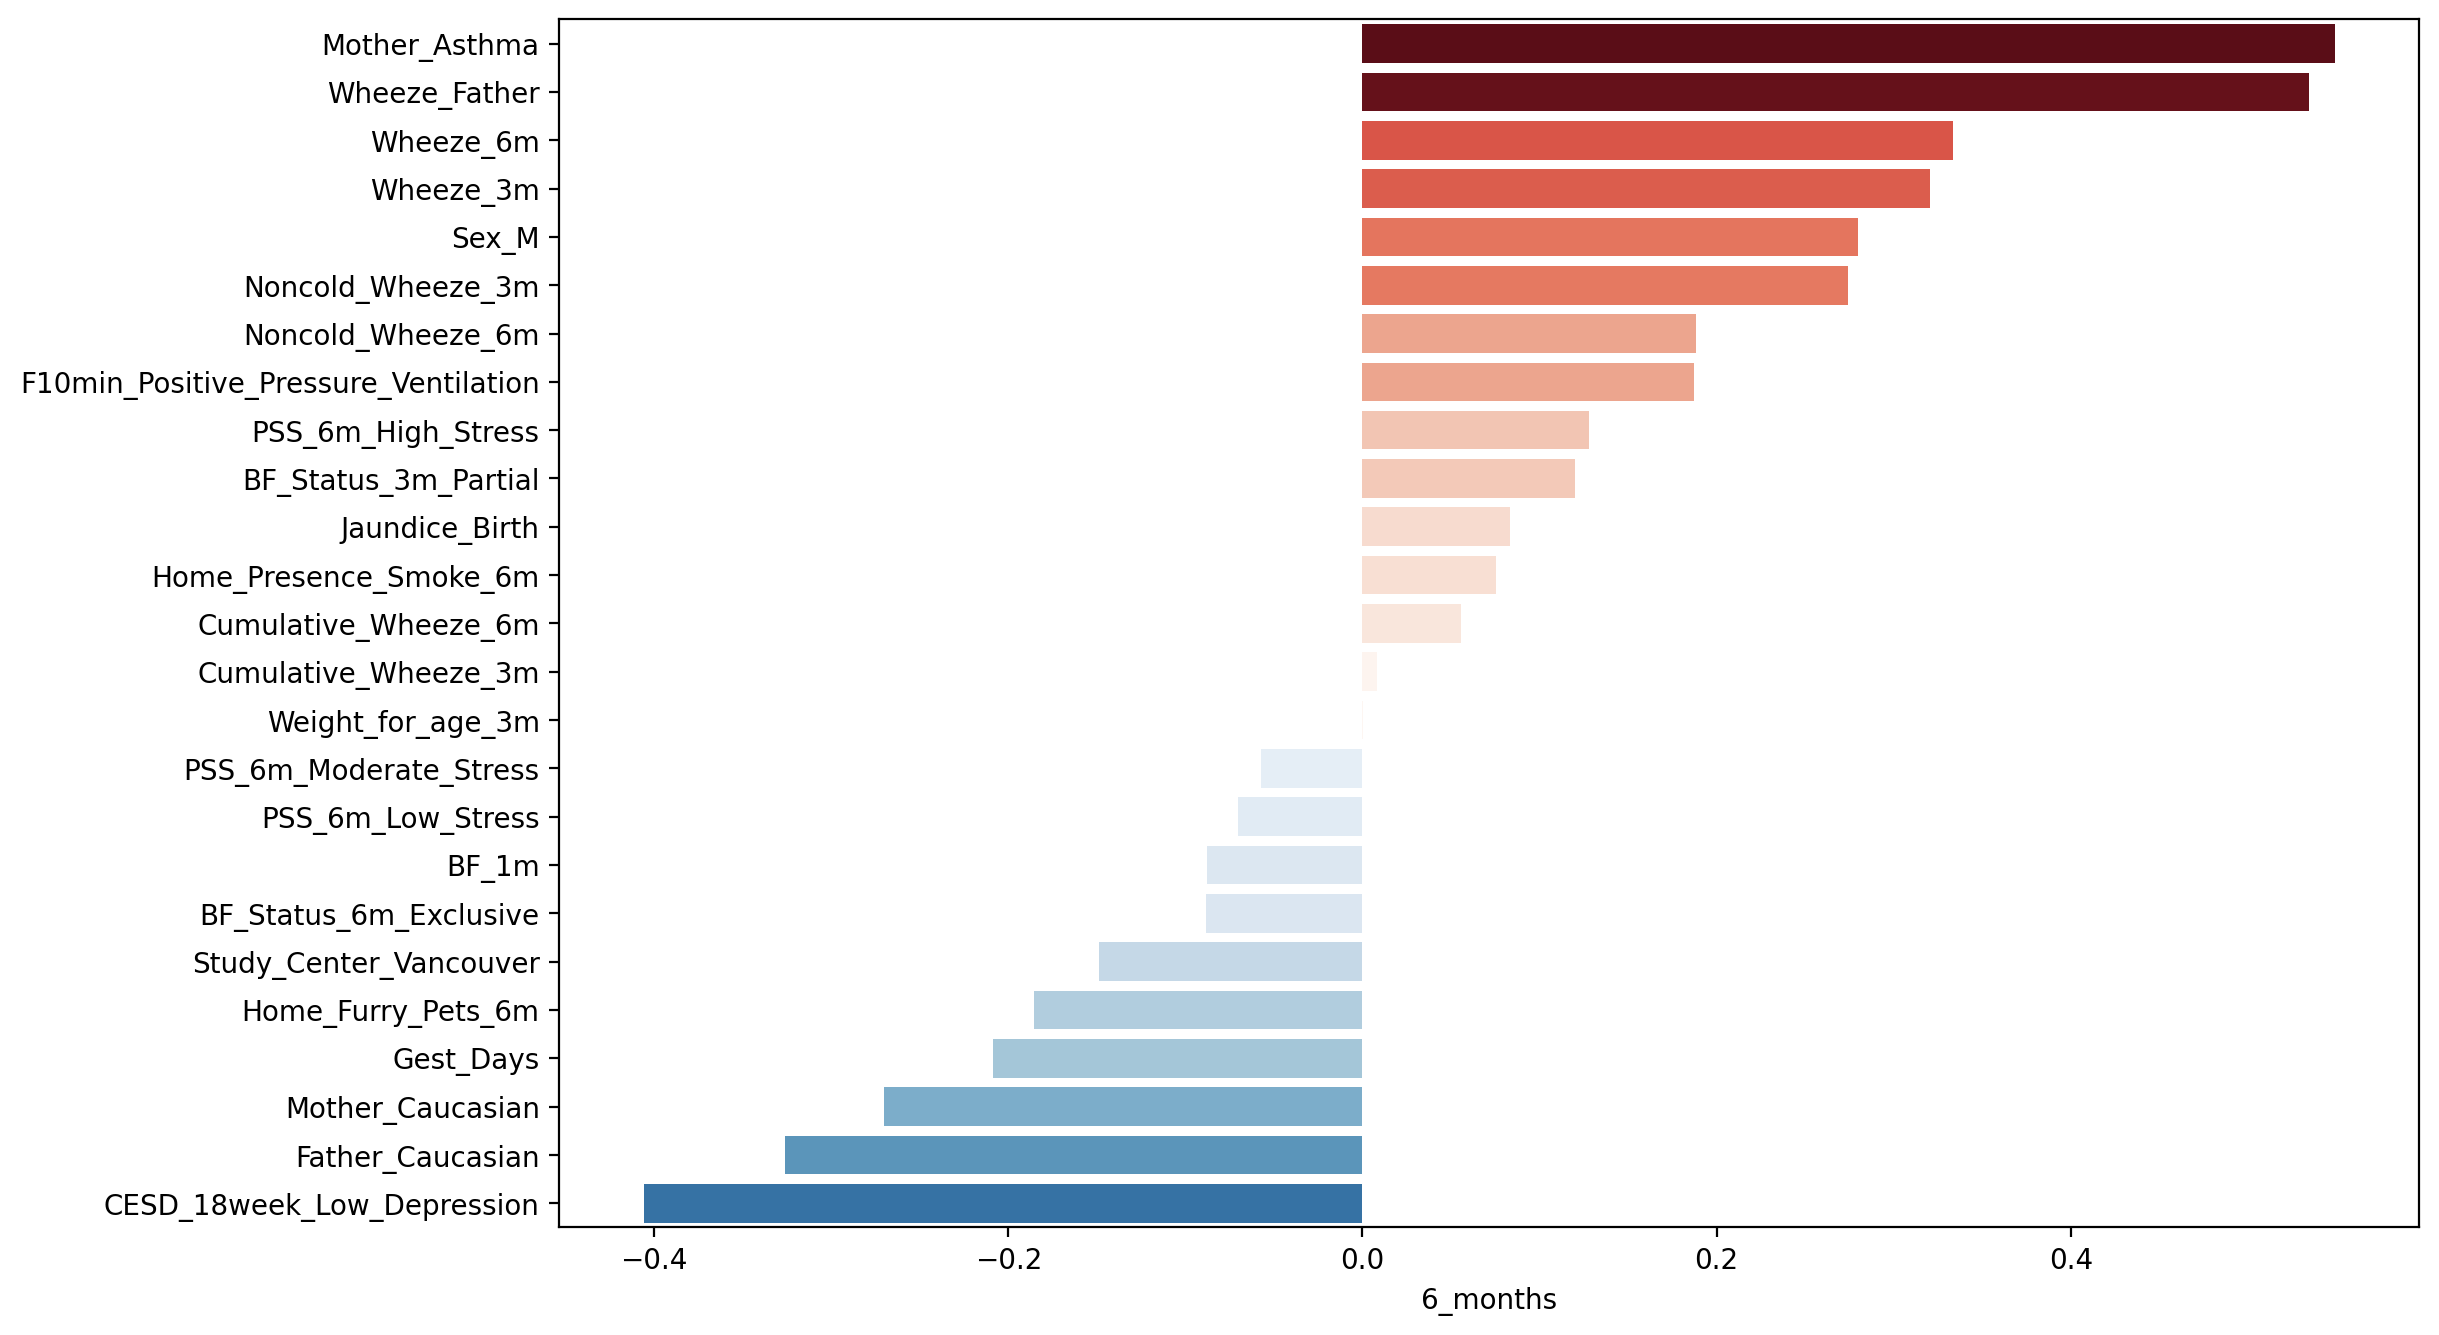

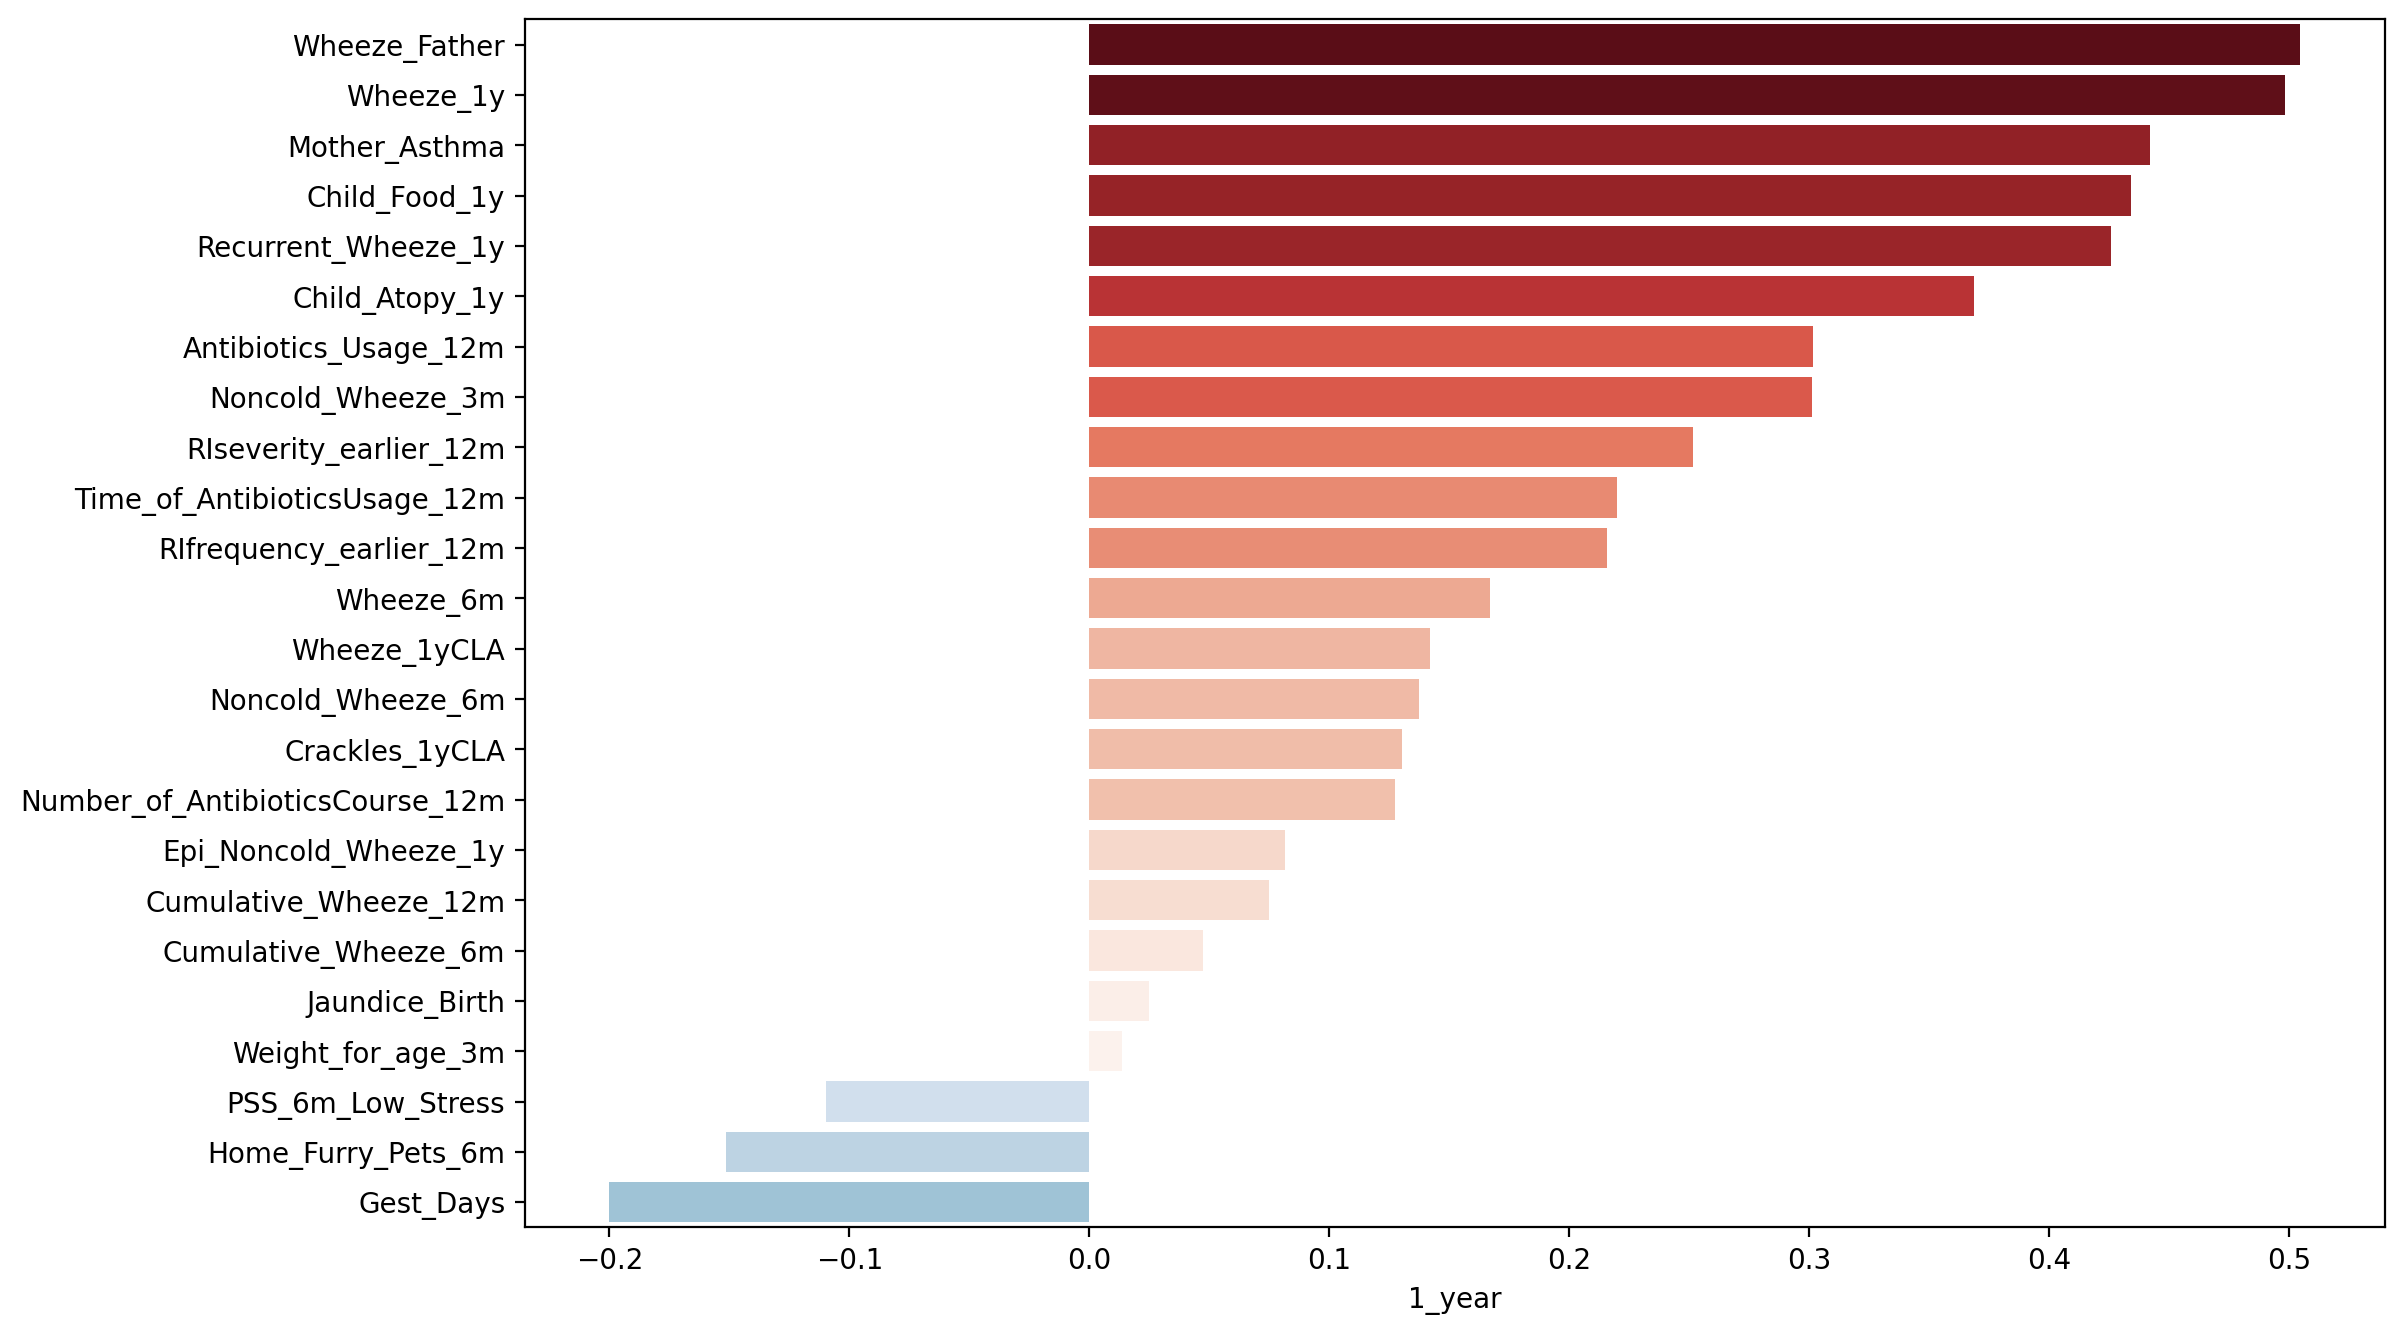

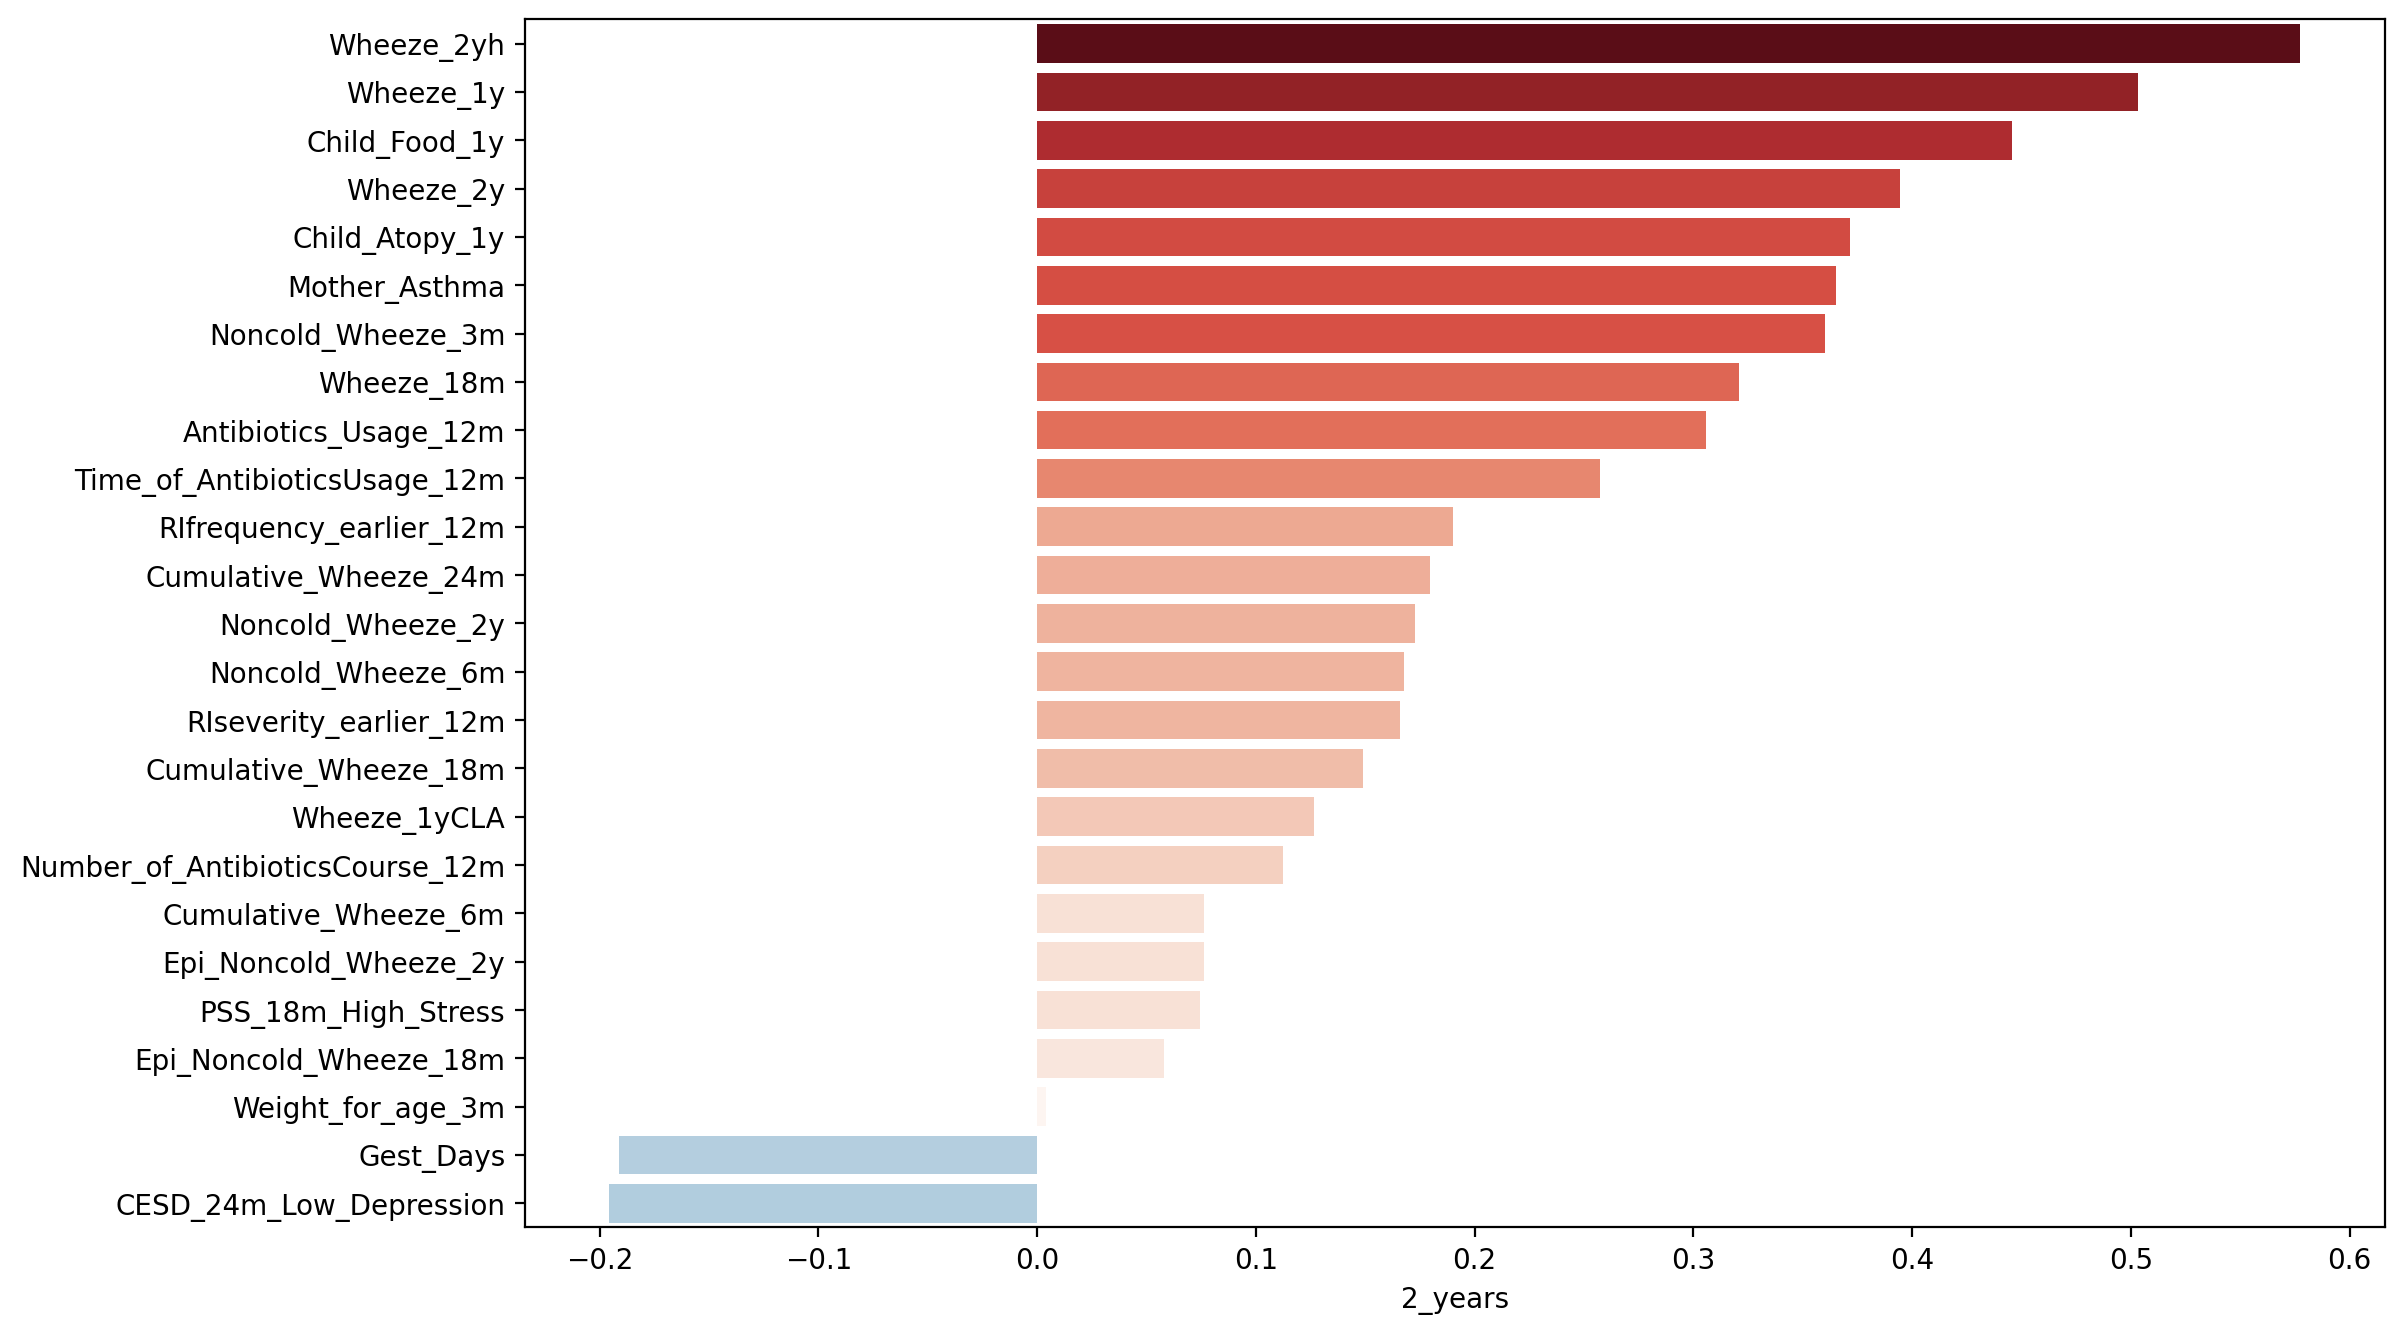

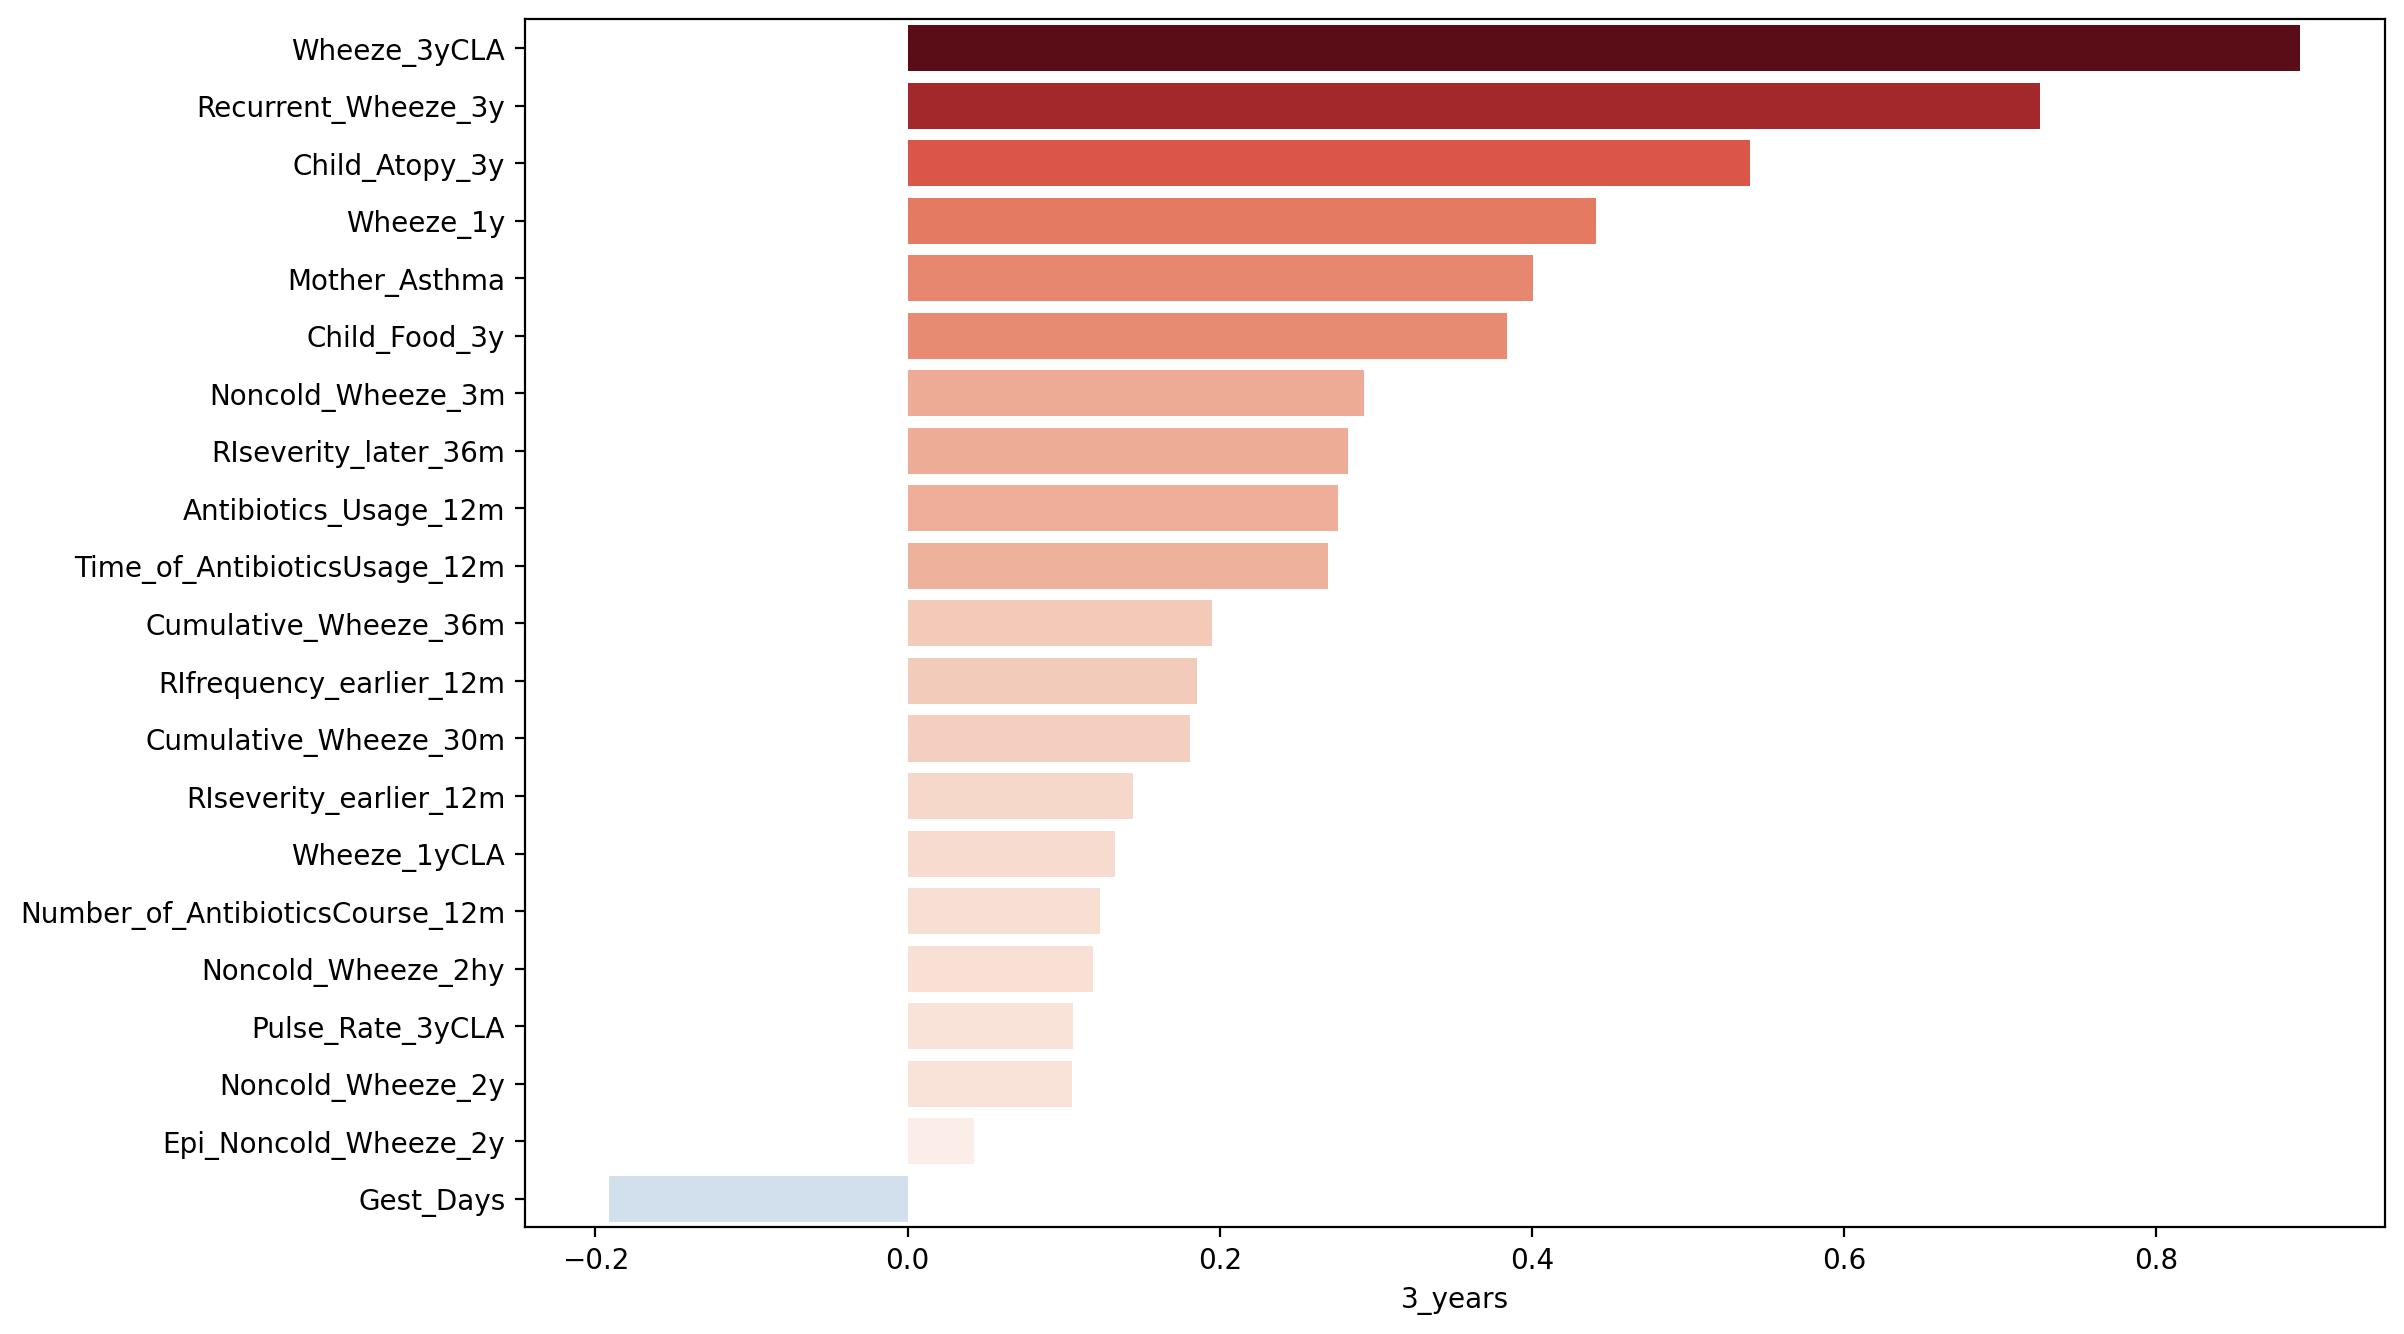

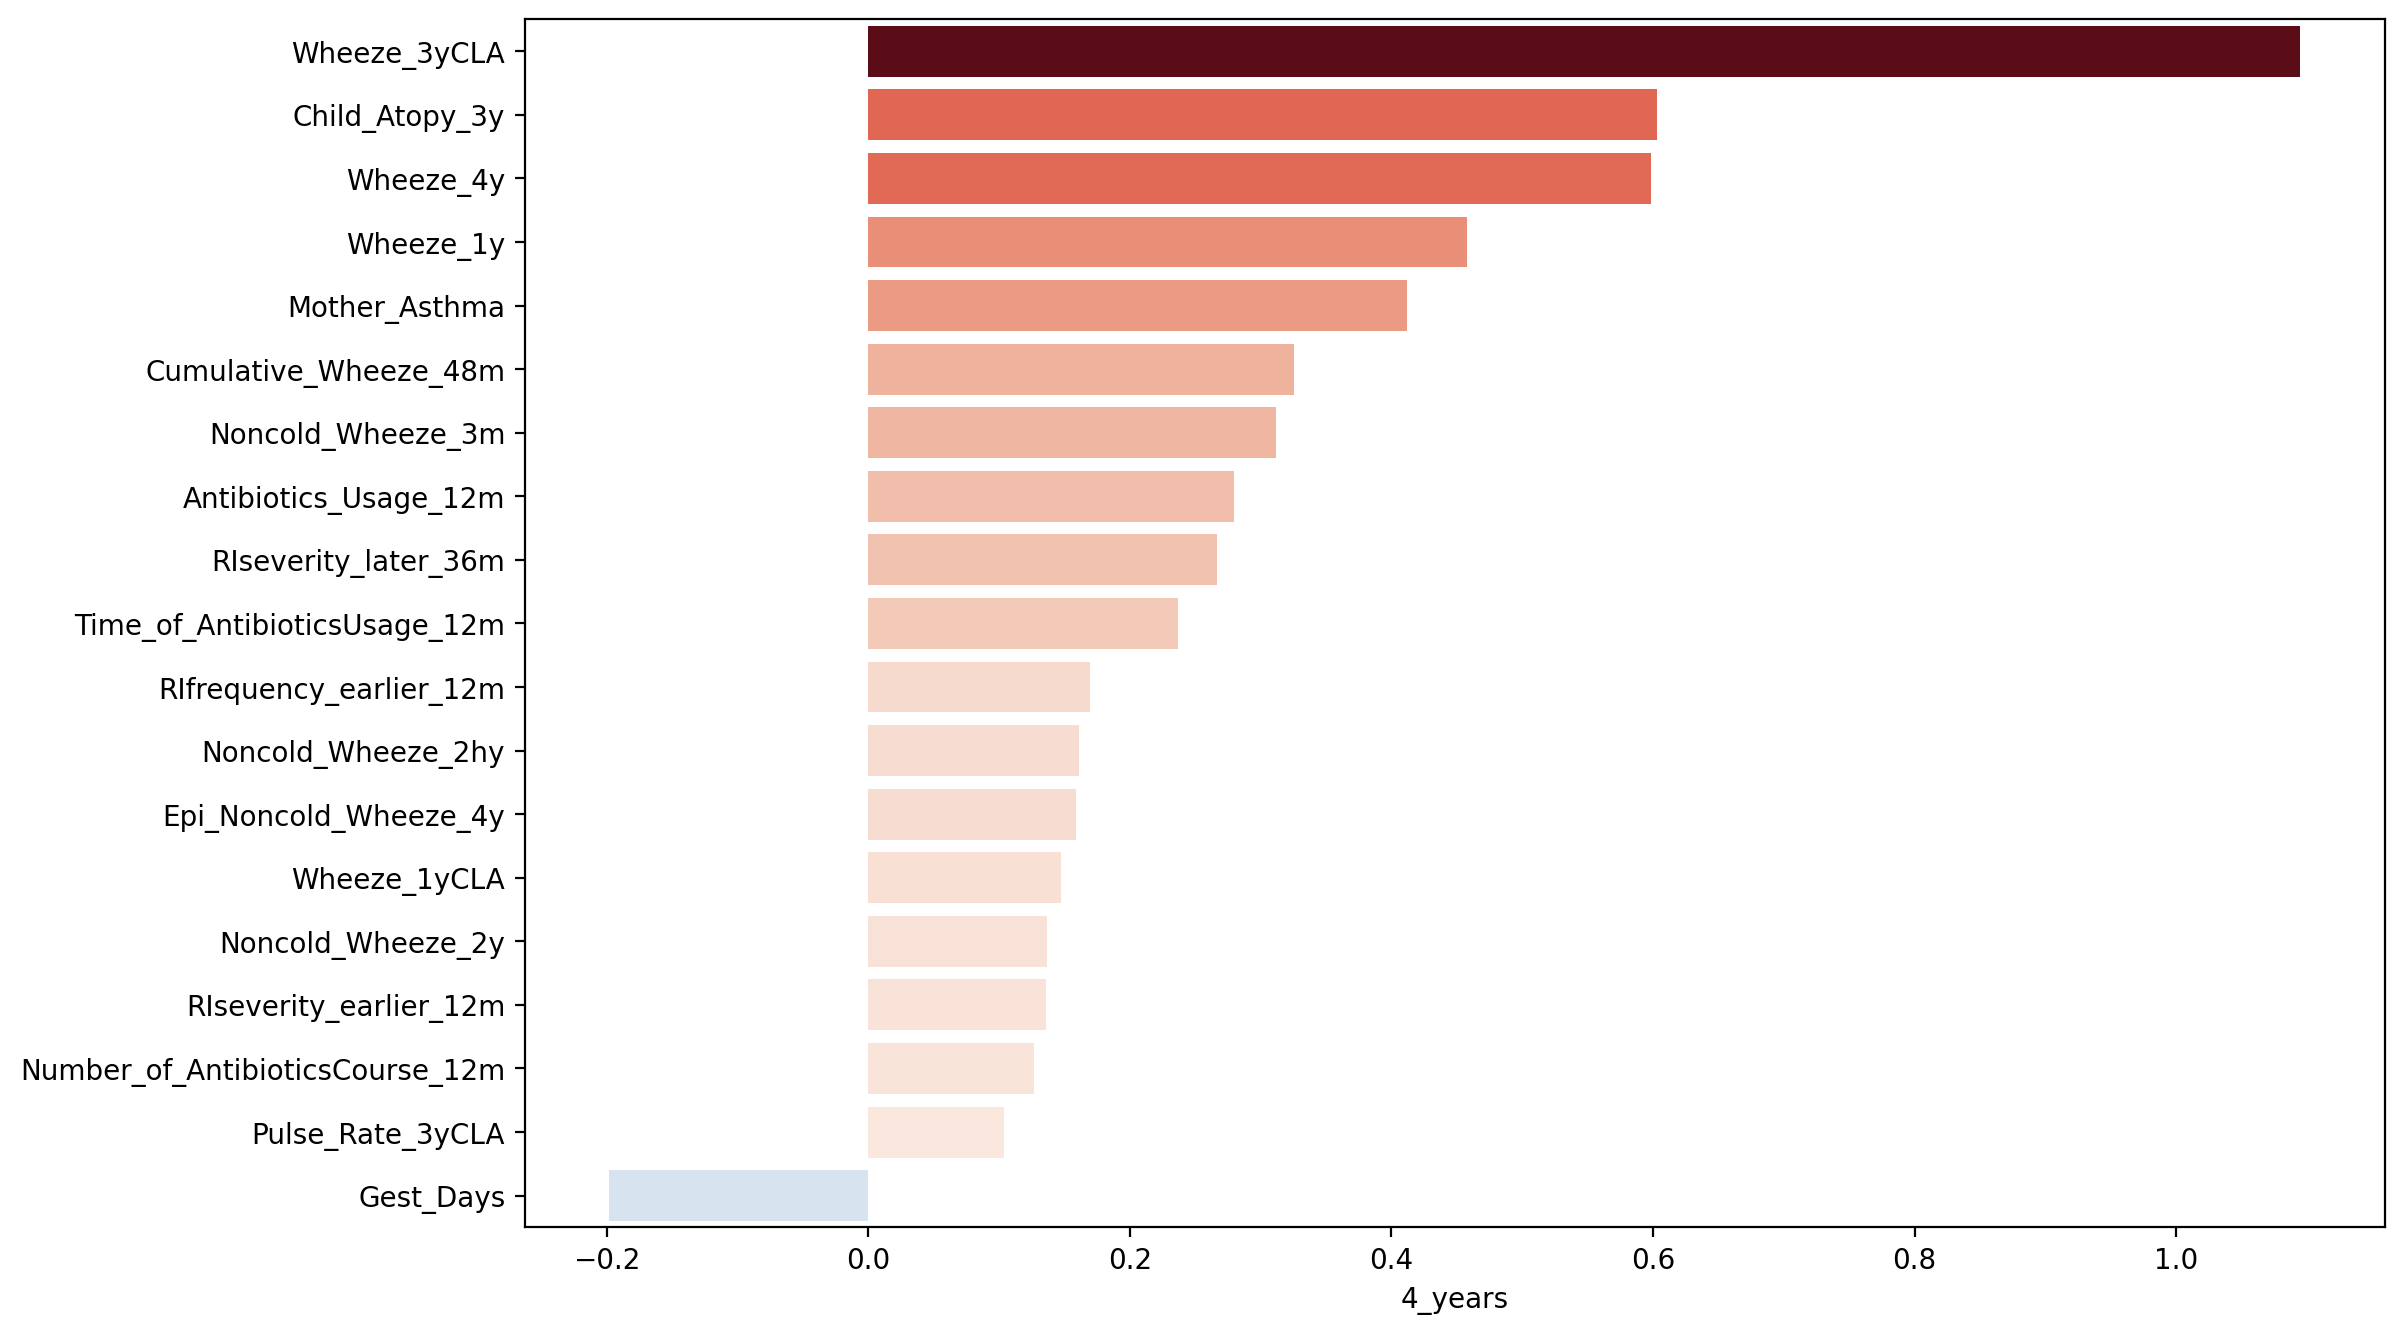

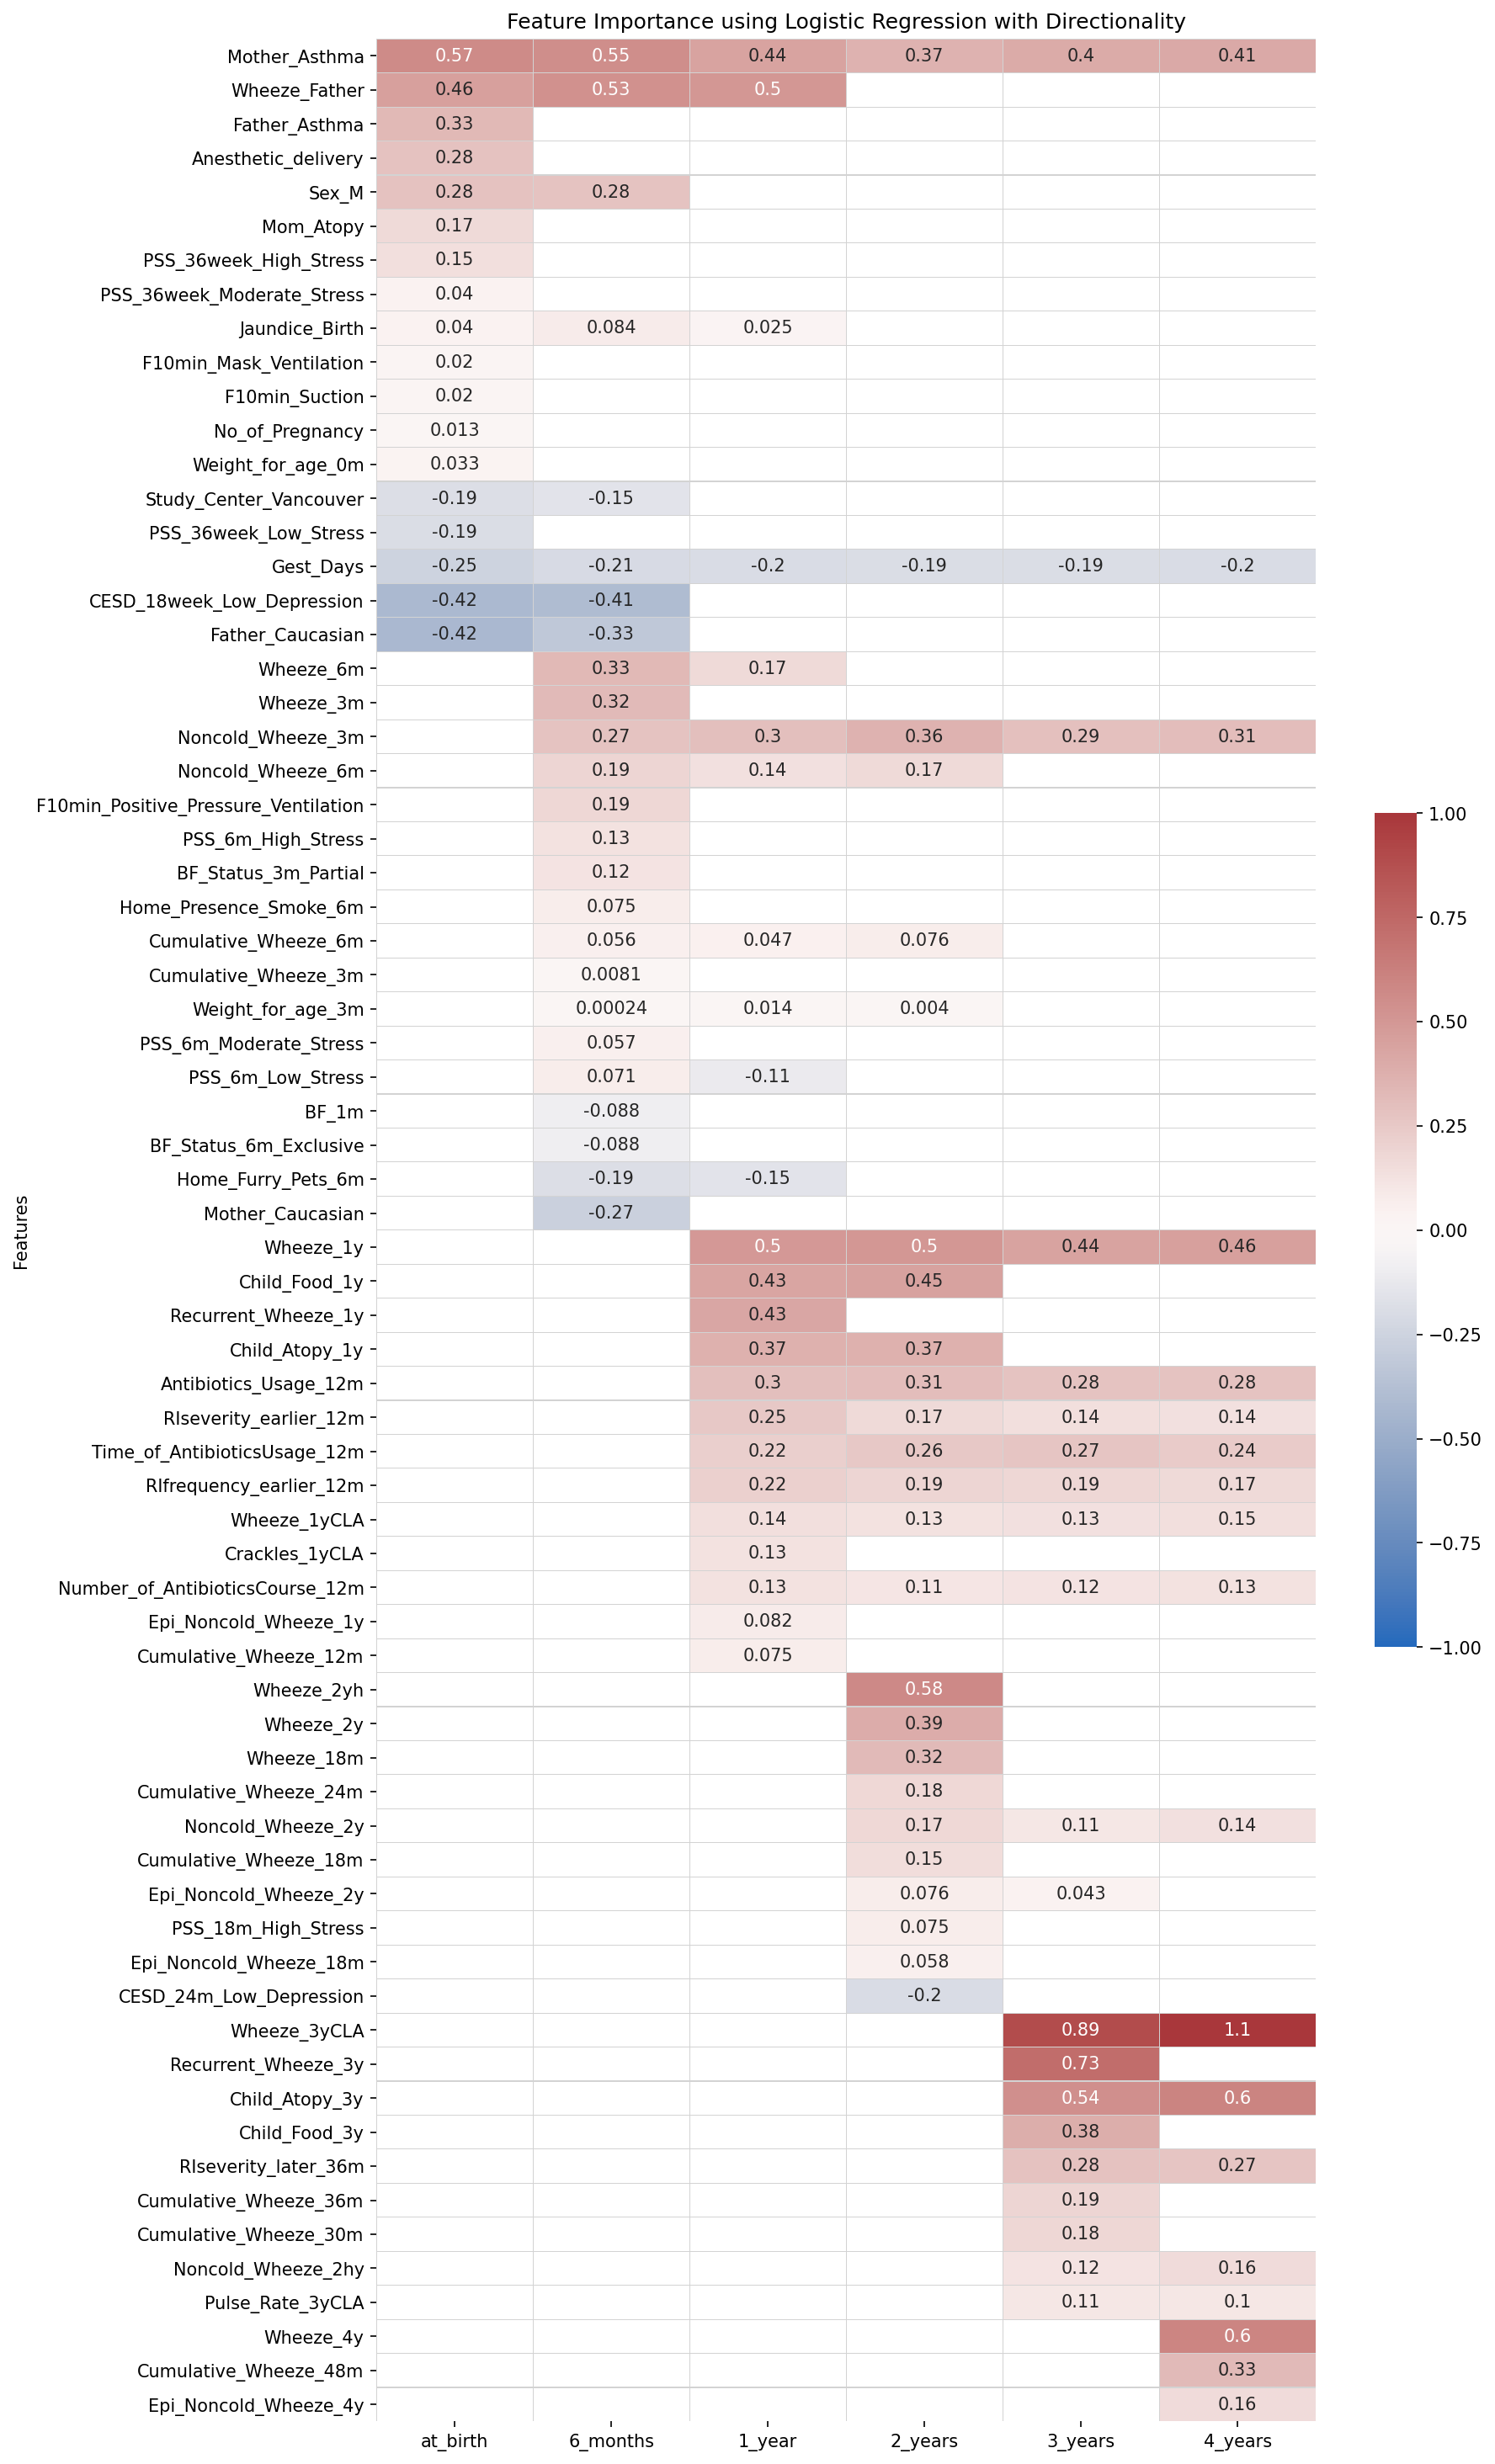

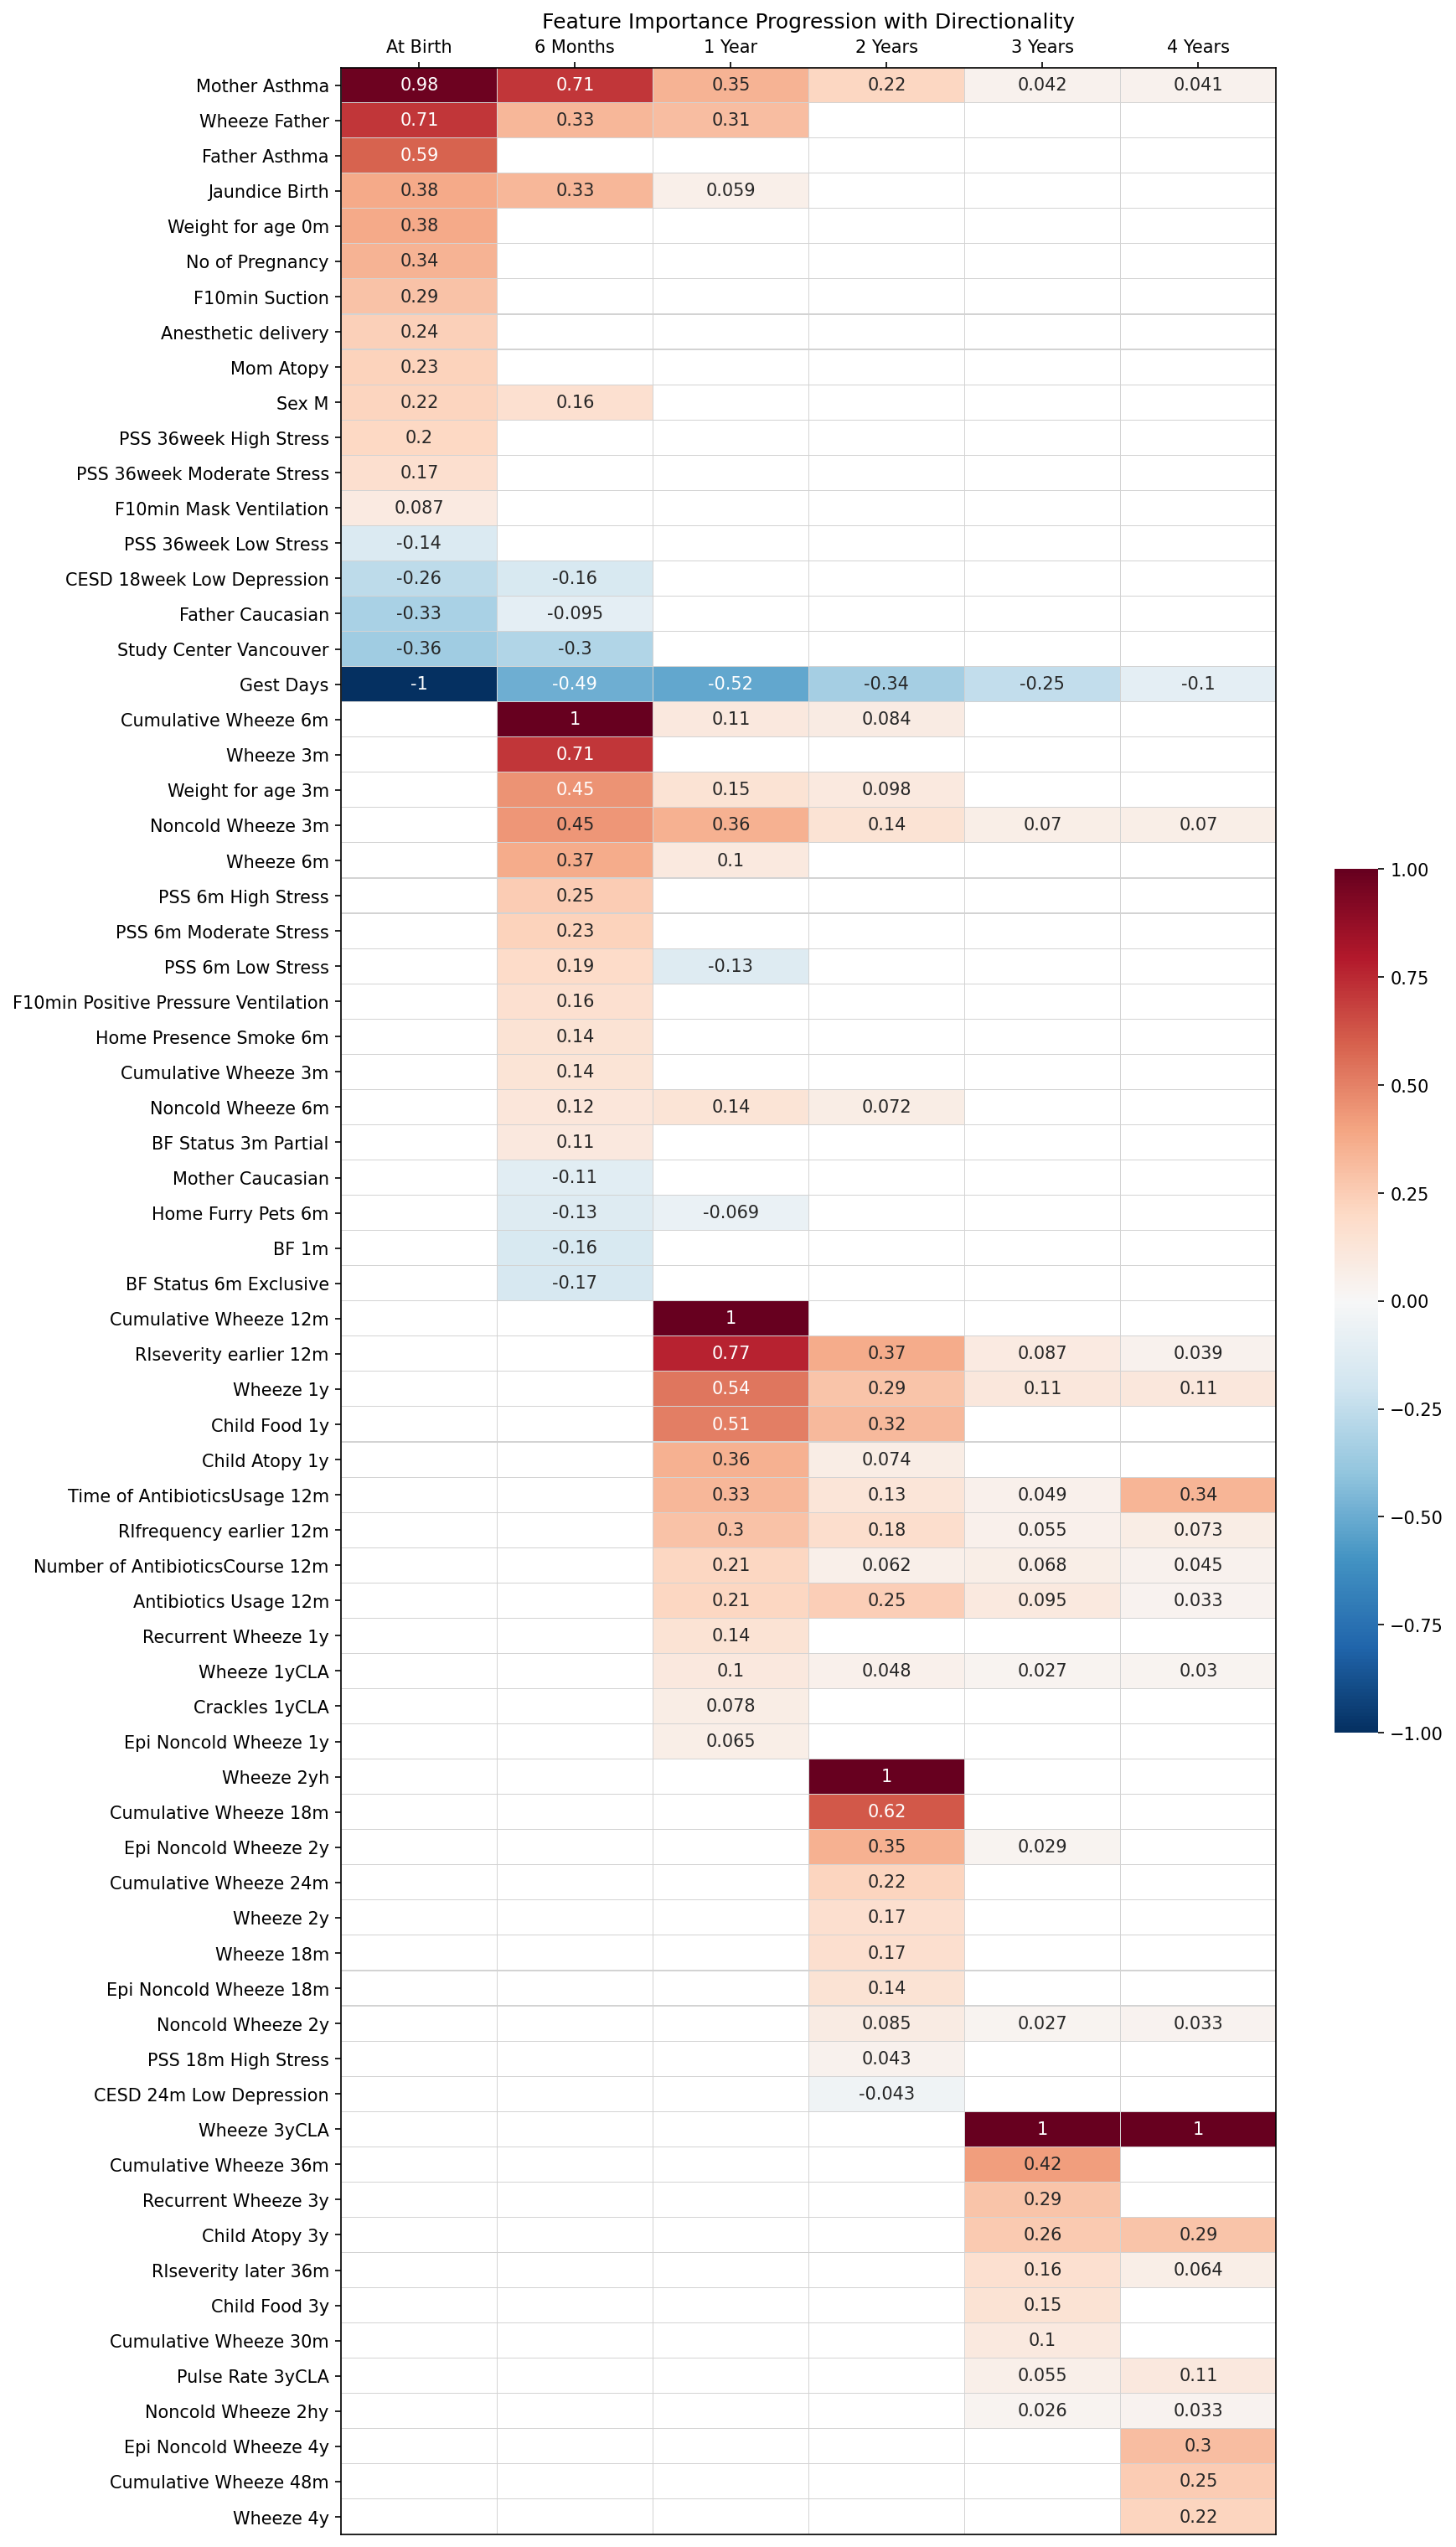

<IPython.core.display.Javascript object>

In [90]:
feature_importance_with_4y[:4]
ml_final_features_selected_screened[:4]

#########Step three: Make the table to be exactly as the input dataframe of "feature_merged_directionality"

# Create Pivot table
feature_importance_with_4y_a = feature_importance_with_4y.pivot(
    index="Features", columns="Time Point", values="Feature Importance"
)[["At Birth", "6 Months", "1 Year", "2 Years", "3 Years", "4 Years"]]


# Remove direction
feature_importance_without_direction = feature_importance_with_4y_a.applymap(
    lambda x: abs(x)
)

# Naming
feature_importance_without_direction.columns.name = ""

# Naming of features & time points
feature_importance_without_direction.index = [
    i.replace(" ", "_") for i in feature_importance_without_direction.index
]
feature_importance_without_direction.columns = [
    i.lower().replace(" ", "_") for i in feature_importance_without_direction.columns
]

# Sorting
feature_importance_without_direction = feature_importance_without_direction.sort_values(
    by=list(feature_importance_without_direction.columns),
    axis=0,
    ascending=[False for i in range(len(feature_importance_without_direction.columns))],
)

# Checking
feature_importance_without_direction[:4]
ml_final_features_selected_screened[:4]


feature_importance_4y_with_direction = feature_merged_directionality(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    feature_importance_without_direction,
    target_name="Asthma_Diagnosis_5yCLA",
    estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
    threshold_for_selection=0,
)

In [96]:
# Save result for future reference
feature_importance_4y_with_direction.to_excel("Feature_Importance_with4y.xlsx")

<IPython.core.display.Javascript object>

### 3.4 Merge current ML performance at 4 years with existing pre-3year ML results

In [97]:
ml_ind_res_selected_screened[:5]
ml_ens_res_bt_true_selected_screened[:5]

Average_Precision  \
Model                  Time Point                          
Logistic Regression    4 Years Cohorts          0.864748   
Random Forest          4 Years Cohorts          0.860715   
eXtreme Gradient Boost 4 Years Cohorts          0.861244   
Support Vector Machine 4 Years Cohorts          0.857245   
Decision Tree          4 Years Cohorts          0.616634   

                                                            Average_Precision_CI  \
Model                  Time Point                                                  
Logistic Regression    4 Years Cohorts  (0.8284087683023653, 0.8777905301361633)   
Random Forest          4 Years Cohorts  (0.7683480217920166, 0.9096591272049543)   
eXtreme Gradient Boost 4 Years Cohorts  (0.7734626372192933, 0.9090458117693974)   
Support Vector Machine 4 Years Cohorts  (0.7698597604324912, 0.8841694217828245)   
Decision Tree          4 Years Cohorts  (0.5083866357358925, 0.7320656680645381)   

                                        ROC_AUC  \
Model                  Time Point                 
Logistic Regression    4 Years Cohorts   0.9753   
Random Forest          4 Years Cohorts   0.9533   
eXtreme Gradient Boost 4 Years Cohorts  0.97145   
Support Vector Machine 4 Years Cohorts   0.9761   
Decision Tree          4 Years Cohorts  0.69045   

                                                             ROC_AUC_CI  
Model                  Time Point                                        
Logistic Regression    4 Years Cohorts             (0.968045, 0.981365)  
Random Forest          4 Years Cohorts  (0.9437225, 0.9701424999999999)  
eXtreme Gradient Boost 4 Years Cohorts           (0.9484675, 0.9829775)  
Support Vector Machine 4 Years Cohorts   (0.9563550000000001, 0.982055)  
Decision Tree          4 Years Cohorts            (0.580595, 0.7791425)

Average_Precision  \
Model         Time Point                          
Soft vote     4 Years Cohorts          0.821382   
Weighted soft 4 Years Cohorts          0.858862   
Stacking lr   4 Years Cohorts          0.771431   
Stacking rf   4 Years Cohorts          0.748119   
Stacking xgb  4 Years Cohorts          0.700837   

                                                   Average_Precision_CI  \
Model         Time Point                                                  
Soft vote     4 Years Cohorts  (0.7397834027200564, 0.8765675291380147)   
Weighted soft 4 Years Cohorts  (0.7909935152797744, 0.8920636182220353)   
Stacking lr   4 Years Cohorts  (0.6813806613626064, 0.8446628180082156)   
Stacking rf   4 Years Cohorts  (0.6016190160237678, 0.8621740119677619)   
Stacking xgb  4 Years Cohorts  (0.5991462802795303, 0.8008430696177392)   

                               ROC_AUC                      ROC_AUC_CI  
Model         Time Point                                                
Soft vote     4 Years Cohorts   0.9763             (0.967035, 0.98491)  
Weighted soft 4 Years Cohorts   0.9797             (0.972415, 0.98602)  
Stacking lr   4 Years Cohorts   0.9703   (0.95748, 0.9808600000000001)  
Stacking rf   4 Years Cohorts  0.94755  (0.861405, 0.9824550000000001)  
Stacking xgb  4 Years Cohorts  0.93255          (0.8485325, 0.9789475)

<IPython.core.display.Javascript object>

In [100]:
previous_ind_res = pd.read_excel(
    "Individual_Model_Performance_5timepoints.xlsx", index_col=0
)

<IPython.core.display.Javascript object>

In [107]:
previous_ens_res = pd.read_excel(
    "Ensemble_Model_Performance_5timepoints.xlsx", index_col=0
)

<IPython.core.display.Javascript object>

In [105]:
ind_res_4y = ci_df_formatter(ml_ind_res_selected_screened, upper_lower_separation=True)
ind_res_4y["Time Point"] = "4 Years"
ind_res_4y

Model Time Point  Average_Precision Average_Precision_CI  \
0     Logistic Regression    4 Years               0.86         [0.83, 0.88]   
1           Random Forest    4 Years               0.86         [0.77, 0.91]   
2  eXtreme Gradient Boost    4 Years               0.86         [0.77, 0.91]   
3  Support Vector Machine    4 Years               0.86         [0.77, 0.88]   
4           Decision Tree    4 Years               0.62         [0.51, 0.73]   

   ROC_AUC    ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0     0.98  [0.97, 0.98]  0.86 [0.83, 0.88]  0.98 [0.97, 0.98]         0.83   
1     0.95  [0.94, 0.97]  0.86 [0.77, 0.91]  0.95 [0.94, 0.97]         0.77   
2     0.97  [0.95, 0.98]  0.86 [0.77, 0.91]  0.97 [0.95, 0.98]         0.77   
3     0.98  [0.96, 0.98]  0.86 [0.77, 0.88]  0.98 [0.96, 0.98]         0.77   
4     0.69  [0.58, 0.78]  0.62 [0.51, 0.73]  0.69 [0.58, 0.78]         0.51   

   AP_CI_Higher  ROC_CI_Lower  ROC_CI_Higher  
0          0.88          0.97           0.98  
1          0.91          0.94           0.97  
2          0.91          0.95           0.98  
3          0.88          0.96           0.98  
4          0.73          0.58           0.78

<IPython.core.display.Javascript object>

In [106]:
ens_res_4y = ci_df_formatter(
    ml_ens_res_bt_true_selected_screened, upper_lower_separation=True
)
ens_res_4y["Time Point"] = "4 Years"
ens_res_4y

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
0      Soft vote    4 Years               0.82         [0.74, 0.88]     0.98   
1  Weighted soft    4 Years               0.86         [0.79, 0.89]     0.98   
2    Stacking lr    4 Years               0.77         [0.68, 0.84]     0.97   
3    Stacking rf    4 Years               0.75          [0.6, 0.86]     0.95   
4   Stacking xgb    4 Years               0.70           [0.6, 0.8]     0.93   
5   Stacking svc    4 Years               0.61         [0.43, 0.76]     0.84   
6    Stacking dt    4 Years               0.37         [0.26, 0.62]     0.80   

     ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0  [0.97, 0.98]  0.82 [0.74, 0.88]  0.98 [0.97, 0.98]         0.74   
1  [0.97, 0.99]  0.86 [0.79, 0.89]  0.98 [0.97, 0.99]         0.79   
2  [0.96, 0.98]  0.77 [0.68, 0.84]  0.97 [0.96, 0.98]         0.68   
3  [0.86, 0.98]   0.75 [0.6, 0.86]  0.95 [0.86, 0.98]         0.60   
4  [0.85, 0.98]     0.7 [0.6, 0.8]  0.93 [0.85, 0.98]         0.60   
5  [0.72, 0.93]  0.61 [0.43, 0.76]  0.84 [0.72, 0.93]         0.43   
6  [0.71, 0.93]  0.37 [0.26, 0.62]   0.8 [0.71, 0.93]         0.26   

   AP_CI_Higher  ROC_CI_Lower  ROC_CI_Higher  
0          0.88          0.97           0.98  
1          0.89          0.97           0.99  
2          0.84          0.96           0.98  
3          0.86          0.86           0.98  
4          0.80          0.85           0.98  
5          0.76          0.72           0.93  
6          0.62          0.71           0.93

<IPython.core.display.Javascript object>

In [112]:
previous_ens_res[-5:]
previous_ind_res[-5:]

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
30  Stacking dt   At Birth               0.08         [0.07, 0.11]     0.52   
31  Stacking dt   6 Months               0.07         [0.07, 0.11]     0.49   
32  Stacking dt     1 Year               0.09         [0.07, 0.15]     0.55   
33  Stacking dt    2 Years               0.13         [0.07, 0.25]     0.59   
34  Stacking dt    3 Years               0.33         [0.13, 0.51]     0.77   

      ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
30  [0.46, 0.59]  0.08 [0.07, 0.11]  0.52 [0.46, 0.59]         0.07   
31  [0.46, 0.57]  0.07 [0.07, 0.11]  0.49 [0.46, 0.57]         0.07   
32  [0.48, 0.63]  0.09 [0.07, 0.15]  0.55 [0.48, 0.63]         0.07   
33   [0.49, 0.7]  0.13 [0.07, 0.25]   0.59 [0.49, 0.7]         0.07   
34  [0.62, 0.86]  0.33 [0.13, 0.51]  0.77 [0.62, 0.86]         0.13   

    AP_CI_Higher  ROC_CI_Lower  ROC_CI_Higher  
30          0.11          0.46           0.59  
31          0.11          0.46           0.57  
32          0.15          0.48           0.63  
33          0.25          0.49           0.70  
34          0.51          0.62           0.86

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
20  Decision Tree   At Birth               0.14          [0.1, 0.17]     0.54   
21  Decision Tree   6 Months               0.09         [0.07, 0.14]     0.47   
22  Decision Tree     1 Year               0.10         [0.08, 0.15]     0.50   
23  Decision Tree    2 Years               0.22         [0.14, 0.33]     0.49   
24  Decision Tree    3 Years               0.80           [0.6, 0.9]     0.90   

      ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
20  [0.46, 0.58]   0.14 [0.1, 0.17]  0.54 [0.46, 0.58]         0.10   
21   [0.4, 0.53]  0.09 [0.07, 0.14]   0.47 [0.4, 0.53]         0.07   
22   [0.44, 0.6]   0.1 [0.08, 0.15]    0.5 [0.44, 0.6]         0.08   
23  [0.33, 0.62]  0.22 [0.14, 0.33]  0.49 [0.33, 0.62]         0.14   
24  [0.63, 0.96]     0.8 [0.6, 0.9]   0.9 [0.63, 0.96]         0.60   

    AP_CI_Higher  ROC_CI_Lower  ROC_CI_Higher  
20          0.17          0.46           0.58  
21          0.14          0.40           0.53  
22          0.15          0.44           0.60  
23          0.33          0.33           0.62  
24          0.90          0.63           0.96

<IPython.core.display.Javascript object>

In [114]:
ind_perform_with_4y = pd.concat([previous_ind_res, ind_res_4y], ignore_index=True)
ind_perform_with_4y

ens_perform_with_4y = pd.concat([previous_ens_res, ens_res_4y], ignore_index=True)
ens_perform_with_4y

Model Time Point  Average_Precision Average_Precision_CI  \
0      Logistic Regression   At Birth               0.15         [0.11, 0.24]   
1      Logistic Regression   6 Months               0.13         [0.12, 0.17]   
2      Logistic Regression     1 Year               0.32         [0.28, 0.34]   
3      Logistic Regression    2 Years               0.46          [0.4, 0.56]   
4      Logistic Regression    3 Years               0.89         [0.85, 0.92]   
5            Random Forest   At Birth               0.08         [0.07, 0.12]   
6            Random Forest   6 Months               0.10         [0.07, 0.15]   
7            Random Forest     1 Year               0.15         [0.12, 0.21]   
8            Random Forest    2 Years               0.37         [0.23, 0.51]   
9            Random Forest    3 Years               0.87         [0.82, 0.91]   
10  eXtreme Gradient Boost   At Birth               0.15          [0.1, 0.23]   
11  eXtreme Gradient Boost   6 Months               0.10         [0.08, 0.15]   
12  eXtreme Gradient Boost     1 Year               0.15          [0.1, 0.22]   
13  eXtreme Gradient Boost    2 Years               0.40         [0.28, 0.53]   
14  eXtreme Gradient Boost    3 Years               0.84         [0.75, 0.92]   
15  Support Vector Machine   At Birth               0.24         [0.13, 0.34]   
16  Support Vector Machine   6 Months               0.19          [0.17, 0.2]   
17  Support Vector Machine     1 Year               0.31         [0.25, 0.33]   
18  Support Vector Machine    2 Years               0.56         [0.46, 0.67]   
19  Support Vector Machine    3 Years               0.91         [0.86, 0.94]   
20           Decision Tree   At Birth               0.14          [0.1, 0.17]   
21           Decision Tree   6 Months               0.09         [0.07, 0.14]   
22           Decision Tree     1 Year               0.10         [0.08, 0.15]   
23           Decision Tree    2 Years               0.22         [0.14, 0.33]   
24           Decision Tree    3 Years               0.80           [0.6, 0.9]   
25     Logistic Regression    4 Years               0.86         [0.83, 0.88]   
26           Random Forest    4 Years               0.86         [0.77, 0.91]   
27  eXtreme Gradient Boost    4 Years               0.86         [0.77, 0.91]   
28  Support Vector Machine    4 Years               0.86         [0.77, 0.88]   
29           Decision Tree    4 Years               0.62         [0.51, 0.73]   

    ROC_AUC    ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0      0.71  [0.65, 0.77]  0.15 [0.11, 0.24]  0.71 [0.65, 0.77]         0.11   
1      0.67   [0.6, 0.72]  0.13 [0.12, 0.17]   0.67 [0.6, 0.72]         0.12   
2      0.78  [0.75, 0.82]  0.32 [0.28, 0.34]  0.78 [0.75, 0.82]         0.28   
3      0.84  [0.81, 0.88]   0.46 [0.4, 0.56]  0.84 [0.81, 0.88]         0.40   
4      0.98  [0.98, 0.99]  0.89 [0.85, 0.92]  0.98 [0.98, 0.99]         0.85   
5      0.51  [0.45, 0.59]  0.08 [0.07, 0.12]  0.51 [0.45, 0.59]         0.07   
6      0.54  [0.47, 0.59]   0.1 [0.07, 0.15]  0.54 [0.47, 0.59]         0.07   
7      0.67  [0.59, 0.71]  0.15 [0.12, 0.21]  0.67 [0.59, 0.71]         0.12   
8      0.80  [0.71, 0.87]  0.37 [0.23, 0.51]   0.8 [0.71, 0.87]         0.23   
9      0.96  [0.94, 0.98]  0.87 [0.82, 0.91]  0.96 [0.94, 0.98]         0.82   
10     0.61  [0.54, 0.69]   0.15 [0.1, 0.23]  0.61 [0.54, 0.69]         0.10   
11     0.53  [0.46, 0.61]   0.1 [0.08, 0.15]  0.53 [0.46, 0.61]         0.08   
12     0.61  [0.53, 0.68]   0.15 [0.1, 0.22]  0.61 [0.53, 0.68]         0.10   
13     0.81  [0.73, 0.89]   0.4 [0.28, 0.53]  0.81 [0.73, 0.89]         0.28   
14     0.94  [0.89, 0.97]  0.84 [0.75, 0.92]  0.94 [0.89, 0.97]         0.75   
15     0.74  [0.65, 0.76]  0.24 [0.13, 0.34]  0.74 [0.65, 0.76]         0.13   
16     0.72  [0.67, 0.75]   0.19 [0.17, 0.2]  0.72 [0.67, 0.75]         0.17   
17     0.80  [0.74, 0.82]  0.31 [0.25, 0.33]   0.8 [0.74, 0.82]      

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
0       Soft vote   At Birth               0.15         [0.12, 0.22]     0.69   
1       Soft vote   6 Months               0.14         [0.09, 0.19]     0.64   
2       Soft vote     1 Year               0.23          [0.14, 0.3]     0.74   
3       Soft vote    2 Years               0.45         [0.28, 0.56]     0.86   
4       Soft vote    3 Years               0.85          [0.79, 0.9]     0.98   
5   Weighted soft   At Birth               0.18         [0.14, 0.23]     0.71   
6   Weighted soft   6 Months               0.15         [0.12, 0.18]     0.65   
7   Weighted soft     1 Year               0.24          [0.2, 0.29]     0.76   
8   Weighted soft    2 Years               0.47         [0.37, 0.63]     0.86   
9   Weighted soft    3 Years               0.88         [0.84, 0.92]     0.99   
10    Stacking lr   At Birth               0.16         [0.12, 0.25]     0.70   
11    Stacking lr   6 Months               0.13         [0.09, 0.17]     0.64   
12    Stacking lr     1 Year               0.22         [0.16, 0.28]     0.75   
13    Stacking lr    2 Years               0.35          [0.28, 0.5]     0.84   
14    Stacking lr    3 Years               0.75         [0.62, 0.85]     0.97   
15    Stacking rf   At Birth               0.12         [0.09, 0.17]     0.60   
16    Stacking rf   6 Months               0.10         [0.07, 0.14]     0.52   
17    Stacking rf     1 Year               0.15          [0.1, 0.22]     0.66   
18    Stacking rf    2 Years               0.29         [0.15, 0.41]     0.76   
19    Stacking rf    3 Years               0.69         [0.48, 0.84]     0.93   
20   Stacking xgb   At Birth               0.12         [0.07, 0.22]     0.59   
21   Stacking xgb   6 Months               0.10         [0.07, 0.18]     0.56   
22   Stacking xgb     1 Year               0.16         [0.11, 0.25]     0.65   
23   Stacking xgb    2 Years               0.26         [0.14, 0.42]     0.76   
24   Stacking xgb    3 Years               0.74         [0.46, 0.84]     0.94   
25   Stacking svc   At Birth               0.10         [0.06, 0.16]     0.55   
26   Stacking svc   6 Months               0.10         [0.08, 0.15]     0.58   
27   Stacking svc     1 Year               0.13         [0.07, 0.26]     0.60   
28   Stacking svc    2 Years               0.26         [0.16, 0.37]     0.56   
29   Stacking svc    3 Years               0.72         [0.53, 0.83]     0.86   
30    Stacking dt   At Birth               0.08         [0.07, 0.11]     0.52   
31    Stacking dt   6 Months               0.07         [0.07, 0.11]     0.49   
32    Stacking dt     1 Year               0.09         [0.07, 0.15]     0.55   
33    Stacking dt    2 Years               0.13         [0.07, 0.25]     0.59   
34    Stacking dt    3 Years               0.33         [0.13, 0.51]     0.77   
35      Soft vote    4 Years               0.82         [0.74, 0.88]     0.98   
36  Weighted soft    4 Years               0.86         [0.79, 0.89]     0.98   
37    Stacking lr    4 Years               0.77         [0.68, 0.84]     0.97   
38    Stacking rf    4 Years               0.75          [0.6, 0.86]     0.95   
39   Stacking xgb    4 Years               0.70           [0.6, 0.8]     0.93   
40   Stacking svc    4 Years               0.61         [0.43, 0.76]     0.84   
41    Stacking dt    4 Years               0.37         [0.26, 0.62]     0.80   

      ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0   [0.63, 0.74]  0.15 [0.12, 0.22]  0.69 [0.63, 0.74]         0.12   
1   [0.57, 0.69]  0.14 [0.09, 0.19]  0.64 [0.57, 0.69]         0.09   
2   [0.68, 0.78]   0.23 [0.14, 0.3]  0.74 [0.68, 0.78]         0.14   
3     [0.8, 0.9]  0.45 [0.28, 0.56]    0.86 [0.8, 0.9]         0.28   
4   [0.97, 0.99]   0.85 [0.79, 0.9]  0.98 [0.97, 0.99]         0.79   
5   [0.67, 0.76]  0.18 [0.14, 0.23]  0.71 [0.67, 0.76]         0.14   
6   [0.59, 0.71]  0.15 [0.12, 0

<IPython.core.display.Javascript object>

In [115]:
ind_perform_with_4y

Model Time Point  Average_Precision Average_Precision_CI  \
0      Logistic Regression   At Birth               0.15         [0.11, 0.24]   
1      Logistic Regression   6 Months               0.13         [0.12, 0.17]   
2      Logistic Regression     1 Year               0.32         [0.28, 0.34]   
3      Logistic Regression    2 Years               0.46          [0.4, 0.56]   
4      Logistic Regression    3 Years               0.89         [0.85, 0.92]   
5            Random Forest   At Birth               0.08         [0.07, 0.12]   
6            Random Forest   6 Months               0.10         [0.07, 0.15]   
7            Random Forest     1 Year               0.15         [0.12, 0.21]   
8            Random Forest    2 Years               0.37         [0.23, 0.51]   
9            Random Forest    3 Years               0.87         [0.82, 0.91]   
10  eXtreme Gradient Boost   At Birth               0.15          [0.1, 0.23]   
11  eXtreme Gradient Boost   6 Months               0.10         [0.08, 0.15]   
12  eXtreme Gradient Boost     1 Year               0.15          [0.1, 0.22]   
13  eXtreme Gradient Boost    2 Years               0.40         [0.28, 0.53]   
14  eXtreme Gradient Boost    3 Years               0.84         [0.75, 0.92]   
15  Support Vector Machine   At Birth               0.24         [0.13, 0.34]   
16  Support Vector Machine   6 Months               0.19          [0.17, 0.2]   
17  Support Vector Machine     1 Year               0.31         [0.25, 0.33]   
18  Support Vector Machine    2 Years               0.56         [0.46, 0.67]   
19  Support Vector Machine    3 Years               0.91         [0.86, 0.94]   
20           Decision Tree   At Birth               0.14          [0.1, 0.17]   
21           Decision Tree   6 Months               0.09         [0.07, 0.14]   
22           Decision Tree     1 Year               0.10         [0.08, 0.15]   
23           Decision Tree    2 Years               0.22         [0.14, 0.33]   
24           Decision Tree    3 Years               0.80           [0.6, 0.9]   
25     Logistic Regression    4 Years               0.86         [0.83, 0.88]   
26           Random Forest    4 Years               0.86         [0.77, 0.91]   
27  eXtreme Gradient Boost    4 Years               0.86         [0.77, 0.91]   
28  Support Vector Machine    4 Years               0.86         [0.77, 0.88]   
29           Decision Tree    4 Years               0.62         [0.51, 0.73]   

    ROC_AUC    ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0      0.71  [0.65, 0.77]  0.15 [0.11, 0.24]  0.71 [0.65, 0.77]         0.11   
1      0.67   [0.6, 0.72]  0.13 [0.12, 0.17]   0.67 [0.6, 0.72]         0.12   
2      0.78  [0.75, 0.82]  0.32 [0.28, 0.34]  0.78 [0.75, 0.82]         0.28   
3      0.84  [0.81, 0.88]   0.46 [0.4, 0.56]  0.84 [0.81, 0.88]         0.40   
4      0.98  [0.98, 0.99]  0.89 [0.85, 0.92]  0.98 [0.98, 0.99]         0.85   
5      0.51  [0.45, 0.59]  0.08 [0.07, 0.12]  0.51 [0.45, 0.59]         0.07   
6      0.54  [0.47, 0.59]   0.1 [0.07, 0.15]  0.54 [0.47, 0.59]         0.07   
7      0.67  [0.59, 0.71]  0.15 [0.12, 0.21]  0.67 [0.59, 0.71]         0.12   
8      0.80  [0.71, 0.87]  0.37 [0.23, 0.51]   0.8 [0.71, 0.87]         0.23   
9      0.96  [0.94, 0.98]  0.87 [0.82, 0.91]  0.96 [0.94, 0.98]         0.82   
10     0.61  [0.54, 0.69]   0.15 [0.1, 0.23]  0.61 [0.54, 0.69]         0.10   
11     0.53  [0.46, 0.61]   0.1 [0.08, 0.15]  0.53 [0.46, 0.61]         0.08   
12     0.61  [0.53, 0.68]   0.15 [0.1, 0.22]  0.61 [0.53, 0.68]         0.10   
13     0.81  [0.73, 0.89]   0.4 [0.28, 0.53]  0.81 [0.73, 0.89]         0.28   
14     0.94  [0.89, 0.97]  0.84 [0.75, 0.92]  0.94 [0.89, 0.97]         0.75   
15     0.74  [0.65, 0.76]  0.24 [0.13, 0.34]  0.74 [0.65, 0.76]         0.13   
16     0.72  [0.67, 0.75]   0.19 [0.17, 0.2]  0.72 [0.67, 0.75]         0.17   
17     0.80  [0.74, 0.82]  0.31 [0.25, 0.33]   0.8 [0.74, 0.82]      

<IPython.core.display.Javascript object>

In [117]:
ens_perform_with_4y.loc[[1, 2, 3], :]

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
1  Soft vote   6 Months               0.14         [0.09, 0.19]     0.64   
2  Soft vote     1 Year               0.23          [0.14, 0.3]     0.74   
3  Soft vote    2 Years               0.45         [0.28, 0.56]     0.86   

     ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
1  [0.57, 0.69]  0.14 [0.09, 0.19]  0.64 [0.57, 0.69]         0.09   
2  [0.68, 0.78]   0.23 [0.14, 0.3]  0.74 [0.68, 0.78]         0.14   
3    [0.8, 0.9]  0.45 [0.28, 0.56]    0.86 [0.8, 0.9]         0.28   

   AP_CI_Higher  ROC_CI_Lower  ROC_CI_Higher  
1          0.19          0.57           0.69  
2          0.30          0.68           0.78  
3          0.56          0.80           0.90

<IPython.core.display.Javascript object>

In [129]:
ens_index_ordering_cur = list(ens_perform_with_4y.index)
ens_perform_with_4y

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
0       Soft vote   At Birth               0.15         [0.12, 0.22]     0.69   
1       Soft vote   6 Months               0.14         [0.09, 0.19]     0.64   
2       Soft vote     1 Year               0.23          [0.14, 0.3]     0.74   
3       Soft vote    2 Years               0.45         [0.28, 0.56]     0.86   
4       Soft vote    3 Years               0.85          [0.79, 0.9]     0.98   
5   Weighted soft   At Birth               0.18         [0.14, 0.23]     0.71   
6   Weighted soft   6 Months               0.15         [0.12, 0.18]     0.65   
7   Weighted soft     1 Year               0.24          [0.2, 0.29]     0.76   
8   Weighted soft    2 Years               0.47         [0.37, 0.63]     0.86   
9   Weighted soft    3 Years               0.88         [0.84, 0.92]     0.99   
10    Stacking lr   At Birth               0.16         [0.12, 0.25]     0.70   
11    Stacking lr   6 Months               0.13         [0.09, 0.17]     0.64   
12    Stacking lr     1 Year               0.22         [0.16, 0.28]     0.75   
13    Stacking lr    2 Years               0.35          [0.28, 0.5]     0.84   
14    Stacking lr    3 Years               0.75         [0.62, 0.85]     0.97   
15    Stacking rf   At Birth               0.12         [0.09, 0.17]     0.60   
16    Stacking rf   6 Months               0.10         [0.07, 0.14]     0.52   
17    Stacking rf     1 Year               0.15          [0.1, 0.22]     0.66   
18    Stacking rf    2 Years               0.29         [0.15, 0.41]     0.76   
19    Stacking rf    3 Years               0.69         [0.48, 0.84]     0.93   
20   Stacking xgb   At Birth               0.12         [0.07, 0.22]     0.59   
21   Stacking xgb   6 Months               0.10         [0.07, 0.18]     0.56   
22   Stacking xgb     1 Year               0.16         [0.11, 0.25]     0.65   
23   Stacking xgb    2 Years               0.26         [0.14, 0.42]     0.76   
24   Stacking xgb    3 Years               0.74         [0.46, 0.84]     0.94   
25   Stacking svc   At Birth               0.10         [0.06, 0.16]     0.55   
26   Stacking svc   6 Months               0.10         [0.08, 0.15]     0.58   
27   Stacking svc     1 Year               0.13         [0.07, 0.26]     0.60   
28   Stacking svc    2 Years               0.26         [0.16, 0.37]     0.56   
29   Stacking svc    3 Years               0.72         [0.53, 0.83]     0.86   
30    Stacking dt   At Birth               0.08         [0.07, 0.11]     0.52   
31    Stacking dt   6 Months               0.07         [0.07, 0.11]     0.49   
32    Stacking dt     1 Year               0.09         [0.07, 0.15]     0.55   
33    Stacking dt    2 Years               0.13         [0.07, 0.25]     0.59   
34    Stacking dt    3 Years               0.33         [0.13, 0.51]     0.77   
35      Soft vote    4 Years               0.82         [0.74, 0.88]     0.98   
36  Weighted soft    4 Years               0.86         [0.79, 0.89]     0.98   
37    Stacking lr    4 Years               0.77         [0.68, 0.84]     0.97   
38    Stacking rf    4 Years               0.75          [0.6, 0.86]     0.95   
39   Stacking xgb    4 Years               0.70           [0.6, 0.8]     0.93   
40   Stacking svc    4 Years               0.61         [0.43, 0.76]     0.84   
41    Stacking dt    4 Years               0.37         [0.26, 0.62]     0.80   

      ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0   [0.63, 0.74]  0.15 [0.12, 0.22]  0.69 [0.63, 0.74]         0.12   
1   [0.57, 0.69]  0.14 [0.09, 0.19]  0.64 [0.57, 0.69]         0.09   
2   [0.68, 0.78]   0.23 [0.14, 0.3]  0.74 [0.68, 0.78]         0.14   
3     [0.8, 0.9]  0.45 [0.28, 0.56]    0.86 [0.8, 0.9]         0.28   
4   [0.97, 0.99]   0.85 [0.79, 0.9]  0.98 [0.97, 0.99]         0.79   
5   [0.67, 0.76]  0.18 [0.14, 0.23]  0.71 [0.67, 0.76]         0.14   
6   [0.59, 0.71]  0.15 [0.12, 0

<IPython.core.display.Javascript object>

In [168]:
def generate_reordered_index(
    current_n_observations=35, total_n_insertions=7, insertion_interval=5, index_start=0
):
    if current_n_observations / insertion_interval != total_n_insertions:
        print("Incomplete insertions!")
    else:
        total_n_insertions = (
            total_n_insertions  # As there are 7 model results for 4 year
        )
        current_n_observations = current_n_observations  # As there are 5 timepoints, each with 7 modelling result
        insertion_interval = (
            insertion_interval  # As there will be an insertion every 5 observations
        )

    new_index_list = []
    start_i = index_start + current_n_observations  # First Insertion index

    for j in range(index_start, index_start + current_n_observations):
        if (j + 1) % insertion_interval != 0:
            new_index_list.append(j)
        else:
            new_index_list.append(j)
            new_index_list.append(start_i)
            start_i = start_i + 1
    return new_index_list

<IPython.core.display.Javascript object>

In [169]:
reordered_index = generate_reordered_index(
    current_n_observations=35, total_n_insertions=7, insertion_interval=5, index_start=0
)

ens_perform_with_4y_reordered = ens_perform_with_4y.loc[reordered_index, :].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

In [150]:
ens_perform_with_4y_reordered.to_excel("Ensemble_Model_Performance_6timepoints.xlsx")

<IPython.core.display.Javascript object>

In [172]:
ens_perform_with_4y_reordered

Model Time Point  Average_Precision Average_Precision_CI  ROC_AUC  \
0       Soft vote   At Birth               0.15         [0.12, 0.22]     0.69   
1       Soft vote   6 Months               0.14         [0.09, 0.19]     0.64   
2       Soft vote     1 Year               0.23          [0.14, 0.3]     0.74   
3       Soft vote    2 Years               0.45         [0.28, 0.56]     0.86   
4       Soft vote    3 Years               0.85          [0.79, 0.9]     0.98   
5       Soft vote    4 Years               0.82         [0.74, 0.88]     0.98   
6   Weighted soft   At Birth               0.18         [0.14, 0.23]     0.71   
7   Weighted soft   6 Months               0.15         [0.12, 0.18]     0.65   
8   Weighted soft     1 Year               0.24          [0.2, 0.29]     0.76   
9   Weighted soft    2 Years               0.47         [0.37, 0.63]     0.86   
10  Weighted soft    3 Years               0.88         [0.84, 0.92]     0.99   
11  Weighted soft    4 Years               0.86         [0.79, 0.89]     0.98   
12    Stacking lr   At Birth               0.16         [0.12, 0.25]     0.70   
13    Stacking lr   6 Months               0.13         [0.09, 0.17]     0.64   
14    Stacking lr     1 Year               0.22         [0.16, 0.28]     0.75   
15    Stacking lr    2 Years               0.35          [0.28, 0.5]     0.84   
16    Stacking lr    3 Years               0.75         [0.62, 0.85]     0.97   
17    Stacking lr    4 Years               0.77         [0.68, 0.84]     0.97   
18    Stacking rf   At Birth               0.12         [0.09, 0.17]     0.60   
19    Stacking rf   6 Months               0.10         [0.07, 0.14]     0.52   
20    Stacking rf     1 Year               0.15          [0.1, 0.22]     0.66   
21    Stacking rf    2 Years               0.29         [0.15, 0.41]     0.76   
22    Stacking rf    3 Years               0.69         [0.48, 0.84]     0.93   
23    Stacking rf    4 Years               0.75          [0.6, 0.86]     0.95   
24   Stacking xgb   At Birth               0.12         [0.07, 0.22]     0.59   
25   Stacking xgb   6 Months               0.10         [0.07, 0.18]     0.56   
26   Stacking xgb     1 Year               0.16         [0.11, 0.25]     0.65   
27   Stacking xgb    2 Years               0.26         [0.14, 0.42]     0.76   
28   Stacking xgb    3 Years               0.74         [0.46, 0.84]     0.94   
29   Stacking xgb    4 Years               0.70           [0.6, 0.8]     0.93   
30   Stacking svc   At Birth               0.10         [0.06, 0.16]     0.55   
31   Stacking svc   6 Months               0.10         [0.08, 0.15]     0.58   
32   Stacking svc     1 Year               0.13         [0.07, 0.26]     0.60   
33   Stacking svc    2 Years               0.26         [0.16, 0.37]     0.56   
34   Stacking svc    3 Years               0.72         [0.53, 0.83]     0.86   
35   Stacking svc    4 Years               0.61         [0.43, 0.76]     0.84   
36    Stacking dt   At Birth               0.08         [0.07, 0.11]     0.52   
37    Stacking dt   6 Months               0.07         [0.07, 0.11]     0.49   
38    Stacking dt     1 Year               0.09         [0.07, 0.15]     0.55   
39    Stacking dt    2 Years               0.13         [0.07, 0.25]     0.59   
40    Stacking dt    3 Years               0.33         [0.13, 0.51]     0.77   
41    Stacking dt    4 Years               0.37         [0.26, 0.62]     0.80   

      ROC_AUC_CI         AP (95%CI)        AUC (95%CI)  AP_CI_Lower  \
0   [0.63, 0.74]  0.15 [0.12, 0.22]  0.69 [0.63, 0.74]         0.12   
1   [0.57, 0.69]  0.14 [0.09, 0.19]  0.64 [0.57, 0.69]         0.09   
2   [0.68, 0.78]   0.23 [0.14, 0.3]  0.74 [0.68, 0.78]         0.14   
3     [0.8, 0.9]  0.45 [0.28, 0.56]    0.86 [0.8, 0.9]         0.28   
4   [0.97, 0.99]   0.85 [0.79, 0.9]  0.98 [0.97, 0.99]         0.79   
5   [0.97, 0.98]  0.82 [0.74, 0.88]  0.98 [0.97, 0.98]         0.74   
6   [0.67, 0.76]  0.18 [0.14, 0

<IPython.core.display.Javascript object>

In [192]:
reordered_index_for_ind = generate_reordered_index(
    current_n_observations=25, total_n_insertions=5, insertion_interval=5, index_start=0
)

ind_perform_with_4y_reordered = ind_perform_with_4y.loc[
    reordered_index_for_ind, :
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [194]:
ind_perform_with_4y_reordered.to_excel("Individual_Model_Performance_6timepoints.xlsx")

<IPython.core.display.Javascript object>

# Tune Decision Tree for better performance

In [176]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,  # Previous is None
    class_weight="balanced",
    random_state=2021,
)

<IPython.core.display.Javascript object>

In [175]:
progression_time_dict

{'4_years_cohorts': {'Antibiotics_Usage_12m',
  'Child_Atopy_3y',
  'Child_Food_3y',
  'Cumulative_Wheeze_30m',
  'Cumulative_Wheeze_36m',
  'Cumulative_Wheeze_48m',
  'Epi_Noncold_Wheeze_2y',
  'Epi_Noncold_Wheeze_4y',
  'Gest_Days',
  'Mother_Asthma',
  'Noncold_Wheeze_2hy',
  'Noncold_Wheeze_2y',
  'Noncold_Wheeze_3m',
  'Noncold_Wheeze_4y',
  'Number_of_AntibioticsCourse_12m',
  'Pulse_Rate_3yCLA',
  'RIfrequency_earlier_12m',
  'RIseverity_earlier_12m',
  'RIseverity_later_36m',
  'Recurrent_Wheeze_3y',
  'Time_of_AntibioticsUsage_12m',
  'Wheeze_1y',
  'Wheeze_1yCLA',
  'Wheeze_3yCLA',
  'Wheeze_4y'}}

<IPython.core.display.Javascript object>

In [ ]:
# ml_res_final_selected_screened = ml_res_visualization(
#     df_train_eval_selected_screened,
#     df_holdout_selected_screened,
#     progression_time_dict,
#     scalar=MinMaxScaler(),
#     cv=StratifiedKFold(n_splits=3, random_state=3, shuffle=True),
#     priori_k=25,
#     precision_inspection_range=0.005,
#     fixed_features=None,
#     scoring="average_precision",
# )

The specific classifier where feature is being automatically selected is: DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=2021)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished

[2022-07-15 16:49:44] Features: 1/25 -- score: 0.28728878312244527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-15 16:49:44] Features: 2/25 -- score: 0.425143496148259[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-07-15 16:49:46] Features: 14/25 -- score: 0.4039558673726944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-07-15 16:49:46] Features: 15/25 -- score: 0.3969513143513579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2022-07-15 16:49:49] Features: 24/25 -- score: 0.3059893818363944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       250
         1.0       0.86      0.90      0.88        20

    accuracy                           0.98       270
   macro avg       0.92      0.94      0.93       270
weighted avg       0.98      0.98      0.98       270



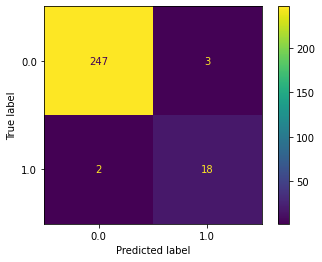

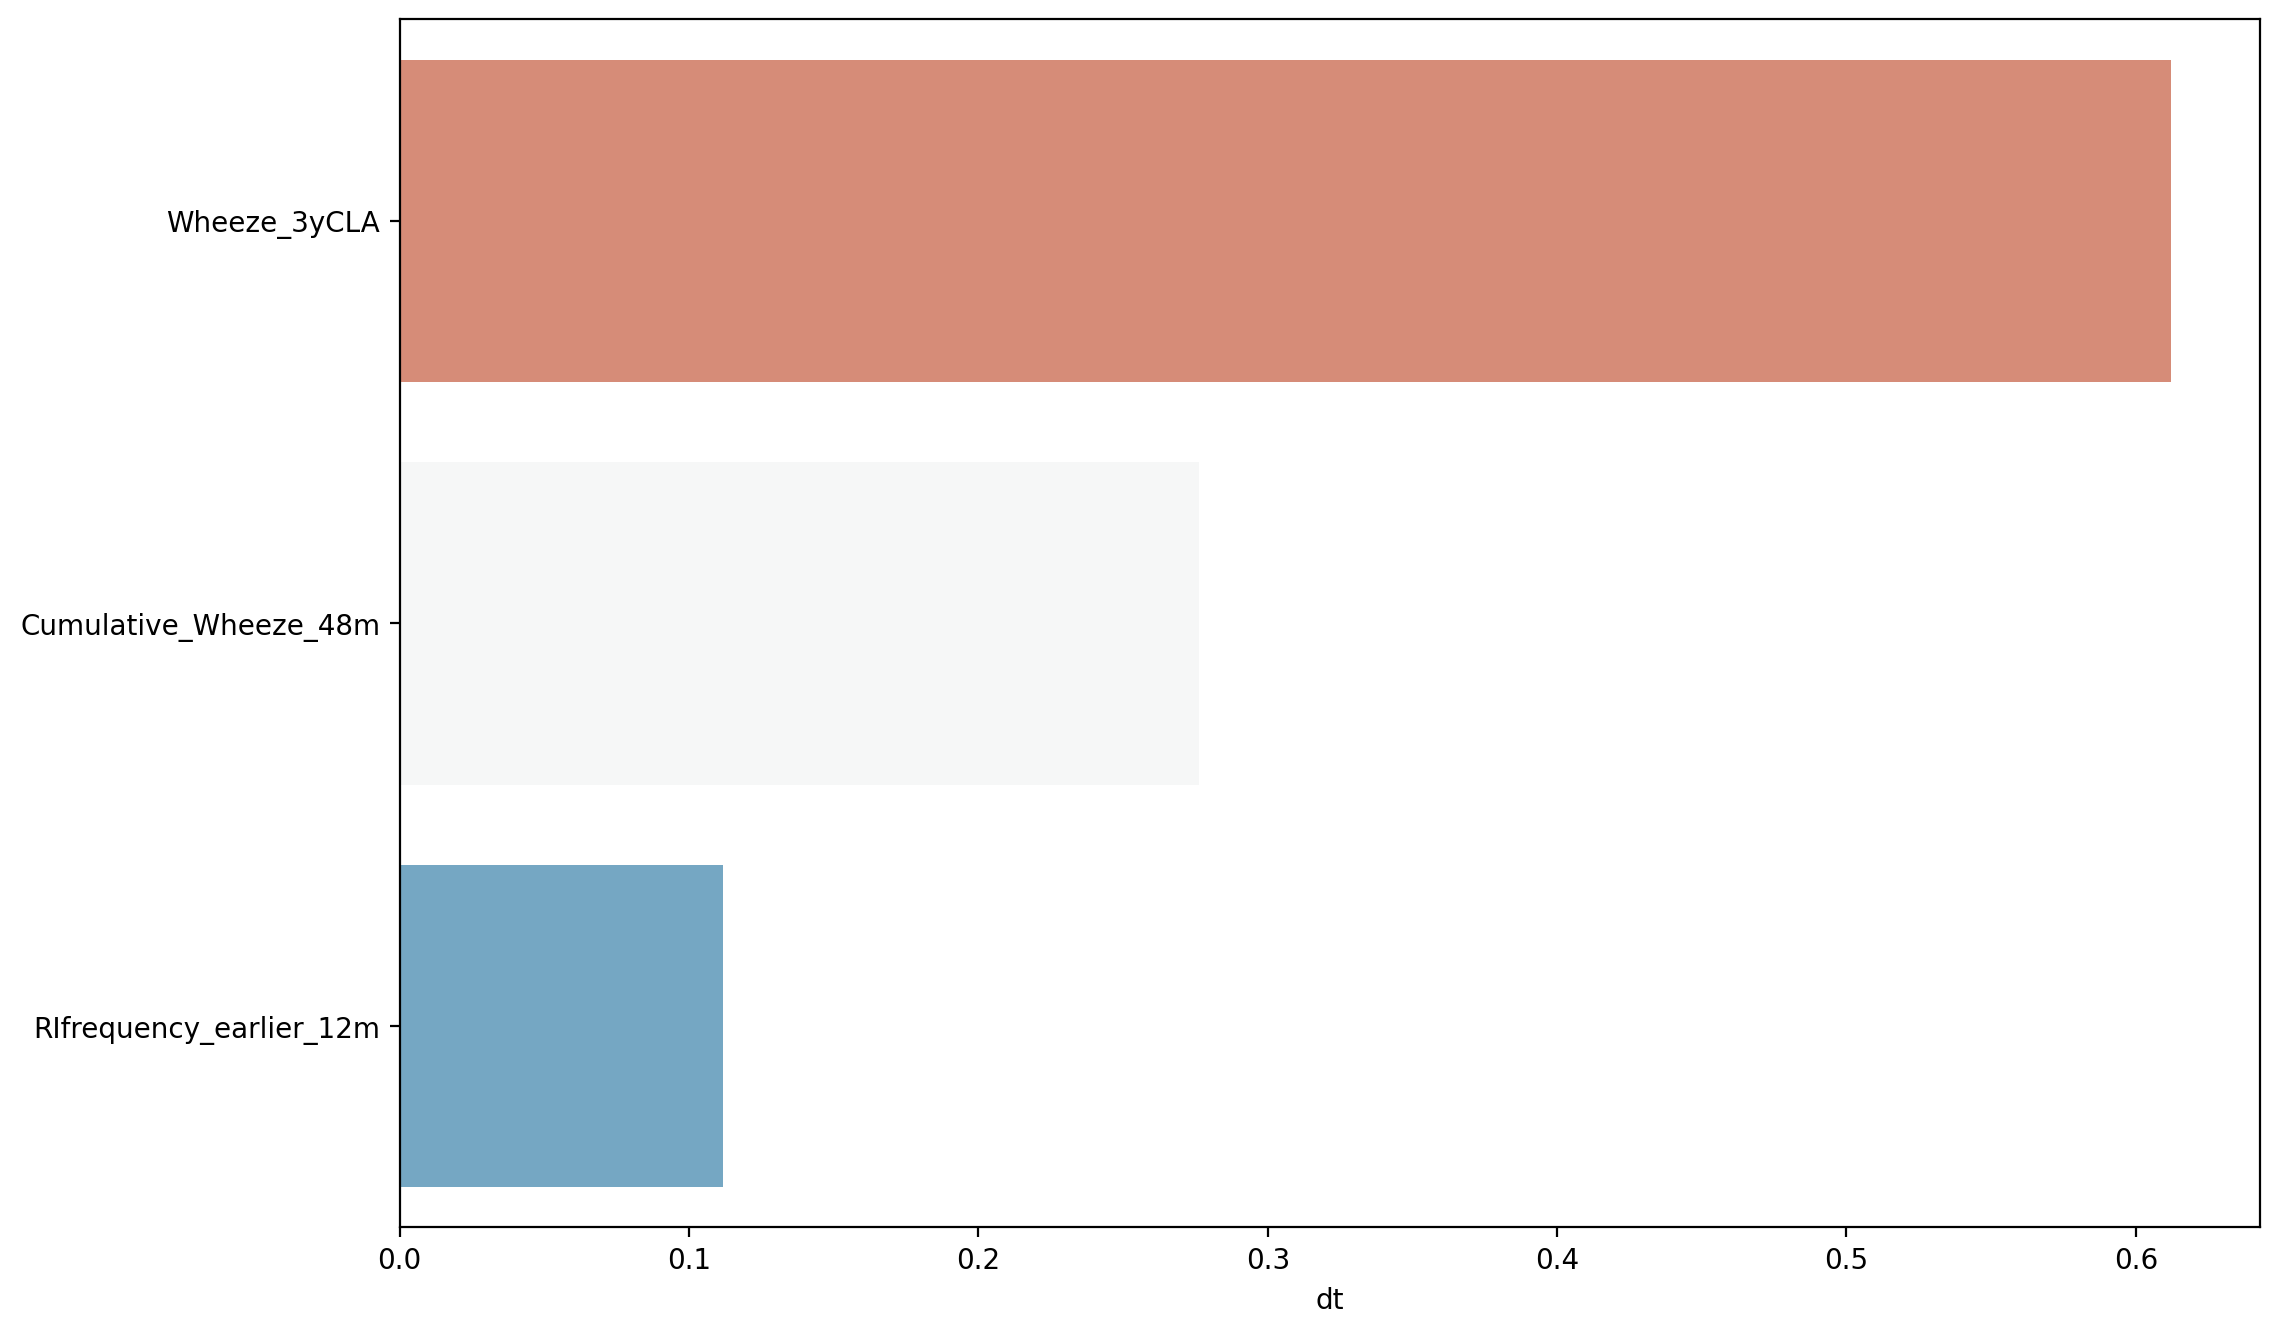

<IPython.core.display.Javascript object>

In [189]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,  # Previous is None
    class_weight="balanced",
    random_state=2021,
)

ml_dt_insp = {}
ml_dt_insp["dt"] = ml_autofs_multiplepoints(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    progression_time_dict,
    scalar=MinMaxScaler(),
    estimator=dt,
    estimator_name="dt",
    cv=StratifiedKFold(n_splits=3, random_state=3, shuffle=True),
    priori_k=25,
    precision_inspection_range=0.005,
    fixed_features=None,
    scoring="average_precision",
)

In [190]:
ml_dt_insp["dt"][0]
ml_dt_insp["dt"][1]["4_years_cohorts"]

feature_idx  \
4_years_cohorts  (5, 11, 17)   

                                                                    cv_scores  \
4_years_cohorts  [0.4286278714091204, 0.3649757808247732, 0.5395201660147659]   

                avg_score  \
4_years_cohorts  0.444375   

                                                                  feature_names  \
4_years_cohorts  (Cumulative_Wheeze_48m, Wheeze_3yCLA, RIfrequency_earlier_12m)   

                 ci_bound   std_dev   std_err clf  number_of_features  \
4_years_cohorts  0.162299  0.072122  0.050998  dt                   3   

                 feature_precision_rank  
4_years_cohorts                       1

({'y_true_holdout': 0      1.0
  1      1.0
  2      1.0
  3      1.0
  4      1.0
        ... 
  265    0.0
  266    0.0
  267    1.0
  268    1.0
  269    1.0
  Name: Asthma_Diagnosis_5yCLA, Length: 270, dtype: float64,
  'y_predicted_holdout': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
         0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0

<IPython.core.display.Javascript object>

at_birth  6_months    1_year   2_years   3_years   4_years
Features                                                                 
Gest_Days      1.000000  0.485567  0.520503  0.341191  0.247191  0.100352
Mother_Asthma  0.981125  0.711396  0.346804  0.217496  0.042474  0.041451
Wheeze_Father  0.712198  0.333333  0.308909       NaN       NaN       NaN
Father_Asthma  0.593370       NaN       NaN       NaN       NaN       NaN

4_years_cohorts
Features                                     
Wheeze_3yCLA                         1.000000
Time_of_AntibioticsUsage_12m         0.336187
Epi_Noncold_Wheeze_4y                0.304881
Child_Atopy_3y                       0.285304

<IPython.core.display.Javascript object>

In [64]:
feature_4y_final["Features"] = feature_4y_final["Features"].apply(
    lambda x: x.replace("_", " ")
)
feature_importance_with_4y = pd.concat(
    [previous_features_progression.iloc[:, :-1], feature_4y_final], ignore_index=True
)

<IPython.core.display.Javascript object>

In [65]:
feature_importance_with_4y_a = feature_importance_with_4y.pivot(
    index="Features", columns="Time Point", values="Feature Importance"
)[["At Birth", "6 Months", "1 Year", "2 Years", "3 Years", "4 Years"]]

<IPython.core.display.Javascript object>

In [70]:
feature_importance_with_4y_a.sort_values(
    by=list(feature_importance_with_4y_a.columns),
    axis=0,
    ascending=[False for i in range(len(feature_importance_with_4y_a.columns))],
)
feature_importance_without_direction = feature_importance_with_4y_a.applymap(
    lambda x: abs(x)
)

feature_importance_without_direction.sort_values(
    by=list(feature_importance_with_4y_a.columns),
    axis=0,
    ascending=[False for i in range(len(feature_importance_with_4y_a.columns))],
)

Time Point             At Birth  6 Months    1 Year   2 Years   3 Years  \
Features                                                                  
Gest Days              1.000000  0.485567  0.520503  0.341191  0.247191   
Mother Asthma          0.981125  0.711396  0.346804  0.217496  0.042474   
Wheeze Father          0.712198  0.333333  0.308909       NaN       NaN   
Father Asthma          0.593370       NaN       NaN       NaN       NaN   
Jaundice Birth         0.379577  0.333775  0.058528       NaN       NaN   
...                         ...       ...       ...       ...       ...   
Pulse Rate 3yCLA            NaN       NaN       NaN       NaN  0.054975   
Noncold Wheeze 2hy          NaN       NaN       NaN       NaN  0.026159   
Epi Noncold Wheeze 4y       NaN       NaN       NaN       NaN       NaN   
Cumulative Wheeze 48m       NaN       NaN       NaN       NaN       NaN   
Wheeze 4y                   NaN       NaN       NaN       NaN       NaN   

Time Point              4 Years  
Features                         
Gest Days             -0.100352  
Mother Asthma          0.041451  
Wheeze Father               NaN  
Father Asthma               NaN  
Jaundice Birth              NaN  
...                         ...  
Pulse Rate 3yCLA       0.106195  
Noncold Wheeze 2hy     0.032744  
Epi Noncold Wheeze 4y  0.304881  
Cumulative Wheeze 48m  0.250262  
Wheeze 4y              0.224831  

[70 rows x 6 columns]

Time Point             At Birth  6 Months    1 Year   2 Years   3 Years  \
Features                                                                  
Gest Days              1.000000  0.485567  0.520503  0.341191  0.247191   
Mother Asthma          0.981125  0.711396  0.346804  0.217496  0.042474   
Wheeze Father          0.712198  0.333333  0.308909       NaN       NaN   
Father Asthma          0.593370       NaN       NaN       NaN       NaN   
Jaundice Birth         0.379577  0.333775  0.058528       NaN       NaN   
...                         ...       ...       ...       ...       ...   
Pulse Rate 3yCLA            NaN       NaN       NaN       NaN  0.054975   
Noncold Wheeze 2hy          NaN       NaN       NaN       NaN  0.026159   
Epi Noncold Wheeze 4y       NaN       NaN       NaN       NaN       NaN   
Cumulative Wheeze 48m       NaN       NaN       NaN       NaN       NaN   
Wheeze 4y                   NaN       NaN       NaN       NaN       NaN   

Time Point              4 Years  
Features                         
Gest Days              0.100352  
Mother Asthma          0.041451  
Wheeze Father               NaN  
Father Asthma               NaN  
Jaundice Birth              NaN  
...                         ...  
Pulse Rate 3yCLA       0.106195  
Noncold Wheeze 2hy     0.032744  
Epi Noncold Wheeze 4y  0.304881  
Cumulative Wheeze 48m  0.250262  
Wheeze 4y              0.224831  

[70 rows x 6 columns]

<IPython.core.display.Javascript object>

In [75]:
feature_importance_without_direction.columns.name = ""

<IPython.core.display.Javascript object>

In [74]:
feature_importance_without_direction.index = [
    i.replace(" ", "_") for i in feature_importance_without_direction.index
]

<IPython.core.display.Javascript object>

In [76]:
feature_importance_without_direction.columns = [
    i.lower().replace(" ", "_") for i in feature_importance_without_direction.columns
]

<IPython.core.display.Javascript object>

In [73]:
ml_final_features_selected_screened[:5]
feature_importance_without_direction[:5]

4_years_cohorts
Features                                     
Wheeze_3yCLA                         1.000000
Time_of_AntibioticsUsage_12m         0.336187
Epi_Noncold_Wheeze_4y                0.304881
Child_Atopy_3y                       0.285304
Cumulative_Wheeze_48m                0.250262

Time Point              At Birth  6 Months    1 Year   2 Years   3 Years  \
Features                                                                   
Anesthetic delivery     0.235333       NaN       NaN       NaN       NaN   
Antibiotics Usage 12m        NaN       NaN  0.212061  0.246436  0.094926   
BF 1m                        NaN  0.156317       NaN       NaN       NaN   
BF Status 3m Partial         NaN  0.108181       NaN       NaN       NaN   
BF Status 6m Exclusive       NaN  0.169448       NaN       NaN       NaN   

Time Point               4 Years  
Features                          
Anesthetic delivery          NaN  
Antibiotics Usage 12m   0.032887  
BF 1m                        NaN  
BF Status 3m Partial         NaN  
BF Status 6m Exclusive       NaN

<IPython.core.display.Javascript object>

In [78]:
feature_importance_without_direction = feature_importance_without_direction.sort_values(
    by=list(feature_importance_without_direction.columns),
    axis=0,
    ascending=[False for i in range(len(feature_importance_without_direction.columns))],
)

<IPython.core.display.Javascript object>

In [79]:
feature_importance_without_direction

at_birth  6_months    1_year   2_years   3_years  \
Gest_Days              1.000000  0.485567  0.520503  0.341191  0.247191   
Mother_Asthma          0.981125  0.711396  0.346804  0.217496  0.042474   
Wheeze_Father          0.712198  0.333333  0.308909       NaN       NaN   
Father_Asthma          0.593370       NaN       NaN       NaN       NaN   
Jaundice_Birth         0.379577  0.333775  0.058528       NaN       NaN   
...                         ...       ...       ...       ...       ...   
Pulse_Rate_3yCLA            NaN       NaN       NaN       NaN  0.054975   
Noncold_Wheeze_2hy          NaN       NaN       NaN       NaN  0.026159   
Epi_Noncold_Wheeze_4y       NaN       NaN       NaN       NaN       NaN   
Cumulative_Wheeze_48m       NaN       NaN       NaN       NaN       NaN   
Wheeze_4y                   NaN       NaN       NaN       NaN       NaN   

                        4_years  
Gest_Days              0.100352  
Mother_Asthma          0.041451  
Wheeze_Father               NaN  
Father_Asthma               NaN  
Jaundice_Birth              NaN  
...                         ...  
Pulse_Rate_3yCLA       0.106195  
Noncold_Wheeze_2hy     0.032744  
Epi_Noncold_Wheeze_4y  0.304881  
Cumulative_Wheeze_48m  0.250262  
Wheeze_4y              0.224831  

[70 rows x 6 columns]

<IPython.core.display.Javascript object>

In [10]:
feature_importance_without_direction

NameError: name 'feature_importance_without_direction' is not defined

<IPython.core.display.Javascript object>

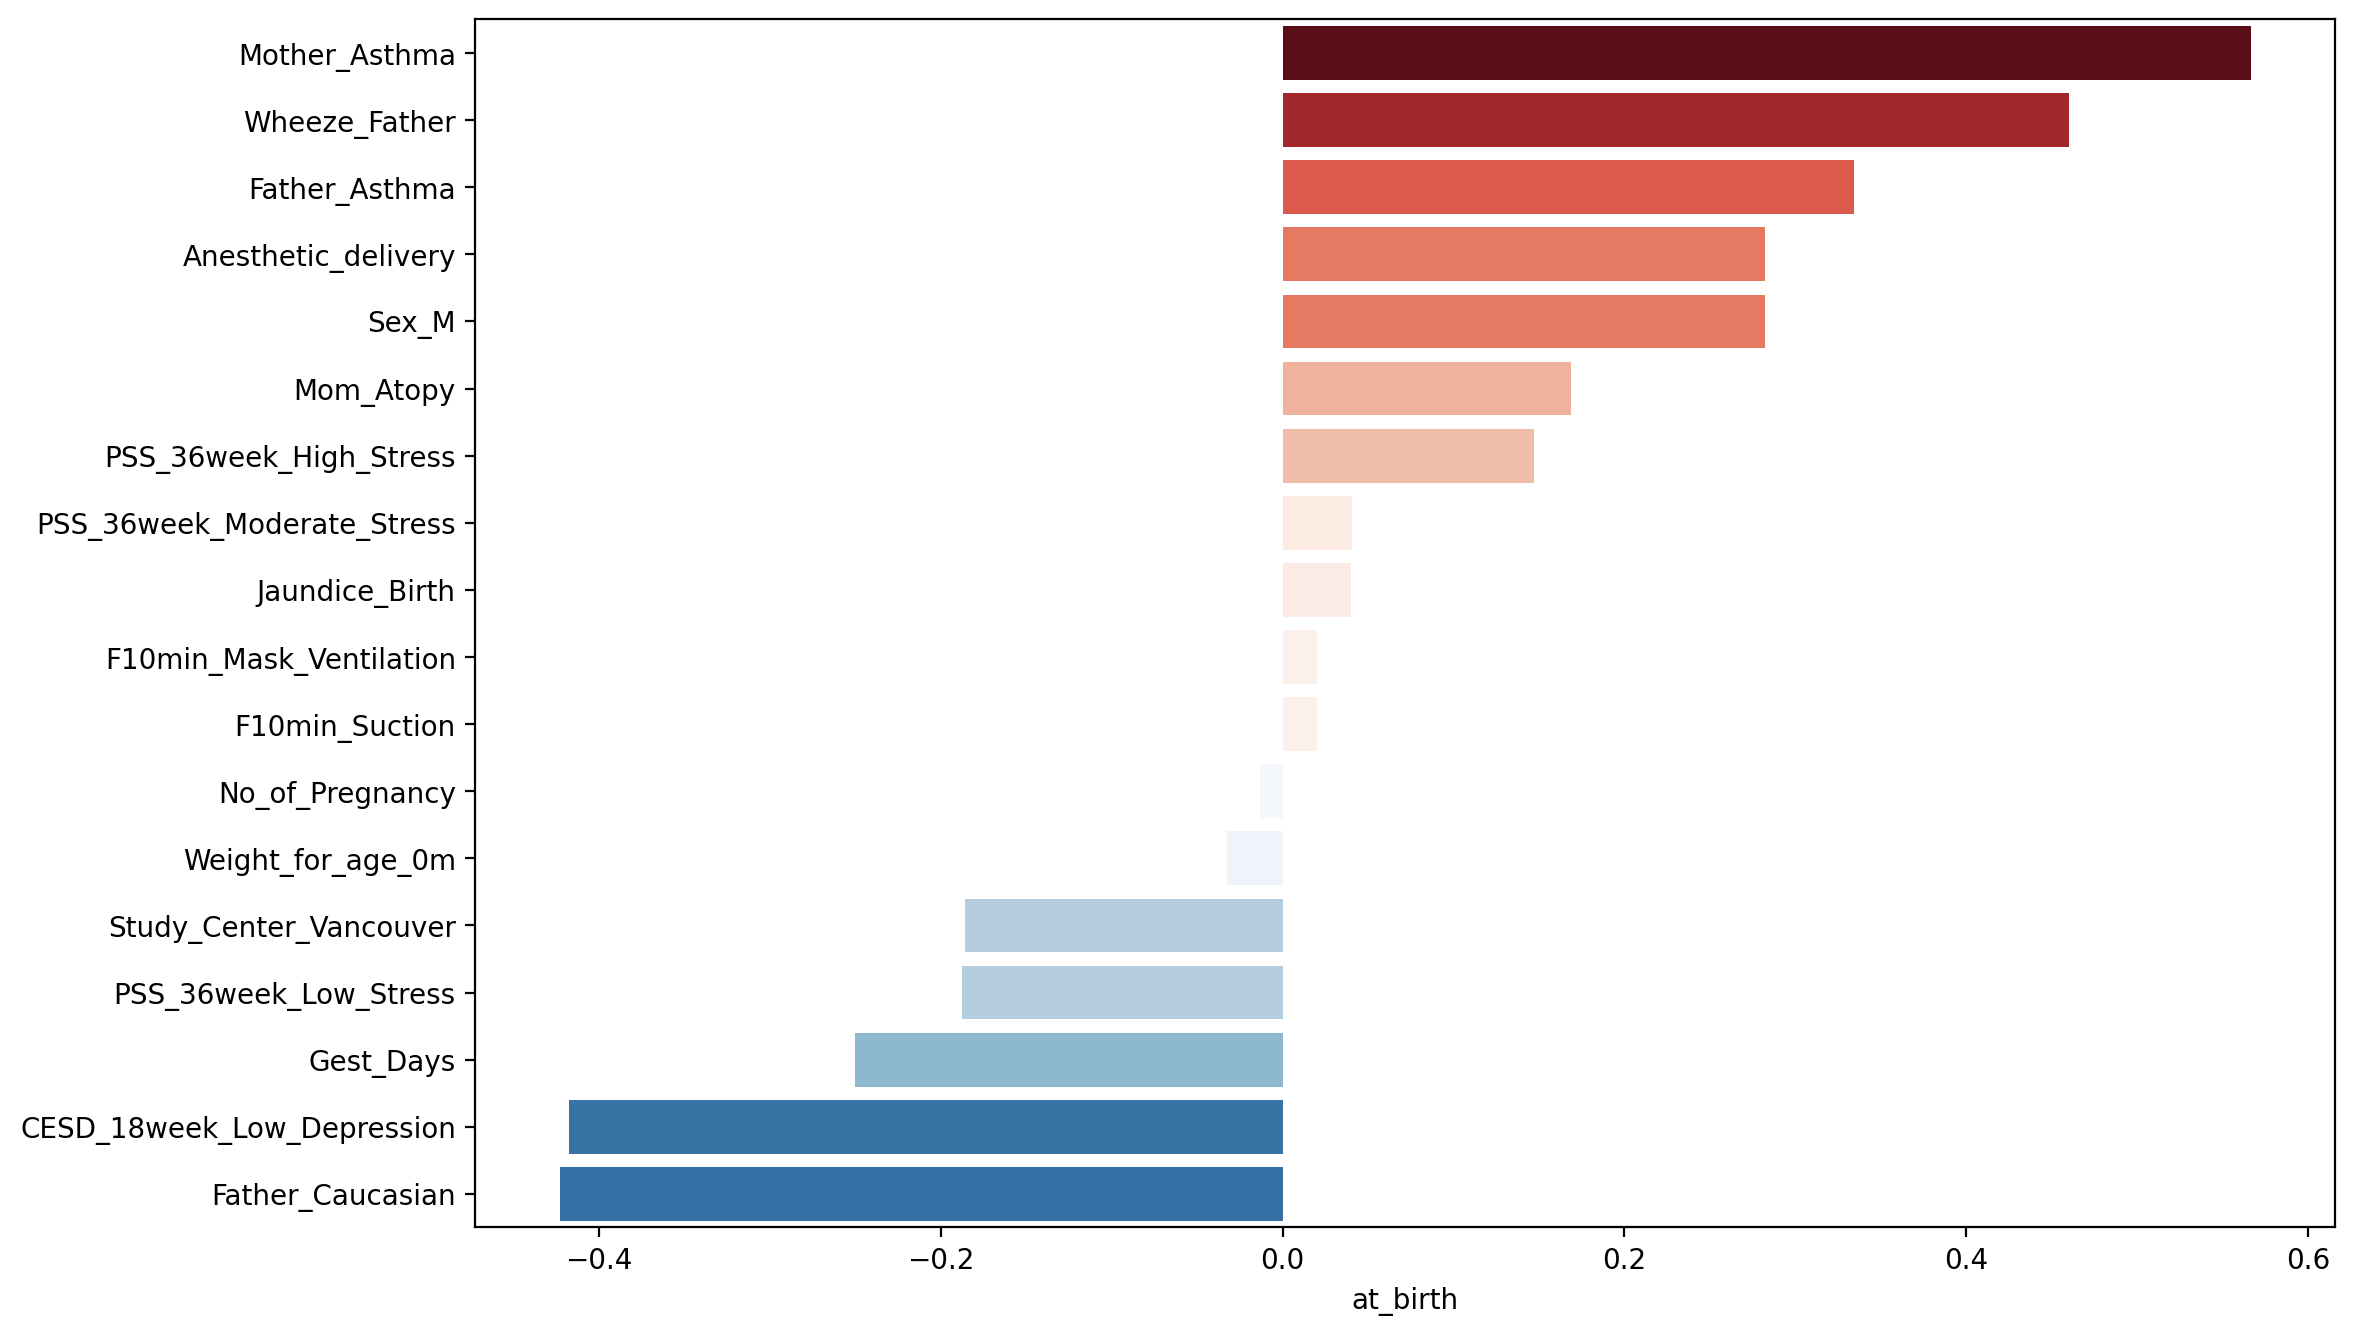

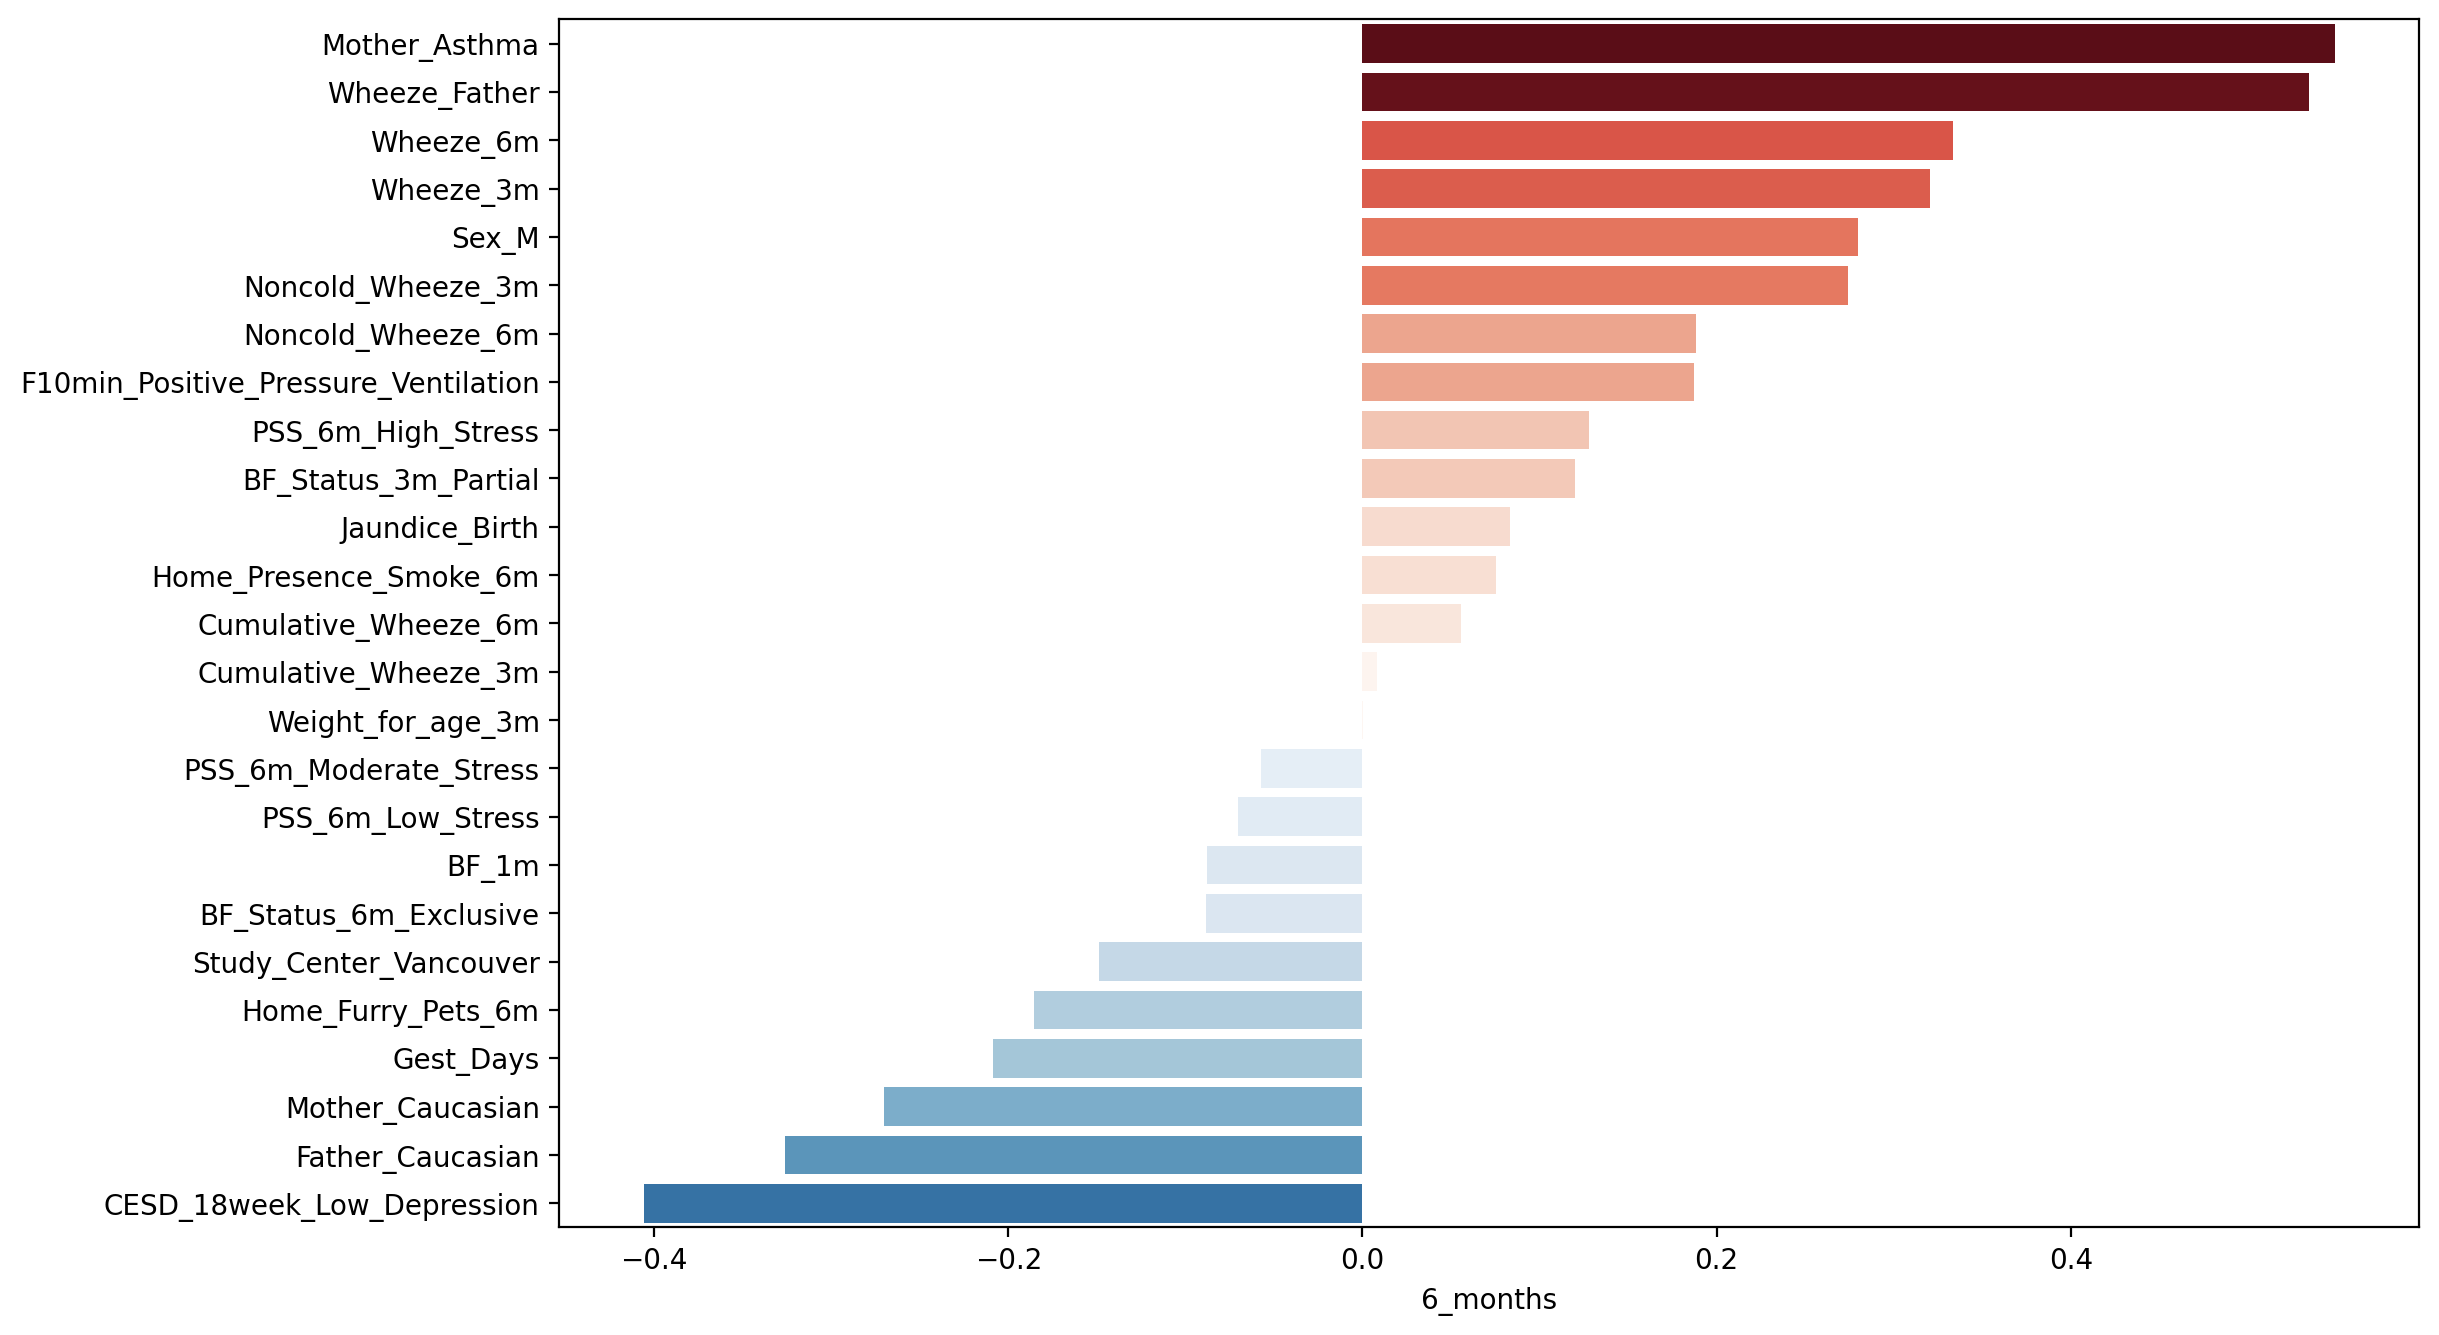

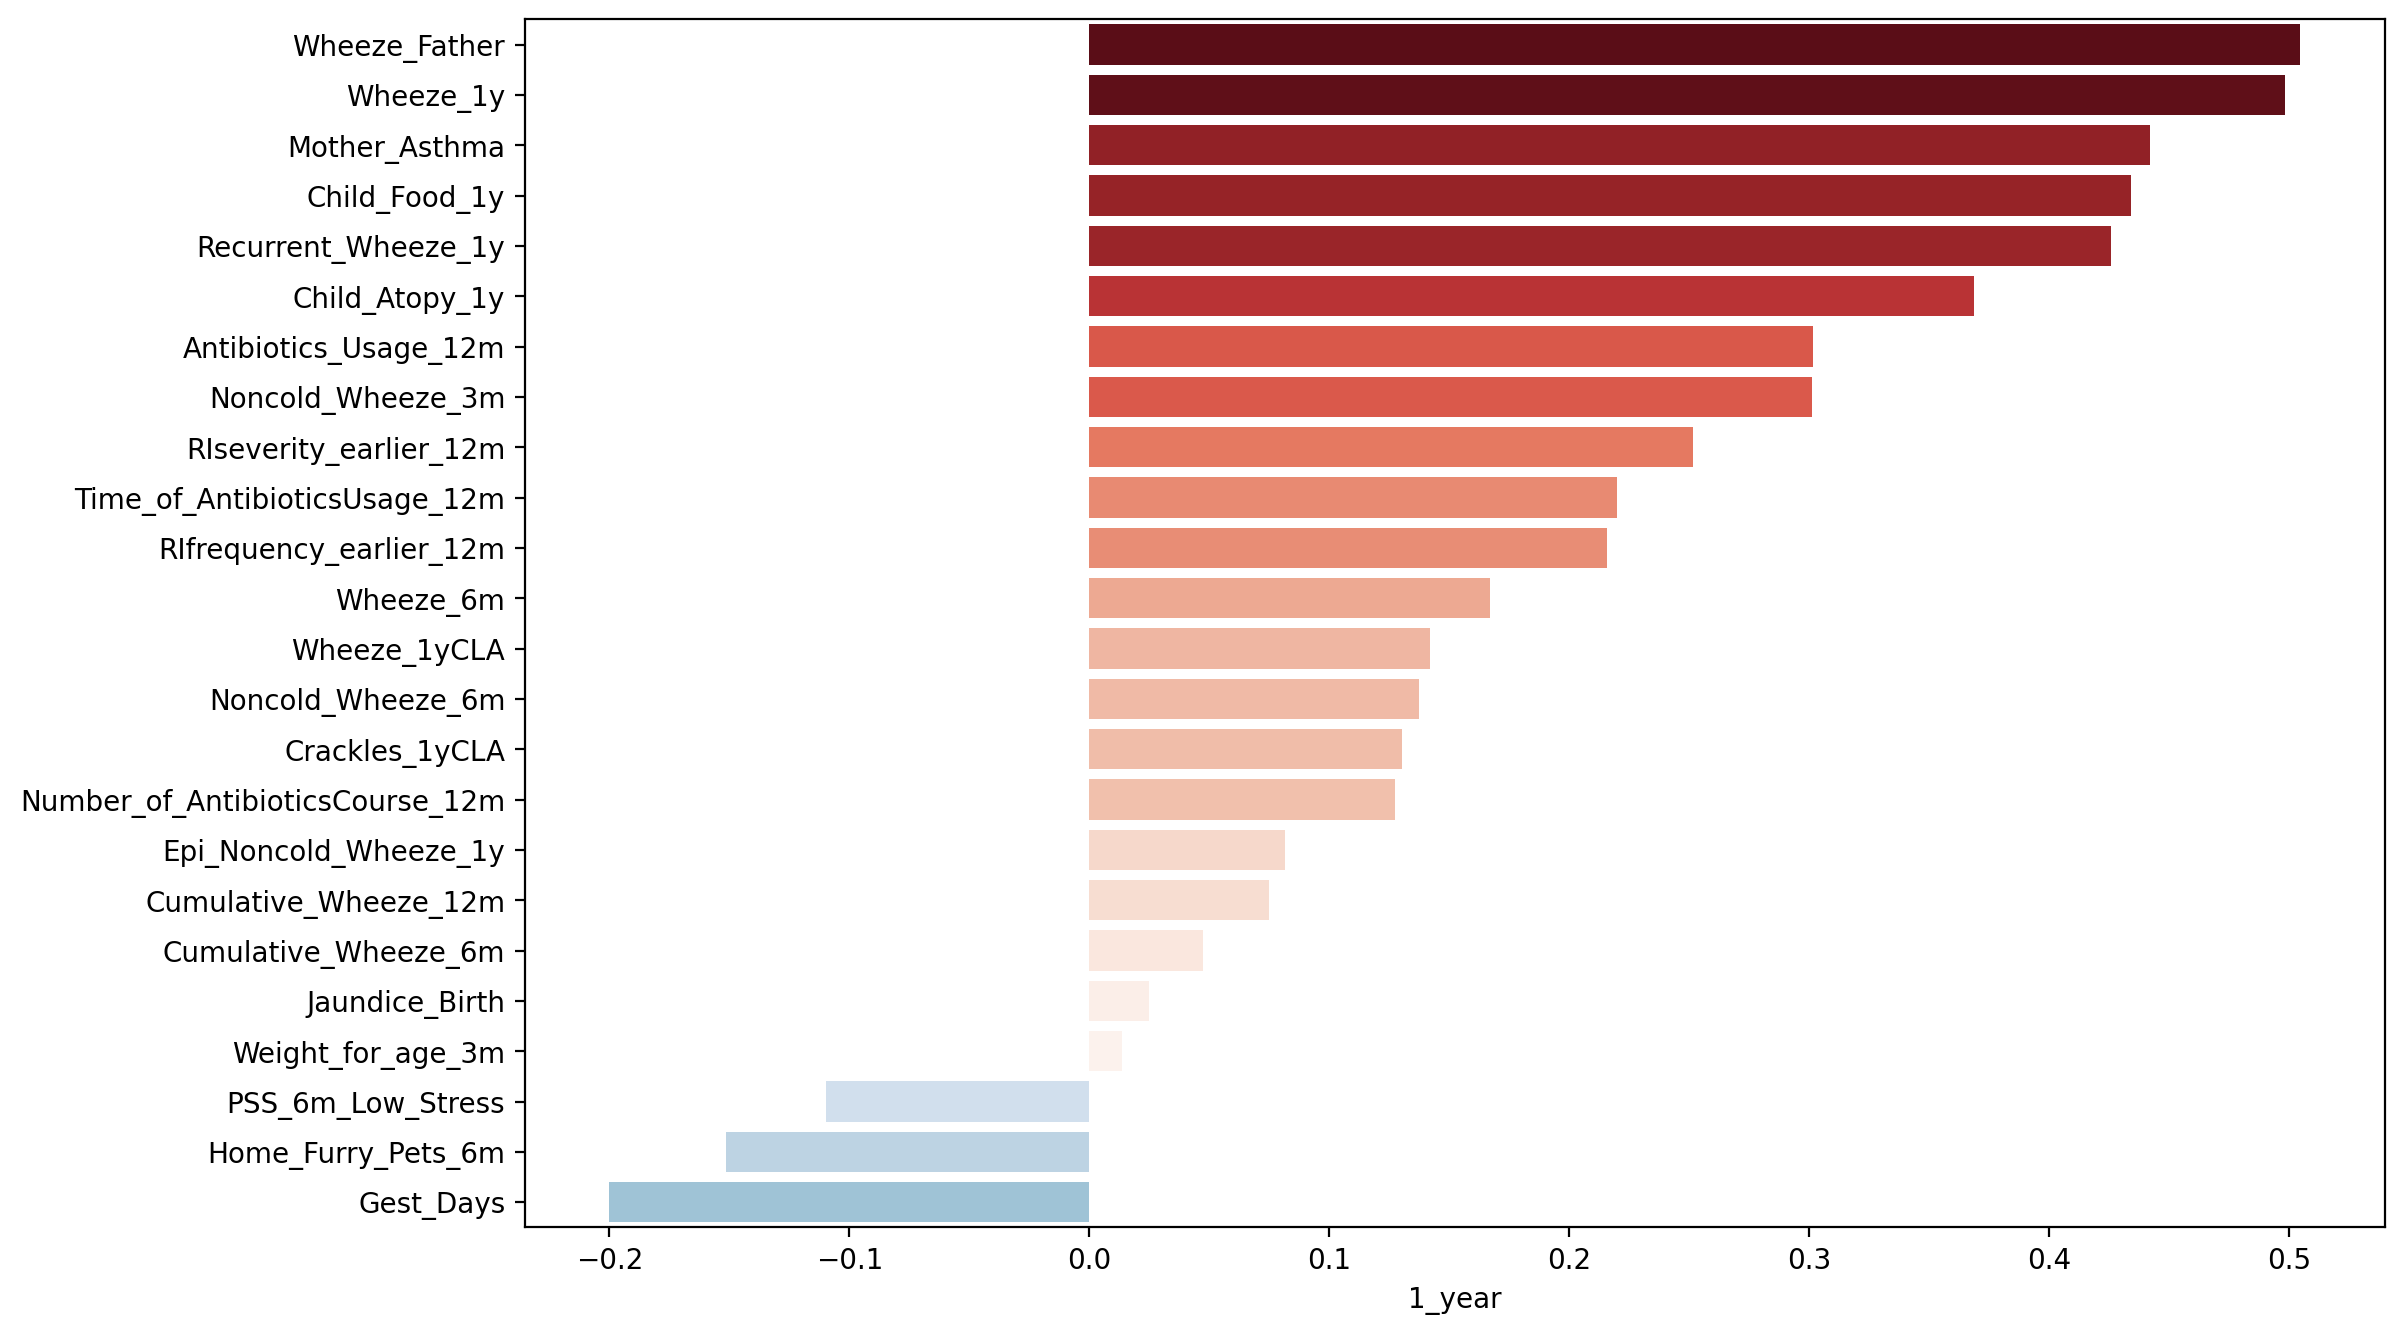

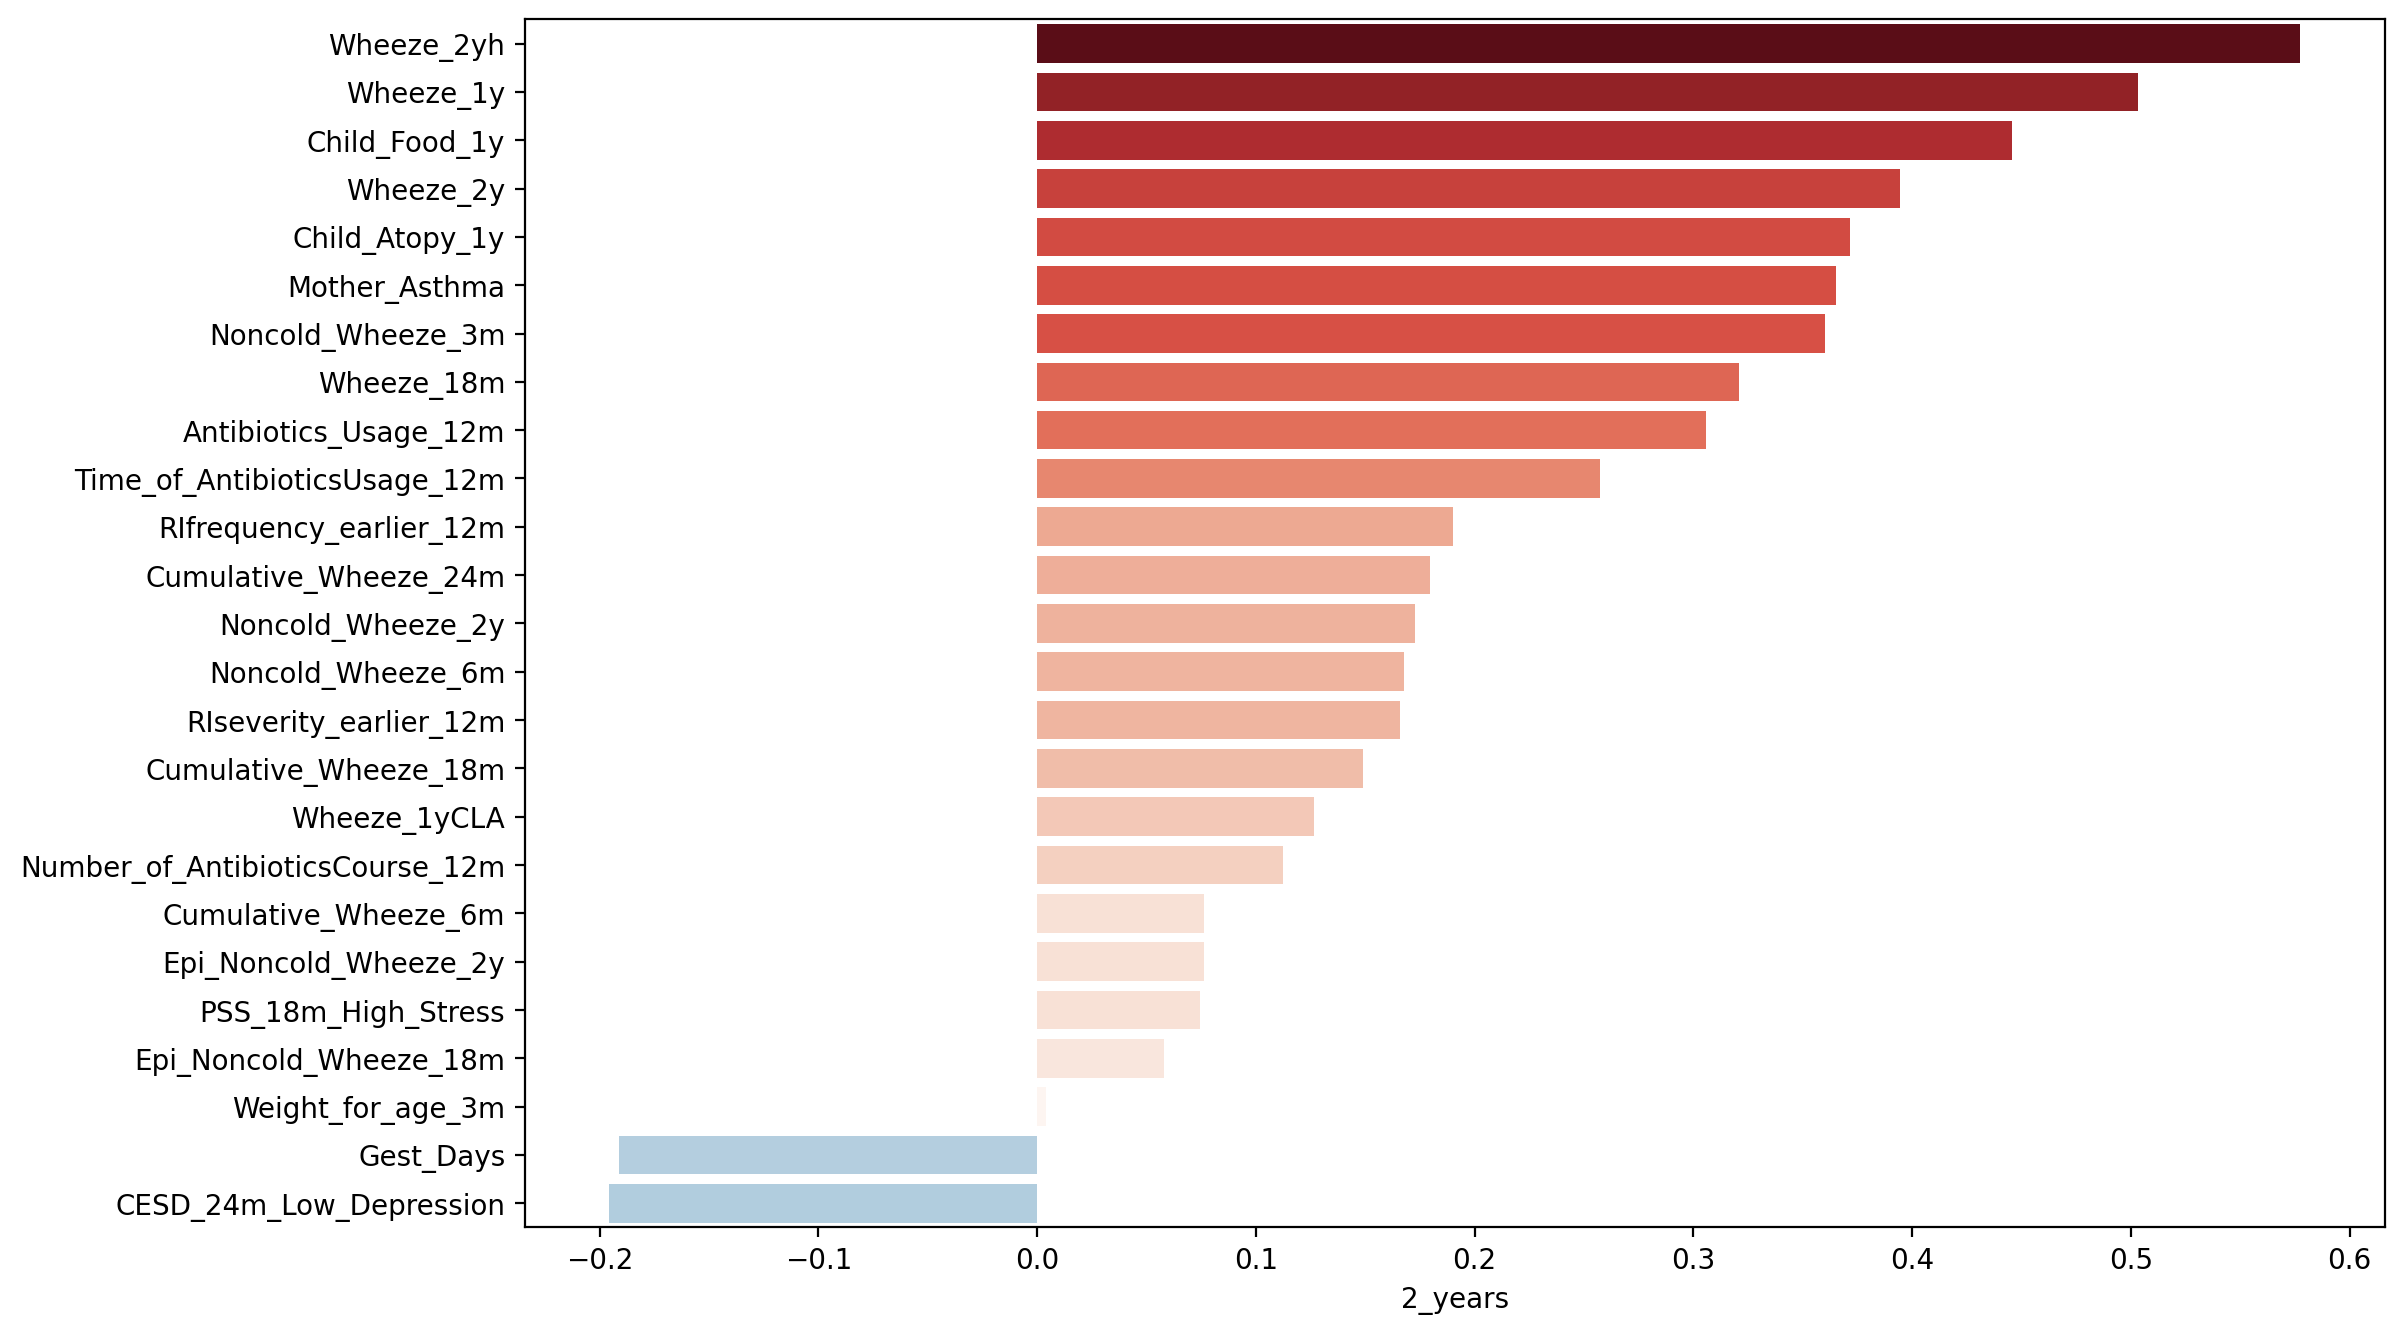

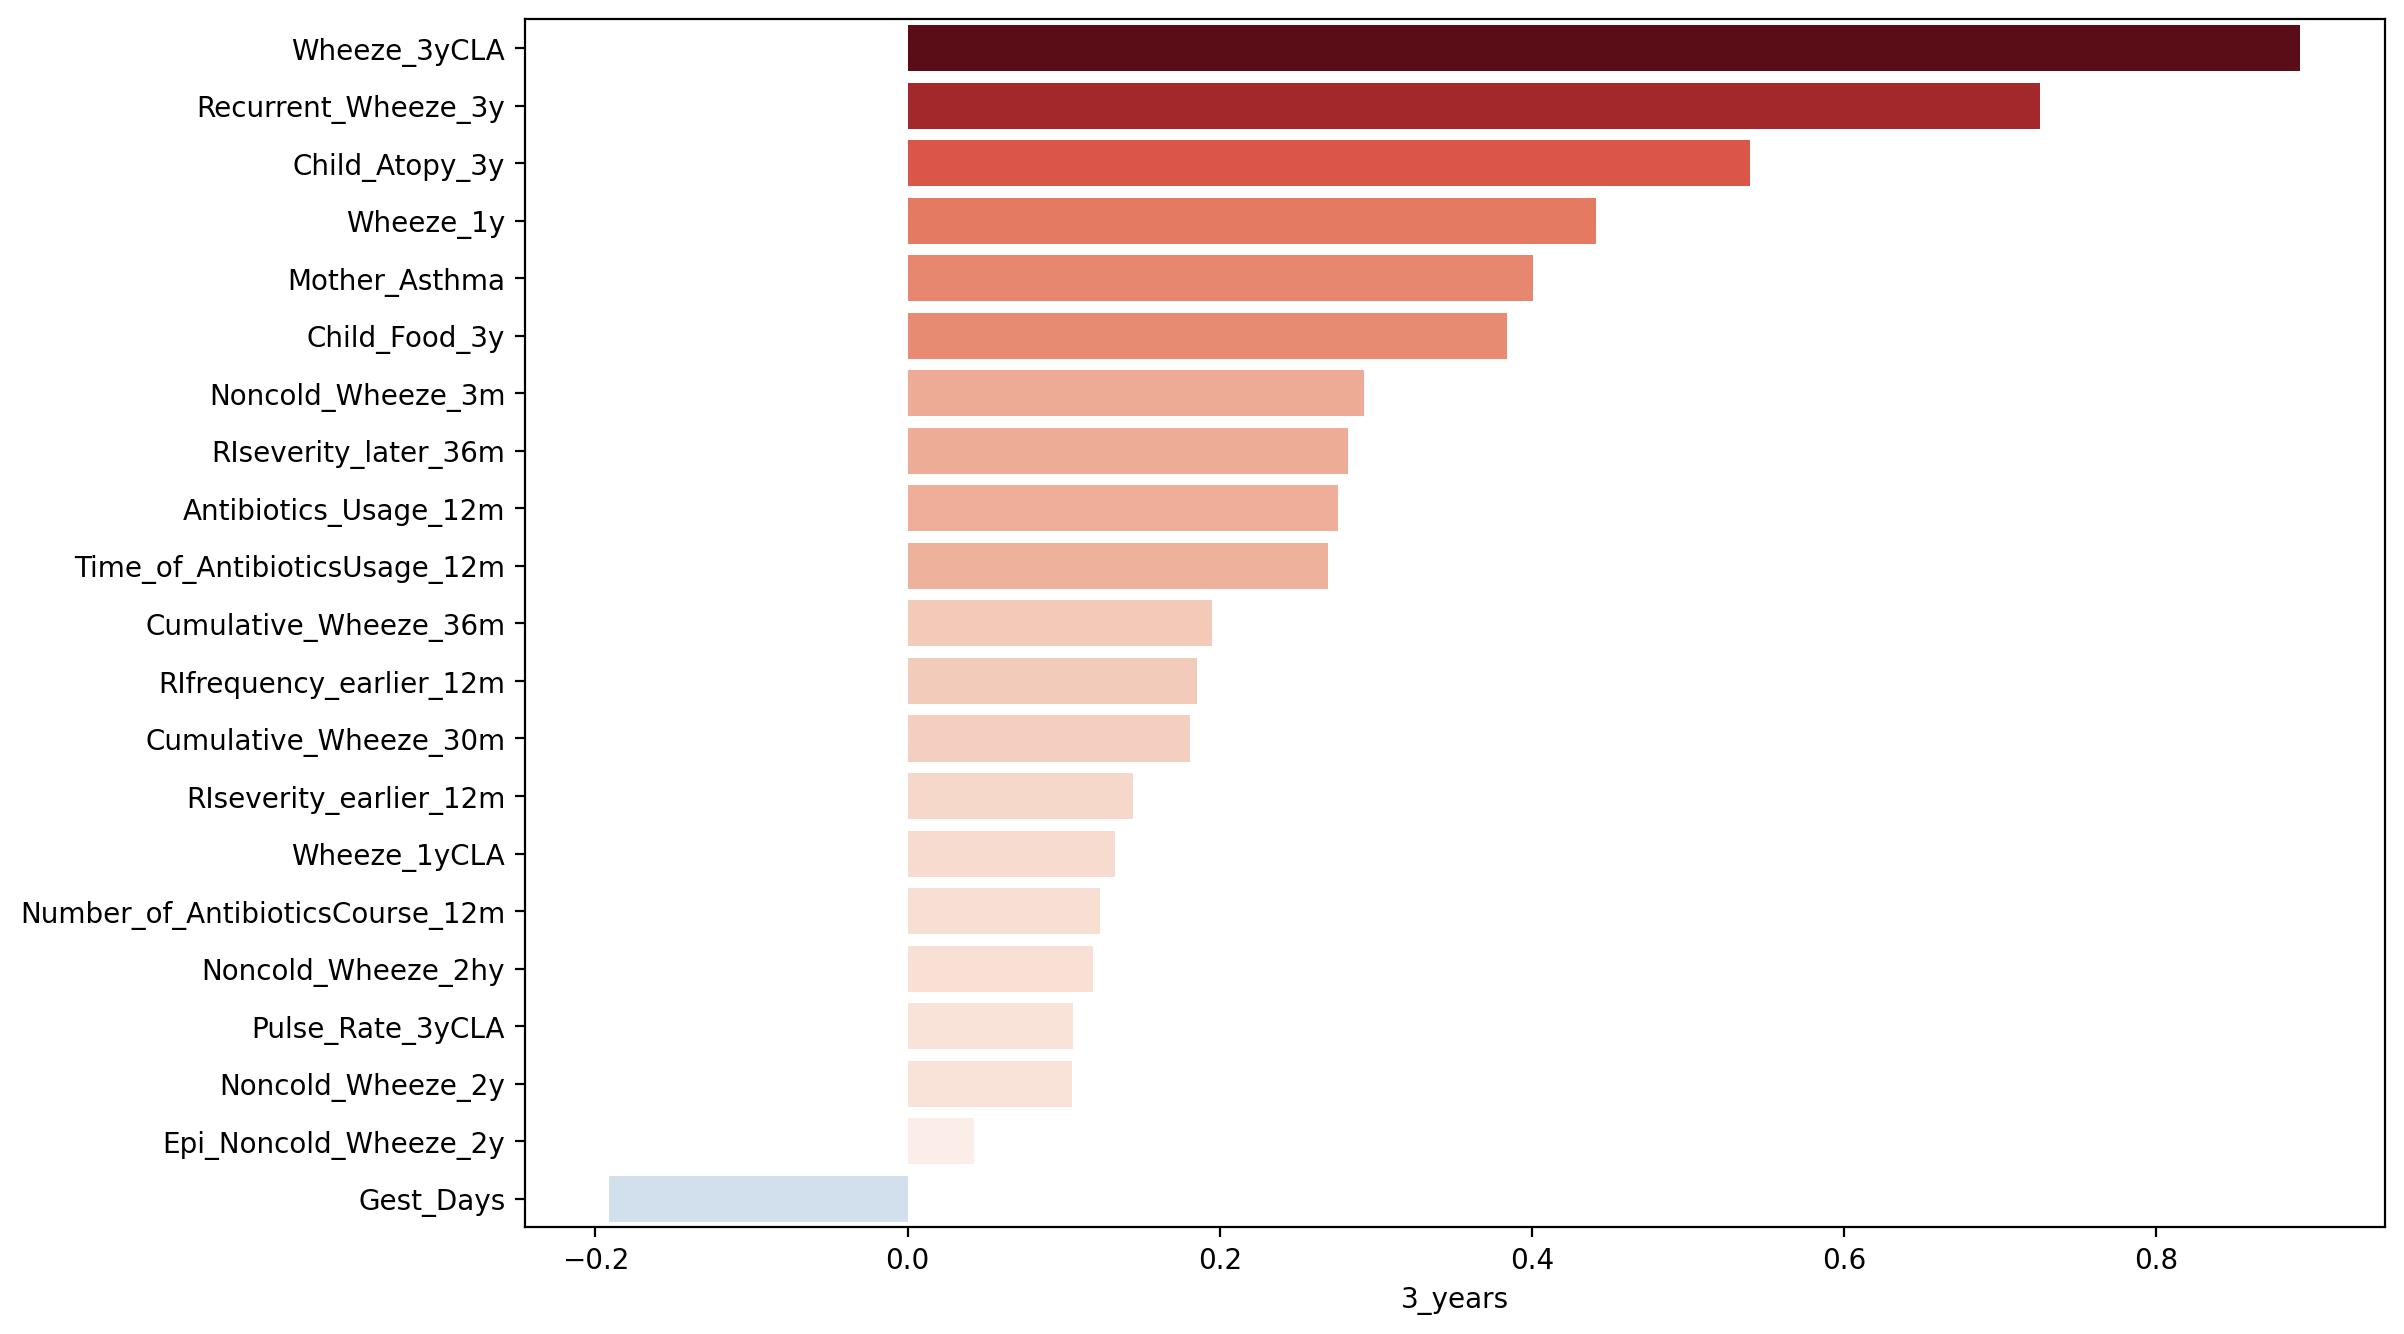

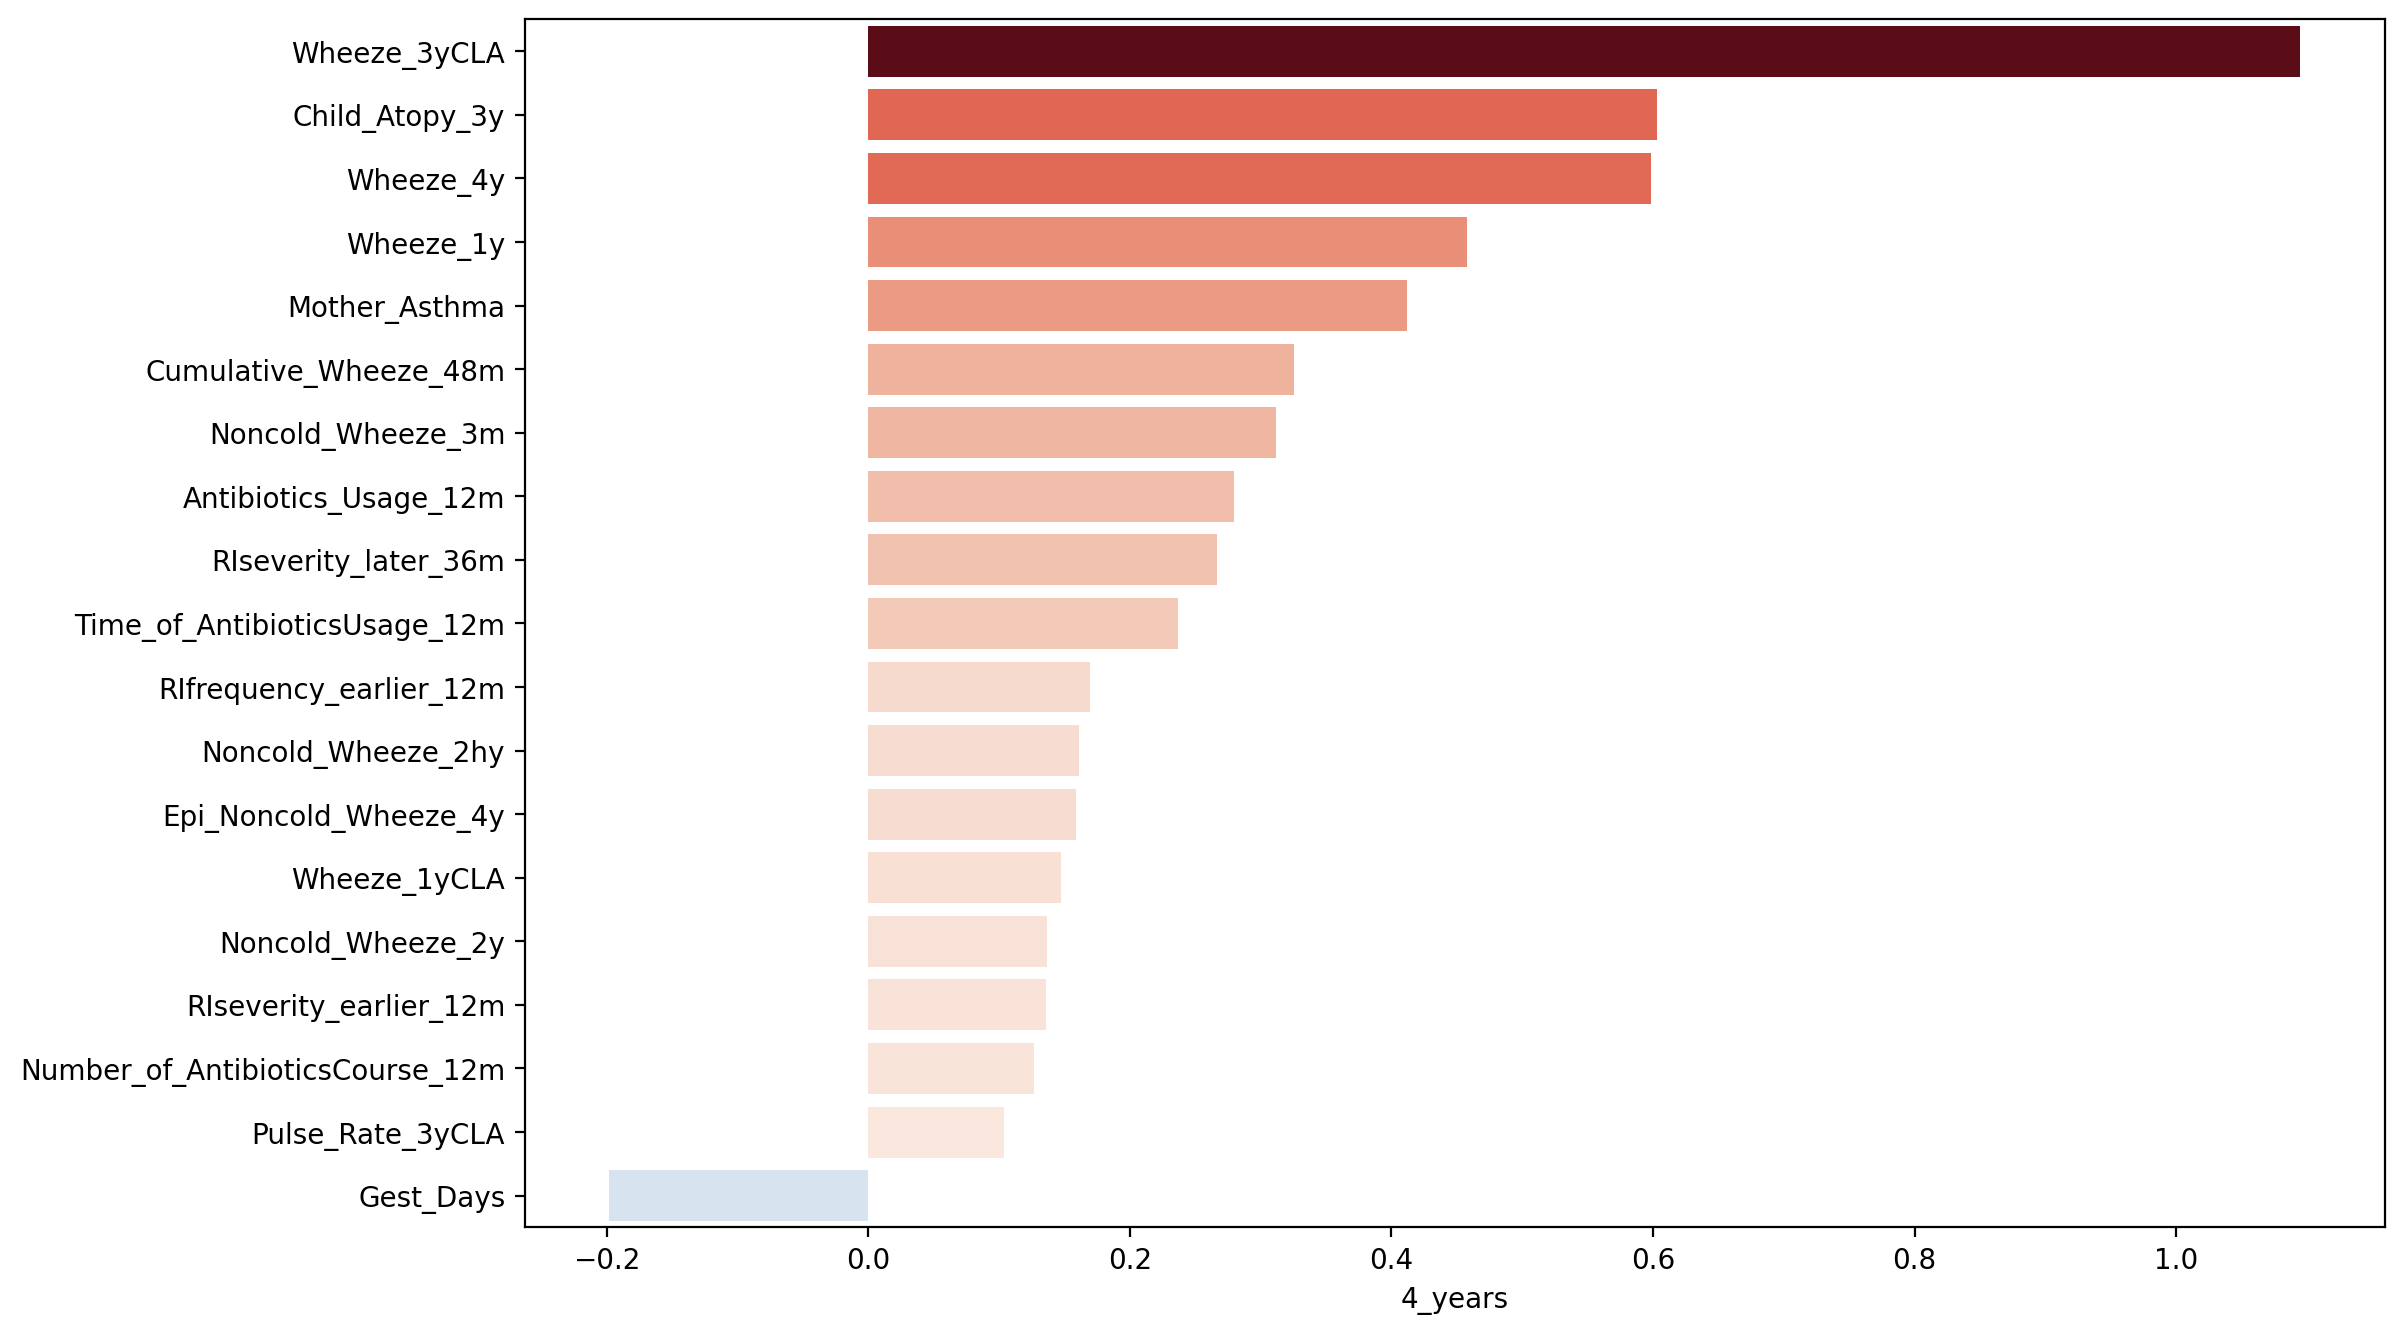

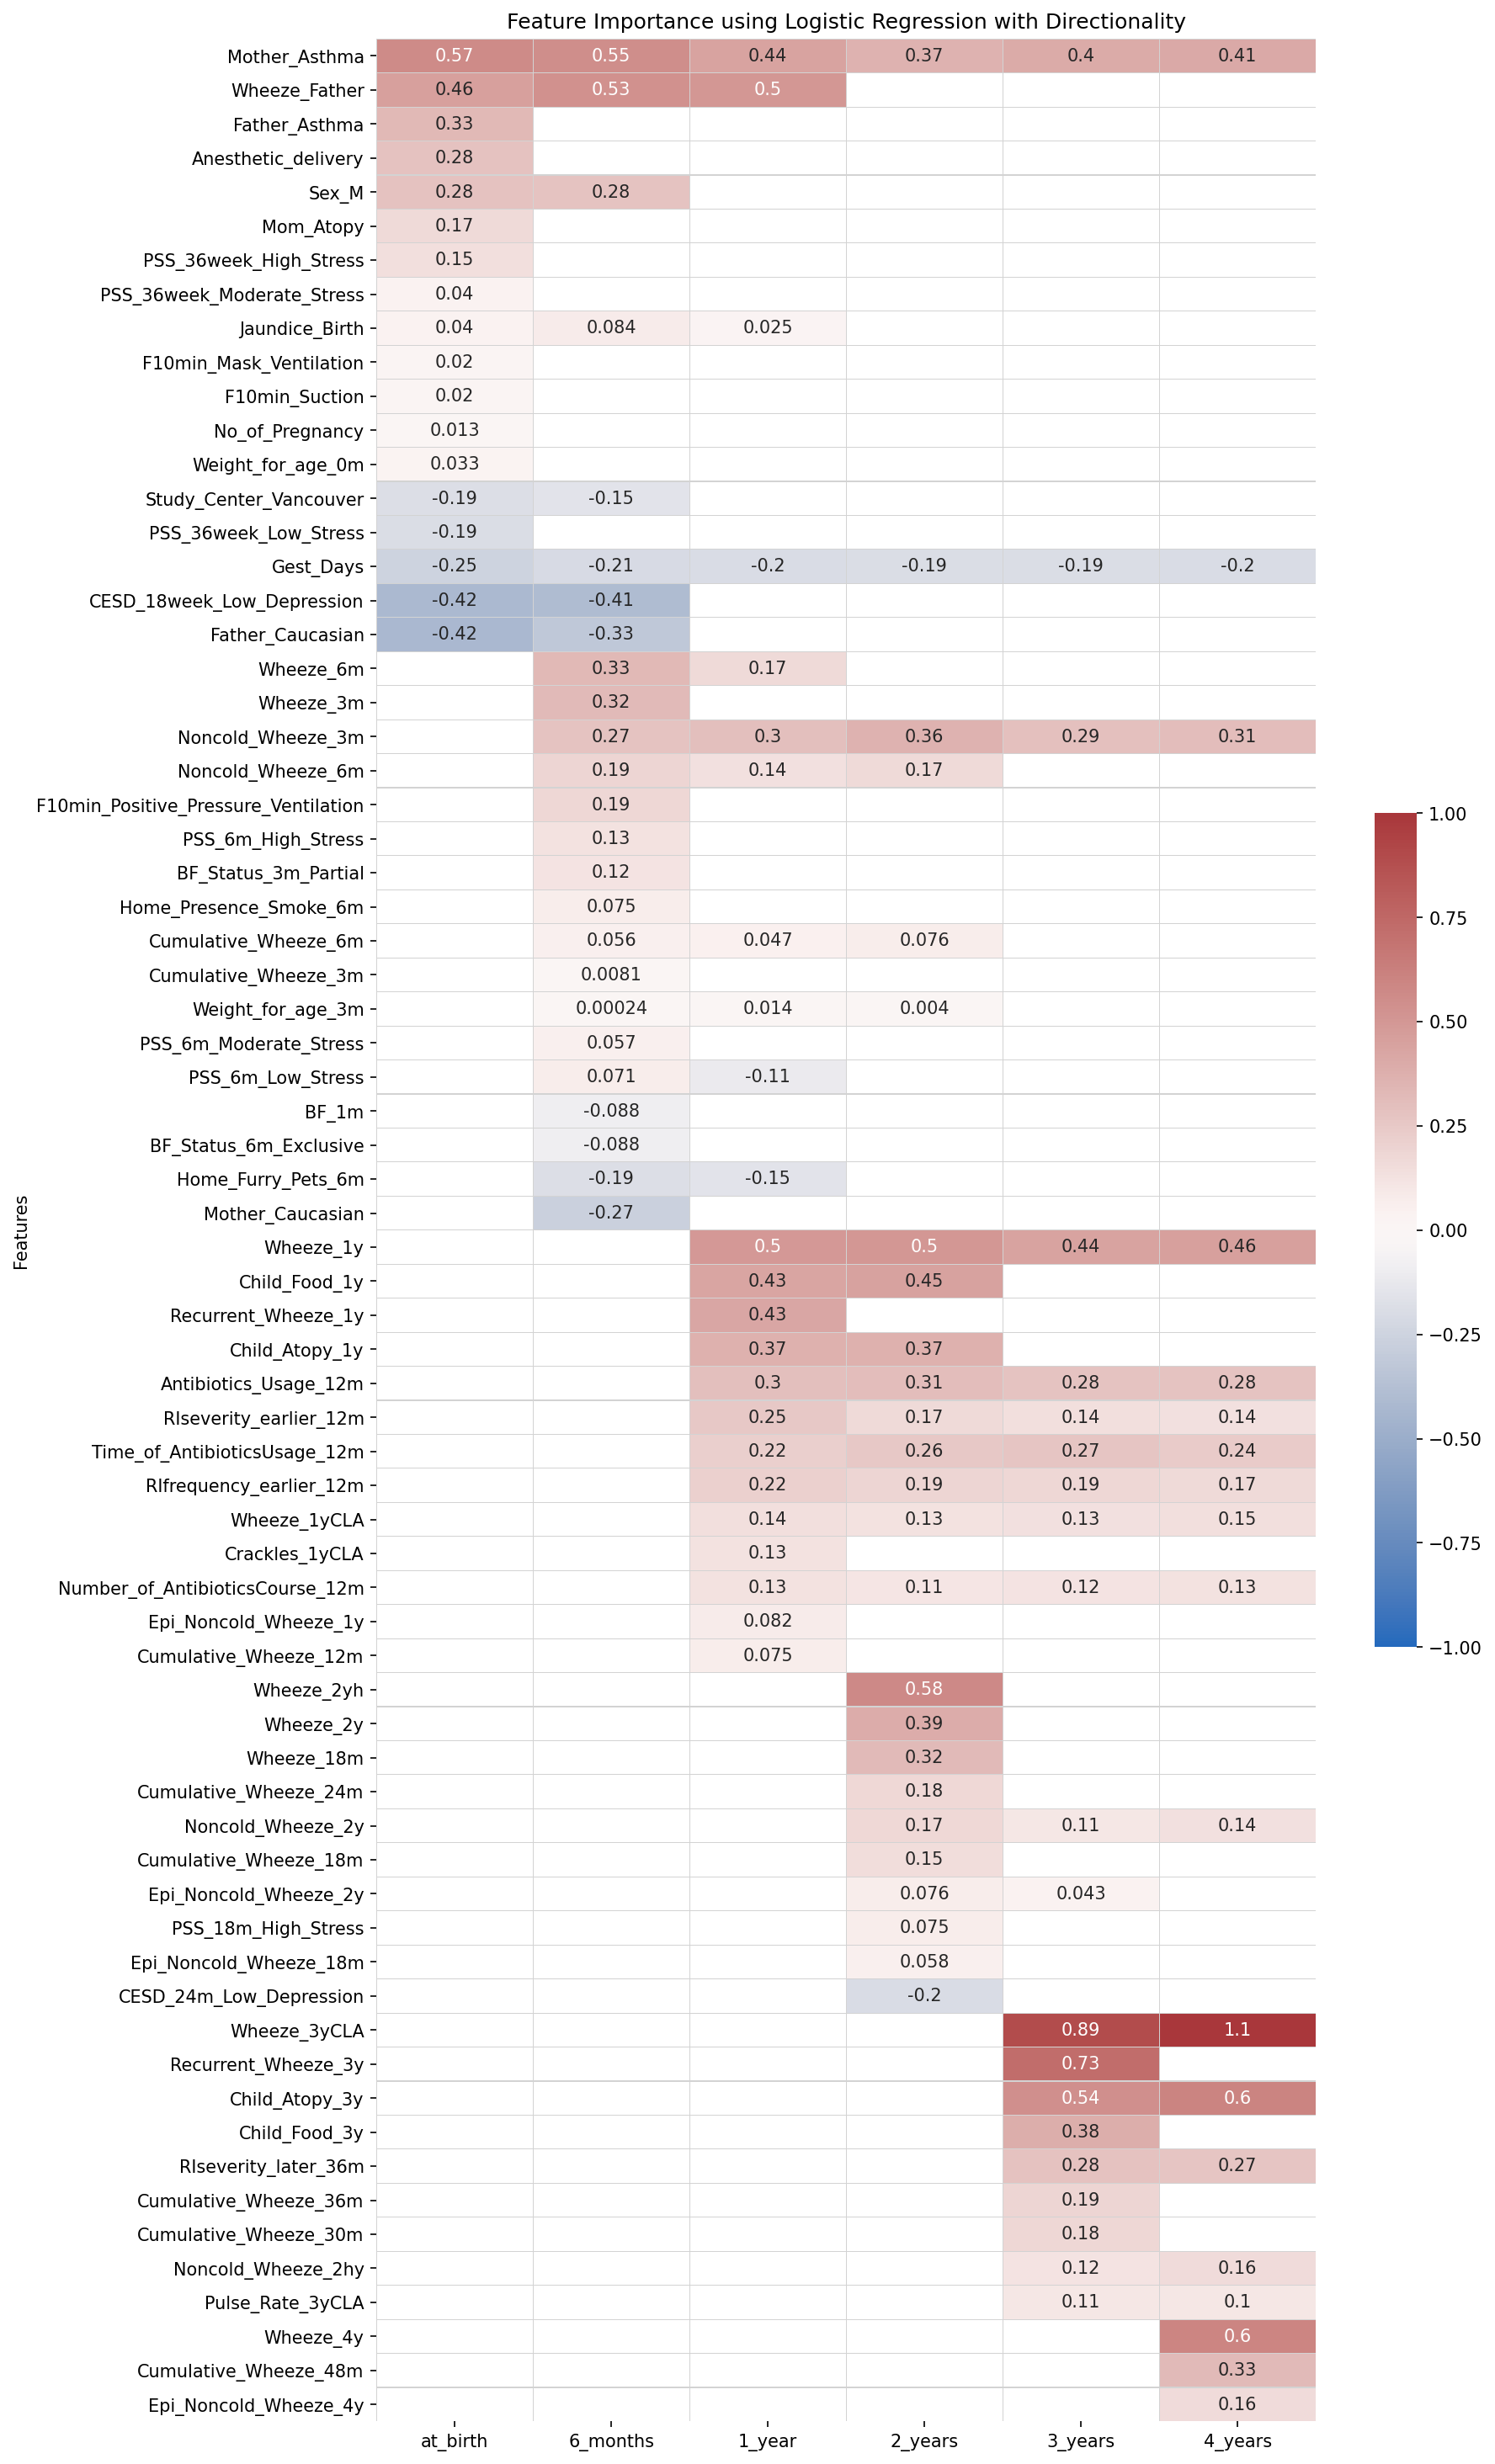

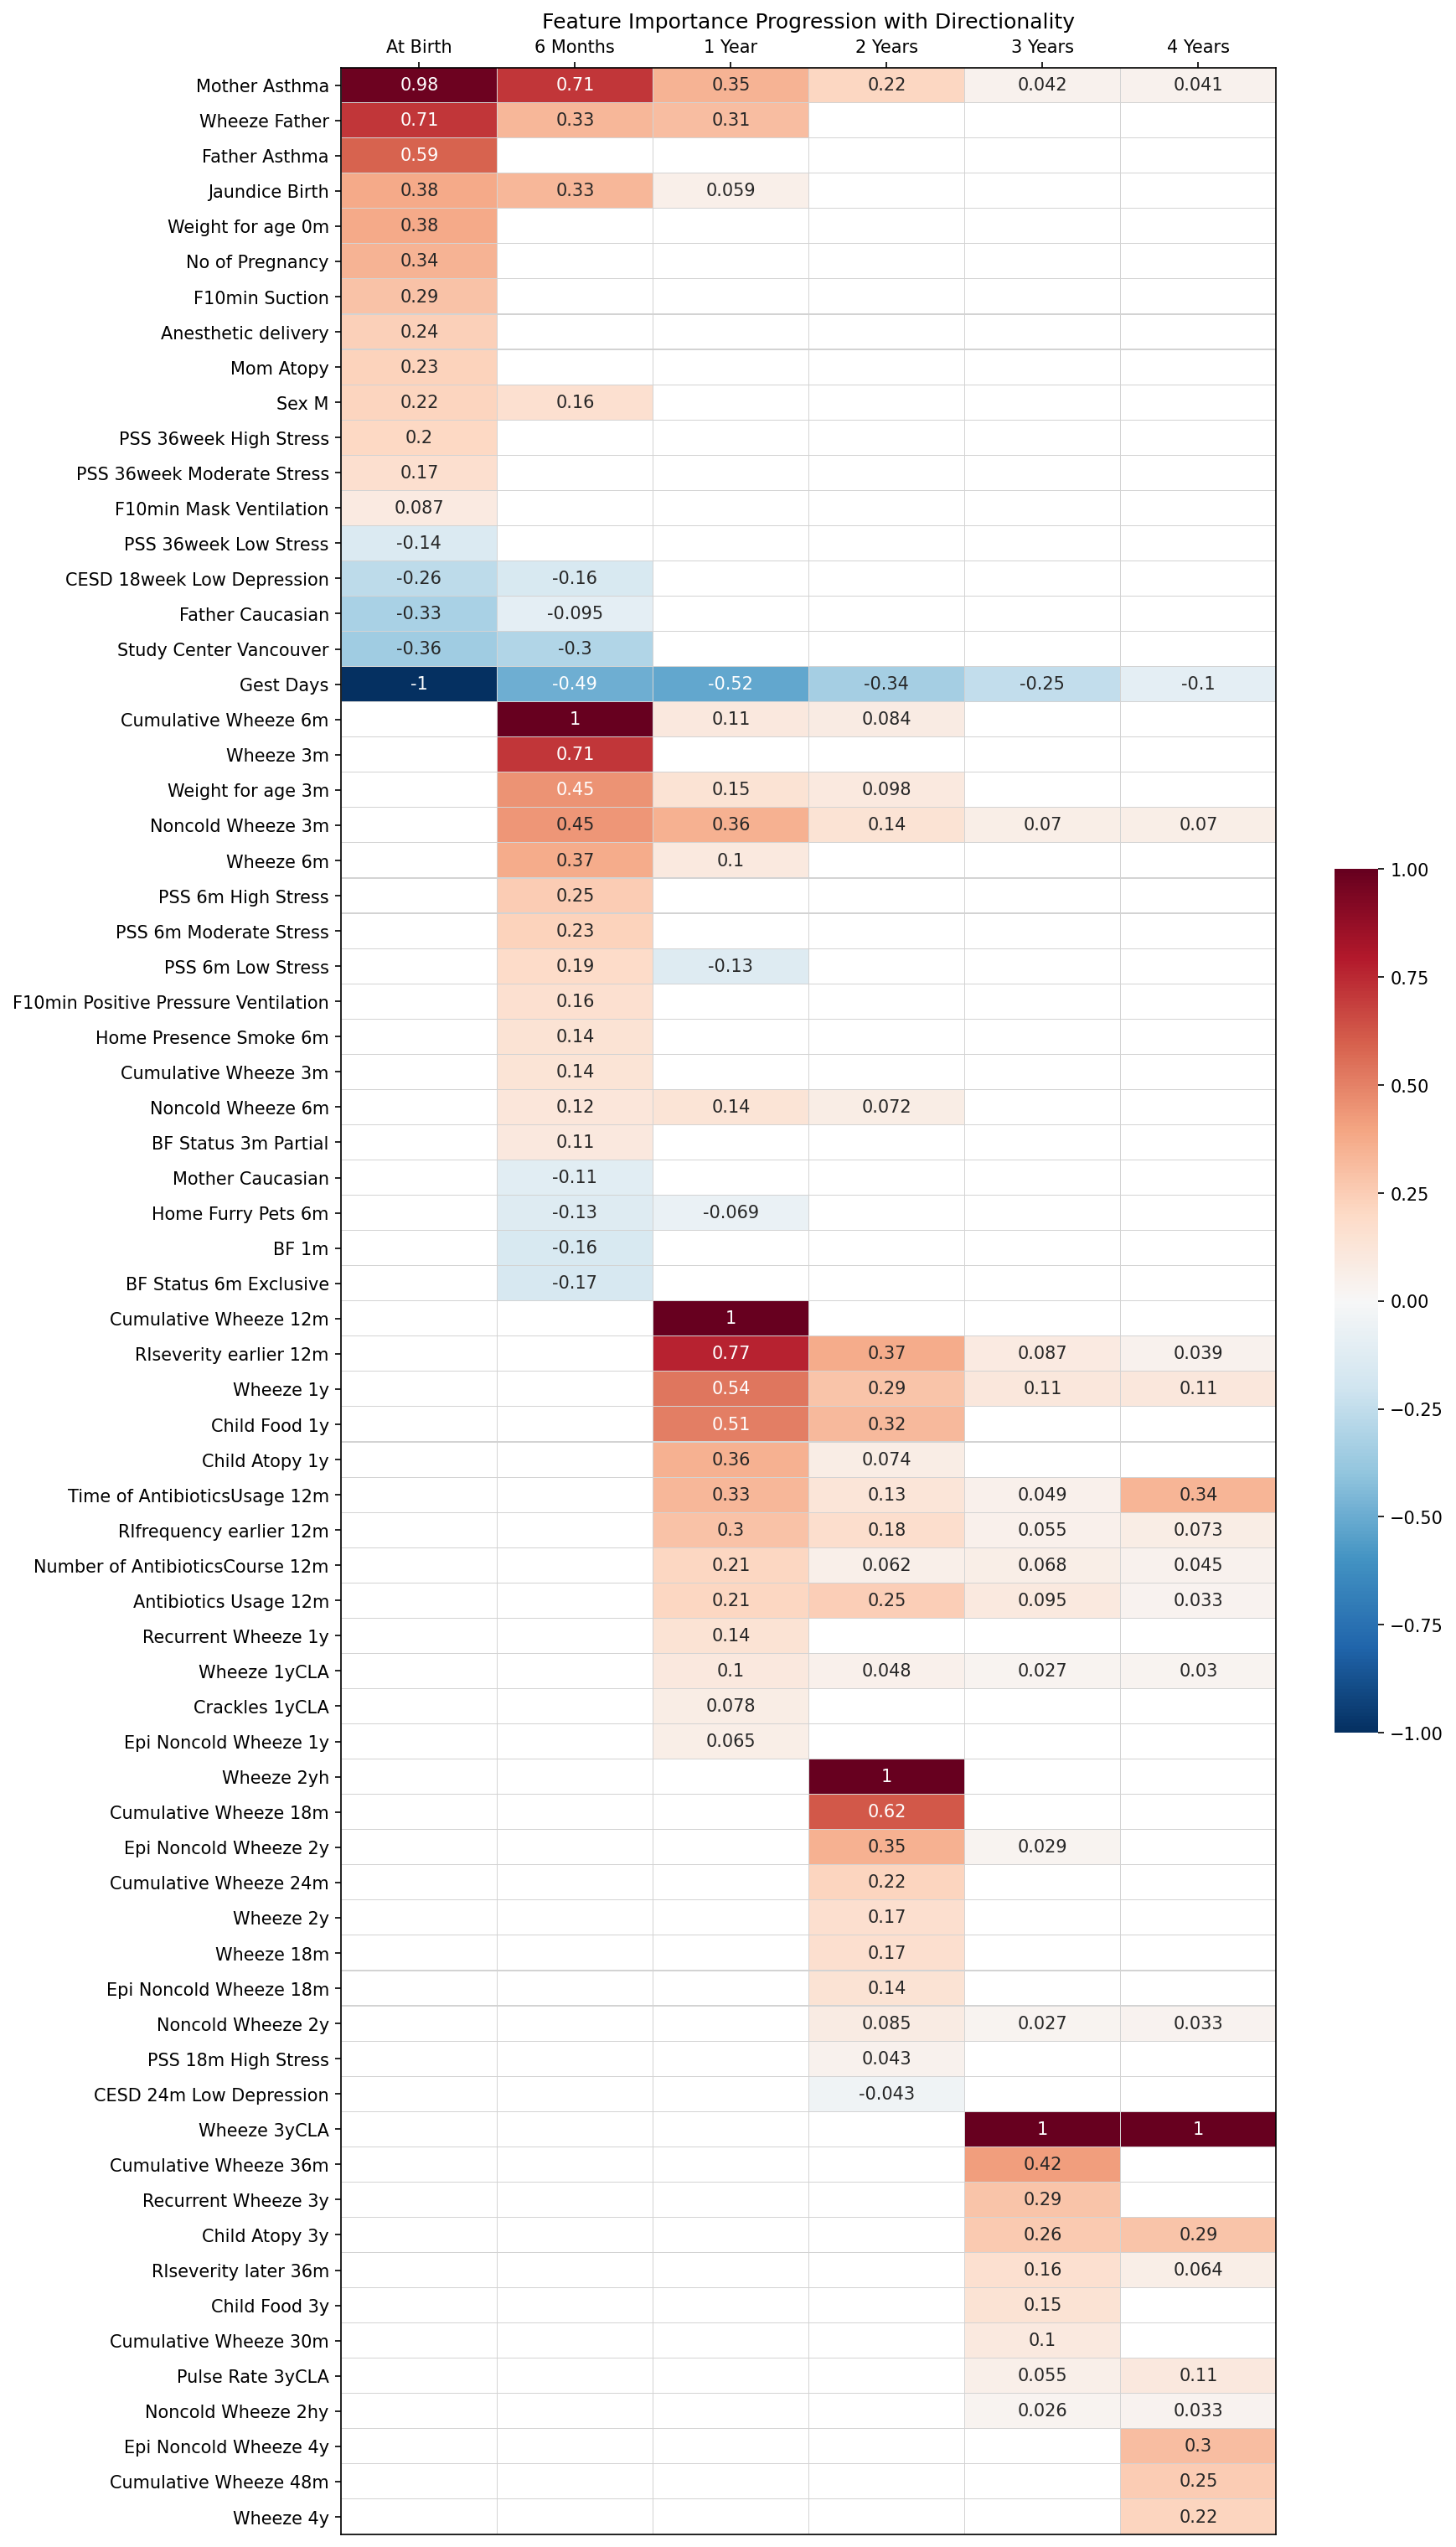

<IPython.core.display.Javascript object>

In [80]:
feature_importance_4y_with_direction = feature_merged_directionality(
    df_train_eval_selected_screened,
    df_holdout_selected_screened,
    feature_importance_without_direction,
    target_name="Asthma_Diagnosis_5yCLA",
    estimator=LogisticRegression(C=0.02, solver="lbfgs", class_weight="balanced"),
    threshold_for_selection=0,
)

In [27]:
ml_res_dict["lr"][0]
ml_res_dict["lr"][1]

feature_idx  \
4_years_cohorts  (3, 4, 6, 8, 9, 11, 12, 13, 15, 17, 18, 20, 21, 22, 23, 24)   

                                                                     cv_scores  \
4_years_cohorts  [0.5355939524420549, 0.46820202574762215, 0.6558958257452221]   

                avg_score  \
4_years_cohorts  0.553231   

                                                                                                                                                                                                           feature_names  \
4_years_cohorts  (Noncold_Wheeze_2hy, Wheeze_1yCLA, Time_of_AntibioticsUsage_12m, Gest_Days, Wheeze_3yCLA, Wheeze_4y, Child_Atopy_3y, Epi_Noncold_Wheeze_4y, Pulse_Rate_3yCLA, RIseverity_later_36m, Noncold_Wheeze_2...   

                 ci_bound   std_dev   std_err clf  number_of_features  \
4_years_cohorts  0.174702  0.077634  0.054895  lr                  16   

                 feature_precision_rank  
4_years_cohorts                       1

{'4_years_cohorts': ({'y_true_holdout': 0      1.0
   1      1.0
   2      1.0
   3      1.0
   4      1.0
         ... 
   265    0.0
   266    0.0
   267    1.0
   268    1.0
   269    1.0
   Name: Asthma_Diagnosis_5yCLA, Length: 270, dtype: float64,
   'y_predicted_holdout': array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 

<IPython.core.display.Javascript object>

In [ ]:
coef_thresh = 0.1
featimp_thresh = 0.05
permutation_thresh = 0.01
ml_final_features_selected_screened = feature_progression_merge(
    ml_res_final_selected_screened,
    ml_list=["lr", "rf", "xgb", "svc", "dt"],
    coef_thresh=coef_thresh,
    featimp_thresh=featimp_thresh,
    permutation_thresh=permutation_thresh,
    how="sum",
    normalize=True,
)

In [51]:
ml_res_final[1]["svc"].applymap(lambda x: filter_features(abs(x), threshold=0.01))

4_years_cohorts
Time_of_AntibioticsUsage_12m            0.057739
Cumulative_Wheeze_48m                   0.017338
Gest_Days                               0.012602
Pulse_Rate_3yCLA                        0.010332
Wheeze_3yCLA                                 NaN
Wheeze_4y                                    NaN
Child_Atopy_3y                               NaN
Wheeze_1y                                    NaN
RIseverity_later_36m                         NaN
Epi_Noncold_Wheeze_4y                        NaN
Number_of_AntibioticsCourse_12m              NaN
Noncold_Wheeze_2hy                           NaN
Noncold_Wheeze_2y                            NaN
Wheeze_1yCLA                                 NaN
RIseverity_earlier_12m                       NaN

<IPython.core.display.Javascript object>

In [57]:
ml_list = ["lr", "rf", "xgb", "svc", "dt"]
coef_thresh = 0.1
featimp_thresh = 0.05
permutation_thresh = 0.01
how = "sum"
normalize = True
merged_thresh = 0


feature_filtered = {}
# 1. Filtering
for i in ml_list:
    if i in ["lr"]:
        feature_filtered[i] = ml_res_final[1][i].applymap(
            lambda x: filter_features(abs(x), threshold=coef_thresh)
        )
    elif i in ["rf", "xgb", "dt"]:
        feature_filtered[i] = ml_res_final[1][i].applymap(
            lambda x: filter_features(x, threshold=featimp_thresh)
        )
    else:
        feature_filtered[i] = ml_res_final[1][i].applymap(
            lambda x: filter_features(x, threshold=permutation_thresh)
        )

# 2. Normalization & Filtering out those without values
for i in ml_list:
    for col in feature_filtered[i].columns:
        feature_filtered[i][col] = feature_filtered[i][col] / max(
            feature_filtered[i][col].fillna(0)
        )
    feature_filtered[i].dropna(how="all", inplace=True)

# 3. Combination
feature_df_merged = pd.DataFrame()
for i in ml_list:
    feature_df_merged = pd.concat([feature_df_merged, feature_filtered[i]])

if how == "sum":
    feature_df_merged = (
        feature_df_merged.reset_index().groupby("index").sum().replace({0: np.nan})
    )

<IPython.core.display.Javascript object>

In [58]:
if how == "sum":
    feature_df_merged = (
        feature_df_merged.reset_index().groupby("index").sum().replace({0: np.nan})
    )
elif how == "avg":
    feature_df_merged = (
        feature_df_merged.reset_index().groupby("index").mean().replace({0: np.nan})
    )

4_years_cohorts
index                                           
Antibiotics_Usage_12m                   0.130802
Child_Atopy_3y                          1.140674
Child_Food_3y                           0.231364
Cumulative_Wheeze_48m                   1.042290
Epi_Noncold_Wheeze_2y                   0.483271
Epi_Noncold_Wheeze_4y                   1.349087
Gest_Days                               0.398081
Mother_Asthma                           0.105998
Noncold_Wheeze_2hy                      0.130913
Noncold_Wheeze_2y                       0.132645
Noncold_Wheeze_3m                       0.278064
Number_of_AntibioticsCourse_12m         0.179206
Pulse_Rate_3yCLA                        0.273098
RIseverity_earlier_12m                  0.214481
RIseverity_later_36m                    0.561444
Time_of_AntibioticsUsage_12m            1.694142
Wheeze_1y                               0.458559
Wheeze_1yCLA                            0.121075
Wheeze_3yCLA                            4.000000
Wheeze_4y                               0.970383

<IPython.core.display.Javascript object>

In [35]:
feature_df_merged

4_years_cohorts
Wheeze_3yCLA                            1.121639
Wheeze_4y                               0.619485
Child_Atopy_3y                          0.613409
Wheeze_1y                               0.514338
Time_of_AntibioticsUsage_12m            0.386266
Cumulative_Wheeze_48m                   0.346000
Noncold_Wheeze_3m                       0.311888
RIseverity_later_36m                    0.285081
Number_of_AntibioticsCourse_12m         0.201004
Noncold_Wheeze_2y                       0.148779
Noncold_Wheeze_2hy                      0.146837
Epi_Noncold_Wheeze_4y                   0.145459
Wheeze_1yCLA                            0.135802
Pulse_Rate_3yCLA                        0.105601
Epi_Noncold_Wheeze_2y                   0.067673
Gest_Days                              -0.201692

<IPython.core.display.Javascript object>

In [37]:
# model_perform_df
feature_df_merged = feature_importance_dict["lr"].copy()
feature_df_merged
feature_df_merged.columns

feature_df_merged.sort_values(
    by=list(feature_df_merged.columns),
    ascending=[
        False for i in range(len(feature_df_merged.columns))
    ],  # False for all columns
    inplace=True,
)

4_years_cohorts
Wheeze_3yCLA                            1.121639
Wheeze_4y                               0.619485
Child_Atopy_3y                          0.613409
Wheeze_1y                               0.514338
Time_of_AntibioticsUsage_12m            0.386266
Cumulative_Wheeze_48m                   0.346000
Noncold_Wheeze_3m                       0.311888
RIseverity_later_36m                    0.285081
Number_of_AntibioticsCourse_12m         0.201004
Noncold_Wheeze_2y                       0.148779
Noncold_Wheeze_2hy                      0.146837
Epi_Noncold_Wheeze_4y                   0.145459
Wheeze_1yCLA                            0.135802
Pulse_Rate_3yCLA                        0.105601
Epi_Noncold_Wheeze_2y                   0.067673
Gest_Days                              -0.201692

Index(['4_years_cohorts'], dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
%load_ext nb_black

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import scipy

In [ ]:
scipy.__version__

In [ ]:
from scipy.stats import bootstrap

In [ ]:
import numpy as np
import scipy.stats as st
from scipy.stats import norm

rng = 33
dist = norm(loc=90, scale=5)
data = dist.rvs(size=30, random_state=33)
data

In [ ]:
st.t.interval(alpha=0.95, df=len(data) - 1, loc=np.mean(data), scale=st.sem(data))
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

In [ ]:
data = dist.rvs(size=30, random_state=33)
data = (data,)
res = bootstrap(data, np.mean, confidence_level=0.95, random_state=33, n_resamples=9999)
res.confidence_interval

In [ ]:
res = bootstrap(
    data,
    np.mean,
    confidence_level=0.95,
    random_state=33,
    n_resamples=3000,
    method="percentile",
)
res.confidence_interval

In [ ]:
np.percentile(data, 97.5)
np.percentile(data, 2.5)
np.median(data)